In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

/home/raflicky/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [194]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [91]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [92]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [196]:
BMV = clean_data()

In [197]:
eur_usd, usd_mxn = import_some_files()

In [198]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [199]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [200]:
my_data_frame = all_variables.drop(['Date'], axis=1)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [201]:
#my_data_frame.to_csv("theXs")
#my_data_frame_sum.to_csv("theYs")

In [202]:
working_data = my_data_frame.iloc[0:2000]
working_data_sum = my_data_frame_sum.iloc[0:2000]
validate_data = my_data_frame.iloc[2000:]
validate_data_sum = my_data_frame_sum.iloc[2000:]

In [203]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [204]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [207]:
trainingX, trainingY = next_batch2(my_x, my_y, 38)
testingX, testingY = next_batch2(my_x, my_y, 38)

In [208]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 38)

In [209]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [210]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 1999 samples, validate on 1999 samples
Epoch 1/30000
 - 4s - loss: 75.0390 - val_loss: 69.0065
Epoch 2/30000
 - 1s - loss: 65.1878 - val_loss: 61.3906
Epoch 3/30000
 - 1s - loss: 58.2421 - val_loss: 56.7609
Epoch 4/30000
 - 1s - loss: 55.8409 - val_loss: 54.9616
Epoch 5/30000
 - 1s - loss: 51.2236 - val_loss: 51.2541
Epoch 6/30000
 - 1s - loss: 46.7701 - val_loss: 47.0205
Epoch 7/30000
 - 1s - loss: 43.7452 - val_loss: 43.8460
Epoch 8/30000
 - 1s - loss: 40.4441 - val_loss: 41.0533
Epoch 9/30000
 - 1s - loss: 36.9875 - val_loss: 37.8554
Epoch 10/30000
 - 1s - loss: 33.5240 - val_loss: 34.3380
Epoch 11/30000
 - 1s - loss: 30.0088 - val_loss: 30.9370
Epoch 12/30000
 - 1s - loss: 27.1911 - val_loss: 28.7581
Epoch 13/30000
 - 1s - loss: 25.2577 - val_loss: 27.1367
Epoch 14/30000
 - 1s - loss: 22.9976 - val_loss: 25.0839
Epoch 15/30000
 - 1s - loss: 21.0119 - val_loss: 23.3677
Epoch 16/30000
 - 1s - loss: 18.9378 - val_loss: 21.5815
Epoch 17/30000
 - 1s - loss: 16.8938 - val_loss: 

Epoch 146/30000
 - 1s - loss: 3.1760 - val_loss: 13.0589
Epoch 147/30000
 - 1s - loss: 3.2208 - val_loss: 13.1373
Epoch 148/30000
 - 1s - loss: 3.2567 - val_loss: 12.6461
Epoch 149/30000
 - 1s - loss: 3.1547 - val_loss: 12.5149
Epoch 150/30000
 - 1s - loss: 3.2025 - val_loss: 12.6856
Epoch 151/30000
 - 1s - loss: 3.2437 - val_loss: 12.9501
Epoch 152/30000
 - 1s - loss: 3.2605 - val_loss: 12.7842
Epoch 153/30000
 - 1s - loss: 3.1588 - val_loss: 13.0748
Epoch 154/30000
 - 1s - loss: 3.1058 - val_loss: 12.8162
Epoch 155/30000
 - 1s - loss: 3.1170 - val_loss: 12.5618
Epoch 156/30000
 - 1s - loss: 2.9219 - val_loss: 12.6737
Epoch 157/30000
 - 1s - loss: 3.1491 - val_loss: 12.2232
Epoch 158/30000
 - 1s - loss: 3.0736 - val_loss: 12.4510
Epoch 159/30000
 - 1s - loss: 2.9631 - val_loss: 11.7915
Epoch 160/30000
 - 1s - loss: 2.9783 - val_loss: 12.9860
Epoch 161/30000
 - 1s - loss: 2.7870 - val_loss: 13.4693
Epoch 162/30000
 - 1s - loss: 2.8986 - val_loss: 12.1650
Epoch 163/30000
 - 1s - loss: 2

Epoch 290/30000
 - 1s - loss: 3.0996 - val_loss: 12.0412
Epoch 291/30000
 - 1s - loss: 3.1235 - val_loss: 11.1476
Epoch 292/30000
 - 1s - loss: 3.2361 - val_loss: 11.8592
Epoch 293/30000
 - 1s - loss: 3.1512 - val_loss: 11.4116
Epoch 294/30000
 - 1s - loss: 3.0427 - val_loss: 11.7980
Epoch 295/30000
 - 1s - loss: 3.1898 - val_loss: 12.4779
Epoch 296/30000
 - 1s - loss: 3.1621 - val_loss: 10.6360
Epoch 297/30000
 - 1s - loss: 3.1566 - val_loss: 11.4551
Epoch 298/30000
 - 1s - loss: 3.1069 - val_loss: 11.5110
Epoch 299/30000
 - 1s - loss: 3.0441 - val_loss: 11.4653
Epoch 300/30000
 - 1s - loss: 3.1780 - val_loss: 10.8277
Epoch 301/30000
 - 1s - loss: 3.0870 - val_loss: 10.2850
Epoch 302/30000
 - 1s - loss: 3.1094 - val_loss: 11.9951
Epoch 303/30000
 - 1s - loss: 3.0193 - val_loss: 11.3874
Epoch 304/30000
 - 1s - loss: 3.2048 - val_loss: 11.4934
Epoch 305/30000
 - 1s - loss: 3.0908 - val_loss: 12.2346
Epoch 306/30000
 - 1s - loss: 3.1930 - val_loss: 11.0093
Epoch 307/30000
 - 1s - loss: 3

 - 1s - loss: 2.6227 - val_loss: 8.5812
Epoch 436/30000
 - 1s - loss: 2.4599 - val_loss: 8.7080
Epoch 437/30000
 - 1s - loss: 2.5318 - val_loss: 8.7808
Epoch 438/30000
 - 1s - loss: 2.5250 - val_loss: 8.6994
Epoch 439/30000
 - 1s - loss: 2.5804 - val_loss: 8.4610
Epoch 440/30000
 - 1s - loss: 2.6080 - val_loss: 9.2037
Epoch 441/30000
 - 1s - loss: 2.6458 - val_loss: 9.2554
Epoch 442/30000
 - 1s - loss: 2.6248 - val_loss: 8.8070
Epoch 443/30000
 - 1s - loss: 2.6793 - val_loss: 8.8259
Epoch 444/30000
 - 1s - loss: 2.4835 - val_loss: 8.8246
Epoch 445/30000
 - 1s - loss: 2.5964 - val_loss: 8.6827
Epoch 446/30000
 - 1s - loss: 2.7127 - val_loss: 8.0532
Epoch 447/30000
 - 1s - loss: 2.5781 - val_loss: 8.4118
Epoch 448/30000
 - 1s - loss: 2.5073 - val_loss: 9.4311
Epoch 449/30000
 - 1s - loss: 2.5516 - val_loss: 8.9287
Epoch 450/30000
 - 1s - loss: 2.6586 - val_loss: 8.7000
Epoch 451/30000
 - 1s - loss: 2.6069 - val_loss: 8.9468
Epoch 452/30000
 - 1s - loss: 2.5093 - val_loss: 9.2765
Epoch 45

Epoch 582/30000
 - 1s - loss: 2.5824 - val_loss: 7.8279
Epoch 583/30000
 - 1s - loss: 2.5220 - val_loss: 8.7040
Epoch 584/30000
 - 1s - loss: 2.7021 - val_loss: 8.0836
Epoch 585/30000
 - 1s - loss: 2.3837 - val_loss: 8.3901
Epoch 586/30000
 - 1s - loss: 2.5979 - val_loss: 7.8498
Epoch 587/30000
 - 1s - loss: 2.3766 - val_loss: 7.9138
Epoch 588/30000
 - 1s - loss: 2.4500 - val_loss: 7.6087
Epoch 589/30000
 - 1s - loss: 2.3715 - val_loss: 7.8829
Epoch 590/30000
 - 1s - loss: 2.5462 - val_loss: 7.7877
Epoch 591/30000
 - 1s - loss: 2.4209 - val_loss: 7.9469
Epoch 592/30000
 - 1s - loss: 2.3640 - val_loss: 7.5227
Epoch 593/30000
 - 1s - loss: 2.4499 - val_loss: 7.6905
Epoch 594/30000
 - 1s - loss: 2.6241 - val_loss: 7.7120
Epoch 595/30000
 - 1s - loss: 2.4991 - val_loss: 7.4119
Epoch 596/30000
 - 1s - loss: 2.5002 - val_loss: 7.8466
Epoch 597/30000
 - 1s - loss: 2.4630 - val_loss: 7.9184
Epoch 598/30000
 - 1s - loss: 2.6425 - val_loss: 7.2367
Epoch 599/30000
 - 1s - loss: 2.4260 - val_loss:

Epoch 729/30000
 - 1s - loss: 2.6510 - val_loss: 6.9879
Epoch 730/30000
 - 1s - loss: 2.4746 - val_loss: 7.6238
Epoch 731/30000
 - 1s - loss: 2.4862 - val_loss: 8.0532
Epoch 732/30000
 - 1s - loss: 2.5230 - val_loss: 6.9912
Epoch 733/30000
 - 1s - loss: 2.5613 - val_loss: 7.5679
Epoch 734/30000
 - 1s - loss: 2.5308 - val_loss: 7.1166
Epoch 735/30000
 - 1s - loss: 2.4316 - val_loss: 8.0263
Epoch 736/30000
 - 1s - loss: 2.5523 - val_loss: 7.3972
Epoch 737/30000
 - 1s - loss: 2.5558 - val_loss: 7.5138
Epoch 738/30000
 - 1s - loss: 2.5176 - val_loss: 7.6454
Epoch 739/30000
 - 1s - loss: 2.4737 - val_loss: 7.2458
Epoch 740/30000
 - 1s - loss: 2.5940 - val_loss: 7.4356
Epoch 741/30000
 - 1s - loss: 2.6167 - val_loss: 6.6852
Epoch 742/30000
 - 1s - loss: 2.5478 - val_loss: 7.6674
Epoch 743/30000
 - 1s - loss: 2.5203 - val_loss: 7.3619
Epoch 744/30000
 - 1s - loss: 2.6131 - val_loss: 7.2620
Epoch 745/30000
 - 1s - loss: 2.4218 - val_loss: 7.5215
Epoch 746/30000
 - 1s - loss: 2.5804 - val_loss:

Epoch 876/30000
 - 1s - loss: 2.6113 - val_loss: 6.5154
Epoch 877/30000
 - 1s - loss: 2.4125 - val_loss: 6.4516
Epoch 878/30000
 - 1s - loss: 2.3449 - val_loss: 6.7532
Epoch 879/30000
 - 1s - loss: 2.3944 - val_loss: 6.0504
Epoch 880/30000
 - 1s - loss: 2.4187 - val_loss: 6.7238
Epoch 881/30000
 - 1s - loss: 2.3996 - val_loss: 6.9549
Epoch 882/30000
 - 1s - loss: 2.5193 - val_loss: 7.4264
Epoch 883/30000
 - 1s - loss: 2.5100 - val_loss: 7.0822
Epoch 884/30000
 - 1s - loss: 2.5445 - val_loss: 7.6212
Epoch 885/30000
 - 1s - loss: 2.4569 - val_loss: 6.9143
Epoch 886/30000
 - 1s - loss: 2.5924 - val_loss: 7.3836
Epoch 887/30000
 - 1s - loss: 2.5982 - val_loss: 7.0311
Epoch 888/30000
 - 1s - loss: 2.5692 - val_loss: 7.6879
Epoch 889/30000
 - 1s - loss: 2.6077 - val_loss: 7.2720
Epoch 890/30000
 - 1s - loss: 2.4917 - val_loss: 6.8777
Epoch 891/30000
 - 1s - loss: 2.6713 - val_loss: 7.0456
Epoch 892/30000
 - 1s - loss: 2.9744 - val_loss: 7.6934
Epoch 893/30000
 - 1s - loss: 2.7196 - val_loss:

Epoch 1022/30000
 - 1s - loss: 2.7123 - val_loss: 6.9627
Epoch 1023/30000
 - 1s - loss: 2.5400 - val_loss: 6.8493
Epoch 1024/30000
 - 1s - loss: 2.6259 - val_loss: 6.8798
Epoch 1025/30000
 - 1s - loss: 2.7627 - val_loss: 7.1844
Epoch 1026/30000
 - 1s - loss: 2.6945 - val_loss: 6.9214
Epoch 1027/30000
 - 1s - loss: 2.7081 - val_loss: 6.4488
Epoch 1028/30000
 - 1s - loss: 2.5619 - val_loss: 7.0415
Epoch 1029/30000
 - 1s - loss: 2.6284 - val_loss: 7.0288
Epoch 1030/30000
 - 1s - loss: 2.5452 - val_loss: 6.8084
Epoch 1031/30000
 - 1s - loss: 2.5246 - val_loss: 7.0716
Epoch 1032/30000
 - 1s - loss: 2.5578 - val_loss: 7.3921
Epoch 1033/30000
 - 1s - loss: 2.5710 - val_loss: 6.2704
Epoch 1034/30000
 - 1s - loss: 2.4630 - val_loss: 6.0702
Epoch 1035/30000
 - 1s - loss: 2.5361 - val_loss: 6.1484
Epoch 1036/30000
 - 1s - loss: 2.4482 - val_loss: 6.4316
Epoch 1037/30000
 - 1s - loss: 2.6818 - val_loss: 6.4356
Epoch 1038/30000
 - 1s - loss: 2.4731 - val_loss: 6.4604
Epoch 1039/30000
 - 1s - loss: 

Epoch 1166/30000
 - 1s - loss: 2.3169 - val_loss: 6.3474
Epoch 1167/30000
 - 1s - loss: 2.4204 - val_loss: 6.7809
Epoch 1168/30000
 - 1s - loss: 2.4737 - val_loss: 5.8834
Epoch 1169/30000
 - 1s - loss: 2.3020 - val_loss: 6.7625
Epoch 1170/30000
 - 1s - loss: 2.4232 - val_loss: 6.3514
Epoch 1171/30000
 - 1s - loss: 2.4849 - val_loss: 5.4203
Epoch 1172/30000
 - 1s - loss: 2.4583 - val_loss: 6.2753
Epoch 1173/30000
 - 1s - loss: 2.4569 - val_loss: 5.5424
Epoch 1174/30000
 - 1s - loss: 2.4015 - val_loss: 6.0787
Epoch 1175/30000
 - 1s - loss: 2.3763 - val_loss: 6.2153
Epoch 1176/30000
 - 1s - loss: 2.3171 - val_loss: 6.3557
Epoch 1177/30000
 - 1s - loss: 2.3400 - val_loss: 5.6928
Epoch 1178/30000
 - 1s - loss: 2.3548 - val_loss: 6.1329
Epoch 1179/30000
 - 1s - loss: 2.4511 - val_loss: 5.9964
Epoch 1180/30000
 - 1s - loss: 2.3214 - val_loss: 5.5788
Epoch 1181/30000
 - 1s - loss: 2.4655 - val_loss: 5.6541
Epoch 1182/30000
 - 1s - loss: 2.4297 - val_loss: 5.9939
Epoch 1183/30000
 - 1s - loss: 

Epoch 1310/30000
 - 1s - loss: 2.4264 - val_loss: 5.8705
Epoch 1311/30000
 - 1s - loss: 2.4717 - val_loss: 4.6361
Epoch 1312/30000
 - 1s - loss: 2.3469 - val_loss: 5.4586
Epoch 1313/30000
 - 1s - loss: 2.2339 - val_loss: 5.3276
Epoch 1314/30000
 - 1s - loss: 2.4298 - val_loss: 5.1041
Epoch 1315/30000
 - 1s - loss: 2.3007 - val_loss: 5.4486
Epoch 1316/30000
 - 1s - loss: 2.2995 - val_loss: 5.2427
Epoch 1317/30000
 - 1s - loss: 2.3295 - val_loss: 5.0371
Epoch 1318/30000
 - 1s - loss: 2.2133 - val_loss: 5.7887
Epoch 1319/30000
 - 1s - loss: 2.3412 - val_loss: 5.1782
Epoch 1320/30000
 - 1s - loss: 2.2908 - val_loss: 5.0208
Epoch 1321/30000
 - 1s - loss: 2.2704 - val_loss: 5.1741
Epoch 1322/30000
 - 1s - loss: 2.4190 - val_loss: 4.7434
Epoch 1323/30000
 - 1s - loss: 2.3775 - val_loss: 5.2466
Epoch 1324/30000
 - 1s - loss: 2.3919 - val_loss: 5.1149
Epoch 1325/30000
 - 1s - loss: 2.3488 - val_loss: 5.4414
Epoch 1326/30000
 - 1s - loss: 2.2938 - val_loss: 5.0498
Epoch 1327/30000
 - 1s - loss: 

Epoch 1454/30000
 - 1s - loss: 2.3050 - val_loss: 5.3014
Epoch 1455/30000
 - 1s - loss: 2.3514 - val_loss: 5.3670
Epoch 1456/30000
 - 1s - loss: 2.3393 - val_loss: 6.1322
Epoch 1457/30000
 - 1s - loss: 2.2889 - val_loss: 5.1840
Epoch 1458/30000
 - 1s - loss: 2.3089 - val_loss: 5.3238
Epoch 1459/30000
 - 1s - loss: 2.2753 - val_loss: 5.4701
Epoch 1460/30000
 - 1s - loss: 2.4286 - val_loss: 5.3251
Epoch 1461/30000
 - 1s - loss: 2.3717 - val_loss: 5.0444
Epoch 1462/30000
 - 1s - loss: 2.4552 - val_loss: 4.7782
Epoch 1463/30000
 - 1s - loss: 2.4756 - val_loss: 5.3221
Epoch 1464/30000
 - 1s - loss: 2.3924 - val_loss: 4.9239
Epoch 1465/30000
 - 1s - loss: 2.3671 - val_loss: 5.0121
Epoch 1466/30000
 - 1s - loss: 2.3860 - val_loss: 5.2126
Epoch 1467/30000
 - 1s - loss: 2.2980 - val_loss: 5.5275
Epoch 1468/30000
 - 1s - loss: 2.3229 - val_loss: 5.5242
Epoch 1469/30000
 - 1s - loss: 2.3269 - val_loss: 5.3787
Epoch 1470/30000
 - 1s - loss: 2.3984 - val_loss: 5.3213
Epoch 1471/30000
 - 1s - loss: 

Epoch 1598/30000
 - 1s - loss: 2.3432 - val_loss: 5.2572
Epoch 1599/30000
 - 1s - loss: 2.3512 - val_loss: 5.7263
Epoch 1600/30000
 - 1s - loss: 2.3009 - val_loss: 5.6623
Epoch 1601/30000
 - 1s - loss: 2.3745 - val_loss: 5.2598
Epoch 1602/30000
 - 1s - loss: 2.3780 - val_loss: 5.2237
Epoch 1603/30000
 - 1s - loss: 2.3953 - val_loss: 5.1544
Epoch 1604/30000
 - 1s - loss: 2.2621 - val_loss: 5.2096
Epoch 1605/30000
 - 1s - loss: 2.3439 - val_loss: 5.1327
Epoch 1606/30000
 - 1s - loss: 2.3533 - val_loss: 5.0308
Epoch 1607/30000
 - 1s - loss: 2.3426 - val_loss: 5.4386
Epoch 1608/30000
 - 1s - loss: 2.3383 - val_loss: 5.2764
Epoch 1609/30000
 - 1s - loss: 2.3175 - val_loss: 5.4327
Epoch 1610/30000
 - 1s - loss: 2.3861 - val_loss: 5.3596
Epoch 1611/30000
 - 1s - loss: 2.3876 - val_loss: 4.9912
Epoch 1612/30000
 - 1s - loss: 2.3302 - val_loss: 5.5387
Epoch 1613/30000
 - 1s - loss: 2.3237 - val_loss: 5.3127
Epoch 1614/30000
 - 1s - loss: 2.3242 - val_loss: 5.5541
Epoch 1615/30000
 - 1s - loss: 

Epoch 1742/30000
 - 1s - loss: 2.3488 - val_loss: 5.8453
Epoch 1743/30000
 - 1s - loss: 2.3663 - val_loss: 5.2952
Epoch 1744/30000
 - 1s - loss: 2.3015 - val_loss: 5.7165
Epoch 1745/30000
 - 1s - loss: 2.4749 - val_loss: 5.8671
Epoch 1746/30000
 - 1s - loss: 2.5132 - val_loss: 5.1309
Epoch 1747/30000
 - 1s - loss: 2.5163 - val_loss: 5.7269
Epoch 1748/30000
 - 1s - loss: 2.3886 - val_loss: 5.5626
Epoch 1749/30000
 - 1s - loss: 2.4353 - val_loss: 5.4870
Epoch 1750/30000
 - 1s - loss: 2.3269 - val_loss: 5.6829
Epoch 1751/30000
 - 1s - loss: 2.2274 - val_loss: 5.8243
Epoch 1752/30000
 - 1s - loss: 2.4366 - val_loss: 5.6543
Epoch 1753/30000
 - 1s - loss: 2.3645 - val_loss: 5.3325
Epoch 1754/30000
 - 1s - loss: 2.3752 - val_loss: 5.4421
Epoch 1755/30000
 - 1s - loss: 2.4687 - val_loss: 5.8129
Epoch 1756/30000
 - 1s - loss: 2.3876 - val_loss: 5.1577
Epoch 1757/30000
 - 1s - loss: 2.3475 - val_loss: 5.5717
Epoch 1758/30000
 - 1s - loss: 2.3947 - val_loss: 5.6015
Epoch 1759/30000
 - 1s - loss: 

Epoch 1886/30000
 - 1s - loss: 2.1203 - val_loss: 4.6601
Epoch 1887/30000
 - 1s - loss: 2.2224 - val_loss: 4.7917
Epoch 1888/30000
 - 1s - loss: 2.2156 - val_loss: 4.2201
Epoch 1889/30000
 - 1s - loss: 2.2685 - val_loss: 4.9360
Epoch 1890/30000
 - 1s - loss: 2.2354 - val_loss: 4.7589
Epoch 1891/30000
 - 1s - loss: 2.2308 - val_loss: 5.0017
Epoch 1892/30000
 - 1s - loss: 2.2124 - val_loss: 4.5721
Epoch 1893/30000
 - 1s - loss: 2.2309 - val_loss: 4.9106
Epoch 1894/30000
 - 1s - loss: 2.3186 - val_loss: 4.2485
Epoch 1895/30000
 - 1s - loss: 2.2889 - val_loss: 4.1401
Epoch 1896/30000
 - 1s - loss: 2.2477 - val_loss: 4.3250
Epoch 1897/30000
 - 1s - loss: 2.1824 - val_loss: 5.0583
Epoch 1898/30000
 - 1s - loss: 2.2727 - val_loss: 4.6394
Epoch 1899/30000
 - 1s - loss: 2.2902 - val_loss: 4.7342
Epoch 1900/30000
 - 1s - loss: 2.2619 - val_loss: 5.1906
Epoch 1901/30000
 - 1s - loss: 2.3470 - val_loss: 4.5430
Epoch 1902/30000
 - 1s - loss: 2.3289 - val_loss: 4.9133
Epoch 1903/30000
 - 1s - loss: 

Epoch 2030/30000
 - 1s - loss: 2.2840 - val_loss: 4.2293
Epoch 2031/30000
 - 1s - loss: 2.1941 - val_loss: 4.3073
Epoch 2032/30000
 - 1s - loss: 2.1735 - val_loss: 4.9454
Epoch 2033/30000
 - 1s - loss: 2.2565 - val_loss: 4.2888
Epoch 2034/30000
 - 1s - loss: 2.1753 - val_loss: 4.3730
Epoch 2035/30000
 - 1s - loss: 2.2453 - val_loss: 4.3505
Epoch 2036/30000
 - 1s - loss: 2.2275 - val_loss: 4.4023
Epoch 2037/30000
 - 1s - loss: 2.2582 - val_loss: 4.3131
Epoch 2038/30000
 - 1s - loss: 2.2284 - val_loss: 4.3590
Epoch 2039/30000
 - 1s - loss: 2.1892 - val_loss: 4.6212
Epoch 2040/30000
 - 1s - loss: 2.2521 - val_loss: 4.1441
Epoch 2041/30000
 - 1s - loss: 2.2215 - val_loss: 4.0166
Epoch 2042/30000
 - 1s - loss: 2.2033 - val_loss: 4.2098
Epoch 2043/30000
 - 1s - loss: 2.2095 - val_loss: 4.3900
Epoch 2044/30000
 - 1s - loss: 2.1136 - val_loss: 4.5999
Epoch 2045/30000
 - 1s - loss: 2.2476 - val_loss: 4.2786
Epoch 2046/30000
 - 1s - loss: 2.2445 - val_loss: 4.3396
Epoch 2047/30000
 - 1s - loss: 

Epoch 2174/30000
 - 1s - loss: 2.2187 - val_loss: 4.6326
Epoch 2175/30000
 - 1s - loss: 2.1667 - val_loss: 4.5064
Epoch 2176/30000
 - 1s - loss: 2.2305 - val_loss: 4.4921
Epoch 2177/30000
 - 1s - loss: 2.1874 - val_loss: 4.1702
Epoch 2178/30000
 - 1s - loss: 2.2890 - val_loss: 4.2661
Epoch 2179/30000
 - 1s - loss: 2.2015 - val_loss: 4.3067
Epoch 2180/30000
 - 1s - loss: 2.1174 - val_loss: 4.5290
Epoch 2181/30000
 - 1s - loss: 2.2293 - val_loss: 4.5078
Epoch 2182/30000
 - 1s - loss: 2.1890 - val_loss: 4.3698
Epoch 2183/30000
 - 1s - loss: 2.1010 - val_loss: 4.7935
Epoch 2184/30000
 - 1s - loss: 2.1117 - val_loss: 4.2761
Epoch 2185/30000
 - 1s - loss: 2.0775 - val_loss: 4.7148
Epoch 2186/30000
 - 1s - loss: 2.1378 - val_loss: 4.1109
Epoch 2187/30000
 - 1s - loss: 2.1479 - val_loss: 4.5405
Epoch 2188/30000
 - 1s - loss: 2.1554 - val_loss: 4.4917
Epoch 2189/30000
 - 1s - loss: 2.2390 - val_loss: 4.5700
Epoch 2190/30000
 - 1s - loss: 2.2003 - val_loss: 3.9622
Epoch 2191/30000
 - 1s - loss: 

Epoch 2318/30000
 - 1s - loss: 2.1155 - val_loss: 4.2840
Epoch 2319/30000
 - 1s - loss: 2.2768 - val_loss: 4.0778
Epoch 2320/30000
 - 1s - loss: 2.1126 - val_loss: 4.2807
Epoch 2321/30000
 - 1s - loss: 2.1645 - val_loss: 4.3132
Epoch 2322/30000
 - 1s - loss: 2.0611 - val_loss: 3.9517
Epoch 2323/30000
 - 1s - loss: 2.0804 - val_loss: 4.3020
Epoch 2324/30000
 - 1s - loss: 2.0667 - val_loss: 4.3795
Epoch 2325/30000
 - 1s - loss: 2.0560 - val_loss: 4.3777
Epoch 2326/30000
 - 1s - loss: 2.0320 - val_loss: 3.7748
Epoch 2327/30000
 - 1s - loss: 2.1028 - val_loss: 4.3653
Epoch 2328/30000
 - 1s - loss: 2.0354 - val_loss: 3.7998
Epoch 2329/30000
 - 1s - loss: 2.0946 - val_loss: 4.1163
Epoch 2330/30000
 - 1s - loss: 2.0940 - val_loss: 4.1202
Epoch 2331/30000
 - 1s - loss: 2.1853 - val_loss: 3.8670
Epoch 2332/30000
 - 1s - loss: 2.0409 - val_loss: 4.2937
Epoch 2333/30000
 - 1s - loss: 2.1970 - val_loss: 4.6586
Epoch 2334/30000
 - 1s - loss: 2.0793 - val_loss: 4.2360
Epoch 2335/30000
 - 1s - loss: 

Epoch 2462/30000
 - 1s - loss: 2.1388 - val_loss: 3.4017
Epoch 2463/30000
 - 1s - loss: 2.0416 - val_loss: 3.9327
Epoch 2464/30000
 - 1s - loss: 2.2424 - val_loss: 4.1450
Epoch 2465/30000
 - 1s - loss: 2.2682 - val_loss: 4.0046
Epoch 2466/30000
 - 1s - loss: 2.2599 - val_loss: 4.3451
Epoch 2467/30000
 - 1s - loss: 2.1542 - val_loss: 4.1619
Epoch 2468/30000
 - 1s - loss: 2.3032 - val_loss: 3.9808
Epoch 2469/30000
 - 1s - loss: 2.1795 - val_loss: 4.2080
Epoch 2470/30000
 - 1s - loss: 2.2731 - val_loss: 4.1658
Epoch 2471/30000
 - 1s - loss: 2.1114 - val_loss: 3.9308
Epoch 2472/30000
 - 1s - loss: 2.1656 - val_loss: 3.7639
Epoch 2473/30000
 - 1s - loss: 2.2014 - val_loss: 3.7760
Epoch 2474/30000
 - 1s - loss: 2.2354 - val_loss: 4.0356
Epoch 2475/30000
 - 1s - loss: 2.2041 - val_loss: 3.8871
Epoch 2476/30000
 - 1s - loss: 2.2275 - val_loss: 3.5021
Epoch 2477/30000
 - 1s - loss: 2.1096 - val_loss: 3.6646
Epoch 2478/30000
 - 1s - loss: 2.1744 - val_loss: 4.1184
Epoch 2479/30000
 - 1s - loss: 

Epoch 2606/30000
 - 1s - loss: 2.2833 - val_loss: 4.2932
Epoch 2607/30000
 - 1s - loss: 2.1345 - val_loss: 4.4277
Epoch 2608/30000
 - 1s - loss: 2.1034 - val_loss: 3.9529
Epoch 2609/30000
 - 1s - loss: 2.1443 - val_loss: 3.9441
Epoch 2610/30000
 - 1s - loss: 2.2487 - val_loss: 3.7509
Epoch 2611/30000
 - 1s - loss: 2.2185 - val_loss: 4.3799
Epoch 2612/30000
 - 1s - loss: 2.2718 - val_loss: 4.0923
Epoch 2613/30000
 - 1s - loss: 2.2868 - val_loss: 3.9744
Epoch 2614/30000
 - 1s - loss: 2.2796 - val_loss: 3.7716
Epoch 2615/30000
 - 1s - loss: 2.2169 - val_loss: 4.2183
Epoch 2616/30000
 - 1s - loss: 2.1527 - val_loss: 4.2884
Epoch 2617/30000
 - 1s - loss: 2.1805 - val_loss: 4.2288
Epoch 2618/30000
 - 1s - loss: 2.2134 - val_loss: 3.6109
Epoch 2619/30000
 - 1s - loss: 2.2017 - val_loss: 3.6095
Epoch 2620/30000
 - 1s - loss: 2.1638 - val_loss: 4.0349
Epoch 2621/30000
 - 1s - loss: 2.1522 - val_loss: 3.7540
Epoch 2622/30000
 - 1s - loss: 2.2147 - val_loss: 3.9810
Epoch 2623/30000
 - 1s - loss: 

Epoch 2750/30000
 - 1s - loss: 2.1494 - val_loss: 3.4988
Epoch 2751/30000
 - 1s - loss: 2.1856 - val_loss: 3.8268
Epoch 2752/30000
 - 1s - loss: 2.1736 - val_loss: 4.0989
Epoch 2753/30000
 - 1s - loss: 2.1479 - val_loss: 3.6823
Epoch 2754/30000
 - 1s - loss: 2.1974 - val_loss: 3.7332
Epoch 2755/30000
 - 1s - loss: 2.2827 - val_loss: 4.0167
Epoch 2756/30000
 - 1s - loss: 2.2023 - val_loss: 3.8202
Epoch 2757/30000
 - 1s - loss: 2.1636 - val_loss: 4.3352
Epoch 2758/30000
 - 1s - loss: 2.1921 - val_loss: 3.8461
Epoch 2759/30000
 - 1s - loss: 2.2521 - val_loss: 3.9614
Epoch 2760/30000
 - 1s - loss: 2.1591 - val_loss: 3.8432
Epoch 2761/30000
 - 1s - loss: 2.2657 - val_loss: 3.3006
Epoch 2762/30000
 - 1s - loss: 2.3194 - val_loss: 3.7039
Epoch 2763/30000
 - 1s - loss: 2.1689 - val_loss: 4.2741
Epoch 2764/30000
 - 1s - loss: 2.0503 - val_loss: 3.6897
Epoch 2765/30000
 - 1s - loss: 2.1789 - val_loss: 3.2853
Epoch 2766/30000
 - 1s - loss: 2.1996 - val_loss: 4.2461
Epoch 2767/30000
 - 1s - loss: 

Epoch 2894/30000
 - 1s - loss: 2.2005 - val_loss: 3.7351
Epoch 2895/30000
 - 1s - loss: 2.3579 - val_loss: 2.6620
Epoch 2896/30000
 - 1s - loss: 2.2457 - val_loss: 3.2166
Epoch 2897/30000
 - 1s - loss: 2.3111 - val_loss: 3.2141
Epoch 2898/30000
 - 1s - loss: 2.2754 - val_loss: 3.4459
Epoch 2899/30000
 - 1s - loss: 2.2294 - val_loss: 3.3829
Epoch 2900/30000
 - 1s - loss: 2.2544 - val_loss: 3.7328
Epoch 2901/30000
 - 1s - loss: 2.3322 - val_loss: 3.6909
Epoch 2902/30000
 - 1s - loss: 2.2777 - val_loss: 3.2568
Epoch 2903/30000
 - 1s - loss: 2.1326 - val_loss: 3.3510
Epoch 2904/30000
 - 1s - loss: 2.2550 - val_loss: 3.5372
Epoch 2905/30000
 - 1s - loss: 2.1266 - val_loss: 3.3990
Epoch 2906/30000
 - 1s - loss: 2.1588 - val_loss: 3.7727
Epoch 2907/30000
 - 1s - loss: 2.2598 - val_loss: 3.6015
Epoch 2908/30000
 - 1s - loss: 2.1715 - val_loss: 3.1061
Epoch 2909/30000
 - 1s - loss: 2.2691 - val_loss: 3.3069
Epoch 2910/30000
 - 1s - loss: 2.1688 - val_loss: 3.2852
Epoch 2911/30000
 - 1s - loss: 

Epoch 3038/30000
 - 1s - loss: 2.2623 - val_loss: 3.3071
Epoch 3039/30000
 - 1s - loss: 2.2646 - val_loss: 3.7975
Epoch 3040/30000
 - 1s - loss: 2.2612 - val_loss: 3.4721
Epoch 3041/30000
 - 1s - loss: 2.1668 - val_loss: 3.5653
Epoch 3042/30000
 - 1s - loss: 2.2701 - val_loss: 3.7279
Epoch 3043/30000
 - 1s - loss: 2.1789 - val_loss: 3.4932
Epoch 3044/30000
 - 1s - loss: 2.2092 - val_loss: 3.2834
Epoch 3045/30000
 - 1s - loss: 2.2793 - val_loss: 3.9398
Epoch 3046/30000
 - 1s - loss: 2.1386 - val_loss: 3.4320
Epoch 3047/30000
 - 1s - loss: 2.1949 - val_loss: 3.7856
Epoch 3048/30000
 - 1s - loss: 2.2967 - val_loss: 3.8074
Epoch 3049/30000
 - 1s - loss: 2.3094 - val_loss: 3.4722
Epoch 3050/30000
 - 1s - loss: 2.2550 - val_loss: 3.6400
Epoch 3051/30000
 - 1s - loss: 2.2960 - val_loss: 3.6205
Epoch 3052/30000
 - 1s - loss: 2.2407 - val_loss: 4.1519
Epoch 3053/30000
 - 1s - loss: 2.2141 - val_loss: 3.5776
Epoch 3054/30000
 - 1s - loss: 2.1350 - val_loss: 3.9371
Epoch 3055/30000
 - 1s - loss: 

Epoch 3182/30000
 - 1s - loss: 2.2757 - val_loss: 4.5855
Epoch 3183/30000
 - 1s - loss: 2.1973 - val_loss: 4.2446
Epoch 3184/30000
 - 1s - loss: 2.3761 - val_loss: 4.2894
Epoch 3185/30000
 - 1s - loss: 2.2312 - val_loss: 4.0763
Epoch 3186/30000
 - 1s - loss: 2.2660 - val_loss: 4.0565
Epoch 3187/30000
 - 1s - loss: 2.3239 - val_loss: 4.2811
Epoch 3188/30000
 - 1s - loss: 2.3596 - val_loss: 4.1831
Epoch 3189/30000
 - 1s - loss: 2.3225 - val_loss: 4.3720
Epoch 3190/30000
 - 1s - loss: 2.2343 - val_loss: 4.1506
Epoch 3191/30000
 - 1s - loss: 2.3104 - val_loss: 4.2660
Epoch 3192/30000
 - 1s - loss: 2.2672 - val_loss: 4.0648
Epoch 3193/30000
 - 1s - loss: 2.3546 - val_loss: 4.1845
Epoch 3194/30000
 - 1s - loss: 2.2700 - val_loss: 4.2755
Epoch 3195/30000
 - 1s - loss: 2.3025 - val_loss: 4.5999
Epoch 3196/30000
 - 1s - loss: 2.2206 - val_loss: 4.2288
Epoch 3197/30000
 - 1s - loss: 2.2359 - val_loss: 4.4364
Epoch 3198/30000
 - 1s - loss: 2.2222 - val_loss: 4.6092
Epoch 3199/30000
 - 1s - loss: 

Epoch 3326/30000
 - 1s - loss: 2.2928 - val_loss: 4.2559
Epoch 3327/30000
 - 1s - loss: 2.1596 - val_loss: 4.0745
Epoch 3328/30000
 - 1s - loss: 2.2986 - val_loss: 3.8174
Epoch 3329/30000
 - 1s - loss: 2.1640 - val_loss: 3.7374
Epoch 3330/30000
 - 1s - loss: 2.1393 - val_loss: 3.6334
Epoch 3331/30000
 - 1s - loss: 2.1030 - val_loss: 3.8138
Epoch 3332/30000
 - 1s - loss: 2.1770 - val_loss: 3.7180
Epoch 3333/30000
 - 1s - loss: 2.1296 - val_loss: 4.1060
Epoch 3334/30000
 - 1s - loss: 2.1408 - val_loss: 4.0859
Epoch 3335/30000
 - 1s - loss: 2.2063 - val_loss: 4.0412
Epoch 3336/30000
 - 1s - loss: 2.1228 - val_loss: 3.9857
Epoch 3337/30000
 - 1s - loss: 2.2211 - val_loss: 4.1623
Epoch 3338/30000
 - 1s - loss: 2.1954 - val_loss: 4.0715
Epoch 3339/30000
 - 1s - loss: 2.0898 - val_loss: 4.5810
Epoch 3340/30000
 - 1s - loss: 2.0824 - val_loss: 4.0774
Epoch 3341/30000
 - 1s - loss: 2.2091 - val_loss: 3.9514
Epoch 3342/30000
 - 1s - loss: 2.0794 - val_loss: 4.0627
Epoch 3343/30000
 - 1s - loss: 

Epoch 3470/30000
 - 1s - loss: 2.2608 - val_loss: 4.1085
Epoch 3471/30000
 - 1s - loss: 2.2540 - val_loss: 4.6232
Epoch 3472/30000
 - 1s - loss: 2.1745 - val_loss: 4.3644
Epoch 3473/30000
 - 1s - loss: 2.1461 - val_loss: 4.2117
Epoch 3474/30000
 - 1s - loss: 2.0529 - val_loss: 4.4813
Epoch 3475/30000
 - 1s - loss: 2.0978 - val_loss: 4.1705
Epoch 3476/30000
 - 1s - loss: 2.0857 - val_loss: 4.6827
Epoch 3477/30000
 - 1s - loss: 2.1113 - val_loss: 4.1697
Epoch 3478/30000
 - 1s - loss: 2.1939 - val_loss: 3.8308
Epoch 3479/30000
 - 1s - loss: 2.1579 - val_loss: 4.0658
Epoch 3480/30000
 - 1s - loss: 2.1813 - val_loss: 4.6200
Epoch 3481/30000
 - 1s - loss: 2.1429 - val_loss: 4.1033
Epoch 3482/30000
 - 1s - loss: 2.2315 - val_loss: 4.0928
Epoch 3483/30000
 - 1s - loss: 2.1925 - val_loss: 3.9514
Epoch 3484/30000
 - 1s - loss: 2.2082 - val_loss: 4.1639
Epoch 3485/30000
 - 1s - loss: 2.1535 - val_loss: 3.9847
Epoch 3486/30000
 - 1s - loss: 2.2185 - val_loss: 4.5685
Epoch 3487/30000
 - 1s - loss: 

Epoch 3614/30000
 - 1s - loss: 2.2702 - val_loss: 3.9730
Epoch 3615/30000
 - 1s - loss: 2.1577 - val_loss: 3.9045
Epoch 3616/30000
 - 1s - loss: 2.1203 - val_loss: 4.0370
Epoch 3617/30000
 - 1s - loss: 2.2882 - val_loss: 4.1888
Epoch 3618/30000
 - 1s - loss: 2.0946 - val_loss: 4.4505
Epoch 3619/30000
 - 1s - loss: 2.1246 - val_loss: 4.3159
Epoch 3620/30000
 - 1s - loss: 2.1049 - val_loss: 4.2291
Epoch 3621/30000
 - 1s - loss: 2.1948 - val_loss: 4.2083
Epoch 3622/30000
 - 1s - loss: 2.3035 - val_loss: 4.3910
Epoch 3623/30000
 - 1s - loss: 2.2493 - val_loss: 4.6206
Epoch 3624/30000
 - 1s - loss: 2.1810 - val_loss: 4.3507
Epoch 3625/30000
 - 1s - loss: 2.0942 - val_loss: 4.4038
Epoch 3626/30000
 - 1s - loss: 2.2207 - val_loss: 4.2169
Epoch 3627/30000
 - 1s - loss: 2.1016 - val_loss: 4.2235
Epoch 3628/30000
 - 1s - loss: 2.1940 - val_loss: 4.0852
Epoch 3629/30000
 - 1s - loss: 2.1893 - val_loss: 4.0530
Epoch 3630/30000
 - 1s - loss: 2.1451 - val_loss: 4.1552
Epoch 3631/30000
 - 1s - loss: 

Epoch 3758/30000
 - 1s - loss: 2.0957 - val_loss: 4.8931
Epoch 3759/30000
 - 1s - loss: 2.2092 - val_loss: 4.3559
Epoch 3760/30000
 - 1s - loss: 2.3038 - val_loss: 4.5092
Epoch 3761/30000
 - 1s - loss: 2.1685 - val_loss: 4.7020
Epoch 3762/30000
 - 1s - loss: 2.1034 - val_loss: 4.5879
Epoch 3763/30000
 - 1s - loss: 2.1083 - val_loss: 4.4138
Epoch 3764/30000
 - 1s - loss: 2.2054 - val_loss: 4.3680
Epoch 3765/30000
 - 1s - loss: 2.2110 - val_loss: 4.7093
Epoch 3766/30000
 - 1s - loss: 2.3073 - val_loss: 4.6183
Epoch 3767/30000
 - 1s - loss: 2.2153 - val_loss: 4.8519
Epoch 3768/30000
 - 1s - loss: 2.2059 - val_loss: 4.7777
Epoch 3769/30000
 - 1s - loss: 2.1695 - val_loss: 4.5331
Epoch 3770/30000
 - 1s - loss: 2.1750 - val_loss: 4.3337
Epoch 3771/30000
 - 1s - loss: 2.3002 - val_loss: 4.7789
Epoch 3772/30000
 - 1s - loss: 2.1674 - val_loss: 4.7464
Epoch 3773/30000
 - 1s - loss: 2.2608 - val_loss: 4.7334
Epoch 3774/30000
 - 1s - loss: 2.2301 - val_loss: 4.6511
Epoch 3775/30000
 - 1s - loss: 

Epoch 3902/30000
 - 1s - loss: 2.2677 - val_loss: 4.7493
Epoch 3903/30000
 - 1s - loss: 2.2200 - val_loss: 5.3429
Epoch 3904/30000
 - 1s - loss: 2.1809 - val_loss: 5.2726
Epoch 3905/30000
 - 1s - loss: 2.2194 - val_loss: 4.9184
Epoch 3906/30000
 - 1s - loss: 2.1319 - val_loss: 4.7115
Epoch 3907/30000
 - 1s - loss: 2.1654 - val_loss: 4.8546
Epoch 3908/30000
 - 1s - loss: 2.2442 - val_loss: 4.5050
Epoch 3909/30000
 - 1s - loss: 2.2535 - val_loss: 4.8883
Epoch 3910/30000
 - 1s - loss: 2.2369 - val_loss: 4.3776
Epoch 3911/30000
 - 1s - loss: 2.2084 - val_loss: 5.0389
Epoch 3912/30000
 - 1s - loss: 2.3295 - val_loss: 4.8670
Epoch 3913/30000
 - 1s - loss: 2.1768 - val_loss: 4.6917
Epoch 3914/30000
 - 1s - loss: 2.1718 - val_loss: 5.2322
Epoch 3915/30000
 - 1s - loss: 2.2549 - val_loss: 5.2024
Epoch 3916/30000
 - 1s - loss: 2.1925 - val_loss: 4.6612
Epoch 3917/30000
 - 1s - loss: 2.1686 - val_loss: 4.7320
Epoch 3918/30000
 - 1s - loss: 2.2353 - val_loss: 4.9037
Epoch 3919/30000
 - 1s - loss: 

Epoch 4046/30000
 - 1s - loss: 2.2993 - val_loss: 5.2433
Epoch 4047/30000
 - 1s - loss: 2.3266 - val_loss: 5.2357
Epoch 4048/30000
 - 1s - loss: 2.1941 - val_loss: 4.4972
Epoch 4049/30000
 - 1s - loss: 2.2948 - val_loss: 4.7590
Epoch 4050/30000
 - 1s - loss: 2.2894 - val_loss: 4.5957
Epoch 4051/30000
 - 1s - loss: 2.1871 - val_loss: 4.7358
Epoch 4052/30000
 - 1s - loss: 2.2544 - val_loss: 4.7938
Epoch 4053/30000
 - 1s - loss: 2.2914 - val_loss: 5.1469
Epoch 4054/30000
 - 1s - loss: 2.2577 - val_loss: 4.7487
Epoch 4055/30000
 - 1s - loss: 2.3143 - val_loss: 4.9916
Epoch 4056/30000
 - 1s - loss: 2.1749 - val_loss: 5.4000
Epoch 4057/30000
 - 1s - loss: 2.2250 - val_loss: 5.2298
Epoch 4058/30000
 - 1s - loss: 2.3226 - val_loss: 4.8381
Epoch 4059/30000
 - 1s - loss: 2.2886 - val_loss: 4.9507
Epoch 4060/30000
 - 1s - loss: 2.2563 - val_loss: 4.7696
Epoch 4061/30000
 - 1s - loss: 2.3174 - val_loss: 5.3701
Epoch 4062/30000
 - 1s - loss: 2.3436 - val_loss: 4.9626
Epoch 4063/30000
 - 1s - loss: 

Epoch 4190/30000
 - 1s - loss: 2.3545 - val_loss: 5.0134
Epoch 4191/30000
 - 1s - loss: 2.2864 - val_loss: 5.4772
Epoch 4192/30000
 - 1s - loss: 2.3871 - val_loss: 5.3169
Epoch 4193/30000
 - 1s - loss: 2.1748 - val_loss: 5.7367
Epoch 4194/30000
 - 1s - loss: 2.2096 - val_loss: 5.3822
Epoch 4195/30000
 - 1s - loss: 2.2447 - val_loss: 5.1919
Epoch 4196/30000
 - 1s - loss: 2.1175 - val_loss: 5.1400
Epoch 4197/30000
 - 1s - loss: 2.2083 - val_loss: 5.5748
Epoch 4198/30000
 - 1s - loss: 2.2352 - val_loss: 5.7403
Epoch 4199/30000
 - 1s - loss: 2.2835 - val_loss: 5.6440
Epoch 4200/30000
 - 1s - loss: 2.1817 - val_loss: 5.6733
Epoch 4201/30000
 - 1s - loss: 2.4149 - val_loss: 5.5294
Epoch 4202/30000
 - 1s - loss: 2.2534 - val_loss: 5.3481
Epoch 4203/30000
 - 1s - loss: 2.2481 - val_loss: 5.5026
Epoch 4204/30000
 - 1s - loss: 2.2690 - val_loss: 5.6570
Epoch 4205/30000
 - 1s - loss: 2.1378 - val_loss: 4.9201
Epoch 4206/30000
 - 1s - loss: 2.2350 - val_loss: 5.6694
Epoch 4207/30000
 - 1s - loss: 

Epoch 4334/30000
 - 1s - loss: 2.2903 - val_loss: 5.9400
Epoch 4335/30000
 - 1s - loss: 2.3364 - val_loss: 5.8618
Epoch 4336/30000
 - 1s - loss: 2.2920 - val_loss: 5.8601
Epoch 4337/30000
 - 1s - loss: 2.2220 - val_loss: 6.4389
Epoch 4338/30000
 - 1s - loss: 2.3081 - val_loss: 6.1959
Epoch 4339/30000
 - 1s - loss: 2.3134 - val_loss: 6.1565
Epoch 4340/30000
 - 1s - loss: 2.1963 - val_loss: 6.0006
Epoch 4341/30000
 - 1s - loss: 2.2844 - val_loss: 5.8903
Epoch 4342/30000
 - 1s - loss: 2.2669 - val_loss: 6.0500
Epoch 4343/30000
 - 1s - loss: 2.3095 - val_loss: 6.2419
Epoch 4344/30000
 - 1s - loss: 2.4324 - val_loss: 5.9255
Epoch 4345/30000
 - 1s - loss: 2.3721 - val_loss: 5.9447
Epoch 4346/30000
 - 1s - loss: 2.2544 - val_loss: 5.7210
Epoch 4347/30000
 - 1s - loss: 2.2789 - val_loss: 6.1738
Epoch 4348/30000
 - 1s - loss: 2.2801 - val_loss: 5.9778
Epoch 4349/30000
 - 1s - loss: 2.1886 - val_loss: 6.1858
Epoch 4350/30000
 - 1s - loss: 2.2401 - val_loss: 6.0705
Epoch 4351/30000
 - 1s - loss: 

Epoch 4478/30000
 - 1s - loss: 2.3938 - val_loss: 7.0106
Epoch 4479/30000
 - 1s - loss: 2.3820 - val_loss: 6.4807
Epoch 4480/30000
 - 1s - loss: 2.3512 - val_loss: 6.9820
Epoch 4481/30000
 - 1s - loss: 2.4218 - val_loss: 7.0616
Epoch 4482/30000
 - 1s - loss: 2.4613 - val_loss: 6.7532
Epoch 4483/30000
 - 1s - loss: 2.2775 - val_loss: 6.3553
Epoch 4484/30000
 - 1s - loss: 2.2657 - val_loss: 6.5193
Epoch 4485/30000
 - 1s - loss: 2.2941 - val_loss: 6.9086
Epoch 4486/30000
 - 1s - loss: 2.2866 - val_loss: 7.0047
Epoch 4487/30000
 - 1s - loss: 2.2403 - val_loss: 6.8749
Epoch 4488/30000
 - 1s - loss: 2.3636 - val_loss: 6.9655
Epoch 4489/30000
 - 1s - loss: 2.3576 - val_loss: 6.7953
Epoch 4490/30000
 - 1s - loss: 2.3107 - val_loss: 6.5903
Epoch 4491/30000
 - 1s - loss: 2.3585 - val_loss: 6.6387
Epoch 4492/30000
 - 1s - loss: 2.3682 - val_loss: 6.6316
Epoch 4493/30000
 - 1s - loss: 2.2952 - val_loss: 7.0173
Epoch 4494/30000
 - 1s - loss: 2.2512 - val_loss: 6.9051
Epoch 4495/30000
 - 1s - loss: 

Epoch 4622/30000
 - 1s - loss: 2.2123 - val_loss: 7.1365
Epoch 4623/30000
 - 1s - loss: 2.4305 - val_loss: 7.8028
Epoch 4624/30000
 - 1s - loss: 2.2586 - val_loss: 7.2730
Epoch 4625/30000
 - 1s - loss: 2.4683 - val_loss: 6.8288
Epoch 4626/30000
 - 1s - loss: 2.3489 - val_loss: 7.2682
Epoch 4627/30000
 - 1s - loss: 2.5363 - val_loss: 6.7761
Epoch 4628/30000
 - 1s - loss: 2.3329 - val_loss: 7.5628
Epoch 4629/30000
 - 1s - loss: 2.4150 - val_loss: 7.3728
Epoch 4630/30000
 - 1s - loss: 2.4016 - val_loss: 6.9536
Epoch 4631/30000
 - 1s - loss: 2.3929 - val_loss: 7.0724
Epoch 4632/30000
 - 1s - loss: 2.4453 - val_loss: 7.3074
Epoch 4633/30000
 - 1s - loss: 2.4818 - val_loss: 7.2007
Epoch 4634/30000
 - 1s - loss: 2.3901 - val_loss: 6.8068
Epoch 4635/30000
 - 1s - loss: 2.3371 - val_loss: 6.8409
Epoch 4636/30000
 - 1s - loss: 2.3479 - val_loss: 7.5430
Epoch 4637/30000
 - 1s - loss: 2.4323 - val_loss: 7.2263
Epoch 4638/30000
 - 1s - loss: 2.3676 - val_loss: 7.1790
Epoch 4639/30000
 - 1s - loss: 

Epoch 4766/30000
 - 1s - loss: 2.4276 - val_loss: 7.3927
Epoch 4767/30000
 - 1s - loss: 2.3035 - val_loss: 7.1831
Epoch 4768/30000
 - 1s - loss: 2.2399 - val_loss: 7.0896
Epoch 4769/30000
 - 1s - loss: 2.3509 - val_loss: 7.1676
Epoch 4770/30000
 - 1s - loss: 2.4102 - val_loss: 7.3857
Epoch 4771/30000
 - 1s - loss: 2.3452 - val_loss: 7.6257
Epoch 4772/30000
 - 1s - loss: 2.3773 - val_loss: 7.2838
Epoch 4773/30000
 - 1s - loss: 2.3752 - val_loss: 7.4914
Epoch 4774/30000
 - 1s - loss: 2.4392 - val_loss: 7.1742
Epoch 4775/30000
 - 1s - loss: 2.3893 - val_loss: 7.2904
Epoch 4776/30000
 - 1s - loss: 2.5082 - val_loss: 6.9166
Epoch 4777/30000
 - 1s - loss: 2.4023 - val_loss: 6.9300
Epoch 4778/30000
 - 1s - loss: 2.3740 - val_loss: 7.1228
Epoch 4779/30000
 - 1s - loss: 2.2954 - val_loss: 7.1970
Epoch 4780/30000
 - 1s - loss: 2.4188 - val_loss: 7.4810
Epoch 4781/30000
 - 1s - loss: 2.3166 - val_loss: 7.0847
Epoch 4782/30000
 - 1s - loss: 2.4374 - val_loss: 7.2207
Epoch 4783/30000
 - 1s - loss: 

Epoch 4910/30000
 - 1s - loss: 2.4925 - val_loss: 7.8194
Epoch 4911/30000
 - 1s - loss: 2.3926 - val_loss: 7.6756
Epoch 4912/30000
 - 1s - loss: 2.3833 - val_loss: 7.6444
Epoch 4913/30000
 - 1s - loss: 2.3435 - val_loss: 7.8971
Epoch 4914/30000
 - 1s - loss: 2.5106 - val_loss: 7.6337
Epoch 4915/30000
 - 1s - loss: 2.2490 - val_loss: 8.0461
Epoch 4916/30000
 - 1s - loss: 2.4644 - val_loss: 7.5342
Epoch 4917/30000
 - 1s - loss: 2.5281 - val_loss: 7.8423
Epoch 4918/30000
 - 1s - loss: 2.3063 - val_loss: 7.6657
Epoch 4919/30000
 - 1s - loss: 2.4202 - val_loss: 7.9176
Epoch 4920/30000
 - 1s - loss: 2.5020 - val_loss: 7.8901
Epoch 4921/30000
 - 1s - loss: 2.4756 - val_loss: 7.9054
Epoch 4922/30000
 - 1s - loss: 2.5410 - val_loss: 7.8929
Epoch 4923/30000
 - 1s - loss: 2.3710 - val_loss: 7.8885
Epoch 4924/30000
 - 1s - loss: 2.3605 - val_loss: 8.0788
Epoch 4925/30000
 - 1s - loss: 2.3938 - val_loss: 7.8579
Epoch 4926/30000
 - 1s - loss: 2.4061 - val_loss: 8.1033
Epoch 4927/30000
 - 1s - loss: 

Epoch 5054/30000
 - 1s - loss: 2.3057 - val_loss: 8.0145
Epoch 5055/30000
 - 1s - loss: 2.3192 - val_loss: 8.0237
Epoch 5056/30000
 - 1s - loss: 2.3934 - val_loss: 8.0005
Epoch 5057/30000
 - 1s - loss: 2.5002 - val_loss: 7.7749
Epoch 5058/30000
 - 1s - loss: 2.4179 - val_loss: 8.0347
Epoch 5059/30000
 - 1s - loss: 2.3398 - val_loss: 7.8510
Epoch 5060/30000
 - 1s - loss: 2.5174 - val_loss: 8.2037
Epoch 5061/30000
 - 1s - loss: 2.4448 - val_loss: 7.9098
Epoch 5062/30000
 - 1s - loss: 2.5962 - val_loss: 7.7380
Epoch 5063/30000
 - 1s - loss: 2.4093 - val_loss: 7.7168
Epoch 5064/30000
 - 1s - loss: 2.3772 - val_loss: 7.8683
Epoch 5065/30000
 - 1s - loss: 2.4720 - val_loss: 8.0479
Epoch 5066/30000
 - 1s - loss: 2.3682 - val_loss: 7.7389
Epoch 5067/30000
 - 1s - loss: 2.3920 - val_loss: 8.1853
Epoch 5068/30000
 - 1s - loss: 2.4122 - val_loss: 7.8563
Epoch 5069/30000
 - 1s - loss: 2.6322 - val_loss: 8.2471
Epoch 5070/30000
 - 1s - loss: 2.3697 - val_loss: 7.9971
Epoch 5071/30000
 - 1s - loss: 

Epoch 5198/30000
 - 1s - loss: 2.6203 - val_loss: 8.5739
Epoch 5199/30000
 - 1s - loss: 2.6554 - val_loss: 8.0522
Epoch 5200/30000
 - 1s - loss: 2.4997 - val_loss: 8.0036
Epoch 5201/30000
 - 1s - loss: 2.6358 - val_loss: 8.0739
Epoch 5202/30000
 - 1s - loss: 2.5482 - val_loss: 7.8556
Epoch 5203/30000
 - 1s - loss: 2.6269 - val_loss: 8.1567
Epoch 5204/30000
 - 1s - loss: 2.5166 - val_loss: 7.9440
Epoch 5205/30000
 - 1s - loss: 2.5801 - val_loss: 8.0124
Epoch 5206/30000
 - 1s - loss: 2.4242 - val_loss: 8.0320
Epoch 5207/30000
 - 1s - loss: 2.4942 - val_loss: 7.8930
Epoch 5208/30000
 - 1s - loss: 2.4197 - val_loss: 8.0308
Epoch 5209/30000
 - 1s - loss: 2.5275 - val_loss: 8.0535
Epoch 5210/30000
 - 1s - loss: 2.4771 - val_loss: 7.9467
Epoch 5211/30000
 - 1s - loss: 2.4495 - val_loss: 8.1849
Epoch 5212/30000
 - 1s - loss: 2.5083 - val_loss: 8.1393
Epoch 5213/30000
 - 1s - loss: 2.5436 - val_loss: 7.9007
Epoch 5214/30000
 - 1s - loss: 2.4974 - val_loss: 7.5612
Epoch 5215/30000
 - 1s - loss: 

Epoch 5342/30000
 - 1s - loss: 2.4825 - val_loss: 7.4294
Epoch 5343/30000
 - 1s - loss: 2.5342 - val_loss: 7.4474
Epoch 5344/30000
 - 1s - loss: 2.5907 - val_loss: 7.2758
Epoch 5345/30000
 - 1s - loss: 2.5423 - val_loss: 7.4493
Epoch 5346/30000
 - 1s - loss: 2.4877 - val_loss: 6.9623
Epoch 5347/30000
 - 1s - loss: 2.5828 - val_loss: 7.2410
Epoch 5348/30000
 - 1s - loss: 2.4651 - val_loss: 7.2205
Epoch 5349/30000
 - 1s - loss: 2.5401 - val_loss: 7.5330
Epoch 5350/30000
 - 1s - loss: 2.5387 - val_loss: 6.9899
Epoch 5351/30000
 - 1s - loss: 2.6053 - val_loss: 7.5535
Epoch 5352/30000
 - 1s - loss: 2.5658 - val_loss: 7.0636
Epoch 5353/30000
 - 1s - loss: 2.4596 - val_loss: 7.1813
Epoch 5354/30000
 - 1s - loss: 2.6014 - val_loss: 7.0822
Epoch 5355/30000
 - 1s - loss: 2.4336 - val_loss: 7.5822
Epoch 5356/30000
 - 1s - loss: 2.4154 - val_loss: 7.2636
Epoch 5357/30000
 - 1s - loss: 2.3646 - val_loss: 7.3955
Epoch 5358/30000
 - 1s - loss: 2.4078 - val_loss: 7.4846
Epoch 5359/30000
 - 1s - loss: 

Epoch 5486/30000
 - 1s - loss: 2.5092 - val_loss: 7.6309
Epoch 5487/30000
 - 1s - loss: 2.6548 - val_loss: 7.0718
Epoch 5488/30000
 - 1s - loss: 2.4518 - val_loss: 7.0882
Epoch 5489/30000
 - 1s - loss: 2.6023 - val_loss: 7.1355
Epoch 5490/30000
 - 1s - loss: 3.0272 - val_loss: 7.7568
Epoch 5491/30000
 - 1s - loss: 2.6069 - val_loss: 6.9486
Epoch 5492/30000
 - 1s - loss: 2.4403 - val_loss: 7.1317
Epoch 5493/30000
 - 1s - loss: 2.4848 - val_loss: 6.6345
Epoch 5494/30000
 - 1s - loss: 2.6060 - val_loss: 6.8970
Epoch 5495/30000
 - 1s - loss: 2.7083 - val_loss: 7.3030
Epoch 5496/30000
 - 1s - loss: 2.4109 - val_loss: 7.0831
Epoch 5497/30000
 - 1s - loss: 2.4532 - val_loss: 6.8936
Epoch 5498/30000
 - 1s - loss: 2.4553 - val_loss: 7.1455
Epoch 5499/30000
 - 1s - loss: 2.5682 - val_loss: 7.3740
Epoch 5500/30000
 - 1s - loss: 2.6148 - val_loss: 7.1034
Epoch 5501/30000
 - 1s - loss: 2.4999 - val_loss: 6.6588
Epoch 5502/30000
 - 1s - loss: 2.5784 - val_loss: 7.2535
Epoch 5503/30000
 - 1s - loss: 

Epoch 5630/30000
 - 1s - loss: 2.5484 - val_loss: 7.4491
Epoch 5631/30000
 - 1s - loss: 2.4217 - val_loss: 7.1674
Epoch 5632/30000
 - 1s - loss: 2.5542 - val_loss: 7.3739
Epoch 5633/30000
 - 1s - loss: 2.5053 - val_loss: 7.1560
Epoch 5634/30000
 - 1s - loss: 2.4955 - val_loss: 6.9752
Epoch 5635/30000
 - 1s - loss: 2.7201 - val_loss: 7.5302
Epoch 5636/30000
 - 1s - loss: 2.5261 - val_loss: 7.3792
Epoch 5637/30000
 - 1s - loss: 2.5328 - val_loss: 7.0459
Epoch 5638/30000
 - 1s - loss: 2.5162 - val_loss: 7.1955
Epoch 5639/30000
 - 1s - loss: 2.5501 - val_loss: 6.9488
Epoch 5640/30000
 - 1s - loss: 2.4202 - val_loss: 7.1091
Epoch 5641/30000
 - 1s - loss: 2.5569 - val_loss: 7.1669
Epoch 5642/30000
 - 1s - loss: 2.4760 - val_loss: 6.9692
Epoch 5643/30000
 - 1s - loss: 2.5924 - val_loss: 7.0581
Epoch 5644/30000
 - 1s - loss: 2.5379 - val_loss: 7.2781
Epoch 5645/30000
 - 1s - loss: 2.5041 - val_loss: 7.1787
Epoch 5646/30000
 - 1s - loss: 2.5757 - val_loss: 7.4805
Epoch 5647/30000
 - 1s - loss: 

Epoch 5774/30000
 - 1s - loss: 2.5589 - val_loss: 6.7320
Epoch 5775/30000
 - 1s - loss: 2.6346 - val_loss: 6.6993
Epoch 5776/30000
 - 1s - loss: 2.4869 - val_loss: 6.2109
Epoch 5777/30000
 - 1s - loss: 2.5917 - val_loss: 6.6785
Epoch 5778/30000
 - 1s - loss: 2.5806 - val_loss: 6.5503
Epoch 5779/30000
 - 1s - loss: 2.5902 - val_loss: 6.6852
Epoch 5780/30000
 - 1s - loss: 2.6123 - val_loss: 6.5165
Epoch 5781/30000
 - 1s - loss: 2.5309 - val_loss: 6.6023
Epoch 5782/30000
 - 1s - loss: 2.5377 - val_loss: 6.4993
Epoch 5783/30000
 - 1s - loss: 2.4101 - val_loss: 6.7246
Epoch 5784/30000
 - 1s - loss: 2.7036 - val_loss: 6.5139
Epoch 5785/30000
 - 1s - loss: 2.5508 - val_loss: 6.9733
Epoch 5786/30000
 - 1s - loss: 2.5783 - val_loss: 6.6903
Epoch 5787/30000
 - 1s - loss: 2.5783 - val_loss: 6.5869
Epoch 5788/30000
 - 1s - loss: 2.6500 - val_loss: 6.7816
Epoch 5789/30000
 - 1s - loss: 2.4507 - val_loss: 6.8060
Epoch 5790/30000
 - 1s - loss: 2.5302 - val_loss: 6.5587
Epoch 5791/30000
 - 1s - loss: 

Epoch 5918/30000
 - 1s - loss: 2.5376 - val_loss: 6.8908
Epoch 5919/30000
 - 1s - loss: 2.4105 - val_loss: 6.8989
Epoch 5920/30000
 - 1s - loss: 2.5584 - val_loss: 7.4953
Epoch 5921/30000
 - 1s - loss: 2.4333 - val_loss: 7.0460
Epoch 5922/30000
 - 1s - loss: 2.4993 - val_loss: 6.9770
Epoch 5923/30000
 - 1s - loss: 2.5212 - val_loss: 7.4833
Epoch 5924/30000
 - 1s - loss: 2.5126 - val_loss: 7.6357
Epoch 5925/30000
 - 1s - loss: 2.5387 - val_loss: 7.3103
Epoch 5926/30000
 - 1s - loss: 2.5828 - val_loss: 7.1389
Epoch 5927/30000
 - 1s - loss: 2.5168 - val_loss: 7.1047
Epoch 5928/30000
 - 1s - loss: 2.5565 - val_loss: 7.2404
Epoch 5929/30000
 - 1s - loss: 2.7241 - val_loss: 6.8536
Epoch 5930/30000
 - 1s - loss: 2.5258 - val_loss: 7.0721
Epoch 5931/30000
 - 1s - loss: 2.6122 - val_loss: 7.6212
Epoch 5932/30000
 - 1s - loss: 2.6134 - val_loss: 7.0555
Epoch 5933/30000
 - 1s - loss: 2.4514 - val_loss: 7.2682
Epoch 5934/30000
 - 1s - loss: 2.4883 - val_loss: 7.5921
Epoch 5935/30000
 - 1s - loss: 

Epoch 6062/30000
 - 1s - loss: 2.5611 - val_loss: 7.1304
Epoch 6063/30000
 - 1s - loss: 2.6089 - val_loss: 6.9924
Epoch 6064/30000
 - 1s - loss: 2.4484 - val_loss: 7.0975
Epoch 6065/30000
 - 1s - loss: 2.4944 - val_loss: 6.9035
Epoch 6066/30000
 - 1s - loss: 2.3634 - val_loss: 6.9120
Epoch 6067/30000
 - 1s - loss: 2.4627 - val_loss: 6.7603
Epoch 6068/30000
 - 1s - loss: 2.4190 - val_loss: 7.0053
Epoch 6069/30000
 - 1s - loss: 2.7425 - val_loss: 6.8693
Epoch 6070/30000
 - 1s - loss: 2.5793 - val_loss: 7.2907
Epoch 6071/30000
 - 1s - loss: 2.5670 - val_loss: 7.3429
Epoch 6072/30000
 - 1s - loss: 2.4717 - val_loss: 6.9541
Epoch 6073/30000
 - 1s - loss: 2.3034 - val_loss: 6.6643
Epoch 6074/30000
 - 1s - loss: 2.4313 - val_loss: 7.0106
Epoch 6075/30000
 - 1s - loss: 2.5062 - val_loss: 6.8346
Epoch 6076/30000
 - 1s - loss: 2.4103 - val_loss: 7.1552
Epoch 6077/30000
 - 1s - loss: 2.5474 - val_loss: 6.8325
Epoch 6078/30000
 - 1s - loss: 2.4990 - val_loss: 6.9503
Epoch 6079/30000
 - 1s - loss: 

Epoch 6206/30000
 - 1s - loss: 2.4456 - val_loss: 6.4195
Epoch 6207/30000
 - 1s - loss: 2.5617 - val_loss: 6.5045
Epoch 6208/30000
 - 1s - loss: 2.4959 - val_loss: 6.4017
Epoch 6209/30000
 - 1s - loss: 2.3366 - val_loss: 6.6558
Epoch 6210/30000
 - 1s - loss: 2.4848 - val_loss: 6.7456
Epoch 6211/30000
 - 1s - loss: 2.4575 - val_loss: 6.5806
Epoch 6212/30000
 - 1s - loss: 2.4433 - val_loss: 6.1449
Epoch 6213/30000
 - 1s - loss: 2.4127 - val_loss: 6.3829
Epoch 6214/30000
 - 1s - loss: 2.4751 - val_loss: 6.7178
Epoch 6215/30000
 - 1s - loss: 2.5252 - val_loss: 6.6429
Epoch 6216/30000
 - 1s - loss: 2.4438 - val_loss: 6.5724
Epoch 6217/30000
 - 1s - loss: 2.4114 - val_loss: 7.0689
Epoch 6218/30000
 - 1s - loss: 2.4273 - val_loss: 6.5373
Epoch 6219/30000
 - 1s - loss: 2.7988 - val_loss: 7.0515
Epoch 6220/30000
 - 1s - loss: 2.5800 - val_loss: 6.3755
Epoch 6221/30000
 - 1s - loss: 2.5426 - val_loss: 6.9187
Epoch 6222/30000
 - 1s - loss: 2.3853 - val_loss: 6.6558
Epoch 6223/30000
 - 1s - loss: 

Epoch 6350/30000
 - 1s - loss: 2.5834 - val_loss: 6.8501
Epoch 6351/30000
 - 1s - loss: 2.4668 - val_loss: 7.0890
Epoch 6352/30000
 - 1s - loss: 2.6332 - val_loss: 6.6555
Epoch 6353/30000
 - 1s - loss: 2.5583 - val_loss: 6.6089
Epoch 6354/30000
 - 1s - loss: 2.4795 - val_loss: 6.7222
Epoch 6355/30000
 - 1s - loss: 2.8354 - val_loss: 7.0088
Epoch 6356/30000
 - 1s - loss: 2.6285 - val_loss: 6.5944
Epoch 6357/30000
 - 1s - loss: 2.5188 - val_loss: 6.4579
Epoch 6358/30000
 - 1s - loss: 2.5679 - val_loss: 6.4154
Epoch 6359/30000
 - 1s - loss: 2.3841 - val_loss: 6.8595
Epoch 6360/30000
 - 1s - loss: 2.4744 - val_loss: 6.7633
Epoch 6361/30000
 - 1s - loss: 2.4651 - val_loss: 6.9460
Epoch 6362/30000
 - 1s - loss: 2.5115 - val_loss: 6.5068
Epoch 6363/30000
 - 1s - loss: 2.5811 - val_loss: 6.5636
Epoch 6364/30000
 - 1s - loss: 2.5168 - val_loss: 6.8447
Epoch 6365/30000
 - 1s - loss: 2.5075 - val_loss: 6.8769
Epoch 6366/30000
 - 1s - loss: 2.5146 - val_loss: 7.0024
Epoch 6367/30000
 - 1s - loss: 

Epoch 6494/30000
 - 1s - loss: 2.5631 - val_loss: 6.6815
Epoch 6495/30000
 - 1s - loss: 2.4807 - val_loss: 6.2749
Epoch 6496/30000
 - 1s - loss: 2.5959 - val_loss: 6.7565
Epoch 6497/30000
 - 1s - loss: 2.4549 - val_loss: 6.2321
Epoch 6498/30000
 - 1s - loss: 2.6094 - val_loss: 6.5578
Epoch 6499/30000
 - 1s - loss: 2.6455 - val_loss: 6.6311
Epoch 6500/30000
 - 1s - loss: 2.4002 - val_loss: 6.7834
Epoch 6501/30000
 - 1s - loss: 2.4600 - val_loss: 6.6820
Epoch 6502/30000
 - 1s - loss: 2.3804 - val_loss: 6.2496
Epoch 6503/30000
 - 1s - loss: 2.6015 - val_loss: 6.7336
Epoch 6504/30000
 - 1s - loss: 2.6072 - val_loss: 6.3332
Epoch 6505/30000
 - 1s - loss: 2.5738 - val_loss: 6.2671
Epoch 6506/30000
 - 1s - loss: 2.5876 - val_loss: 5.9786
Epoch 6507/30000
 - 1s - loss: 2.5081 - val_loss: 6.3760
Epoch 6508/30000
 - 1s - loss: 2.5558 - val_loss: 6.2092
Epoch 6509/30000
 - 1s - loss: 2.4412 - val_loss: 6.3863
Epoch 6510/30000
 - 1s - loss: 2.5855 - val_loss: 6.7817
Epoch 6511/30000
 - 1s - loss: 

Epoch 6638/30000
 - 1s - loss: 2.6634 - val_loss: 6.3083
Epoch 6639/30000
 - 1s - loss: 2.6556 - val_loss: 6.3063
Epoch 6640/30000
 - 1s - loss: 2.5720 - val_loss: 6.2495
Epoch 6641/30000
 - 1s - loss: 2.4556 - val_loss: 6.0919
Epoch 6642/30000
 - 1s - loss: 2.4334 - val_loss: 6.2753
Epoch 6643/30000
 - 1s - loss: 2.5109 - val_loss: 6.2266
Epoch 6644/30000
 - 1s - loss: 2.5414 - val_loss: 5.8330
Epoch 6645/30000
 - 1s - loss: 2.5916 - val_loss: 6.0149
Epoch 6646/30000
 - 1s - loss: 2.4142 - val_loss: 6.2339
Epoch 6647/30000
 - 1s - loss: 2.5441 - val_loss: 6.0780
Epoch 6648/30000
 - 1s - loss: 2.5317 - val_loss: 6.7626
Epoch 6649/30000
 - 1s - loss: 2.5254 - val_loss: 6.1477
Epoch 6650/30000
 - 1s - loss: 2.5688 - val_loss: 6.3240
Epoch 6651/30000
 - 1s - loss: 2.5571 - val_loss: 6.2149
Epoch 6652/30000
 - 1s - loss: 2.5230 - val_loss: 6.2461
Epoch 6653/30000
 - 1s - loss: 2.4997 - val_loss: 5.9704
Epoch 6654/30000
 - 1s - loss: 2.5928 - val_loss: 5.9360
Epoch 6655/30000
 - 1s - loss: 

Epoch 6782/30000
 - 1s - loss: 2.6646 - val_loss: 5.7911
Epoch 6783/30000
 - 1s - loss: 2.6373 - val_loss: 5.5671
Epoch 6784/30000
 - 1s - loss: 2.6220 - val_loss: 5.5136
Epoch 6785/30000
 - 1s - loss: 2.5479 - val_loss: 6.1407
Epoch 6786/30000
 - 1s - loss: 2.5075 - val_loss: 6.4614
Epoch 6787/30000
 - 1s - loss: 2.5122 - val_loss: 6.2821
Epoch 6788/30000
 - 1s - loss: 2.5695 - val_loss: 5.7421
Epoch 6789/30000
 - 1s - loss: 2.9520 - val_loss: 5.8804
Epoch 6790/30000
 - 1s - loss: 2.6282 - val_loss: 6.2938
Epoch 6791/30000
 - 1s - loss: 2.6197 - val_loss: 6.0369
Epoch 6792/30000
 - 1s - loss: 2.4954 - val_loss: 5.4699
Epoch 6793/30000
 - 1s - loss: 2.5983 - val_loss: 5.8467
Epoch 6794/30000
 - 1s - loss: 2.6202 - val_loss: 5.9677
Epoch 6795/30000
 - 1s - loss: 2.5666 - val_loss: 5.8896
Epoch 6796/30000
 - 1s - loss: 2.5547 - val_loss: 5.9929
Epoch 6797/30000
 - 1s - loss: 2.5881 - val_loss: 6.1235
Epoch 6798/30000
 - 1s - loss: 2.6275 - val_loss: 5.8307
Epoch 6799/30000
 - 1s - loss: 

Epoch 6926/30000
 - 1s - loss: 2.4288 - val_loss: 6.1543
Epoch 6927/30000
 - 1s - loss: 2.4410 - val_loss: 6.0726
Epoch 6928/30000
 - 1s - loss: 2.6289 - val_loss: 6.2165
Epoch 6929/30000
 - 1s - loss: 2.5573 - val_loss: 5.6151
Epoch 6930/30000
 - 1s - loss: 2.4842 - val_loss: 5.6075
Epoch 6931/30000
 - 1s - loss: 2.6119 - val_loss: 5.6562
Epoch 6932/30000
 - 1s - loss: 2.4042 - val_loss: 5.6945
Epoch 6933/30000
 - 1s - loss: 2.5016 - val_loss: 5.6156
Epoch 6934/30000
 - 1s - loss: 2.5576 - val_loss: 6.1465
Epoch 6935/30000
 - 1s - loss: 2.7102 - val_loss: 5.4720
Epoch 6936/30000
 - 1s - loss: 2.4908 - val_loss: 5.6282
Epoch 6937/30000
 - 1s - loss: 2.6067 - val_loss: 5.5124
Epoch 6938/30000
 - 1s - loss: 2.5650 - val_loss: 5.2978
Epoch 6939/30000
 - 1s - loss: 2.5725 - val_loss: 5.7290
Epoch 6940/30000
 - 1s - loss: 3.0794 - val_loss: 6.5804
Epoch 6941/30000
 - 1s - loss: 2.7833 - val_loss: 6.2457
Epoch 6942/30000
 - 1s - loss: 2.6416 - val_loss: 6.0697
Epoch 6943/30000
 - 1s - loss: 

Epoch 7070/30000
 - 1s - loss: 2.7158 - val_loss: 6.3810
Epoch 7071/30000
 - 1s - loss: 2.4766 - val_loss: 5.4371
Epoch 7072/30000
 - 1s - loss: 2.5137 - val_loss: 5.4980
Epoch 7073/30000
 - 1s - loss: 2.4051 - val_loss: 5.4830
Epoch 7074/30000
 - 1s - loss: 2.5981 - val_loss: 5.7566
Epoch 7075/30000
 - 1s - loss: 2.4740 - val_loss: 5.5501
Epoch 7076/30000
 - 1s - loss: 2.5935 - val_loss: 5.5456
Epoch 7077/30000
 - 1s - loss: 2.4105 - val_loss: 6.1380
Epoch 7078/30000
 - 1s - loss: 2.4160 - val_loss: 5.5885
Epoch 7079/30000
 - 1s - loss: 2.4585 - val_loss: 5.8208
Epoch 7080/30000
 - 1s - loss: 2.7435 - val_loss: 5.5418
Epoch 7081/30000
 - 1s - loss: 2.5528 - val_loss: 5.8539
Epoch 7082/30000
 - 1s - loss: 2.6252 - val_loss: 5.8300
Epoch 7083/30000
 - 1s - loss: 2.4367 - val_loss: 5.7256
Epoch 7084/30000
 - 1s - loss: 2.6188 - val_loss: 5.6809
Epoch 7085/30000
 - 1s - loss: 2.4278 - val_loss: 5.6905
Epoch 7086/30000
 - 1s - loss: 2.6079 - val_loss: 5.9546
Epoch 7087/30000
 - 1s - loss: 

Epoch 7214/30000
 - 1s - loss: 2.4591 - val_loss: 5.4622
Epoch 7215/30000
 - 1s - loss: 2.6973 - val_loss: 5.9236
Epoch 7216/30000
 - 1s - loss: 2.7632 - val_loss: 5.2619
Epoch 7217/30000
 - 1s - loss: 2.4224 - val_loss: 4.8260
Epoch 7218/30000
 - 1s - loss: 2.5012 - val_loss: 5.4535
Epoch 7219/30000
 - 1s - loss: 2.6315 - val_loss: 5.3818
Epoch 7220/30000
 - 1s - loss: 2.6688 - val_loss: 5.1297
Epoch 7221/30000
 - 1s - loss: 2.4654 - val_loss: 5.5805
Epoch 7222/30000
 - 1s - loss: 2.5990 - val_loss: 5.5717
Epoch 7223/30000
 - 1s - loss: 2.4713 - val_loss: 5.4376
Epoch 7224/30000
 - 1s - loss: 2.3485 - val_loss: 5.0224
Epoch 7225/30000
 - 1s - loss: 2.4066 - val_loss: 4.5229
Epoch 7226/30000
 - 1s - loss: 2.5607 - val_loss: 5.0884
Epoch 7227/30000
 - 1s - loss: 2.4948 - val_loss: 4.9403
Epoch 7228/30000
 - 1s - loss: 2.5328 - val_loss: 4.8756
Epoch 7229/30000
 - 1s - loss: 2.7452 - val_loss: 4.9900
Epoch 7230/30000
 - 1s - loss: 2.6424 - val_loss: 4.9469
Epoch 7231/30000
 - 1s - loss: 

Epoch 7358/30000
 - 1s - loss: 2.6154 - val_loss: 5.9082
Epoch 7359/30000
 - 1s - loss: 2.5691 - val_loss: 5.3162
Epoch 7360/30000
 - 1s - loss: 2.3761 - val_loss: 5.0474
Epoch 7361/30000
 - 1s - loss: 2.5011 - val_loss: 5.8620
Epoch 7362/30000
 - 1s - loss: 2.6673 - val_loss: 5.9535
Epoch 7363/30000
 - 1s - loss: 2.5455 - val_loss: 5.8029
Epoch 7364/30000
 - 1s - loss: 2.5756 - val_loss: 5.3384
Epoch 7365/30000
 - 1s - loss: 2.6799 - val_loss: 5.7470
Epoch 7366/30000
 - 1s - loss: 2.6518 - val_loss: 6.0611
Epoch 7367/30000
 - 1s - loss: 2.5113 - val_loss: 6.2205
Epoch 7368/30000
 - 1s - loss: 2.7326 - val_loss: 6.2312
Epoch 7369/30000
 - 1s - loss: 2.7437 - val_loss: 6.2701
Epoch 7370/30000
 - 1s - loss: 2.7101 - val_loss: 6.2760
Epoch 7371/30000
 - 1s - loss: 2.5052 - val_loss: 6.2208
Epoch 7372/30000
 - 1s - loss: 2.6618 - val_loss: 5.6204
Epoch 7373/30000
 - 1s - loss: 2.5139 - val_loss: 6.0568
Epoch 7374/30000
 - 1s - loss: 2.5653 - val_loss: 6.1077
Epoch 7375/30000
 - 1s - loss: 

Epoch 7502/30000
 - 1s - loss: 2.6025 - val_loss: 6.1947
Epoch 7503/30000
 - 1s - loss: 2.6197 - val_loss: 5.7953
Epoch 7504/30000
 - 1s - loss: 2.6188 - val_loss: 6.4709
Epoch 7505/30000
 - 1s - loss: 2.4157 - val_loss: 6.4528
Epoch 7506/30000
 - 1s - loss: 2.6228 - val_loss: 6.5425
Epoch 7507/30000
 - 1s - loss: 2.9275 - val_loss: 6.2998
Epoch 7508/30000
 - 1s - loss: 2.6483 - val_loss: 6.2077
Epoch 7509/30000
 - 1s - loss: 2.6781 - val_loss: 6.0440
Epoch 7510/30000
 - 1s - loss: 2.6454 - val_loss: 6.0820
Epoch 7511/30000
 - 1s - loss: 2.7408 - val_loss: 5.5355
Epoch 7512/30000
 - 1s - loss: 2.5602 - val_loss: 6.0976
Epoch 7513/30000
 - 1s - loss: 2.7300 - val_loss: 5.9709
Epoch 7514/30000
 - 1s - loss: 2.9068 - val_loss: 6.2070
Epoch 7515/30000
 - 1s - loss: 2.4816 - val_loss: 5.8382
Epoch 7516/30000
 - 1s - loss: 3.0054 - val_loss: 5.4539
Epoch 7517/30000
 - 1s - loss: 2.6385 - val_loss: 5.7485
Epoch 7518/30000
 - 1s - loss: 2.6821 - val_loss: 5.6915
Epoch 7519/30000
 - 1s - loss: 

Epoch 7646/30000
 - 1s - loss: 2.6605 - val_loss: 6.1700
Epoch 7647/30000
 - 1s - loss: 2.5846 - val_loss: 6.0847
Epoch 7648/30000
 - 1s - loss: 2.5907 - val_loss: 6.6839
Epoch 7649/30000
 - 1s - loss: 2.7247 - val_loss: 6.4968
Epoch 7650/30000
 - 1s - loss: 2.5346 - val_loss: 5.6987
Epoch 7651/30000
 - 1s - loss: 2.5740 - val_loss: 5.6096
Epoch 7652/30000
 - 1s - loss: 2.7327 - val_loss: 5.7920
Epoch 7653/30000
 - 1s - loss: 2.7996 - val_loss: 6.0744
Epoch 7654/30000
 - 1s - loss: 2.9646 - val_loss: 5.3653
Epoch 7655/30000
 - 1s - loss: 2.5387 - val_loss: 5.4517
Epoch 7656/30000
 - 1s - loss: 2.7544 - val_loss: 5.7006
Epoch 7657/30000
 - 1s - loss: 2.8089 - val_loss: 5.5636
Epoch 7658/30000
 - 1s - loss: 2.6680 - val_loss: 6.5190
Epoch 7659/30000
 - 1s - loss: 3.3350 - val_loss: 6.1344
Epoch 7660/30000
 - 1s - loss: 2.7094 - val_loss: 6.3757
Epoch 7661/30000
 - 1s - loss: 2.7291 - val_loss: 6.0489
Epoch 7662/30000
 - 1s - loss: 2.7957 - val_loss: 5.7253
Epoch 7663/30000
 - 1s - loss: 

Epoch 7790/30000
 - 1s - loss: 2.6323 - val_loss: 6.0773
Epoch 7791/30000
 - 1s - loss: 2.7278 - val_loss: 5.8903
Epoch 7792/30000
 - 1s - loss: 2.9629 - val_loss: 6.3911
Epoch 7793/30000
 - 1s - loss: 2.7576 - val_loss: 6.2380
Epoch 7794/30000
 - 1s - loss: 2.9966 - val_loss: 6.4169
Epoch 7795/30000
 - 1s - loss: 2.6500 - val_loss: 6.2379
Epoch 7796/30000
 - 1s - loss: 2.7364 - val_loss: 6.5546
Epoch 7797/30000
 - 1s - loss: 2.5574 - val_loss: 6.2891
Epoch 7798/30000
 - 1s - loss: 2.9390 - val_loss: 6.7321
Epoch 7799/30000
 - 1s - loss: 2.7582 - val_loss: 6.4319
Epoch 7800/30000
 - 1s - loss: 2.9271 - val_loss: 6.4355
Epoch 7801/30000
 - 1s - loss: 2.9067 - val_loss: 6.6391
Epoch 7802/30000
 - 1s - loss: 3.2476 - val_loss: 6.5145
Epoch 7803/30000
 - 1s - loss: 3.1590 - val_loss: 6.6751
Epoch 7804/30000
 - 1s - loss: 3.0484 - val_loss: 6.0966
Epoch 7805/30000
 - 1s - loss: 2.8709 - val_loss: 6.5080
Epoch 7806/30000
 - 1s - loss: 2.8176 - val_loss: 6.2226
Epoch 7807/30000
 - 1s - loss: 

Epoch 7934/30000
 - 1s - loss: 2.6604 - val_loss: 6.0599
Epoch 7935/30000
 - 1s - loss: 2.7076 - val_loss: 6.3578
Epoch 7936/30000
 - 1s - loss: 2.6669 - val_loss: 5.9024
Epoch 7937/30000
 - 1s - loss: 2.7654 - val_loss: 6.3582
Epoch 7938/30000
 - 1s - loss: 2.8382 - val_loss: 6.7240
Epoch 7939/30000
 - 1s - loss: 2.9080 - val_loss: 6.1970
Epoch 7940/30000
 - 1s - loss: 2.6813 - val_loss: 5.7568
Epoch 7941/30000
 - 1s - loss: 2.5724 - val_loss: 5.9229
Epoch 7942/30000
 - 1s - loss: 2.7129 - val_loss: 5.7912
Epoch 7943/30000
 - 1s - loss: 2.6190 - val_loss: 5.8041
Epoch 7944/30000
 - 1s - loss: 2.8488 - val_loss: 6.6080
Epoch 7945/30000
 - 1s - loss: 2.5563 - val_loss: 6.5234
Epoch 7946/30000
 - 1s - loss: 2.7068 - val_loss: 5.7280
Epoch 7947/30000
 - 1s - loss: 2.6658 - val_loss: 6.2467
Epoch 7948/30000
 - 1s - loss: 2.6407 - val_loss: 5.8922
Epoch 7949/30000
 - 1s - loss: 2.9364 - val_loss: 6.0678
Epoch 7950/30000
 - 1s - loss: 2.9309 - val_loss: 6.1800
Epoch 7951/30000
 - 1s - loss: 

Epoch 8078/30000
 - 1s - loss: 2.8613 - val_loss: 5.9779
Epoch 8079/30000
 - 1s - loss: 2.6443 - val_loss: 5.9397
Epoch 8080/30000
 - 1s - loss: 2.8539 - val_loss: 6.0836
Epoch 8081/30000
 - 1s - loss: 2.8890 - val_loss: 6.2908
Epoch 8082/30000
 - 1s - loss: 2.6375 - val_loss: 6.1994
Epoch 8083/30000
 - 1s - loss: 2.7159 - val_loss: 5.9901
Epoch 8084/30000
 - 1s - loss: 2.9360 - val_loss: 6.3573
Epoch 8085/30000
 - 1s - loss: 2.7435 - val_loss: 5.9488
Epoch 8086/30000
 - 1s - loss: 2.8529 - val_loss: 6.3848
Epoch 8087/30000
 - 1s - loss: 2.6800 - val_loss: 6.1022
Epoch 8088/30000
 - 1s - loss: 2.7311 - val_loss: 6.0699
Epoch 8089/30000
 - 1s - loss: 2.6003 - val_loss: 6.4162
Epoch 8090/30000
 - 1s - loss: 2.7401 - val_loss: 5.9206
Epoch 8091/30000
 - 1s - loss: 2.7290 - val_loss: 6.0750
Epoch 8092/30000
 - 1s - loss: 2.7504 - val_loss: 6.1168
Epoch 8093/30000
 - 1s - loss: 2.7184 - val_loss: 6.1151
Epoch 8094/30000
 - 1s - loss: 2.9467 - val_loss: 6.2749
Epoch 8095/30000
 - 1s - loss: 

Epoch 8222/30000
 - 1s - loss: 2.7270 - val_loss: 5.6373
Epoch 8223/30000
 - 1s - loss: 2.5800 - val_loss: 5.6016
Epoch 8224/30000
 - 1s - loss: 2.8899 - val_loss: 5.6482
Epoch 8225/30000
 - 1s - loss: 2.6684 - val_loss: 5.5315
Epoch 8226/30000
 - 1s - loss: 3.2451 - val_loss: 5.6445
Epoch 8227/30000
 - 1s - loss: 3.6603 - val_loss: 5.8420
Epoch 8228/30000
 - 1s - loss: 2.8083 - val_loss: 5.8070
Epoch 8229/30000
 - 1s - loss: 2.8165 - val_loss: 5.8375
Epoch 8230/30000
 - 1s - loss: 2.8656 - val_loss: 5.7057
Epoch 8231/30000
 - 1s - loss: 3.1005 - val_loss: 5.6420
Epoch 8232/30000
 - 1s - loss: 2.8848 - val_loss: 6.1138
Epoch 8233/30000
 - 1s - loss: 3.1553 - val_loss: 5.4716
Epoch 8234/30000
 - 1s - loss: 2.7252 - val_loss: 5.6707
Epoch 8235/30000
 - 1s - loss: 2.7918 - val_loss: 5.5408
Epoch 8236/30000
 - 1s - loss: 2.6148 - val_loss: 5.7046
Epoch 8237/30000
 - 1s - loss: 3.2142 - val_loss: 6.4589
Epoch 8238/30000
 - 1s - loss: 2.8619 - val_loss: 5.6229
Epoch 8239/30000
 - 1s - loss: 

Epoch 8366/30000
 - 1s - loss: 2.8545 - val_loss: 6.0970
Epoch 8367/30000
 - 1s - loss: 2.5926 - val_loss: 6.0337
Epoch 8368/30000
 - 1s - loss: 2.7415 - val_loss: 5.8336
Epoch 8369/30000
 - 1s - loss: 2.7519 - val_loss: 5.9566
Epoch 8370/30000
 - 1s - loss: 2.4800 - val_loss: 5.7660
Epoch 8371/30000
 - 1s - loss: 2.8410 - val_loss: 6.2209
Epoch 8372/30000
 - 1s - loss: 2.7459 - val_loss: 5.8422
Epoch 8373/30000
 - 1s - loss: 2.8813 - val_loss: 5.9520
Epoch 8374/30000
 - 1s - loss: 2.6060 - val_loss: 5.7858
Epoch 8375/30000
 - 1s - loss: 2.7960 - val_loss: 5.7859
Epoch 8376/30000
 - 1s - loss: 2.9260 - val_loss: 5.9607
Epoch 8377/30000
 - 1s - loss: 2.7109 - val_loss: 5.7363
Epoch 8378/30000
 - 1s - loss: 2.6147 - val_loss: 6.0595
Epoch 8379/30000
 - 1s - loss: 2.7902 - val_loss: 5.9951
Epoch 8380/30000
 - 1s - loss: 2.8267 - val_loss: 6.0478
Epoch 8381/30000
 - 1s - loss: 2.7269 - val_loss: 5.5669
Epoch 8382/30000
 - 1s - loss: 2.5164 - val_loss: 5.4694
Epoch 8383/30000
 - 1s - loss: 

Epoch 8510/30000
 - 1s - loss: 2.5721 - val_loss: 6.4040
Epoch 8511/30000
 - 1s - loss: 2.5516 - val_loss: 6.3451
Epoch 8512/30000
 - 1s - loss: 2.7677 - val_loss: 6.5034
Epoch 8513/30000
 - 1s - loss: 2.5681 - val_loss: 6.3158
Epoch 8514/30000
 - 1s - loss: 2.6474 - val_loss: 6.2396
Epoch 8515/30000
 - 1s - loss: 2.6722 - val_loss: 6.8399
Epoch 8516/30000
 - 1s - loss: 2.6461 - val_loss: 6.5420
Epoch 8517/30000
 - 1s - loss: 2.7670 - val_loss: 6.5347
Epoch 8518/30000
 - 1s - loss: 2.6416 - val_loss: 6.8999
Epoch 8519/30000
 - 1s - loss: 2.9408 - val_loss: 6.8350
Epoch 8520/30000
 - 1s - loss: 2.9391 - val_loss: 6.7260
Epoch 8521/30000
 - 1s - loss: 2.8002 - val_loss: 6.8917
Epoch 8522/30000
 - 1s - loss: 2.6888 - val_loss: 6.7047
Epoch 8523/30000
 - 1s - loss: 2.5613 - val_loss: 6.6848
Epoch 8524/30000
 - 1s - loss: 2.8233 - val_loss: 6.4785
Epoch 8525/30000
 - 1s - loss: 2.7357 - val_loss: 6.8164
Epoch 8526/30000
 - 1s - loss: 2.7358 - val_loss: 6.4457
Epoch 8527/30000
 - 1s - loss: 

Epoch 8654/30000
 - 1s - loss: 3.1941 - val_loss: 8.7976
Epoch 8655/30000
 - 1s - loss: 2.8838 - val_loss: 7.1800
Epoch 8656/30000
 - 1s - loss: 3.0080 - val_loss: 7.3903
Epoch 8657/30000
 - 1s - loss: 2.8297 - val_loss: 7.4648
Epoch 8658/30000
 - 1s - loss: 3.0636 - val_loss: 7.8097
Epoch 8659/30000
 - 1s - loss: 3.0482 - val_loss: 8.1949
Epoch 8660/30000
 - 1s - loss: 3.0151 - val_loss: 7.2308
Epoch 8661/30000
 - 1s - loss: 2.7395 - val_loss: 7.5338
Epoch 8662/30000
 - 1s - loss: 3.1417 - val_loss: 8.3375
Epoch 8663/30000
 - 1s - loss: 2.8556 - val_loss: 7.7413
Epoch 8664/30000
 - 1s - loss: 2.9217 - val_loss: 8.3008
Epoch 8665/30000
 - 1s - loss: 2.9184 - val_loss: 7.8372
Epoch 8666/30000
 - 1s - loss: 2.8495 - val_loss: 8.2530
Epoch 8667/30000
 - 1s - loss: 2.7391 - val_loss: 7.6313
Epoch 8668/30000
 - 1s - loss: 2.8410 - val_loss: 7.5276
Epoch 8669/30000
 - 1s - loss: 2.8899 - val_loss: 7.8593
Epoch 8670/30000
 - 1s - loss: 2.8279 - val_loss: 6.8944
Epoch 8671/30000
 - 1s - loss: 

Epoch 8798/30000
 - 1s - loss: 2.8994 - val_loss: 8.1340
Epoch 8799/30000
 - 1s - loss: 2.5398 - val_loss: 7.9878
Epoch 8800/30000
 - 1s - loss: 2.6290 - val_loss: 8.4679
Epoch 8801/30000
 - 1s - loss: 2.9320 - val_loss: 8.6350
Epoch 8802/30000
 - 1s - loss: 2.8046 - val_loss: 8.2697
Epoch 8803/30000
 - 1s - loss: 2.7455 - val_loss: 8.1450
Epoch 8804/30000
 - 1s - loss: 2.6906 - val_loss: 8.6937
Epoch 8805/30000
 - 1s - loss: 2.6797 - val_loss: 8.4473
Epoch 8806/30000
 - 1s - loss: 3.1564 - val_loss: 10.1217
Epoch 8807/30000
 - 1s - loss: 2.8160 - val_loss: 8.3001
Epoch 8808/30000
 - 1s - loss: 3.4370 - val_loss: 9.4271
Epoch 8809/30000
 - 1s - loss: 3.0611 - val_loss: 9.0437
Epoch 8810/30000
 - 1s - loss: 2.8096 - val_loss: 8.5982
Epoch 8811/30000
 - 1s - loss: 3.0366 - val_loss: 8.1663
Epoch 8812/30000
 - 1s - loss: 2.7914 - val_loss: 8.1244
Epoch 8813/30000
 - 1s - loss: 2.9163 - val_loss: 8.0160
Epoch 8814/30000
 - 1s - loss: 2.8921 - val_loss: 8.0429
Epoch 8815/30000
 - 1s - loss:

Epoch 8942/30000
 - 1s - loss: 2.5741 - val_loss: 8.9998
Epoch 8943/30000
 - 1s - loss: 2.8481 - val_loss: 9.1993
Epoch 8944/30000
 - 1s - loss: 2.7450 - val_loss: 9.3124
Epoch 8945/30000
 - 1s - loss: 2.6956 - val_loss: 9.1752
Epoch 8946/30000
 - 1s - loss: 2.7107 - val_loss: 9.2657
Epoch 8947/30000
 - 1s - loss: 3.0003 - val_loss: 10.1092
Epoch 8948/30000
 - 1s - loss: 2.6320 - val_loss: 9.6785
Epoch 8949/30000
 - 1s - loss: 2.6068 - val_loss: 9.1353
Epoch 8950/30000
 - 1s - loss: 2.7984 - val_loss: 8.7855
Epoch 8951/30000
 - 1s - loss: 2.5992 - val_loss: 9.2624
Epoch 8952/30000
 - 1s - loss: 2.6553 - val_loss: 9.9192
Epoch 8953/30000
 - 1s - loss: 2.7291 - val_loss: 9.5781
Epoch 8954/30000
 - 1s - loss: 2.8639 - val_loss: 9.4245
Epoch 8955/30000
 - 1s - loss: 2.6226 - val_loss: 9.6036
Epoch 8956/30000
 - 1s - loss: 2.5566 - val_loss: 9.9226
Epoch 8957/30000
 - 1s - loss: 2.7394 - val_loss: 9.5982
Epoch 8958/30000
 - 1s - loss: 2.7816 - val_loss: 9.3286
Epoch 8959/30000
 - 1s - loss:

Epoch 9085/30000
 - 1s - loss: 2.6981 - val_loss: 10.1039
Epoch 9086/30000
 - 1s - loss: 2.8039 - val_loss: 9.9420
Epoch 9087/30000
 - 1s - loss: 2.7071 - val_loss: 10.2599
Epoch 9088/30000
 - 1s - loss: 2.7174 - val_loss: 10.4587
Epoch 9089/30000
 - 1s - loss: 2.8101 - val_loss: 9.8843
Epoch 9090/30000
 - 1s - loss: 2.6198 - val_loss: 10.2423
Epoch 9091/30000
 - 1s - loss: 3.1964 - val_loss: 10.5265
Epoch 9092/30000
 - 1s - loss: 2.7747 - val_loss: 10.5963
Epoch 9093/30000
 - 1s - loss: 2.7227 - val_loss: 10.4318
Epoch 9094/30000
 - 1s - loss: 2.7921 - val_loss: 10.4669
Epoch 9095/30000
 - 1s - loss: 2.7161 - val_loss: 10.6654
Epoch 9096/30000
 - 1s - loss: 3.0335 - val_loss: 10.5582
Epoch 9097/30000
 - 1s - loss: 2.6052 - val_loss: 11.1850
Epoch 9098/30000
 - 1s - loss: 2.6422 - val_loss: 9.9166
Epoch 9099/30000
 - 1s - loss: 2.6733 - val_loss: 10.1429
Epoch 9100/30000
 - 1s - loss: 2.7192 - val_loss: 10.2636
Epoch 9101/30000
 - 1s - loss: 2.8019 - val_loss: 10.1465
Epoch 9102/30000


Epoch 9227/30000
 - 1s - loss: 3.0027 - val_loss: 10.0063
Epoch 9228/30000
 - 1s - loss: 3.2724 - val_loss: 10.0127
Epoch 9229/30000
 - 1s - loss: 3.2558 - val_loss: 10.0400
Epoch 9230/30000
 - 1s - loss: 3.2168 - val_loss: 10.2880
Epoch 9231/30000
 - 1s - loss: 3.0701 - val_loss: 10.9095
Epoch 9232/30000
 - 1s - loss: 3.1036 - val_loss: 11.0425
Epoch 9233/30000
 - 1s - loss: 3.0386 - val_loss: 10.6182
Epoch 9234/30000
 - 1s - loss: 3.1148 - val_loss: 10.5793
Epoch 9235/30000
 - 1s - loss: 3.3122 - val_loss: 11.0887
Epoch 9236/30000
 - 1s - loss: 3.2546 - val_loss: 10.9729
Epoch 9237/30000
 - 1s - loss: 3.3200 - val_loss: 12.8474
Epoch 9238/30000
 - 1s - loss: 3.4216 - val_loss: 10.6171
Epoch 9239/30000
 - 1s - loss: 2.9604 - val_loss: 10.4637
Epoch 9240/30000
 - 1s - loss: 3.2561 - val_loss: 11.4389
Epoch 9241/30000
 - 1s - loss: 3.3540 - val_loss: 10.9907
Epoch 9242/30000
 - 1s - loss: 3.0849 - val_loss: 11.4863
Epoch 9243/30000
 - 1s - loss: 3.1485 - val_loss: 10.9592
Epoch 9244/300

 - 1s - loss: 3.2467 - val_loss: 11.1679
Epoch 9369/30000
 - 1s - loss: 3.0539 - val_loss: 11.0967
Epoch 9370/30000
 - 1s - loss: 2.9336 - val_loss: 11.0430
Epoch 9371/30000
 - 1s - loss: 2.9749 - val_loss: 11.0390
Epoch 9372/30000
 - 1s - loss: 2.8481 - val_loss: 11.1556
Epoch 9373/30000
 - 1s - loss: 2.8700 - val_loss: 11.3748
Epoch 9374/30000
 - 1s - loss: 2.9050 - val_loss: 11.2492
Epoch 9375/30000
 - 1s - loss: 2.9920 - val_loss: 11.2164
Epoch 9376/30000
 - 1s - loss: 2.8823 - val_loss: 12.1365
Epoch 9377/30000
 - 1s - loss: 3.0008 - val_loss: 11.3834
Epoch 9378/30000
 - 1s - loss: 2.9447 - val_loss: 11.4473
Epoch 9379/30000
 - 1s - loss: 3.1635 - val_loss: 11.9612
Epoch 9380/30000
 - 1s - loss: 3.1451 - val_loss: 12.2064
Epoch 9381/30000
 - 1s - loss: 3.1598 - val_loss: 11.6741
Epoch 9382/30000
 - 1s - loss: 2.9377 - val_loss: 11.5576
Epoch 9383/30000
 - 1s - loss: 3.0071 - val_loss: 11.4522
Epoch 9384/30000
 - 1s - loss: 3.1067 - val_loss: 12.4959
Epoch 9385/30000
 - 1s - loss: 

Epoch 9510/30000
 - 1s - loss: 3.3397 - val_loss: 13.1060
Epoch 9511/30000
 - 1s - loss: 3.2296 - val_loss: 11.8685
Epoch 9512/30000
 - 1s - loss: 3.1534 - val_loss: 12.1714
Epoch 9513/30000
 - 1s - loss: 3.4041 - val_loss: 13.0300
Epoch 9514/30000
 - 1s - loss: 3.1726 - val_loss: 12.0757
Epoch 9515/30000
 - 1s - loss: 2.9558 - val_loss: 12.1346
Epoch 9516/30000
 - 1s - loss: 2.7988 - val_loss: 12.4200
Epoch 9517/30000
 - 1s - loss: 2.9720 - val_loss: 11.8835
Epoch 9518/30000
 - 1s - loss: 3.0588 - val_loss: 11.9401
Epoch 9519/30000
 - 1s - loss: 2.9657 - val_loss: 12.1388
Epoch 9520/30000
 - 1s - loss: 2.9510 - val_loss: 12.1112
Epoch 9521/30000
 - 1s - loss: 2.9283 - val_loss: 13.0205
Epoch 9522/30000
 - 1s - loss: 3.1725 - val_loss: 12.1518
Epoch 9523/30000
 - 1s - loss: 3.2949 - val_loss: 12.1105
Epoch 9524/30000
 - 1s - loss: 3.4922 - val_loss: 12.7079
Epoch 9525/30000
 - 1s - loss: 3.4084 - val_loss: 12.3235
Epoch 9526/30000
 - 1s - loss: 2.9719 - val_loss: 12.6233
Epoch 9527/300

 - 1s - loss: 3.0831 - val_loss: 12.5243
Epoch 9652/30000
 - 1s - loss: 3.0551 - val_loss: 12.6213
Epoch 9653/30000
 - 1s - loss: 2.8453 - val_loss: 12.6433
Epoch 9654/30000
 - 1s - loss: 3.0817 - val_loss: 12.2784
Epoch 9655/30000
 - 1s - loss: 2.9261 - val_loss: 12.2992
Epoch 9656/30000
 - 1s - loss: 3.1903 - val_loss: 12.7704
Epoch 9657/30000
 - 1s - loss: 2.9625 - val_loss: 12.5503
Epoch 9658/30000
 - 1s - loss: 2.9446 - val_loss: 12.1699
Epoch 9659/30000
 - 1s - loss: 3.0507 - val_loss: 11.8879
Epoch 9660/30000
 - 1s - loss: 3.0383 - val_loss: 12.0478
Epoch 9661/30000
 - 1s - loss: 2.9193 - val_loss: 11.8772
Epoch 9662/30000
 - 1s - loss: 2.9802 - val_loss: 11.8345
Epoch 9663/30000
 - 1s - loss: 2.9322 - val_loss: 12.1684
Epoch 9664/30000
 - 1s - loss: 2.9752 - val_loss: 12.2710
Epoch 9665/30000
 - 1s - loss: 3.0265 - val_loss: 12.1073
Epoch 9666/30000
 - 1s - loss: 3.1140 - val_loss: 11.9404
Epoch 9667/30000
 - 1s - loss: 3.0476 - val_loss: 12.1464
Epoch 9668/30000
 - 1s - loss: 

Epoch 9793/30000
 - 1s - loss: 2.8969 - val_loss: 11.3758
Epoch 9794/30000
 - 1s - loss: 2.8209 - val_loss: 10.6373
Epoch 9795/30000
 - 1s - loss: 3.6181 - val_loss: 11.0325
Epoch 9796/30000
 - 1s - loss: 3.6731 - val_loss: 12.0359
Epoch 9797/30000
 - 1s - loss: 3.1468 - val_loss: 11.4944
Epoch 9798/30000
 - 1s - loss: 3.2063 - val_loss: 10.9199
Epoch 9799/30000
 - 1s - loss: 2.9697 - val_loss: 11.5085
Epoch 9800/30000
 - 1s - loss: 2.8494 - val_loss: 11.8656
Epoch 9801/30000
 - 1s - loss: 2.8214 - val_loss: 11.0349
Epoch 9802/30000
 - 1s - loss: 2.7109 - val_loss: 11.3665
Epoch 9803/30000
 - 1s - loss: 3.1768 - val_loss: 11.3464
Epoch 9804/30000
 - 1s - loss: 3.1305 - val_loss: 11.3804
Epoch 9805/30000
 - 1s - loss: 2.9823 - val_loss: 11.5302
Epoch 9806/30000
 - 1s - loss: 2.9526 - val_loss: 11.0054
Epoch 9807/30000
 - 1s - loss: 2.9935 - val_loss: 12.0738
Epoch 9808/30000
 - 1s - loss: 3.0333 - val_loss: 12.1409
Epoch 9809/30000
 - 1s - loss: 3.3208 - val_loss: 11.2115
Epoch 9810/300

 - 1s - loss: 2.8451 - val_loss: 10.8793
Epoch 9935/30000
 - 1s - loss: 2.8110 - val_loss: 11.3607
Epoch 9936/30000
 - 1s - loss: 2.9930 - val_loss: 11.3127
Epoch 9937/30000
 - 1s - loss: 2.8209 - val_loss: 11.4255
Epoch 9938/30000
 - 1s - loss: 3.0156 - val_loss: 10.3794
Epoch 9939/30000
 - 1s - loss: 3.0014 - val_loss: 10.6685
Epoch 9940/30000
 - 1s - loss: 2.8501 - val_loss: 11.1132
Epoch 9941/30000
 - 1s - loss: 2.8102 - val_loss: 10.6168
Epoch 9942/30000
 - 1s - loss: 2.8103 - val_loss: 10.8796
Epoch 9943/30000
 - 1s - loss: 2.8516 - val_loss: 10.6828
Epoch 9944/30000
 - 1s - loss: 2.8114 - val_loss: 10.4935
Epoch 9945/30000
 - 1s - loss: 2.8323 - val_loss: 10.6775
Epoch 9946/30000
 - 1s - loss: 2.8463 - val_loss: 11.4994
Epoch 9947/30000
 - 1s - loss: 2.9619 - val_loss: 11.2203
Epoch 9948/30000
 - 1s - loss: 2.8873 - val_loss: 10.4614
Epoch 9949/30000
 - 1s - loss: 2.9353 - val_loss: 10.0903
Epoch 9950/30000
 - 1s - loss: 2.8966 - val_loss: 10.1822
Epoch 9951/30000
 - 1s - loss: 

Epoch 10075/30000
 - 1s - loss: 2.8049 - val_loss: 10.7248
Epoch 10076/30000
 - 1s - loss: 3.1373 - val_loss: 10.5937
Epoch 10077/30000
 - 1s - loss: 2.8443 - val_loss: 10.9755
Epoch 10078/30000
 - 1s - loss: 2.8471 - val_loss: 10.0492
Epoch 10079/30000
 - 1s - loss: 2.9873 - val_loss: 9.9561
Epoch 10080/30000
 - 1s - loss: 2.8995 - val_loss: 10.3189
Epoch 10081/30000
 - 1s - loss: 2.8519 - val_loss: 10.1763
Epoch 10082/30000
 - 1s - loss: 2.7566 - val_loss: 9.9260
Epoch 10083/30000
 - 1s - loss: 3.0857 - val_loss: 9.8203
Epoch 10084/30000
 - 1s - loss: 2.8870 - val_loss: 9.7703
Epoch 10085/30000
 - 1s - loss: 3.0078 - val_loss: 10.9996
Epoch 10086/30000
 - 1s - loss: 2.8004 - val_loss: 10.0051
Epoch 10087/30000
 - 1s - loss: 2.9623 - val_loss: 9.9204
Epoch 10088/30000
 - 1s - loss: 2.8254 - val_loss: 9.8041
Epoch 10089/30000
 - 1s - loss: 2.9971 - val_loss: 10.1691
Epoch 10090/30000
 - 1s - loss: 2.9463 - val_loss: 10.4907
Epoch 10091/30000
 - 1s - loss: 3.1632 - val_loss: 9.8851
Epoc

Epoch 10216/30000
 - 1s - loss: 3.1759 - val_loss: 9.7975
Epoch 10217/30000
 - 1s - loss: 2.8041 - val_loss: 9.8373
Epoch 10218/30000
 - 1s - loss: 3.2962 - val_loss: 10.4333
Epoch 10219/30000
 - 1s - loss: 2.8290 - val_loss: 9.6372
Epoch 10220/30000
 - 1s - loss: 2.7575 - val_loss: 9.6367
Epoch 10221/30000
 - 1s - loss: 2.9983 - val_loss: 9.9175
Epoch 10222/30000
 - 1s - loss: 2.9308 - val_loss: 9.2344
Epoch 10223/30000
 - 1s - loss: 2.7594 - val_loss: 8.8968
Epoch 10224/30000
 - 1s - loss: 2.7385 - val_loss: 8.8880
Epoch 10225/30000
 - 1s - loss: 2.7164 - val_loss: 8.9774
Epoch 10226/30000
 - 1s - loss: 3.0739 - val_loss: 9.7724
Epoch 10227/30000
 - 1s - loss: 3.0438 - val_loss: 8.3147
Epoch 10228/30000
 - 1s - loss: 2.8292 - val_loss: 8.4618
Epoch 10229/30000
 - 1s - loss: 3.0466 - val_loss: 9.3798
Epoch 10230/30000
 - 1s - loss: 2.8965 - val_loss: 9.3409
Epoch 10231/30000
 - 1s - loss: 2.9875 - val_loss: 9.3742
Epoch 10232/30000
 - 1s - loss: 3.0688 - val_loss: 9.5625
Epoch 10233/3

 - 1s - loss: 2.8252 - val_loss: 9.9022
Epoch 10358/30000
 - 1s - loss: 2.7589 - val_loss: 9.3663
Epoch 10359/30000
 - 1s - loss: 3.0145 - val_loss: 9.2130
Epoch 10360/30000
 - 1s - loss: 2.8682 - val_loss: 8.8979
Epoch 10361/30000
 - 1s - loss: 3.3312 - val_loss: 9.9500
Epoch 10362/30000
 - 1s - loss: 3.4910 - val_loss: 9.9350
Epoch 10363/30000
 - 1s - loss: 2.9545 - val_loss: 9.7082
Epoch 10364/30000
 - 1s - loss: 2.7416 - val_loss: 10.3706
Epoch 10365/30000
 - 1s - loss: 3.1827 - val_loss: 9.8860
Epoch 10366/30000
 - 1s - loss: 2.7515 - val_loss: 9.7066
Epoch 10367/30000
 - 1s - loss: 2.9617 - val_loss: 10.2514
Epoch 10368/30000
 - 1s - loss: 2.7476 - val_loss: 9.7569
Epoch 10369/30000
 - 1s - loss: 2.7628 - val_loss: 9.4445
Epoch 10370/30000
 - 1s - loss: 2.9312 - val_loss: 9.8327
Epoch 10371/30000
 - 1s - loss: 2.8973 - val_loss: 9.2983
Epoch 10372/30000
 - 1s - loss: 2.7402 - val_loss: 9.6279
Epoch 10373/30000
 - 1s - loss: 2.7818 - val_loss: 10.3503
Epoch 10374/30000
 - 1s - los

Epoch 10498/30000
 - 1s - loss: 3.1571 - val_loss: 10.8997
Epoch 10499/30000
 - 1s - loss: 3.0922 - val_loss: 10.6838
Epoch 10500/30000
 - 1s - loss: 3.0063 - val_loss: 10.2429
Epoch 10501/30000
 - 1s - loss: 3.0159 - val_loss: 9.8073
Epoch 10502/30000
 - 1s - loss: 3.3035 - val_loss: 10.3084
Epoch 10503/30000
 - 1s - loss: 3.4774 - val_loss: 10.5495
Epoch 10504/30000
 - 1s - loss: 3.3567 - val_loss: 10.1758
Epoch 10505/30000
 - 1s - loss: 3.1101 - val_loss: 10.0589
Epoch 10506/30000
 - 1s - loss: 3.1443 - val_loss: 11.1090
Epoch 10507/30000
 - 1s - loss: 3.5886 - val_loss: 10.6662
Epoch 10508/30000
 - 1s - loss: 3.0185 - val_loss: 10.0865
Epoch 10509/30000
 - 1s - loss: 2.9478 - val_loss: 10.3963
Epoch 10510/30000
 - 1s - loss: 2.8892 - val_loss: 10.4008
Epoch 10511/30000
 - 1s - loss: 2.9764 - val_loss: 10.1774
Epoch 10512/30000
 - 1s - loss: 3.0160 - val_loss: 10.2694
Epoch 10513/30000
 - 1s - loss: 2.7799 - val_loss: 10.0511
Epoch 10514/30000
 - 1s - loss: 2.7942 - val_loss: 10.169

Epoch 10638/30000
 - 1s - loss: 3.0149 - val_loss: 10.0331
Epoch 10639/30000
 - 1s - loss: 2.6740 - val_loss: 9.9397
Epoch 10640/30000
 - 1s - loss: 2.7612 - val_loss: 10.2722
Epoch 10641/30000
 - 1s - loss: 3.0713 - val_loss: 9.8353
Epoch 10642/30000
 - 1s - loss: 2.8913 - val_loss: 9.8678
Epoch 10643/30000
 - 1s - loss: 2.8903 - val_loss: 10.0984
Epoch 10644/30000
 - 1s - loss: 2.8881 - val_loss: 10.1655
Epoch 10645/30000
 - 1s - loss: 2.8897 - val_loss: 9.6580
Epoch 10646/30000
 - 1s - loss: 2.7147 - val_loss: 9.8366
Epoch 10647/30000
 - 1s - loss: 3.0410 - val_loss: 9.4263
Epoch 10648/30000
 - 1s - loss: 2.8707 - val_loss: 9.7826
Epoch 10649/30000
 - 1s - loss: 2.8213 - val_loss: 10.2246
Epoch 10650/30000
 - 1s - loss: 2.7598 - val_loss: 9.9147
Epoch 10651/30000
 - 1s - loss: 2.7603 - val_loss: 10.3255
Epoch 10652/30000
 - 1s - loss: 2.8600 - val_loss: 9.9595
Epoch 10653/30000
 - 1s - loss: 3.0228 - val_loss: 10.6326
Epoch 10654/30000
 - 1s - loss: 2.8695 - val_loss: 9.7638
Epoch 1

 - 1s - loss: 2.7370 - val_loss: 9.8600
Epoch 10779/30000
 - 1s - loss: 2.8424 - val_loss: 9.7663
Epoch 10780/30000
 - 1s - loss: 3.0755 - val_loss: 10.7082
Epoch 10781/30000
 - 1s - loss: 2.7630 - val_loss: 10.0351
Epoch 10782/30000
 - 1s - loss: 2.8392 - val_loss: 10.3262
Epoch 10783/30000
 - 1s - loss: 2.8950 - val_loss: 10.4586
Epoch 10784/30000
 - 1s - loss: 2.8604 - val_loss: 10.2667
Epoch 10785/30000
 - 1s - loss: 2.7251 - val_loss: 10.5043
Epoch 10786/30000
 - 1s - loss: 2.9715 - val_loss: 10.3365
Epoch 10787/30000
 - 1s - loss: 2.7150 - val_loss: 10.3088
Epoch 10788/30000
 - 1s - loss: 2.7692 - val_loss: 10.7370
Epoch 10789/30000
 - 1s - loss: 2.7474 - val_loss: 10.4774
Epoch 10790/30000
 - 1s - loss: 2.9688 - val_loss: 10.6356
Epoch 10791/30000
 - 1s - loss: 3.0302 - val_loss: 10.6863
Epoch 10792/30000
 - 1s - loss: 2.8136 - val_loss: 10.4011
Epoch 10793/30000
 - 1s - loss: 2.8572 - val_loss: 10.5275
Epoch 10794/30000
 - 1s - loss: 3.0439 - val_loss: 10.5275
Epoch 10795/30000

 - 1s - loss: 3.0955 - val_loss: 11.5497
Epoch 10918/30000
 - 1s - loss: 2.9383 - val_loss: 11.5196
Epoch 10919/30000
 - 1s - loss: 2.8349 - val_loss: 11.2903
Epoch 10920/30000
 - 1s - loss: 2.7309 - val_loss: 11.1788
Epoch 10921/30000
 - 1s - loss: 3.0067 - val_loss: 11.8821
Epoch 10922/30000
 - 1s - loss: 2.9156 - val_loss: 11.3046
Epoch 10923/30000
 - 1s - loss: 3.0036 - val_loss: 11.1526
Epoch 10924/30000
 - 1s - loss: 2.9356 - val_loss: 10.9892
Epoch 10925/30000
 - 1s - loss: 3.0844 - val_loss: 11.5169
Epoch 10926/30000
 - 1s - loss: 2.9487 - val_loss: 11.2312
Epoch 10927/30000
 - 1s - loss: 2.6932 - val_loss: 11.5905
Epoch 10928/30000
 - 1s - loss: 2.7374 - val_loss: 10.5333
Epoch 10929/30000
 - 1s - loss: 2.8202 - val_loss: 11.4557
Epoch 10930/30000
 - 1s - loss: 2.9086 - val_loss: 11.3775
Epoch 10931/30000
 - 1s - loss: 2.8533 - val_loss: 11.0866
Epoch 10932/30000
 - 1s - loss: 2.8063 - val_loss: 11.2159
Epoch 10933/30000
 - 1s - loss: 2.7331 - val_loss: 11.0490
Epoch 10934/300

 - 1s - loss: 2.9982 - val_loss: 12.1798
Epoch 11057/30000
 - 1s - loss: 2.8020 - val_loss: 11.9407
Epoch 11058/30000
 - 1s - loss: 3.1517 - val_loss: 11.5958
Epoch 11059/30000
 - 1s - loss: 3.2037 - val_loss: 12.2411
Epoch 11060/30000
 - 1s - loss: 3.5708 - val_loss: 12.5505
Epoch 11061/30000
 - 1s - loss: 2.9899 - val_loss: 12.3292
Epoch 11062/30000
 - 1s - loss: 3.0204 - val_loss: 12.0943
Epoch 11063/30000
 - 1s - loss: 2.8119 - val_loss: 11.6673
Epoch 11064/30000
 - 1s - loss: 2.9969 - val_loss: 11.8530
Epoch 11065/30000
 - 1s - loss: 2.8903 - val_loss: 11.4622
Epoch 11066/30000
 - 1s - loss: 3.1384 - val_loss: 12.1260
Epoch 11067/30000
 - 1s - loss: 3.3184 - val_loss: 11.8713
Epoch 11068/30000
 - 1s - loss: 2.8468 - val_loss: 11.6377
Epoch 11069/30000
 - 1s - loss: 2.7845 - val_loss: 11.4184
Epoch 11070/30000
 - 1s - loss: 2.7652 - val_loss: 10.9830
Epoch 11071/30000
 - 1s - loss: 3.0260 - val_loss: 11.8099
Epoch 11072/30000
 - 1s - loss: 2.7511 - val_loss: 11.8010
Epoch 11073/300

 - 1s - loss: 2.8651 - val_loss: 12.4085
Epoch 11196/30000
 - 1s - loss: 3.0589 - val_loss: 12.6381
Epoch 11197/30000
 - 1s - loss: 2.9286 - val_loss: 12.8050
Epoch 11198/30000
 - 1s - loss: 2.8798 - val_loss: 12.5678
Epoch 11199/30000
 - 1s - loss: 3.0735 - val_loss: 13.4943
Epoch 11200/30000
 - 1s - loss: 3.0743 - val_loss: 12.8958
Epoch 11201/30000
 - 1s - loss: 2.9335 - val_loss: 13.2054
Epoch 11202/30000
 - 1s - loss: 3.0554 - val_loss: 12.5936
Epoch 11203/30000
 - 1s - loss: 2.7897 - val_loss: 12.8122
Epoch 11204/30000
 - 1s - loss: 3.0254 - val_loss: 12.7873
Epoch 11205/30000
 - 1s - loss: 3.0444 - val_loss: 13.1180
Epoch 11206/30000
 - 1s - loss: 3.0535 - val_loss: 13.0956
Epoch 11207/30000
 - 1s - loss: 2.9377 - val_loss: 13.4769
Epoch 11208/30000
 - 1s - loss: 3.0622 - val_loss: 13.3366
Epoch 11209/30000
 - 1s - loss: 3.0277 - val_loss: 13.7086
Epoch 11210/30000
 - 1s - loss: 3.0277 - val_loss: 13.5467
Epoch 11211/30000
 - 1s - loss: 2.9267 - val_loss: 13.3260
Epoch 11212/300

 - 1s - loss: 2.6376 - val_loss: 13.6731
Epoch 11335/30000
 - 1s - loss: 3.1962 - val_loss: 12.9607
Epoch 11336/30000
 - 1s - loss: 3.0399 - val_loss: 13.5900
Epoch 11337/30000
 - 1s - loss: 3.0423 - val_loss: 13.6636
Epoch 11338/30000
 - 1s - loss: 2.9341 - val_loss: 13.3858
Epoch 11339/30000
 - 1s - loss: 2.8802 - val_loss: 13.0493
Epoch 11340/30000
 - 1s - loss: 2.9186 - val_loss: 13.9683
Epoch 11341/30000
 - 1s - loss: 2.7625 - val_loss: 14.2429
Epoch 11342/30000
 - 1s - loss: 2.9631 - val_loss: 13.8317
Epoch 11343/30000
 - 1s - loss: 3.0628 - val_loss: 14.9446
Epoch 11344/30000
 - 1s - loss: 3.0909 - val_loss: 14.0867
Epoch 11345/30000
 - 1s - loss: 2.9507 - val_loss: 13.6970
Epoch 11346/30000
 - 1s - loss: 3.0648 - val_loss: 14.6754
Epoch 11347/30000
 - 1s - loss: 3.0980 - val_loss: 14.7573
Epoch 11348/30000
 - 1s - loss: 2.9002 - val_loss: 13.6545
Epoch 11349/30000
 - 1s - loss: 3.0341 - val_loss: 12.9116
Epoch 11350/30000
 - 1s - loss: 3.2865 - val_loss: 13.4605
Epoch 11351/300

 - 1s - loss: 2.8136 - val_loss: 13.2913
Epoch 11474/30000
 - 1s - loss: 3.1502 - val_loss: 12.5955
Epoch 11475/30000
 - 1s - loss: 2.8954 - val_loss: 14.2450
Epoch 11476/30000
 - 1s - loss: 3.2502 - val_loss: 13.7310
Epoch 11477/30000
 - 1s - loss: 3.0165 - val_loss: 13.0936
Epoch 11478/30000
 - 1s - loss: 2.8059 - val_loss: 13.3054
Epoch 11479/30000
 - 1s - loss: 3.1710 - val_loss: 13.3600
Epoch 11480/30000
 - 1s - loss: 2.9649 - val_loss: 12.6561
Epoch 11481/30000
 - 1s - loss: 3.0283 - val_loss: 13.3189
Epoch 11482/30000
 - 1s - loss: 2.9797 - val_loss: 13.4853
Epoch 11483/30000
 - 1s - loss: 3.0476 - val_loss: 12.9956
Epoch 11484/30000
 - 1s - loss: 2.9197 - val_loss: 12.7752
Epoch 11485/30000
 - 1s - loss: 2.8505 - val_loss: 12.9430
Epoch 11486/30000
 - 1s - loss: 2.8518 - val_loss: 13.4812
Epoch 11487/30000
 - 1s - loss: 2.9486 - val_loss: 13.0459
Epoch 11488/30000
 - 1s - loss: 2.8219 - val_loss: 13.5518
Epoch 11489/30000
 - 1s - loss: 2.9771 - val_loss: 13.0886
Epoch 11490/300

 - 1s - loss: 3.1872 - val_loss: 13.8904
Epoch 11613/30000
 - 1s - loss: 3.0398 - val_loss: 14.2788
Epoch 11614/30000
 - 1s - loss: 2.9862 - val_loss: 15.2716
Epoch 11615/30000
 - 1s - loss: 3.0952 - val_loss: 15.7326
Epoch 11616/30000
 - 1s - loss: 3.0247 - val_loss: 14.7416
Epoch 11617/30000
 - 1s - loss: 2.9906 - val_loss: 14.9624
Epoch 11618/30000
 - 1s - loss: 3.1192 - val_loss: 15.1917
Epoch 11619/30000
 - 1s - loss: 3.2291 - val_loss: 15.2366
Epoch 11620/30000
 - 1s - loss: 4.0524 - val_loss: 15.8172
Epoch 11621/30000
 - 1s - loss: 3.3027 - val_loss: 15.1471
Epoch 11622/30000
 - 1s - loss: 3.0453 - val_loss: 14.9514
Epoch 11623/30000
 - 1s - loss: 3.0082 - val_loss: 14.8805
Epoch 11624/30000
 - 1s - loss: 3.1507 - val_loss: 14.7685
Epoch 11625/30000
 - 1s - loss: 2.9727 - val_loss: 15.2124
Epoch 11626/30000
 - 1s - loss: 2.9729 - val_loss: 14.1947
Epoch 11627/30000
 - 1s - loss: 2.9490 - val_loss: 14.2109
Epoch 11628/30000
 - 1s - loss: 3.2922 - val_loss: 13.8723
Epoch 11629/300

 - 1s - loss: 3.0935 - val_loss: 15.5078
Epoch 11752/30000
 - 1s - loss: 2.8571 - val_loss: 15.7660
Epoch 11753/30000
 - 1s - loss: 3.1573 - val_loss: 15.0974
Epoch 11754/30000
 - 1s - loss: 2.9727 - val_loss: 15.5450
Epoch 11755/30000
 - 1s - loss: 2.9914 - val_loss: 15.0859
Epoch 11756/30000
 - 1s - loss: 3.2538 - val_loss: 16.0734
Epoch 11757/30000
 - 1s - loss: 3.0233 - val_loss: 15.8975
Epoch 11758/30000
 - 1s - loss: 2.9669 - val_loss: 15.2675
Epoch 11759/30000
 - 1s - loss: 2.9558 - val_loss: 15.5617
Epoch 11760/30000
 - 1s - loss: 3.0683 - val_loss: 15.4224
Epoch 11761/30000
 - 1s - loss: 2.9205 - val_loss: 16.0563
Epoch 11762/30000
 - 1s - loss: 3.2231 - val_loss: 15.6112
Epoch 11763/30000
 - 1s - loss: 3.3620 - val_loss: 16.1933
Epoch 11764/30000
 - 1s - loss: 3.1328 - val_loss: 14.8351
Epoch 11765/30000
 - 1s - loss: 2.8775 - val_loss: 14.9051
Epoch 11766/30000
 - 1s - loss: 2.9248 - val_loss: 14.9061
Epoch 11767/30000
 - 1s - loss: 3.0932 - val_loss: 15.8673
Epoch 11768/300

 - 1s - loss: 3.1984 - val_loss: 16.3067
Epoch 11891/30000
 - 1s - loss: 2.9639 - val_loss: 16.7927
Epoch 11892/30000
 - 1s - loss: 3.1274 - val_loss: 17.3597
Epoch 11893/30000
 - 1s - loss: 3.0954 - val_loss: 16.6816
Epoch 11894/30000
 - 1s - loss: 3.1663 - val_loss: 16.2450
Epoch 11895/30000
 - 1s - loss: 3.1733 - val_loss: 15.9029
Epoch 11896/30000
 - 1s - loss: 3.1206 - val_loss: 17.5090
Epoch 11897/30000
 - 1s - loss: 3.1936 - val_loss: 16.5279
Epoch 11898/30000
 - 1s - loss: 2.8923 - val_loss: 16.2493
Epoch 11899/30000
 - 1s - loss: 3.3038 - val_loss: 16.4133
Epoch 11900/30000
 - 1s - loss: 3.2948 - val_loss: 16.1139
Epoch 11901/30000
 - 1s - loss: 3.3894 - val_loss: 16.0600
Epoch 11902/30000
 - 1s - loss: 3.1184 - val_loss: 17.0574
Epoch 11903/30000
 - 1s - loss: 3.3023 - val_loss: 16.2906
Epoch 11904/30000
 - 1s - loss: 3.0163 - val_loss: 16.2586
Epoch 11905/30000
 - 1s - loss: 3.0350 - val_loss: 17.1756
Epoch 11906/30000
 - 1s - loss: 3.2442 - val_loss: 16.2942
Epoch 11907/300

 - 1s - loss: 3.1004 - val_loss: 15.9377
Epoch 12030/30000
 - 1s - loss: 3.0363 - val_loss: 15.8948
Epoch 12031/30000
 - 1s - loss: 2.7904 - val_loss: 16.9006
Epoch 12032/30000
 - 1s - loss: 3.2456 - val_loss: 15.5382
Epoch 12033/30000
 - 1s - loss: 2.8472 - val_loss: 16.4761
Epoch 12034/30000
 - 1s - loss: 2.9068 - val_loss: 16.1090
Epoch 12035/30000
 - 1s - loss: 3.0459 - val_loss: 16.1707
Epoch 12036/30000
 - 1s - loss: 2.9627 - val_loss: 16.8930
Epoch 12037/30000
 - 1s - loss: 3.1725 - val_loss: 16.0407
Epoch 12038/30000
 - 1s - loss: 3.2852 - val_loss: 15.2377
Epoch 12039/30000
 - 1s - loss: 3.1044 - val_loss: 15.6991
Epoch 12040/30000
 - 1s - loss: 2.9350 - val_loss: 16.4754
Epoch 12041/30000
 - 1s - loss: 3.1811 - val_loss: 17.8458
Epoch 12042/30000
 - 1s - loss: 2.9715 - val_loss: 16.9366
Epoch 12043/30000
 - 1s - loss: 2.9312 - val_loss: 16.3098
Epoch 12044/30000
 - 1s - loss: 3.0523 - val_loss: 16.6053
Epoch 12045/30000
 - 1s - loss: 2.7774 - val_loss: 16.1620
Epoch 12046/300

 - 1s - loss: 3.2752 - val_loss: 15.5710
Epoch 12169/30000
 - 1s - loss: 3.7137 - val_loss: 16.5420
Epoch 12170/30000
 - 1s - loss: 3.2143 - val_loss: 16.4039
Epoch 12171/30000
 - 1s - loss: 3.1963 - val_loss: 16.5485
Epoch 12172/30000
 - 1s - loss: 3.2790 - val_loss: 15.0378
Epoch 12173/30000
 - 1s - loss: 2.8548 - val_loss: 16.0323
Epoch 12174/30000
 - 1s - loss: 2.9867 - val_loss: 16.1843
Epoch 12175/30000
 - 1s - loss: 2.8163 - val_loss: 16.2996
Epoch 12176/30000
 - 1s - loss: 2.8346 - val_loss: 16.7015
Epoch 12177/30000
 - 1s - loss: 2.8225 - val_loss: 17.2805
Epoch 12178/30000
 - 1s - loss: 2.8607 - val_loss: 17.2795
Epoch 12179/30000
 - 1s - loss: 3.3624 - val_loss: 15.1961
Epoch 12180/30000
 - 1s - loss: 3.2948 - val_loss: 15.5162
Epoch 12181/30000
 - 1s - loss: 3.2321 - val_loss: 15.9256
Epoch 12182/30000
 - 1s - loss: 3.2066 - val_loss: 16.3330
Epoch 12183/30000
 - 1s - loss: 3.0746 - val_loss: 16.2762
Epoch 12184/30000
 - 1s - loss: 3.0142 - val_loss: 16.5960
Epoch 12185/300

 - 1s - loss: 3.2702 - val_loss: 15.1545
Epoch 12308/30000
 - 1s - loss: 3.0208 - val_loss: 16.4573
Epoch 12309/30000
 - 1s - loss: 2.9873 - val_loss: 16.7256
Epoch 12310/30000
 - 1s - loss: 3.7621 - val_loss: 16.7499
Epoch 12311/30000
 - 1s - loss: 3.2547 - val_loss: 16.5836
Epoch 12312/30000
 - 1s - loss: 3.1298 - val_loss: 16.0560
Epoch 12313/30000
 - 1s - loss: 3.3922 - val_loss: 15.9536
Epoch 12314/30000
 - 1s - loss: 2.9584 - val_loss: 16.1908
Epoch 12315/30000
 - 1s - loss: 2.7992 - val_loss: 16.5833
Epoch 12316/30000
 - 1s - loss: 2.9813 - val_loss: 15.6941
Epoch 12317/30000
 - 1s - loss: 3.0178 - val_loss: 14.9195
Epoch 12318/30000
 - 1s - loss: 3.3052 - val_loss: 14.1825
Epoch 12319/30000
 - 1s - loss: 3.5642 - val_loss: 13.2930
Epoch 12320/30000
 - 1s - loss: 3.3295 - val_loss: 13.7307
Epoch 12321/30000
 - 1s - loss: 3.4725 - val_loss: 14.5038
Epoch 12322/30000
 - 1s - loss: 3.5212 - val_loss: 14.5839
Epoch 12323/30000
 - 1s - loss: 3.1551 - val_loss: 13.6701
Epoch 12324/300

 - 1s - loss: 3.0086 - val_loss: 17.1904
Epoch 12447/30000
 - 1s - loss: 2.9892 - val_loss: 17.2396
Epoch 12448/30000
 - 1s - loss: 3.2361 - val_loss: 17.4489
Epoch 12449/30000
 - 1s - loss: 3.1279 - val_loss: 16.8884
Epoch 12450/30000
 - 1s - loss: 2.9316 - val_loss: 17.0759
Epoch 12451/30000
 - 1s - loss: 3.0152 - val_loss: 16.5878
Epoch 12452/30000
 - 1s - loss: 3.4449 - val_loss: 16.6515
Epoch 12453/30000
 - 1s - loss: 3.1457 - val_loss: 17.0487
Epoch 12454/30000
 - 1s - loss: 3.2067 - val_loss: 16.9708
Epoch 12455/30000
 - 1s - loss: 3.2737 - val_loss: 16.0116
Epoch 12456/30000
 - 1s - loss: 3.3958 - val_loss: 16.2760
Epoch 12457/30000
 - 1s - loss: 3.2194 - val_loss: 16.5995
Epoch 12458/30000
 - 1s - loss: 3.0295 - val_loss: 17.3210
Epoch 12459/30000
 - 1s - loss: 3.0571 - val_loss: 16.6353
Epoch 12460/30000
 - 1s - loss: 3.5304 - val_loss: 16.2676
Epoch 12461/30000
 - 1s - loss: 2.9026 - val_loss: 18.3068
Epoch 12462/30000
 - 1s - loss: 3.3259 - val_loss: 17.1161
Epoch 12463/300

 - 1s - loss: 3.0104 - val_loss: 17.2691
Epoch 12586/30000
 - 1s - loss: 3.3566 - val_loss: 16.6142
Epoch 12587/30000
 - 1s - loss: 3.1338 - val_loss: 16.9035
Epoch 12588/30000
 - 1s - loss: 3.0501 - val_loss: 17.3728
Epoch 12589/30000
 - 1s - loss: 2.9965 - val_loss: 16.8304
Epoch 12590/30000
 - 1s - loss: 2.9479 - val_loss: 16.7976
Epoch 12591/30000
 - 1s - loss: 3.3883 - val_loss: 16.5026
Epoch 12592/30000
 - 1s - loss: 3.0127 - val_loss: 16.2668
Epoch 12593/30000
 - 1s - loss: 2.8890 - val_loss: 16.8706
Epoch 12594/30000
 - 1s - loss: 2.8640 - val_loss: 16.6824
Epoch 12595/30000
 - 1s - loss: 2.9101 - val_loss: 16.7633
Epoch 12596/30000
 - 1s - loss: 3.1678 - val_loss: 16.5638
Epoch 12597/30000
 - 1s - loss: 2.9412 - val_loss: 17.1030
Epoch 12598/30000
 - 1s - loss: 2.9519 - val_loss: 16.4812
Epoch 12599/30000
 - 1s - loss: 3.0676 - val_loss: 16.5611
Epoch 12600/30000
 - 1s - loss: 2.9019 - val_loss: 16.5623
Epoch 12601/30000
 - 1s - loss: 3.0580 - val_loss: 16.0088
Epoch 12602/300

 - 1s - loss: 3.1525 - val_loss: 15.2903
Epoch 12725/30000
 - 1s - loss: 2.9832 - val_loss: 16.0558
Epoch 12726/30000
 - 1s - loss: 2.9107 - val_loss: 16.4086
Epoch 12727/30000
 - 1s - loss: 3.1493 - val_loss: 16.5188
Epoch 12728/30000
 - 1s - loss: 3.1404 - val_loss: 16.0062
Epoch 12729/30000
 - 1s - loss: 2.9647 - val_loss: 16.0200
Epoch 12730/30000
 - 1s - loss: 3.0678 - val_loss: 15.7833
Epoch 12731/30000
 - 1s - loss: 2.7710 - val_loss: 15.2323
Epoch 12732/30000
 - 1s - loss: 2.8537 - val_loss: 15.1008
Epoch 12733/30000
 - 1s - loss: 2.7576 - val_loss: 16.1879
Epoch 12734/30000
 - 1s - loss: 3.0329 - val_loss: 15.5130
Epoch 12735/30000
 - 1s - loss: 3.0781 - val_loss: 16.4100
Epoch 12736/30000
 - 1s - loss: 3.0891 - val_loss: 17.0347
Epoch 12737/30000
 - 1s - loss: 3.0315 - val_loss: 16.0100
Epoch 12738/30000
 - 1s - loss: 2.9660 - val_loss: 15.8117
Epoch 12739/30000
 - 1s - loss: 3.2350 - val_loss: 15.0148
Epoch 12740/30000
 - 1s - loss: 3.0379 - val_loss: 16.9485
Epoch 12741/300

 - 1s - loss: 3.4705 - val_loss: 16.2257
Epoch 12864/30000
 - 1s - loss: 3.3118 - val_loss: 16.5026
Epoch 12865/30000
 - 1s - loss: 2.9145 - val_loss: 16.7531
Epoch 12866/30000
 - 1s - loss: 2.9784 - val_loss: 16.0533
Epoch 12867/30000
 - 1s - loss: 3.0212 - val_loss: 16.1483
Epoch 12868/30000
 - 1s - loss: 3.0869 - val_loss: 15.9677
Epoch 12869/30000
 - 1s - loss: 3.0853 - val_loss: 16.4260
Epoch 12870/30000
 - 1s - loss: 3.5597 - val_loss: 16.2037
Epoch 12871/30000
 - 1s - loss: 3.0835 - val_loss: 17.0887
Epoch 12872/30000
 - 1s - loss: 3.3070 - val_loss: 15.7085
Epoch 12873/30000
 - 1s - loss: 3.0856 - val_loss: 15.7911
Epoch 12874/30000
 - 1s - loss: 3.4520 - val_loss: 15.4788
Epoch 12875/30000
 - 1s - loss: 3.3033 - val_loss: 15.9813
Epoch 12876/30000
 - 1s - loss: 3.5979 - val_loss: 15.6878
Epoch 12877/30000
 - 1s - loss: 3.2921 - val_loss: 16.1365
Epoch 12878/30000
 - 1s - loss: 3.2710 - val_loss: 15.9474
Epoch 12879/30000
 - 1s - loss: 3.0183 - val_loss: 15.5771
Epoch 12880/300

 - 1s - loss: 2.9699 - val_loss: 16.6523
Epoch 13003/30000
 - 1s - loss: 2.9990 - val_loss: 17.3565
Epoch 13004/30000
 - 1s - loss: 3.2197 - val_loss: 16.5307
Epoch 13005/30000
 - 1s - loss: 3.2871 - val_loss: 16.8907
Epoch 13006/30000
 - 1s - loss: 3.0495 - val_loss: 17.8458
Epoch 13007/30000
 - 1s - loss: 3.1910 - val_loss: 16.6919
Epoch 13008/30000
 - 1s - loss: 3.0618 - val_loss: 16.8292
Epoch 13009/30000
 - 1s - loss: 2.9001 - val_loss: 16.8600
Epoch 13010/30000
 - 1s - loss: 2.9723 - val_loss: 16.1169
Epoch 13011/30000
 - 1s - loss: 2.9204 - val_loss: 17.0292
Epoch 13012/30000
 - 1s - loss: 3.0750 - val_loss: 16.9907
Epoch 13013/30000
 - 1s - loss: 2.9715 - val_loss: 17.2580
Epoch 13014/30000
 - 1s - loss: 3.1280 - val_loss: 16.9463
Epoch 13015/30000
 - 1s - loss: 3.6252 - val_loss: 18.0306
Epoch 13016/30000
 - 1s - loss: 3.3698 - val_loss: 17.4892
Epoch 13017/30000
 - 1s - loss: 3.2390 - val_loss: 16.7930
Epoch 13018/30000
 - 1s - loss: 3.1958 - val_loss: 17.2071
Epoch 13019/300

 - 1s - loss: 4.0749 - val_loss: 17.2539
Epoch 13142/30000
 - 1s - loss: 3.5222 - val_loss: 16.2286
Epoch 13143/30000
 - 1s - loss: 3.2162 - val_loss: 16.1251
Epoch 13144/30000
 - 1s - loss: 3.2865 - val_loss: 15.2778
Epoch 13145/30000
 - 1s - loss: 3.4822 - val_loss: 15.6746
Epoch 13146/30000
 - 1s - loss: 3.5171 - val_loss: 16.5921
Epoch 13147/30000
 - 1s - loss: 3.8798 - val_loss: 17.4159
Epoch 13148/30000
 - 1s - loss: 3.1895 - val_loss: 16.0127
Epoch 13149/30000
 - 1s - loss: 3.4357 - val_loss: 16.1995
Epoch 13150/30000
 - 1s - loss: 3.1322 - val_loss: 17.5297
Epoch 13151/30000
 - 1s - loss: 3.2918 - val_loss: 16.6354
Epoch 13152/30000
 - 1s - loss: 3.2265 - val_loss: 16.7559
Epoch 13153/30000
 - 1s - loss: 3.1503 - val_loss: 17.9294
Epoch 13154/30000
 - 1s - loss: 3.2038 - val_loss: 16.7955
Epoch 13155/30000
 - 1s - loss: 3.2767 - val_loss: 17.0043
Epoch 13156/30000
 - 1s - loss: 3.5055 - val_loss: 16.9726
Epoch 13157/30000
 - 1s - loss: 4.6633 - val_loss: 16.3866
Epoch 13158/300

 - 1s - loss: 2.9856 - val_loss: 17.1406
Epoch 13281/30000
 - 1s - loss: 3.0200 - val_loss: 17.1650
Epoch 13282/30000
 - 1s - loss: 3.0656 - val_loss: 17.2552
Epoch 13283/30000
 - 1s - loss: 3.0488 - val_loss: 17.5428
Epoch 13284/30000
 - 1s - loss: 3.2781 - val_loss: 17.4176
Epoch 13285/30000
 - 1s - loss: 3.5451 - val_loss: 17.7530
Epoch 13286/30000
 - 1s - loss: 4.6112 - val_loss: 18.4342
Epoch 13287/30000
 - 1s - loss: 4.4849 - val_loss: 16.5836
Epoch 13288/30000
 - 1s - loss: 3.3609 - val_loss: 17.1486
Epoch 13289/30000
 - 1s - loss: 3.1753 - val_loss: 16.8580
Epoch 13290/30000
 - 1s - loss: 3.2848 - val_loss: 16.9161
Epoch 13291/30000
 - 1s - loss: 2.9552 - val_loss: 17.8704
Epoch 13292/30000
 - 1s - loss: 3.6280 - val_loss: 17.4953
Epoch 13293/30000
 - 1s - loss: 5.8288 - val_loss: 17.2797
Epoch 13294/30000
 - 1s - loss: 4.2814 - val_loss: 16.6285
Epoch 13295/30000
 - 1s - loss: 4.6362 - val_loss: 16.9262
Epoch 13296/30000
 - 1s - loss: 4.0391 - val_loss: 16.7076
Epoch 13297/300

 - 1s - loss: 4.0122 - val_loss: 15.9817
Epoch 13420/30000
 - 1s - loss: 4.4315 - val_loss: 15.8987
Epoch 13421/30000
 - 1s - loss: 4.3075 - val_loss: 15.0631
Epoch 13422/30000
 - 1s - loss: 3.8599 - val_loss: 15.9935
Epoch 13423/30000
 - 1s - loss: 4.0187 - val_loss: 15.2250
Epoch 13424/30000
 - 1s - loss: 4.2651 - val_loss: 15.3553
Epoch 13425/30000
 - 1s - loss: 4.2082 - val_loss: 15.9011
Epoch 13426/30000
 - 1s - loss: 3.9321 - val_loss: 15.3309
Epoch 13427/30000
 - 1s - loss: 4.5735 - val_loss: 14.4932
Epoch 13428/30000
 - 1s - loss: 4.2045 - val_loss: 14.5100
Epoch 13429/30000
 - 1s - loss: 4.1588 - val_loss: 14.2924
Epoch 13430/30000
 - 1s - loss: 4.0011 - val_loss: 13.5447
Epoch 13431/30000
 - 1s - loss: 4.0102 - val_loss: 15.2792
Epoch 13432/30000
 - 1s - loss: 3.8575 - val_loss: 15.8281
Epoch 13433/30000
 - 1s - loss: 4.4978 - val_loss: 13.9210
Epoch 13434/30000
 - 1s - loss: 4.0789 - val_loss: 14.4000
Epoch 13435/30000
 - 1s - loss: 3.6268 - val_loss: 15.8684
Epoch 13436/300

 - 1s - loss: 3.9131 - val_loss: 12.6311
Epoch 13559/30000
 - 1s - loss: 3.7477 - val_loss: 12.8258
Epoch 13560/30000
 - 1s - loss: 3.7289 - val_loss: 11.9003
Epoch 13561/30000
 - 1s - loss: 3.6346 - val_loss: 12.3388
Epoch 13562/30000
 - 1s - loss: 3.8396 - val_loss: 12.4007
Epoch 13563/30000
 - 1s - loss: 3.9464 - val_loss: 12.3535
Epoch 13564/30000
 - 1s - loss: 3.8263 - val_loss: 14.5866
Epoch 13565/30000
 - 1s - loss: 3.7972 - val_loss: 12.3973
Epoch 13566/30000
 - 1s - loss: 3.6780 - val_loss: 13.1301
Epoch 13567/30000
 - 1s - loss: 3.9749 - val_loss: 12.1872
Epoch 13568/30000
 - 1s - loss: 3.7790 - val_loss: 13.4505
Epoch 13569/30000
 - 1s - loss: 3.7858 - val_loss: 12.2743
Epoch 13570/30000
 - 1s - loss: 3.5967 - val_loss: 12.0236
Epoch 13571/30000
 - 1s - loss: 3.7757 - val_loss: 12.6369
Epoch 13572/30000
 - 1s - loss: 3.7222 - val_loss: 13.7854
Epoch 13573/30000
 - 1s - loss: 3.8086 - val_loss: 12.5718
Epoch 13574/30000
 - 1s - loss: 3.9568 - val_loss: 12.4070
Epoch 13575/300

 - 1s - loss: 3.6986 - val_loss: 11.7063
Epoch 13698/30000
 - 1s - loss: 3.6920 - val_loss: 11.9329
Epoch 13699/30000
 - 1s - loss: 3.4969 - val_loss: 12.3188
Epoch 13700/30000
 - 1s - loss: 3.5873 - val_loss: 11.7995
Epoch 13701/30000
 - 1s - loss: 3.3890 - val_loss: 12.1165
Epoch 13702/30000
 - 1s - loss: 3.4548 - val_loss: 11.3910
Epoch 13703/30000
 - 1s - loss: 3.5498 - val_loss: 11.2929
Epoch 13704/30000
 - 1s - loss: 3.3566 - val_loss: 12.6814
Epoch 13705/30000
 - 1s - loss: 3.5042 - val_loss: 11.7877
Epoch 13706/30000
 - 1s - loss: 3.5671 - val_loss: 11.4238
Epoch 13707/30000
 - 1s - loss: 3.7391 - val_loss: 11.8261
Epoch 13708/30000
 - 1s - loss: 3.8151 - val_loss: 12.0885
Epoch 13709/30000
 - 1s - loss: 3.4517 - val_loss: 12.1748
Epoch 13710/30000
 - 1s - loss: 3.7320 - val_loss: 13.3406
Epoch 13711/30000
 - 1s - loss: 4.0366 - val_loss: 12.4227
Epoch 13712/30000
 - 1s - loss: 3.6868 - val_loss: 12.3297
Epoch 13713/30000
 - 1s - loss: 3.5486 - val_loss: 12.2553
Epoch 13714/300

 - 1s - loss: 3.8860 - val_loss: 14.4791
Epoch 13837/30000
 - 1s - loss: 4.0228 - val_loss: 11.8394
Epoch 13838/30000
 - 1s - loss: 3.6028 - val_loss: 11.9470
Epoch 13839/30000
 - 1s - loss: 3.5924 - val_loss: 11.7996
Epoch 13840/30000
 - 1s - loss: 3.5489 - val_loss: 11.3117
Epoch 13841/30000
 - 1s - loss: 3.5372 - val_loss: 11.3715
Epoch 13842/30000
 - 1s - loss: 3.7437 - val_loss: 11.3142
Epoch 13843/30000
 - 1s - loss: 3.6089 - val_loss: 11.6592
Epoch 13844/30000
 - 1s - loss: 3.5385 - val_loss: 11.1821
Epoch 13845/30000
 - 1s - loss: 3.3815 - val_loss: 12.4512
Epoch 13846/30000
 - 1s - loss: 3.4457 - val_loss: 11.3125
Epoch 13847/30000
 - 1s - loss: 3.3952 - val_loss: 11.4395
Epoch 13848/30000
 - 1s - loss: 3.6705 - val_loss: 12.2285
Epoch 13849/30000
 - 1s - loss: 3.5866 - val_loss: 12.3029
Epoch 13850/30000
 - 1s - loss: 3.5521 - val_loss: 11.6130
Epoch 13851/30000
 - 1s - loss: 3.4787 - val_loss: 11.6627
Epoch 13852/30000
 - 1s - loss: 3.9665 - val_loss: 11.2534
Epoch 13853/300

 - 1s - loss: 3.3702 - val_loss: 12.6789
Epoch 13976/30000
 - 1s - loss: 3.3898 - val_loss: 10.8131
Epoch 13977/30000
 - 1s - loss: 3.2545 - val_loss: 11.0179
Epoch 13978/30000
 - 1s - loss: 3.4026 - val_loss: 11.0166
Epoch 13979/30000
 - 1s - loss: 3.3681 - val_loss: 11.7620
Epoch 13980/30000
 - 1s - loss: 3.2949 - val_loss: 11.2572
Epoch 13981/30000
 - 1s - loss: 3.2438 - val_loss: 11.5655
Epoch 13982/30000
 - 1s - loss: 3.3554 - val_loss: 12.4233
Epoch 13983/30000
 - 1s - loss: 3.6380 - val_loss: 11.6958
Epoch 13984/30000
 - 1s - loss: 3.5146 - val_loss: 11.9328
Epoch 13985/30000
 - 1s - loss: 3.3840 - val_loss: 12.5580
Epoch 13986/30000
 - 1s - loss: 3.5969 - val_loss: 13.0385
Epoch 13987/30000
 - 1s - loss: 3.7493 - val_loss: 12.0685
Epoch 13988/30000
 - 1s - loss: 3.3544 - val_loss: 12.3421
Epoch 13989/30000
 - 1s - loss: 3.5479 - val_loss: 12.7298
Epoch 13990/30000
 - 1s - loss: 3.5085 - val_loss: 11.6575
Epoch 13991/30000
 - 1s - loss: 3.3339 - val_loss: 11.7062
Epoch 13992/300

 - 1s - loss: 3.6570 - val_loss: 12.9384
Epoch 14115/30000
 - 1s - loss: 3.6332 - val_loss: 12.1781
Epoch 14116/30000
 - 1s - loss: 3.4561 - val_loss: 12.4446
Epoch 14117/30000
 - 1s - loss: 3.3989 - val_loss: 12.4923
Epoch 14118/30000
 - 1s - loss: 3.4185 - val_loss: 12.5332
Epoch 14119/30000
 - 1s - loss: 3.2563 - val_loss: 12.3902
Epoch 14120/30000
 - 1s - loss: 4.2846 - val_loss: 12.6785
Epoch 14121/30000
 - 1s - loss: 4.0255 - val_loss: 12.3368
Epoch 14122/30000
 - 1s - loss: 3.4320 - val_loss: 11.5806
Epoch 14123/30000
 - 1s - loss: 3.5825 - val_loss: 11.6781
Epoch 14124/30000
 - 1s - loss: 3.6987 - val_loss: 12.3289
Epoch 14125/30000
 - 1s - loss: 3.5263 - val_loss: 13.6285
Epoch 14126/30000
 - 1s - loss: 3.7647 - val_loss: 13.4827
Epoch 14127/30000
 - 1s - loss: 4.0575 - val_loss: 12.2998
Epoch 14128/30000
 - 1s - loss: 3.3694 - val_loss: 11.7799
Epoch 14129/30000
 - 1s - loss: 3.3544 - val_loss: 12.0375
Epoch 14130/30000
 - 1s - loss: 3.5264 - val_loss: 12.8948
Epoch 14131/300

 - 1s - loss: 3.3125 - val_loss: 11.9954
Epoch 14254/30000
 - 1s - loss: 3.5897 - val_loss: 12.7333
Epoch 14255/30000
 - 1s - loss: 3.8239 - val_loss: 13.2702
Epoch 14256/30000
 - 1s - loss: 3.8755 - val_loss: 12.0652
Epoch 14257/30000
 - 1s - loss: 3.7423 - val_loss: 12.1990
Epoch 14258/30000
 - 1s - loss: 3.5390 - val_loss: 12.0737
Epoch 14259/30000
 - 1s - loss: 3.5660 - val_loss: 11.8633
Epoch 14260/30000
 - 1s - loss: 3.7005 - val_loss: 14.6093
Epoch 14261/30000
 - 1s - loss: 3.9014 - val_loss: 11.7697
Epoch 14262/30000
 - 1s - loss: 3.5599 - val_loss: 12.8726
Epoch 14263/30000
 - 1s - loss: 3.7760 - val_loss: 12.2036
Epoch 14264/30000
 - 1s - loss: 3.4677 - val_loss: 12.9970
Epoch 14265/30000
 - 1s - loss: 3.4926 - val_loss: 11.5245
Epoch 14266/30000
 - 1s - loss: 3.6301 - val_loss: 11.1934
Epoch 14267/30000
 - 1s - loss: 3.5865 - val_loss: 14.0499
Epoch 14268/30000
 - 1s - loss: 3.7440 - val_loss: 11.4666
Epoch 14269/30000
 - 1s - loss: 3.4422 - val_loss: 11.3909
Epoch 14270/300

 - 1s - loss: 3.6639 - val_loss: 14.3977
Epoch 14393/30000
 - 1s - loss: 3.4916 - val_loss: 13.6316
Epoch 14394/30000
 - 1s - loss: 3.6790 - val_loss: 11.3830
Epoch 14395/30000
 - 1s - loss: 3.7098 - val_loss: 11.6513
Epoch 14396/30000
 - 1s - loss: 3.5567 - val_loss: 11.8431
Epoch 14397/30000
 - 1s - loss: 3.5099 - val_loss: 11.8202
Epoch 14398/30000
 - 1s - loss: 3.4805 - val_loss: 12.4960
Epoch 14399/30000
 - 1s - loss: 3.3570 - val_loss: 11.7445
Epoch 14400/30000
 - 1s - loss: 3.3711 - val_loss: 12.2796
Epoch 14401/30000
 - 1s - loss: 3.5233 - val_loss: 12.1482
Epoch 14402/30000
 - 1s - loss: 3.4691 - val_loss: 11.6724
Epoch 14403/30000
 - 1s - loss: 3.4264 - val_loss: 12.1272
Epoch 14404/30000
 - 1s - loss: 3.4296 - val_loss: 11.5255
Epoch 14405/30000
 - 1s - loss: 3.8534 - val_loss: 11.6758
Epoch 14406/30000
 - 1s - loss: 3.6582 - val_loss: 11.8432
Epoch 14407/30000
 - 1s - loss: 3.6056 - val_loss: 12.7037
Epoch 14408/30000
 - 1s - loss: 3.4975 - val_loss: 11.5268
Epoch 14409/300

 - 1s - loss: 3.4703 - val_loss: 12.7786
Epoch 14532/30000
 - 1s - loss: 3.3815 - val_loss: 12.1197
Epoch 14533/30000
 - 1s - loss: 3.5348 - val_loss: 12.0384
Epoch 14534/30000
 - 1s - loss: 3.3368 - val_loss: 12.2424
Epoch 14535/30000
 - 1s - loss: 3.6413 - val_loss: 11.9951
Epoch 14536/30000
 - 1s - loss: 3.6462 - val_loss: 11.8677
Epoch 14537/30000
 - 1s - loss: 3.4130 - val_loss: 12.5466
Epoch 14538/30000
 - 1s - loss: 3.4048 - val_loss: 12.4046
Epoch 14539/30000
 - 1s - loss: 3.6906 - val_loss: 12.3097
Epoch 14540/30000
 - 1s - loss: 3.3883 - val_loss: 11.8419
Epoch 14541/30000
 - 1s - loss: 3.7331 - val_loss: 11.8342
Epoch 14542/30000
 - 1s - loss: 3.5796 - val_loss: 11.8654
Epoch 14543/30000
 - 1s - loss: 3.4734 - val_loss: 12.4691
Epoch 14544/30000
 - 1s - loss: 3.3011 - val_loss: 12.0491
Epoch 14545/30000
 - 1s - loss: 3.7534 - val_loss: 11.9359
Epoch 14546/30000
 - 1s - loss: 3.2440 - val_loss: 12.0092
Epoch 14547/30000
 - 1s - loss: 3.4300 - val_loss: 11.6895
Epoch 14548/300

 - 1s - loss: 3.5203 - val_loss: 13.5545
Epoch 14671/30000
 - 1s - loss: 3.5719 - val_loss: 12.3677
Epoch 14672/30000
 - 1s - loss: 3.3842 - val_loss: 12.5872
Epoch 14673/30000
 - 1s - loss: 3.6209 - val_loss: 12.3559
Epoch 14674/30000
 - 1s - loss: 3.6718 - val_loss: 12.7986
Epoch 14675/30000
 - 1s - loss: 3.7082 - val_loss: 13.3969
Epoch 14676/30000
 - 1s - loss: 3.7654 - val_loss: 13.1315
Epoch 14677/30000
 - 1s - loss: 3.7790 - val_loss: 13.4358
Epoch 14678/30000
 - 1s - loss: 3.5027 - val_loss: 12.5948
Epoch 14679/30000
 - 1s - loss: 3.4049 - val_loss: 12.6640
Epoch 14680/30000
 - 1s - loss: 3.8944 - val_loss: 12.1413
Epoch 14681/30000
 - 1s - loss: 3.6552 - val_loss: 12.2776
Epoch 14682/30000
 - 1s - loss: 3.4113 - val_loss: 12.0948
Epoch 14683/30000
 - 1s - loss: 3.6043 - val_loss: 12.1757
Epoch 14684/30000
 - 1s - loss: 3.7644 - val_loss: 12.1845
Epoch 14685/30000
 - 1s - loss: 3.4874 - val_loss: 12.1139
Epoch 14686/30000
 - 1s - loss: 3.4805 - val_loss: 11.8817
Epoch 14687/300

 - 1s - loss: 3.7035 - val_loss: 12.6582
Epoch 14810/30000
 - 1s - loss: 3.4755 - val_loss: 13.3324
Epoch 14811/30000
 - 1s - loss: 3.7520 - val_loss: 13.0189
Epoch 14812/30000
 - 1s - loss: 3.6281 - val_loss: 13.4586
Epoch 14813/30000
 - 1s - loss: 4.2169 - val_loss: 12.7341
Epoch 14814/30000
 - 1s - loss: 3.8040 - val_loss: 12.9878
Epoch 14815/30000
 - 1s - loss: 3.7705 - val_loss: 12.5870
Epoch 14816/30000
 - 1s - loss: 3.5868 - val_loss: 13.6547
Epoch 14817/30000
 - 1s - loss: 3.4902 - val_loss: 13.7701
Epoch 14818/30000
 - 1s - loss: 3.5039 - val_loss: 13.8290
Epoch 14819/30000
 - 1s - loss: 3.8479 - val_loss: 13.2508
Epoch 14820/30000
 - 1s - loss: 3.5385 - val_loss: 13.6110
Epoch 14821/30000
 - 1s - loss: 3.6248 - val_loss: 13.1353
Epoch 14822/30000
 - 1s - loss: 3.5738 - val_loss: 13.3610
Epoch 14823/30000
 - 1s - loss: 3.8918 - val_loss: 12.9991
Epoch 14824/30000
 - 1s - loss: 3.7932 - val_loss: 12.3526
Epoch 14825/30000
 - 1s - loss: 3.6427 - val_loss: 12.8953
Epoch 14826/300

 - 1s - loss: 3.4210 - val_loss: 13.5389
Epoch 14949/30000
 - 1s - loss: 3.2657 - val_loss: 14.9170
Epoch 14950/30000
 - 1s - loss: 3.5341 - val_loss: 13.5351
Epoch 14951/30000
 - 1s - loss: 3.4075 - val_loss: 13.4526
Epoch 14952/30000
 - 1s - loss: 3.5685 - val_loss: 13.6881
Epoch 14953/30000
 - 1s - loss: 3.5400 - val_loss: 13.6823
Epoch 14954/30000
 - 1s - loss: 3.5320 - val_loss: 13.4133
Epoch 14955/30000
 - 1s - loss: 3.4852 - val_loss: 13.3604
Epoch 14956/30000
 - 1s - loss: 3.5106 - val_loss: 13.2096
Epoch 14957/30000
 - 1s - loss: 3.8437 - val_loss: 13.4138
Epoch 14958/30000
 - 1s - loss: 3.6826 - val_loss: 13.8317
Epoch 14959/30000
 - 1s - loss: 3.6292 - val_loss: 12.7144
Epoch 14960/30000
 - 1s - loss: 3.5960 - val_loss: 11.3645
Epoch 14961/30000
 - 1s - loss: 3.3955 - val_loss: 12.9460
Epoch 14962/30000
 - 1s - loss: 3.3813 - val_loss: 13.7234
Epoch 14963/30000
 - 1s - loss: 3.3789 - val_loss: 13.4379
Epoch 14964/30000
 - 1s - loss: 3.8953 - val_loss: 13.9495
Epoch 14965/300

 - 1s - loss: 3.4746 - val_loss: 12.9408
Epoch 15088/30000
 - 1s - loss: 3.3143 - val_loss: 13.0644
Epoch 15089/30000
 - 1s - loss: 3.3640 - val_loss: 13.4924
Epoch 15090/30000
 - 1s - loss: 3.2890 - val_loss: 13.2422
Epoch 15091/30000
 - 1s - loss: 3.4353 - val_loss: 13.1149
Epoch 15092/30000
 - 1s - loss: 3.2130 - val_loss: 13.1605
Epoch 15093/30000
 - 1s - loss: 3.3617 - val_loss: 12.7505
Epoch 15094/30000
 - 1s - loss: 3.4439 - val_loss: 13.7345
Epoch 15095/30000
 - 1s - loss: 3.2860 - val_loss: 13.5212
Epoch 15096/30000
 - 1s - loss: 3.2138 - val_loss: 13.5174
Epoch 15097/30000
 - 1s - loss: 3.5386 - val_loss: 14.7425
Epoch 15098/30000
 - 1s - loss: 3.3023 - val_loss: 13.7072
Epoch 15099/30000
 - 1s - loss: 3.4570 - val_loss: 13.1386
Epoch 15100/30000
 - 1s - loss: 3.5014 - val_loss: 12.7419
Epoch 15101/30000
 - 1s - loss: 3.4337 - val_loss: 13.2421
Epoch 15102/30000
 - 1s - loss: 3.3145 - val_loss: 14.2983
Epoch 15103/30000
 - 1s - loss: 3.3061 - val_loss: 14.2375
Epoch 15104/300

 - 1s - loss: 3.3869 - val_loss: 14.3662
Epoch 15227/30000
 - 1s - loss: 3.3155 - val_loss: 14.4684
Epoch 15228/30000
 - 1s - loss: 3.5650 - val_loss: 13.2623
Epoch 15229/30000
 - 1s - loss: 3.7293 - val_loss: 13.4897
Epoch 15230/30000
 - 1s - loss: 3.2026 - val_loss: 14.0553
Epoch 15231/30000
 - 1s - loss: 3.4463 - val_loss: 12.8763
Epoch 15232/30000
 - 1s - loss: 3.4356 - val_loss: 13.3791
Epoch 15233/30000
 - 1s - loss: 3.4573 - val_loss: 13.5980
Epoch 15234/30000
 - 1s - loss: 3.3539 - val_loss: 14.0380
Epoch 15235/30000
 - 1s - loss: 3.4969 - val_loss: 14.7990
Epoch 15236/30000
 - 1s - loss: 3.5318 - val_loss: 14.4715
Epoch 15237/30000
 - 1s - loss: 3.8082 - val_loss: 12.7661
Epoch 15238/30000
 - 1s - loss: 3.4279 - val_loss: 13.3489
Epoch 15239/30000
 - 1s - loss: 3.3161 - val_loss: 13.3691
Epoch 15240/30000
 - 1s - loss: 3.3817 - val_loss: 13.2966
Epoch 15241/30000
 - 1s - loss: 3.6013 - val_loss: 12.8767
Epoch 15242/30000
 - 1s - loss: 3.3017 - val_loss: 13.2751
Epoch 15243/300

 - 1s - loss: 3.5416 - val_loss: 14.3417
Epoch 15366/30000
 - 1s - loss: 3.6179 - val_loss: 13.7242
Epoch 15367/30000
 - 1s - loss: 3.1106 - val_loss: 13.7904
Epoch 15368/30000
 - 1s - loss: 3.3141 - val_loss: 13.0136
Epoch 15369/30000
 - 1s - loss: 3.6752 - val_loss: 12.9664
Epoch 15370/30000
 - 1s - loss: 3.3339 - val_loss: 13.6840
Epoch 15371/30000
 - 1s - loss: 3.4034 - val_loss: 13.1745
Epoch 15372/30000
 - 1s - loss: 3.5691 - val_loss: 13.5685
Epoch 15373/30000
 - 1s - loss: 3.8866 - val_loss: 13.8031
Epoch 15374/30000
 - 1s - loss: 3.3747 - val_loss: 14.5185
Epoch 15375/30000
 - 1s - loss: 3.7537 - val_loss: 14.0216
Epoch 15376/30000
 - 1s - loss: 3.5453 - val_loss: 14.4254
Epoch 15377/30000
 - 1s - loss: 3.5295 - val_loss: 14.2274
Epoch 15378/30000
 - 1s - loss: 3.3035 - val_loss: 14.2889
Epoch 15379/30000
 - 1s - loss: 3.3780 - val_loss: 13.8758
Epoch 15380/30000
 - 1s - loss: 3.3582 - val_loss: 14.1873
Epoch 15381/30000
 - 1s - loss: 3.3255 - val_loss: 14.6409
Epoch 15382/300

 - 1s - loss: 3.6838 - val_loss: 14.0131
Epoch 15505/30000
 - 1s - loss: 3.6604 - val_loss: 13.0494
Epoch 15506/30000
 - 1s - loss: 3.3196 - val_loss: 14.9427
Epoch 15507/30000
 - 1s - loss: 3.3297 - val_loss: 14.6595
Epoch 15508/30000
 - 1s - loss: 3.3749 - val_loss: 14.0536
Epoch 15509/30000
 - 1s - loss: 3.6775 - val_loss: 13.8823
Epoch 15510/30000
 - 1s - loss: 3.4936 - val_loss: 13.8753
Epoch 15511/30000
 - 1s - loss: 3.6270 - val_loss: 14.0642
Epoch 15512/30000
 - 1s - loss: 3.6105 - val_loss: 13.8220
Epoch 15513/30000
 - 1s - loss: 3.7221 - val_loss: 13.4170
Epoch 15514/30000
 - 1s - loss: 3.6503 - val_loss: 14.3080
Epoch 15515/30000
 - 1s - loss: 3.9682 - val_loss: 13.3770
Epoch 15516/30000
 - 1s - loss: 3.3771 - val_loss: 15.8593
Epoch 15517/30000
 - 1s - loss: 3.4736 - val_loss: 16.2738
Epoch 15518/30000
 - 1s - loss: 3.5016 - val_loss: 14.0489
Epoch 15519/30000
 - 1s - loss: 3.6195 - val_loss: 13.9844
Epoch 15520/30000
 - 1s - loss: 3.7028 - val_loss: 14.3252
Epoch 15521/300

 - 1s - loss: 3.8702 - val_loss: 13.8171
Epoch 15644/30000
 - 1s - loss: 3.4653 - val_loss: 13.6403
Epoch 15645/30000
 - 1s - loss: 3.6511 - val_loss: 13.6541
Epoch 15646/30000
 - 1s - loss: 3.8386 - val_loss: 12.9393
Epoch 15647/30000
 - 1s - loss: 3.6921 - val_loss: 13.3198
Epoch 15648/30000
 - 1s - loss: 3.4801 - val_loss: 14.3488
Epoch 15649/30000
 - 1s - loss: 3.3169 - val_loss: 13.8239
Epoch 15650/30000
 - 1s - loss: 3.8165 - val_loss: 13.5639
Epoch 15651/30000
 - 1s - loss: 3.4703 - val_loss: 12.9676
Epoch 15652/30000
 - 1s - loss: 3.8801 - val_loss: 13.8378
Epoch 15653/30000
 - 1s - loss: 3.3942 - val_loss: 13.6765
Epoch 15654/30000
 - 1s - loss: 3.6833 - val_loss: 13.3453
Epoch 15655/30000
 - 1s - loss: 3.4907 - val_loss: 14.2130
Epoch 15656/30000
 - 1s - loss: 3.3893 - val_loss: 14.3779
Epoch 15657/30000
 - 1s - loss: 3.8971 - val_loss: 14.3302
Epoch 15658/30000
 - 1s - loss: 3.7270 - val_loss: 13.0754
Epoch 15659/30000
 - 1s - loss: 3.5140 - val_loss: 14.6674
Epoch 15660/300

 - 1s - loss: 3.5540 - val_loss: 14.2882
Epoch 15783/30000
 - 1s - loss: 3.7677 - val_loss: 13.2834
Epoch 15784/30000
 - 1s - loss: 3.8743 - val_loss: 13.5098
Epoch 15785/30000
 - 1s - loss: 3.4063 - val_loss: 13.6635
Epoch 15786/30000
 - 1s - loss: 3.4716 - val_loss: 13.2547
Epoch 15787/30000
 - 1s - loss: 3.6098 - val_loss: 12.9345
Epoch 15788/30000
 - 1s - loss: 3.4201 - val_loss: 12.5825
Epoch 15789/30000
 - 1s - loss: 3.6851 - val_loss: 12.4707
Epoch 15790/30000
 - 1s - loss: 3.5407 - val_loss: 12.9991
Epoch 15791/30000
 - 1s - loss: 3.6603 - val_loss: 12.9635
Epoch 15792/30000
 - 1s - loss: 3.6468 - val_loss: 12.3622
Epoch 15793/30000
 - 1s - loss: 3.3778 - val_loss: 13.4195
Epoch 15794/30000
 - 1s - loss: 3.4954 - val_loss: 12.5161
Epoch 15795/30000
 - 1s - loss: 3.5555 - val_loss: 12.8414
Epoch 15796/30000
 - 1s - loss: 3.5038 - val_loss: 12.7548
Epoch 15797/30000
 - 1s - loss: 3.5228 - val_loss: 12.3927
Epoch 15798/30000
 - 1s - loss: 3.5062 - val_loss: 12.6283
Epoch 15799/300

 - 1s - loss: 3.4072 - val_loss: 14.7817
Epoch 15922/30000
 - 1s - loss: 3.4332 - val_loss: 13.7277
Epoch 15923/30000
 - 1s - loss: 3.3320 - val_loss: 13.7365
Epoch 15924/30000
 - 1s - loss: 3.5352 - val_loss: 12.8480
Epoch 15925/30000
 - 1s - loss: 3.4566 - val_loss: 13.2010
Epoch 15926/30000
 - 1s - loss: 3.5125 - val_loss: 12.7183
Epoch 15927/30000
 - 1s - loss: 3.6640 - val_loss: 12.7943
Epoch 15928/30000
 - 1s - loss: 3.2276 - val_loss: 12.7919
Epoch 15929/30000
 - 1s - loss: 3.6140 - val_loss: 13.6102
Epoch 15930/30000
 - 1s - loss: 3.4264 - val_loss: 13.4985
Epoch 15931/30000
 - 1s - loss: 3.5958 - val_loss: 12.9027
Epoch 15932/30000
 - 1s - loss: 3.3595 - val_loss: 13.9897
Epoch 15933/30000
 - 1s - loss: 3.4029 - val_loss: 13.3484
Epoch 15934/30000
 - 1s - loss: 3.6584 - val_loss: 13.5068
Epoch 15935/30000
 - 1s - loss: 3.5136 - val_loss: 13.4164
Epoch 15936/30000
 - 1s - loss: 3.5746 - val_loss: 13.6559
Epoch 15937/30000
 - 1s - loss: 3.3867 - val_loss: 13.3054
Epoch 15938/300

 - 1s - loss: 3.4901 - val_loss: 13.1968
Epoch 16061/30000
 - 1s - loss: 3.5101 - val_loss: 13.5629
Epoch 16062/30000
 - 1s - loss: 3.3948 - val_loss: 14.9793
Epoch 16063/30000
 - 1s - loss: 3.6065 - val_loss: 12.9947
Epoch 16064/30000
 - 1s - loss: 3.4207 - val_loss: 13.5679
Epoch 16065/30000
 - 1s - loss: 3.5277 - val_loss: 13.0158
Epoch 16066/30000
 - 1s - loss: 3.6601 - val_loss: 12.9308
Epoch 16067/30000
 - 1s - loss: 3.5441 - val_loss: 13.1364
Epoch 16068/30000
 - 1s - loss: 3.6508 - val_loss: 13.3342
Epoch 16069/30000
 - 1s - loss: 3.5903 - val_loss: 13.2673
Epoch 16070/30000
 - 1s - loss: 3.5099 - val_loss: 13.6506
Epoch 16071/30000
 - 1s - loss: 3.4888 - val_loss: 13.8689
Epoch 16072/30000
 - 1s - loss: 3.7362 - val_loss: 14.1765
Epoch 16073/30000
 - 1s - loss: 3.3682 - val_loss: 12.8659
Epoch 16074/30000
 - 1s - loss: 3.4325 - val_loss: 13.2376
Epoch 16075/30000
 - 1s - loss: 3.6107 - val_loss: 13.2467
Epoch 16076/30000
 - 1s - loss: 3.5914 - val_loss: 13.0027
Epoch 16077/300

 - 1s - loss: 3.6091 - val_loss: 12.8581
Epoch 16200/30000
 - 1s - loss: 3.3492 - val_loss: 13.0538
Epoch 16201/30000
 - 1s - loss: 3.4430 - val_loss: 12.4202
Epoch 16202/30000
 - 1s - loss: 3.4333 - val_loss: 13.3540
Epoch 16203/30000
 - 1s - loss: 3.7167 - val_loss: 12.5961
Epoch 16204/30000
 - 1s - loss: 3.4058 - val_loss: 12.6501
Epoch 16205/30000
 - 1s - loss: 3.5224 - val_loss: 12.4554
Epoch 16206/30000
 - 1s - loss: 3.2249 - val_loss: 12.5729
Epoch 16207/30000
 - 1s - loss: 3.3113 - val_loss: 12.7846
Epoch 16208/30000
 - 1s - loss: 3.3026 - val_loss: 13.1386
Epoch 16209/30000
 - 1s - loss: 3.3758 - val_loss: 13.6213
Epoch 16210/30000
 - 1s - loss: 3.4516 - val_loss: 13.5334
Epoch 16211/30000
 - 1s - loss: 3.4827 - val_loss: 13.6497
Epoch 16212/30000
 - 1s - loss: 3.6640 - val_loss: 13.0933
Epoch 16213/30000
 - 1s - loss: 3.3556 - val_loss: 13.3375
Epoch 16214/30000
 - 1s - loss: 3.3104 - val_loss: 13.2937
Epoch 16215/30000
 - 1s - loss: 3.6794 - val_loss: 13.9206
Epoch 16216/300

 - 1s - loss: 3.7067 - val_loss: 12.6832
Epoch 16339/30000
 - 1s - loss: 3.2717 - val_loss: 12.5816
Epoch 16340/30000
 - 1s - loss: 3.5749 - val_loss: 12.4517
Epoch 16341/30000
 - 1s - loss: 3.2980 - val_loss: 12.5047
Epoch 16342/30000
 - 1s - loss: 3.5085 - val_loss: 12.5538
Epoch 16343/30000
 - 1s - loss: 3.2888 - val_loss: 12.5785
Epoch 16344/30000
 - 1s - loss: 4.0503 - val_loss: 13.5561
Epoch 16345/30000
 - 1s - loss: 3.7337 - val_loss: 12.4518
Epoch 16346/30000
 - 1s - loss: 3.4751 - val_loss: 12.2786
Epoch 16347/30000
 - 1s - loss: 3.4108 - val_loss: 12.3752
Epoch 16348/30000
 - 1s - loss: 3.2805 - val_loss: 12.5464
Epoch 16349/30000
 - 1s - loss: 3.5233 - val_loss: 12.3221
Epoch 16350/30000
 - 1s - loss: 3.2985 - val_loss: 12.8265
Epoch 16351/30000
 - 1s - loss: 3.3772 - val_loss: 12.7937
Epoch 16352/30000
 - 1s - loss: 3.6444 - val_loss: 12.7299
Epoch 16353/30000
 - 1s - loss: 3.5244 - val_loss: 13.4052
Epoch 16354/30000
 - 1s - loss: 3.5561 - val_loss: 13.0798
Epoch 16355/300

 - 1s - loss: 3.2733 - val_loss: 12.4919
Epoch 16478/30000
 - 1s - loss: 3.4387 - val_loss: 12.2427
Epoch 16479/30000
 - 1s - loss: 3.5209 - val_loss: 12.2129
Epoch 16480/30000
 - 1s - loss: 3.4827 - val_loss: 12.5257
Epoch 16481/30000
 - 1s - loss: 3.4569 - val_loss: 12.5990
Epoch 16482/30000
 - 1s - loss: 3.2475 - val_loss: 12.5295
Epoch 16483/30000
 - 1s - loss: 3.0902 - val_loss: 12.1705
Epoch 16484/30000
 - 1s - loss: 3.1571 - val_loss: 12.4043
Epoch 16485/30000
 - 1s - loss: 3.2451 - val_loss: 12.7223
Epoch 16486/30000
 - 1s - loss: 3.4030 - val_loss: 12.7564
Epoch 16487/30000
 - 1s - loss: 3.3720 - val_loss: 12.3372
Epoch 16488/30000
 - 1s - loss: 3.3744 - val_loss: 12.3262
Epoch 16489/30000
 - 1s - loss: 3.4909 - val_loss: 12.2242
Epoch 16490/30000
 - 1s - loss: 3.4632 - val_loss: 12.2641
Epoch 16491/30000
 - 1s - loss: 3.2736 - val_loss: 12.3311
Epoch 16492/30000
 - 1s - loss: 3.1720 - val_loss: 12.2458
Epoch 16493/30000
 - 1s - loss: 3.3204 - val_loss: 12.3880
Epoch 16494/300

 - 1s - loss: 3.0983 - val_loss: 12.8330
Epoch 16617/30000
 - 1s - loss: 3.2559 - val_loss: 12.9900
Epoch 16618/30000
 - 1s - loss: 3.1207 - val_loss: 12.9714
Epoch 16619/30000
 - 1s - loss: 3.1257 - val_loss: 12.9974
Epoch 16620/30000
 - 1s - loss: 3.1627 - val_loss: 13.0668
Epoch 16621/30000
 - 1s - loss: 3.3588 - val_loss: 12.7999
Epoch 16622/30000
 - 1s - loss: 2.8767 - val_loss: 12.5152
Epoch 16623/30000
 - 1s - loss: 3.2350 - val_loss: 12.1553
Epoch 16624/30000
 - 1s - loss: 3.2591 - val_loss: 12.4157
Epoch 16625/30000
 - 1s - loss: 3.2296 - val_loss: 12.5204
Epoch 16626/30000
 - 1s - loss: 3.4267 - val_loss: 12.8074
Epoch 16627/30000
 - 1s - loss: 3.1868 - val_loss: 12.4757
Epoch 16628/30000
 - 1s - loss: 3.1445 - val_loss: 13.1044
Epoch 16629/30000
 - 1s - loss: 3.3296 - val_loss: 13.3002
Epoch 16630/30000
 - 1s - loss: 3.0642 - val_loss: 13.1077
Epoch 16631/30000
 - 1s - loss: 3.1269 - val_loss: 13.0425
Epoch 16632/30000
 - 1s - loss: 3.1790 - val_loss: 13.2140
Epoch 16633/300

 - 1s - loss: 3.1808 - val_loss: 13.7228
Epoch 16756/30000
 - 1s - loss: 3.2255 - val_loss: 13.5230
Epoch 16757/30000
 - 1s - loss: 3.0671 - val_loss: 13.2999
Epoch 16758/30000
 - 1s - loss: 3.1476 - val_loss: 13.0260
Epoch 16759/30000
 - 1s - loss: 3.6118 - val_loss: 13.1712
Epoch 16760/30000
 - 1s - loss: 3.4933 - val_loss: 12.9758
Epoch 16761/30000
 - 1s - loss: 3.8565 - val_loss: 12.6118
Epoch 16762/30000
 - 1s - loss: 3.3290 - val_loss: 12.9238
Epoch 16763/30000
 - 1s - loss: 3.2838 - val_loss: 13.0419
Epoch 16764/30000
 - 1s - loss: 3.1926 - val_loss: 12.9810
Epoch 16765/30000
 - 1s - loss: 3.2680 - val_loss: 12.8660
Epoch 16766/30000
 - 1s - loss: 3.5388 - val_loss: 13.1195
Epoch 16767/30000
 - 1s - loss: 3.1918 - val_loss: 12.9573
Epoch 16768/30000
 - 1s - loss: 3.3456 - val_loss: 13.0351
Epoch 16769/30000
 - 1s - loss: 3.4010 - val_loss: 13.0050
Epoch 16770/30000
 - 1s - loss: 3.2069 - val_loss: 12.9578
Epoch 16771/30000
 - 1s - loss: 3.3034 - val_loss: 13.2689
Epoch 16772/300

 - 1s - loss: 3.4819 - val_loss: 14.5565
Epoch 16895/30000
 - 1s - loss: 3.5376 - val_loss: 14.2212
Epoch 16896/30000
 - 1s - loss: 3.2065 - val_loss: 14.4847
Epoch 16897/30000
 - 1s - loss: 3.5926 - val_loss: 14.3683
Epoch 16898/30000
 - 1s - loss: 3.5009 - val_loss: 14.2885
Epoch 16899/30000
 - 1s - loss: 3.2033 - val_loss: 13.9359
Epoch 16900/30000
 - 1s - loss: 3.3948 - val_loss: 14.4409
Epoch 16901/30000
 - 1s - loss: 3.2420 - val_loss: 14.3083
Epoch 16902/30000
 - 1s - loss: 3.3246 - val_loss: 14.7802
Epoch 16903/30000
 - 1s - loss: 3.5126 - val_loss: 14.2533
Epoch 16904/30000
 - 1s - loss: 3.0891 - val_loss: 14.2585
Epoch 16905/30000
 - 1s - loss: 3.4091 - val_loss: 14.2948
Epoch 16906/30000
 - 1s - loss: 3.3966 - val_loss: 14.0405
Epoch 16907/30000
 - 1s - loss: 3.2275 - val_loss: 14.0174
Epoch 16908/30000
 - 1s - loss: 3.3044 - val_loss: 14.2780
Epoch 16909/30000
 - 1s - loss: 3.4151 - val_loss: 13.7375
Epoch 16910/30000
 - 1s - loss: 3.3313 - val_loss: 14.2664
Epoch 16911/300

 - 1s - loss: 3.4873 - val_loss: 15.2802
Epoch 17034/30000
 - 1s - loss: 3.3461 - val_loss: 15.5532
Epoch 17035/30000
 - 1s - loss: 3.3646 - val_loss: 15.5520
Epoch 17036/30000
 - 1s - loss: 3.2458 - val_loss: 15.3886
Epoch 17037/30000
 - 1s - loss: 3.4289 - val_loss: 15.7502
Epoch 17038/30000
 - 1s - loss: 3.5054 - val_loss: 15.9979
Epoch 17039/30000
 - 1s - loss: 3.3732 - val_loss: 16.0084
Epoch 17040/30000
 - 1s - loss: 3.5144 - val_loss: 15.0862
Epoch 17041/30000
 - 1s - loss: 3.4107 - val_loss: 15.7703
Epoch 17042/30000
 - 1s - loss: 3.4477 - val_loss: 15.4341
Epoch 17043/30000
 - 1s - loss: 3.4525 - val_loss: 15.2156
Epoch 17044/30000
 - 1s - loss: 3.5693 - val_loss: 15.5430
Epoch 17045/30000
 - 1s - loss: 3.3812 - val_loss: 15.1352
Epoch 17046/30000
 - 1s - loss: 3.6419 - val_loss: 15.0689
Epoch 17047/30000
 - 1s - loss: 3.2594 - val_loss: 15.0587
Epoch 17048/30000
 - 1s - loss: 3.4749 - val_loss: 14.7823
Epoch 17049/30000
 - 1s - loss: 3.5120 - val_loss: 14.8390
Epoch 17050/300

 - 1s - loss: 3.4358 - val_loss: 13.9318
Epoch 17173/30000
 - 1s - loss: 3.6173 - val_loss: 14.6190
Epoch 17174/30000
 - 1s - loss: 3.4960 - val_loss: 14.2032
Epoch 17175/30000
 - 1s - loss: 3.1603 - val_loss: 14.0465
Epoch 17176/30000
 - 1s - loss: 3.4300 - val_loss: 14.0636
Epoch 17177/30000
 - 1s - loss: 3.3846 - val_loss: 14.6121
Epoch 17178/30000
 - 1s - loss: 3.2802 - val_loss: 14.4940
Epoch 17179/30000
 - 1s - loss: 3.5290 - val_loss: 14.3741
Epoch 17180/30000
 - 1s - loss: 3.3672 - val_loss: 15.0490
Epoch 17181/30000
 - 1s - loss: 3.3881 - val_loss: 14.7494
Epoch 17182/30000
 - 1s - loss: 3.4033 - val_loss: 14.2271
Epoch 17183/30000
 - 1s - loss: 3.7040 - val_loss: 14.6236
Epoch 17184/30000
 - 1s - loss: 3.4197 - val_loss: 14.8336
Epoch 17185/30000
 - 1s - loss: 3.4268 - val_loss: 14.9010
Epoch 17186/30000
 - 1s - loss: 3.4669 - val_loss: 14.8211
Epoch 17187/30000
 - 1s - loss: 3.1047 - val_loss: 14.9043
Epoch 17188/30000
 - 1s - loss: 3.2918 - val_loss: 14.8631
Epoch 17189/300

 - 1s - loss: 3.2915 - val_loss: 15.0069
Epoch 17312/30000
 - 1s - loss: 3.1836 - val_loss: 14.7946
Epoch 17313/30000
 - 1s - loss: 3.3346 - val_loss: 14.5336
Epoch 17314/30000
 - 1s - loss: 3.4326 - val_loss: 14.5060
Epoch 17315/30000
 - 1s - loss: 3.4200 - val_loss: 14.8977
Epoch 17316/30000
 - 1s - loss: 3.3698 - val_loss: 14.4056
Epoch 17317/30000
 - 1s - loss: 3.0865 - val_loss: 14.7809
Epoch 17318/30000
 - 1s - loss: 3.5032 - val_loss: 14.4321
Epoch 17319/30000
 - 1s - loss: 3.3236 - val_loss: 14.5762
Epoch 17320/30000
 - 1s - loss: 3.3976 - val_loss: 14.6632
Epoch 17321/30000
 - 1s - loss: 3.0177 - val_loss: 14.8559
Epoch 17322/30000
 - 1s - loss: 3.2639 - val_loss: 15.1381
Epoch 17323/30000
 - 1s - loss: 3.1419 - val_loss: 14.7065
Epoch 17324/30000
 - 1s - loss: 3.2800 - val_loss: 14.4410
Epoch 17325/30000
 - 1s - loss: 3.1890 - val_loss: 14.8843
Epoch 17326/30000
 - 1s - loss: 3.3014 - val_loss: 15.1414
Epoch 17327/30000
 - 1s - loss: 3.3244 - val_loss: 14.6676
Epoch 17328/300

 - 1s - loss: 3.2111 - val_loss: 14.6615
Epoch 17451/30000
 - 1s - loss: 3.5476 - val_loss: 14.6004
Epoch 17452/30000
 - 1s - loss: 3.2235 - val_loss: 14.5169
Epoch 17453/30000
 - 1s - loss: 3.3971 - val_loss: 14.7389
Epoch 17454/30000
 - 1s - loss: 3.3103 - val_loss: 14.5125
Epoch 17455/30000
 - 1s - loss: 3.5565 - val_loss: 14.9152
Epoch 17456/30000
 - 1s - loss: 3.2042 - val_loss: 15.1728
Epoch 17457/30000
 - 1s - loss: 3.2294 - val_loss: 14.7541
Epoch 17458/30000
 - 1s - loss: 3.3708 - val_loss: 14.5509
Epoch 17459/30000
 - 1s - loss: 3.5933 - val_loss: 14.7796
Epoch 17460/30000
 - 1s - loss: 3.6139 - val_loss: 14.6657
Epoch 17461/30000
 - 1s - loss: 3.4909 - val_loss: 14.6051
Epoch 17462/30000
 - 1s - loss: 3.4552 - val_loss: 14.3791
Epoch 17463/30000
 - 1s - loss: 3.1485 - val_loss: 14.7927
Epoch 17464/30000
 - 1s - loss: 3.6860 - val_loss: 15.0175
Epoch 17465/30000
 - 1s - loss: 3.1480 - val_loss: 14.6777
Epoch 17466/30000
 - 1s - loss: 3.4580 - val_loss: 14.4660
Epoch 17467/300

 - 1s - loss: 3.4426 - val_loss: 13.4670
Epoch 17590/30000
 - 1s - loss: 3.4041 - val_loss: 13.5428
Epoch 17591/30000
 - 1s - loss: 3.3362 - val_loss: 13.7069
Epoch 17592/30000
 - 1s - loss: 3.4534 - val_loss: 13.3519
Epoch 17593/30000
 - 1s - loss: 3.4401 - val_loss: 13.6013
Epoch 17594/30000
 - 1s - loss: 3.1805 - val_loss: 13.4620
Epoch 17595/30000
 - 1s - loss: 3.3205 - val_loss: 13.3751
Epoch 17596/30000
 - 1s - loss: 3.4015 - val_loss: 13.5309
Epoch 17597/30000
 - 1s - loss: 3.4300 - val_loss: 13.6948
Epoch 17598/30000
 - 1s - loss: 3.1810 - val_loss: 13.1237
Epoch 17599/30000
 - 1s - loss: 3.4106 - val_loss: 13.8663
Epoch 17600/30000
 - 1s - loss: 3.2443 - val_loss: 13.3498
Epoch 17601/30000
 - 1s - loss: 3.2854 - val_loss: 14.0177
Epoch 17602/30000
 - 1s - loss: 3.2019 - val_loss: 13.4979
Epoch 17603/30000
 - 1s - loss: 3.5287 - val_loss: 14.1346
Epoch 17604/30000
 - 1s - loss: 3.2644 - val_loss: 13.8120
Epoch 17605/30000
 - 1s - loss: 3.3994 - val_loss: 13.6658
Epoch 17606/300

 - 1s - loss: 3.5842 - val_loss: 13.0978
Epoch 17729/30000
 - 1s - loss: 3.4886 - val_loss: 12.9964
Epoch 17730/30000
 - 1s - loss: 3.6050 - val_loss: 12.9362
Epoch 17731/30000
 - 1s - loss: 3.3820 - val_loss: 12.9792
Epoch 17732/30000
 - 1s - loss: 3.1289 - val_loss: 13.0241
Epoch 17733/30000
 - 1s - loss: 3.6149 - val_loss: 13.0509
Epoch 17734/30000
 - 1s - loss: 3.2067 - val_loss: 13.2385
Epoch 17735/30000
 - 1s - loss: 3.4721 - val_loss: 13.1625
Epoch 17736/30000
 - 1s - loss: 3.2906 - val_loss: 12.9732
Epoch 17737/30000
 - 1s - loss: 3.3528 - val_loss: 12.8503
Epoch 17738/30000
 - 1s - loss: 3.3062 - val_loss: 12.4576
Epoch 17739/30000
 - 1s - loss: 3.3864 - val_loss: 12.8898
Epoch 17740/30000
 - 1s - loss: 3.3194 - val_loss: 12.8010
Epoch 17741/30000
 - 1s - loss: 3.2130 - val_loss: 12.6525
Epoch 17742/30000
 - 1s - loss: 3.4124 - val_loss: 12.7955
Epoch 17743/30000
 - 1s - loss: 3.8796 - val_loss: 12.9759
Epoch 17744/30000
 - 1s - loss: 3.7306 - val_loss: 13.0221
Epoch 17745/300

 - 1s - loss: 3.4069 - val_loss: 12.9719
Epoch 17868/30000
 - 1s - loss: 3.6630 - val_loss: 13.1486
Epoch 17869/30000
 - 1s - loss: 3.3301 - val_loss: 13.1423
Epoch 17870/30000
 - 1s - loss: 3.4217 - val_loss: 13.2251
Epoch 17871/30000
 - 1s - loss: 3.4144 - val_loss: 12.9945
Epoch 17872/30000
 - 1s - loss: 3.3920 - val_loss: 12.9786
Epoch 17873/30000
 - 1s - loss: 3.6038 - val_loss: 13.5997
Epoch 17874/30000
 - 1s - loss: 3.3920 - val_loss: 13.4069
Epoch 17875/30000
 - 1s - loss: 3.5468 - val_loss: 13.5272
Epoch 17876/30000
 - 1s - loss: 3.3476 - val_loss: 13.3428
Epoch 17877/30000
 - 1s - loss: 3.4971 - val_loss: 13.4959
Epoch 17878/30000
 - 1s - loss: 3.6223 - val_loss: 13.6963
Epoch 17879/30000
 - 1s - loss: 3.3979 - val_loss: 13.4274
Epoch 17880/30000
 - 1s - loss: 3.5575 - val_loss: 13.6249
Epoch 17881/30000
 - 1s - loss: 3.5379 - val_loss: 13.8830
Epoch 17882/30000
 - 1s - loss: 3.4625 - val_loss: 13.2313
Epoch 17883/30000
 - 1s - loss: 3.8423 - val_loss: 13.4837
Epoch 17884/300

 - 1s - loss: 3.4524 - val_loss: 12.9937
Epoch 18007/30000
 - 1s - loss: 3.4414 - val_loss: 13.6260
Epoch 18008/30000
 - 1s - loss: 3.5211 - val_loss: 12.8182
Epoch 18009/30000
 - 1s - loss: 4.0232 - val_loss: 13.2234
Epoch 18010/30000
 - 1s - loss: 3.5528 - val_loss: 13.1750
Epoch 18011/30000
 - 1s - loss: 3.2798 - val_loss: 13.2877
Epoch 18012/30000
 - 1s - loss: 3.3768 - val_loss: 13.0049
Epoch 18013/30000
 - 1s - loss: 3.3106 - val_loss: 12.9423
Epoch 18014/30000
 - 1s - loss: 3.3584 - val_loss: 12.8989
Epoch 18015/30000
 - 1s - loss: 3.4645 - val_loss: 13.1564
Epoch 18016/30000
 - 1s - loss: 3.6029 - val_loss: 12.8436
Epoch 18017/30000
 - 1s - loss: 3.3397 - val_loss: 13.0778
Epoch 18018/30000
 - 1s - loss: 3.3464 - val_loss: 13.1708
Epoch 18019/30000
 - 1s - loss: 3.2178 - val_loss: 13.5403
Epoch 18020/30000
 - 1s - loss: 3.3906 - val_loss: 13.3901
Epoch 18021/30000
 - 1s - loss: 3.4395 - val_loss: 13.7759
Epoch 18022/30000
 - 1s - loss: 3.2018 - val_loss: 13.2005
Epoch 18023/300

 - 1s - loss: 3.1825 - val_loss: 14.1582
Epoch 18146/30000
 - 1s - loss: 3.1278 - val_loss: 13.8499
Epoch 18147/30000
 - 1s - loss: 3.2445 - val_loss: 13.7708
Epoch 18148/30000
 - 1s - loss: 3.2928 - val_loss: 14.0674
Epoch 18149/30000
 - 1s - loss: 3.2864 - val_loss: 14.0418
Epoch 18150/30000
 - 1s - loss: 3.3043 - val_loss: 14.3570
Epoch 18151/30000
 - 1s - loss: 3.3180 - val_loss: 14.1186
Epoch 18152/30000
 - 1s - loss: 3.3377 - val_loss: 13.9462
Epoch 18153/30000
 - 1s - loss: 3.3766 - val_loss: 14.6234
Epoch 18154/30000
 - 1s - loss: 3.3005 - val_loss: 14.0127
Epoch 18155/30000
 - 1s - loss: 3.4449 - val_loss: 14.5837
Epoch 18156/30000
 - 1s - loss: 3.2465 - val_loss: 14.1518
Epoch 18157/30000
 - 1s - loss: 3.5047 - val_loss: 14.3296
Epoch 18158/30000
 - 1s - loss: 3.5526 - val_loss: 13.8953
Epoch 18159/30000
 - 1s - loss: 3.2169 - val_loss: 14.1423
Epoch 18160/30000
 - 1s - loss: 3.6485 - val_loss: 13.7229
Epoch 18161/30000
 - 1s - loss: 3.2240 - val_loss: 13.9112
Epoch 18162/300

 - 1s - loss: 3.2588 - val_loss: 15.1489
Epoch 18285/30000
 - 1s - loss: 3.7358 - val_loss: 15.7341
Epoch 18286/30000
 - 1s - loss: 3.5723 - val_loss: 15.7086
Epoch 18287/30000
 - 1s - loss: 3.3689 - val_loss: 15.4072
Epoch 18288/30000
 - 1s - loss: 3.7386 - val_loss: 14.8915
Epoch 18289/30000
 - 1s - loss: 3.5186 - val_loss: 14.8402
Epoch 18290/30000
 - 1s - loss: 3.4675 - val_loss: 15.1859
Epoch 18291/30000
 - 1s - loss: 3.2287 - val_loss: 15.2423
Epoch 18292/30000
 - 1s - loss: 3.1963 - val_loss: 14.9408
Epoch 18293/30000
 - 1s - loss: 3.4977 - val_loss: 15.1796
Epoch 18294/30000
 - 1s - loss: 3.4573 - val_loss: 14.7498
Epoch 18295/30000
 - 1s - loss: 3.1008 - val_loss: 14.6811
Epoch 18296/30000
 - 1s - loss: 3.6512 - val_loss: 15.2282
Epoch 18297/30000
 - 1s - loss: 3.5579 - val_loss: 15.0845
Epoch 18298/30000
 - 1s - loss: 4.0940 - val_loss: 15.2036
Epoch 18299/30000
 - 1s - loss: 3.3711 - val_loss: 15.1719
Epoch 18300/30000
 - 1s - loss: 3.2862 - val_loss: 15.0728
Epoch 18301/300

 - 1s - loss: 3.1864 - val_loss: 14.6068
Epoch 18424/30000
 - 1s - loss: 3.3136 - val_loss: 14.6739
Epoch 18425/30000
 - 1s - loss: 3.0890 - val_loss: 15.0421
Epoch 18426/30000
 - 1s - loss: 3.4036 - val_loss: 15.4835
Epoch 18427/30000
 - 1s - loss: 3.2705 - val_loss: 14.7518
Epoch 18428/30000
 - 1s - loss: 3.4687 - val_loss: 15.1944
Epoch 18429/30000
 - 1s - loss: 3.1291 - val_loss: 14.7666
Epoch 18430/30000
 - 1s - loss: 3.2768 - val_loss: 14.6322
Epoch 18431/30000
 - 1s - loss: 3.3609 - val_loss: 14.2833
Epoch 18432/30000
 - 1s - loss: 3.1900 - val_loss: 14.4912
Epoch 18433/30000
 - 1s - loss: 3.4242 - val_loss: 15.0434
Epoch 18434/30000
 - 1s - loss: 3.5078 - val_loss: 15.1151
Epoch 18435/30000
 - 1s - loss: 3.2643 - val_loss: 15.0707
Epoch 18436/30000
 - 1s - loss: 3.5381 - val_loss: 15.1289
Epoch 18437/30000
 - 1s - loss: 3.8778 - val_loss: 15.4249
Epoch 18438/30000
 - 1s - loss: 3.2861 - val_loss: 15.5385
Epoch 18439/30000
 - 1s - loss: 3.4926 - val_loss: 15.5980
Epoch 18440/300

 - 1s - loss: 3.5665 - val_loss: 15.0537
Epoch 18563/30000
 - 1s - loss: 3.3051 - val_loss: 15.3020
Epoch 18564/30000
 - 1s - loss: 3.3817 - val_loss: 15.0560
Epoch 18565/30000
 - 1s - loss: 3.4642 - val_loss: 14.9431
Epoch 18566/30000
 - 1s - loss: 3.7090 - val_loss: 15.0356
Epoch 18567/30000
 - 1s - loss: 3.9619 - val_loss: 15.3022
Epoch 18568/30000
 - 1s - loss: 3.6849 - val_loss: 15.0663
Epoch 18569/30000
 - 1s - loss: 3.4990 - val_loss: 15.0856
Epoch 18570/30000
 - 1s - loss: 3.3763 - val_loss: 15.1927
Epoch 18571/30000
 - 1s - loss: 3.6605 - val_loss: 15.4728
Epoch 18572/30000
 - 1s - loss: 3.6095 - val_loss: 15.3511
Epoch 18573/30000
 - 1s - loss: 3.7231 - val_loss: 14.7234
Epoch 18574/30000
 - 1s - loss: 4.1360 - val_loss: 15.1818
Epoch 18575/30000
 - 1s - loss: 3.5141 - val_loss: 14.8168
Epoch 18576/30000
 - 1s - loss: 3.4086 - val_loss: 15.1772
Epoch 18577/30000
 - 1s - loss: 3.5192 - val_loss: 14.9912
Epoch 18578/30000
 - 1s - loss: 3.2349 - val_loss: 14.9080
Epoch 18579/300

 - 1s - loss: 3.4917 - val_loss: 14.4828
Epoch 18702/30000
 - 1s - loss: 3.4699 - val_loss: 14.9343
Epoch 18703/30000
 - 1s - loss: 3.5070 - val_loss: 14.8490
Epoch 18704/30000
 - 1s - loss: 3.4598 - val_loss: 14.6991
Epoch 18705/30000
 - 1s - loss: 3.3638 - val_loss: 14.8714
Epoch 18706/30000
 - 1s - loss: 3.8813 - val_loss: 14.9167
Epoch 18707/30000
 - 1s - loss: 3.6652 - val_loss: 14.9147
Epoch 18708/30000
 - 1s - loss: 3.6688 - val_loss: 14.9122
Epoch 18709/30000
 - 1s - loss: 3.7233 - val_loss: 14.6404
Epoch 18710/30000
 - 1s - loss: 3.3324 - val_loss: 14.7814
Epoch 18711/30000
 - 1s - loss: 3.2526 - val_loss: 14.9815
Epoch 18712/30000
 - 1s - loss: 3.1732 - val_loss: 14.9338
Epoch 18713/30000
 - 1s - loss: 3.4225 - val_loss: 14.7243
Epoch 18714/30000
 - 1s - loss: 3.8588 - val_loss: 14.6544
Epoch 18715/30000
 - 1s - loss: 3.1702 - val_loss: 14.7120
Epoch 18716/30000
 - 1s - loss: 3.2662 - val_loss: 14.5272
Epoch 18717/30000
 - 1s - loss: 3.2079 - val_loss: 14.7629
Epoch 18718/300

 - 1s - loss: 3.6966 - val_loss: 13.5206
Epoch 18841/30000
 - 1s - loss: 3.3251 - val_loss: 13.6422
Epoch 18842/30000
 - 1s - loss: 3.4360 - val_loss: 13.1777
Epoch 18843/30000
 - 1s - loss: 3.4086 - val_loss: 13.2811
Epoch 18844/30000
 - 1s - loss: 3.1862 - val_loss: 13.1186
Epoch 18845/30000
 - 1s - loss: 3.1552 - val_loss: 13.4233
Epoch 18846/30000
 - 1s - loss: 3.2043 - val_loss: 13.3688
Epoch 18847/30000
 - 1s - loss: 3.8358 - val_loss: 13.4102
Epoch 18848/30000
 - 1s - loss: 4.2962 - val_loss: 12.9130
Epoch 18849/30000
 - 1s - loss: 3.5607 - val_loss: 13.0812
Epoch 18850/30000
 - 1s - loss: 3.6259 - val_loss: 13.0640
Epoch 18851/30000
 - 1s - loss: 3.3959 - val_loss: 13.1819
Epoch 18852/30000
 - 1s - loss: 3.5743 - val_loss: 12.7269
Epoch 18853/30000
 - 1s - loss: 3.4299 - val_loss: 12.8857
Epoch 18854/30000
 - 1s - loss: 3.7889 - val_loss: 13.6108
Epoch 18855/30000
 - 1s - loss: 3.5889 - val_loss: 13.2890
Epoch 18856/30000
 - 1s - loss: 3.5226 - val_loss: 13.3498
Epoch 18857/300

 - 1s - loss: 3.3302 - val_loss: 13.7804
Epoch 18980/30000
 - 1s - loss: 3.1965 - val_loss: 13.6780
Epoch 18981/30000
 - 1s - loss: 3.2256 - val_loss: 13.7643
Epoch 18982/30000
 - 1s - loss: 3.3893 - val_loss: 13.9623
Epoch 18983/30000
 - 1s - loss: 3.0717 - val_loss: 13.9122
Epoch 18984/30000
 - 1s - loss: 3.1957 - val_loss: 13.8320
Epoch 18985/30000
 - 1s - loss: 3.4764 - val_loss: 14.1119
Epoch 18986/30000
 - 1s - loss: 3.2619 - val_loss: 13.9000
Epoch 18987/30000
 - 1s - loss: 3.6428 - val_loss: 13.7789
Epoch 18988/30000
 - 1s - loss: 3.4527 - val_loss: 14.1187
Epoch 18989/30000
 - 1s - loss: 3.3905 - val_loss: 13.9327
Epoch 18990/30000
 - 1s - loss: 3.2122 - val_loss: 13.7212
Epoch 18991/30000
 - 1s - loss: 3.2523 - val_loss: 14.1112
Epoch 18992/30000
 - 1s - loss: 3.6771 - val_loss: 14.4201
Epoch 18993/30000
 - 1s - loss: 3.4482 - val_loss: 14.1909
Epoch 18994/30000
 - 1s - loss: 3.1988 - val_loss: 13.9585
Epoch 18995/30000
 - 1s - loss: 4.1404 - val_loss: 13.8421
Epoch 18996/300

 - 1s - loss: 3.2342 - val_loss: 13.0117
Epoch 19119/30000
 - 1s - loss: 3.7681 - val_loss: 13.0915
Epoch 19120/30000
 - 1s - loss: 3.3924 - val_loss: 13.1561
Epoch 19121/30000
 - 1s - loss: 3.4417 - val_loss: 13.1599
Epoch 19122/30000
 - 1s - loss: 3.4242 - val_loss: 13.2868
Epoch 19123/30000
 - 1s - loss: 3.4479 - val_loss: 13.3798
Epoch 19124/30000
 - 1s - loss: 3.3777 - val_loss: 13.1348
Epoch 19125/30000
 - 1s - loss: 3.3638 - val_loss: 13.2677
Epoch 19126/30000
 - 1s - loss: 3.3553 - val_loss: 13.1866
Epoch 19127/30000
 - 1s - loss: 3.5133 - val_loss: 13.3283
Epoch 19128/30000
 - 1s - loss: 3.4126 - val_loss: 13.3983
Epoch 19129/30000
 - 1s - loss: 3.3410 - val_loss: 13.6590
Epoch 19130/30000
 - 1s - loss: 3.4164 - val_loss: 13.5368
Epoch 19131/30000
 - 1s - loss: 3.4572 - val_loss: 13.3886
Epoch 19132/30000
 - 1s - loss: 3.8224 - val_loss: 12.6816
Epoch 19133/30000
 - 1s - loss: 3.4805 - val_loss: 13.0722
Epoch 19134/30000
 - 1s - loss: 3.6061 - val_loss: 12.9589
Epoch 19135/300

Epoch 19258/30000
 - 1s - loss: 4.1010 - val_loss: 9.4425
Epoch 19259/30000
 - 1s - loss: 3.8579 - val_loss: 9.2112
Epoch 19260/30000
 - 1s - loss: 3.8512 - val_loss: 9.1339
Epoch 19261/30000
 - 1s - loss: 3.8530 - val_loss: 9.1037
Epoch 19262/30000
 - 1s - loss: 3.7598 - val_loss: 9.1628
Epoch 19263/30000
 - 1s - loss: 3.5578 - val_loss: 9.0819
Epoch 19264/30000
 - 1s - loss: 3.9821 - val_loss: 9.2349
Epoch 19265/30000
 - 1s - loss: 3.5563 - val_loss: 9.4060
Epoch 19266/30000
 - 1s - loss: 4.0294 - val_loss: 9.2857
Epoch 19267/30000
 - 1s - loss: 3.7028 - val_loss: 9.3545
Epoch 19268/30000
 - 1s - loss: 3.7986 - val_loss: 9.1892
Epoch 19269/30000
 - 1s - loss: 3.7495 - val_loss: 9.2758
Epoch 19270/30000
 - 1s - loss: 3.8176 - val_loss: 9.7723
Epoch 19271/30000
 - 1s - loss: 4.0126 - val_loss: 9.3786
Epoch 19272/30000
 - 1s - loss: 3.6946 - val_loss: 9.2825
Epoch 19273/30000
 - 1s - loss: 4.0048 - val_loss: 9.3916
Epoch 19274/30000
 - 1s - loss: 3.8325 - val_loss: 9.6095
Epoch 19275/30

Epoch 19399/30000
 - 1s - loss: 3.6491 - val_loss: 9.9625
Epoch 19400/30000
 - 1s - loss: 4.0818 - val_loss: 10.0585
Epoch 19401/30000
 - 1s - loss: 3.4830 - val_loss: 10.0418
Epoch 19402/30000
 - 1s - loss: 3.4509 - val_loss: 10.2793
Epoch 19403/30000
 - 1s - loss: 4.0881 - val_loss: 10.1252
Epoch 19404/30000
 - 1s - loss: 3.8824 - val_loss: 9.9758
Epoch 19405/30000
 - 1s - loss: 4.0362 - val_loss: 9.9158
Epoch 19406/30000
 - 1s - loss: 3.4481 - val_loss: 9.8850
Epoch 19407/30000
 - 1s - loss: 3.8512 - val_loss: 10.0088
Epoch 19408/30000
 - 1s - loss: 3.7998 - val_loss: 10.0869
Epoch 19409/30000
 - 1s - loss: 3.5735 - val_loss: 10.0704
Epoch 19410/30000
 - 1s - loss: 3.7864 - val_loss: 10.0268
Epoch 19411/30000
 - 1s - loss: 3.8196 - val_loss: 9.9022
Epoch 19412/30000
 - 1s - loss: 3.7166 - val_loss: 10.0074
Epoch 19413/30000
 - 1s - loss: 3.6356 - val_loss: 10.1292
Epoch 19414/30000
 - 1s - loss: 3.8780 - val_loss: 9.9987
Epoch 19415/30000
 - 1s - loss: 3.4770 - val_loss: 10.0369
Epo

 - 1s - loss: 3.6693 - val_loss: 10.3751
Epoch 19539/30000
 - 1s - loss: 3.8363 - val_loss: 10.3878
Epoch 19540/30000
 - 1s - loss: 3.7402 - val_loss: 10.4910
Epoch 19541/30000
 - 1s - loss: 3.4304 - val_loss: 10.2976
Epoch 19542/30000
 - 1s - loss: 3.6764 - val_loss: 10.2499
Epoch 19543/30000
 - 1s - loss: 3.9034 - val_loss: 10.7540
Epoch 19544/30000
 - 1s - loss: 4.1166 - val_loss: 10.3931
Epoch 19545/30000
 - 1s - loss: 3.9327 - val_loss: 10.6410
Epoch 19546/30000
 - 1s - loss: 3.4211 - val_loss: 10.3971
Epoch 19547/30000
 - 1s - loss: 3.6458 - val_loss: 10.6652
Epoch 19548/30000
 - 1s - loss: 3.4892 - val_loss: 10.4349
Epoch 19549/30000
 - 1s - loss: 3.5896 - val_loss: 10.3789
Epoch 19550/30000
 - 1s - loss: 3.4796 - val_loss: 10.2073
Epoch 19551/30000
 - 1s - loss: 4.4228 - val_loss: 10.3264
Epoch 19552/30000
 - 1s - loss: 3.7607 - val_loss: 10.2932
Epoch 19553/30000
 - 1s - loss: 3.5458 - val_loss: 10.2817
Epoch 19554/30000
 - 1s - loss: 3.8612 - val_loss: 10.2660
Epoch 19555/300

Epoch 19678/30000
 - 1s - loss: 3.6586 - val_loss: 9.8538
Epoch 19679/30000
 - 1s - loss: 3.3301 - val_loss: 9.9223
Epoch 19680/30000
 - 1s - loss: 3.5776 - val_loss: 9.8986
Epoch 19681/30000
 - 1s - loss: 3.6553 - val_loss: 10.0129
Epoch 19682/30000
 - 1s - loss: 4.4179 - val_loss: 10.2226
Epoch 19683/30000
 - 1s - loss: 3.6266 - val_loss: 10.0229
Epoch 19684/30000
 - 1s - loss: 3.6552 - val_loss: 10.2159
Epoch 19685/30000
 - 1s - loss: 3.2224 - val_loss: 10.0047
Epoch 19686/30000
 - 1s - loss: 3.2108 - val_loss: 10.1318
Epoch 19687/30000
 - 1s - loss: 3.6498 - val_loss: 10.1364
Epoch 19688/30000
 - 1s - loss: 3.5810 - val_loss: 9.9884
Epoch 19689/30000
 - 1s - loss: 3.6778 - val_loss: 9.8366
Epoch 19690/30000
 - 1s - loss: 3.6161 - val_loss: 9.8124
Epoch 19691/30000
 - 1s - loss: 3.6983 - val_loss: 10.0664
Epoch 19692/30000
 - 1s - loss: 4.3145 - val_loss: 9.7327
Epoch 19693/30000
 - 1s - loss: 3.9696 - val_loss: 10.2581
Epoch 19694/30000
 - 1s - loss: 3.5622 - val_loss: 10.4962
Epoc

Epoch 19818/30000
 - 1s - loss: 3.3846 - val_loss: 10.2806
Epoch 19819/30000
 - 1s - loss: 3.4932 - val_loss: 10.2375
Epoch 19820/30000
 - 1s - loss: 3.8470 - val_loss: 10.0091
Epoch 19821/30000
 - 1s - loss: 4.3128 - val_loss: 10.2694
Epoch 19822/30000
 - 1s - loss: 3.5980 - val_loss: 9.9415
Epoch 19823/30000
 - 1s - loss: 4.1277 - val_loss: 9.8297
Epoch 19824/30000
 - 1s - loss: 3.4484 - val_loss: 9.8123
Epoch 19825/30000
 - 1s - loss: 3.4075 - val_loss: 10.3622
Epoch 19826/30000
 - 1s - loss: 3.5006 - val_loss: 9.9943
Epoch 19827/30000
 - 1s - loss: 3.5462 - val_loss: 10.0808
Epoch 19828/30000
 - 1s - loss: 3.6885 - val_loss: 9.9829
Epoch 19829/30000
 - 1s - loss: 3.3961 - val_loss: 10.0961
Epoch 19830/30000
 - 1s - loss: 3.4402 - val_loss: 10.2772
Epoch 19831/30000
 - 1s - loss: 3.7713 - val_loss: 10.0056
Epoch 19832/30000
 - 1s - loss: 3.3415 - val_loss: 10.1194
Epoch 19833/30000
 - 1s - loss: 3.6481 - val_loss: 10.1285
Epoch 19834/30000
 - 1s - loss: 3.3198 - val_loss: 10.3054
Ep

Epoch 19959/30000
 - 1s - loss: 3.5853 - val_loss: 9.4879
Epoch 19960/30000
 - 1s - loss: 3.5784 - val_loss: 9.5776
Epoch 19961/30000
 - 1s - loss: 3.5733 - val_loss: 9.5345
Epoch 19962/30000
 - 1s - loss: 3.5074 - val_loss: 9.3357
Epoch 19963/30000
 - 1s - loss: 3.4576 - val_loss: 9.7053
Epoch 19964/30000
 - 1s - loss: 3.5734 - val_loss: 9.2355
Epoch 19965/30000
 - 1s - loss: 3.3781 - val_loss: 9.5133
Epoch 19966/30000
 - 1s - loss: 4.7159 - val_loss: 9.4698
Epoch 19967/30000
 - 1s - loss: 3.9578 - val_loss: 9.5995
Epoch 19968/30000
 - 1s - loss: 3.3328 - val_loss: 9.2590
Epoch 19969/30000
 - 1s - loss: 3.7754 - val_loss: 9.4418
Epoch 19970/30000
 - 1s - loss: 3.4336 - val_loss: 9.3909
Epoch 19971/30000
 - 1s - loss: 3.8457 - val_loss: 8.9718
Epoch 19972/30000
 - 1s - loss: 4.1624 - val_loss: 9.2434
Epoch 19973/30000
 - 1s - loss: 3.9154 - val_loss: 9.2034
Epoch 19974/30000
 - 1s - loss: 3.8437 - val_loss: 9.3093
Epoch 19975/30000
 - 1s - loss: 3.5362 - val_loss: 9.3725
Epoch 19976/30

 - 1s - loss: 3.3955 - val_loss: 8.8096
Epoch 20101/30000
 - 1s - loss: 3.6536 - val_loss: 8.6492
Epoch 20102/30000
 - 1s - loss: 3.7419 - val_loss: 8.6051
Epoch 20103/30000
 - 1s - loss: 3.4490 - val_loss: 8.6668
Epoch 20104/30000
 - 1s - loss: 5.3452 - val_loss: 8.7364
Epoch 20105/30000
 - 1s - loss: 3.5404 - val_loss: 8.9466
Epoch 20106/30000
 - 1s - loss: 3.4553 - val_loss: 8.5983
Epoch 20107/30000
 - 1s - loss: 4.5351 - val_loss: 8.4707
Epoch 20108/30000
 - 1s - loss: 3.9884 - val_loss: 8.4718
Epoch 20109/30000
 - 1s - loss: 3.8614 - val_loss: 8.6511
Epoch 20110/30000
 - 1s - loss: 3.5742 - val_loss: 8.8921
Epoch 20111/30000
 - 1s - loss: 3.6567 - val_loss: 8.1992
Epoch 20112/30000
 - 1s - loss: 4.5867 - val_loss: 8.1918
Epoch 20113/30000
 - 1s - loss: 3.2646 - val_loss: 8.9557
Epoch 20114/30000
 - 1s - loss: 3.5655 - val_loss: 8.2582
Epoch 20115/30000
 - 1s - loss: 3.4054 - val_loss: 8.4439
Epoch 20116/30000
 - 1s - loss: 3.7642 - val_loss: 8.4310
Epoch 20117/30000
 - 1s - loss: 

Epoch 20242/30000
 - 1s - loss: 3.5765 - val_loss: 8.3231
Epoch 20243/30000
 - 1s - loss: 3.7865 - val_loss: 8.1777
Epoch 20244/30000
 - 1s - loss: 3.4951 - val_loss: 8.2313
Epoch 20245/30000
 - 1s - loss: 3.4249 - val_loss: 8.4832
Epoch 20246/30000
 - 1s - loss: 3.3114 - val_loss: 7.8434
Epoch 20247/30000
 - 1s - loss: 3.7865 - val_loss: 8.4104
Epoch 20248/30000
 - 1s - loss: 3.7340 - val_loss: 8.6118
Epoch 20249/30000
 - 1s - loss: 3.8294 - val_loss: 8.1385
Epoch 20250/30000
 - 1s - loss: 3.5546 - val_loss: 8.2020
Epoch 20251/30000
 - 1s - loss: 3.4904 - val_loss: 8.0319
Epoch 20252/30000
 - 1s - loss: 3.6709 - val_loss: 8.3420
Epoch 20253/30000
 - 1s - loss: 3.5810 - val_loss: 8.1461
Epoch 20254/30000
 - 1s - loss: 4.0759 - val_loss: 7.9254
Epoch 20255/30000
 - 1s - loss: 3.6274 - val_loss: 8.3992
Epoch 20256/30000
 - 1s - loss: 3.4430 - val_loss: 7.9026
Epoch 20257/30000
 - 1s - loss: 3.7844 - val_loss: 8.1150
Epoch 20258/30000
 - 1s - loss: 3.9985 - val_loss: 8.4705
Epoch 20259/30

 - 1s - loss: 4.2924 - val_loss: 7.7392
Epoch 20384/30000
 - 1s - loss: 3.5937 - val_loss: 7.9528
Epoch 20385/30000
 - 1s - loss: 3.6692 - val_loss: 8.0478
Epoch 20386/30000
 - 1s - loss: 3.6107 - val_loss: 7.9128
Epoch 20387/30000
 - 1s - loss: 3.7303 - val_loss: 8.2333
Epoch 20388/30000
 - 1s - loss: 3.7248 - val_loss: 8.2956
Epoch 20389/30000
 - 1s - loss: 3.9260 - val_loss: 8.6142
Epoch 20390/30000
 - 1s - loss: 3.8335 - val_loss: 8.2812
Epoch 20391/30000
 - 1s - loss: 4.3801 - val_loss: 8.0510
Epoch 20392/30000
 - 1s - loss: 3.6479 - val_loss: 8.5765
Epoch 20393/30000
 - 1s - loss: 4.1195 - val_loss: 8.3556
Epoch 20394/30000
 - 1s - loss: 3.5536 - val_loss: 8.1879
Epoch 20395/30000
 - 1s - loss: 3.7203 - val_loss: 7.9323
Epoch 20396/30000
 - 1s - loss: 3.4037 - val_loss: 8.6117
Epoch 20397/30000
 - 1s - loss: 3.4057 - val_loss: 8.2539
Epoch 20398/30000
 - 1s - loss: 3.6603 - val_loss: 8.3436
Epoch 20399/30000
 - 1s - loss: 3.9265 - val_loss: 8.6330
Epoch 20400/30000
 - 1s - loss: 

Epoch 20525/30000
 - 1s - loss: 4.1487 - val_loss: 8.4085
Epoch 20526/30000
 - 1s - loss: 3.7046 - val_loss: 8.4574
Epoch 20527/30000
 - 1s - loss: 3.3389 - val_loss: 8.1685
Epoch 20528/30000
 - 1s - loss: 3.1832 - val_loss: 8.3629
Epoch 20529/30000
 - 1s - loss: 3.6579 - val_loss: 8.0683
Epoch 20530/30000
 - 1s - loss: 3.5579 - val_loss: 8.4920
Epoch 20531/30000
 - 1s - loss: 3.7627 - val_loss: 8.5712
Epoch 20532/30000
 - 1s - loss: 3.8918 - val_loss: 8.2399
Epoch 20533/30000
 - 1s - loss: 3.9565 - val_loss: 8.7145
Epoch 20534/30000
 - 1s - loss: 3.8426 - val_loss: 8.2250
Epoch 20535/30000
 - 1s - loss: 3.8476 - val_loss: 8.0978
Epoch 20536/30000
 - 1s - loss: 3.7056 - val_loss: 7.9118
Epoch 20537/30000
 - 1s - loss: 4.9387 - val_loss: 8.7769
Epoch 20538/30000
 - 1s - loss: 3.4749 - val_loss: 7.9045
Epoch 20539/30000
 - 1s - loss: 3.3876 - val_loss: 7.9890
Epoch 20540/30000
 - 1s - loss: 3.4797 - val_loss: 7.8933
Epoch 20541/30000
 - 1s - loss: 3.6850 - val_loss: 8.3565
Epoch 20542/30

 - 1s - loss: 3.8407 - val_loss: 9.1159
Epoch 20667/30000
 - 1s - loss: 3.7404 - val_loss: 8.6329
Epoch 20668/30000
 - 1s - loss: 3.9815 - val_loss: 9.0664
Epoch 20669/30000
 - 1s - loss: 3.9447 - val_loss: 8.4513
Epoch 20670/30000
 - 1s - loss: 3.7114 - val_loss: 8.1203
Epoch 20671/30000
 - 1s - loss: 3.8359 - val_loss: 8.2783
Epoch 20672/30000
 - 1s - loss: 3.5417 - val_loss: 8.6604
Epoch 20673/30000
 - 1s - loss: 3.4192 - val_loss: 8.7718
Epoch 20674/30000
 - 1s - loss: 4.0224 - val_loss: 9.1081
Epoch 20675/30000
 - 1s - loss: 4.0235 - val_loss: 8.9073
Epoch 20676/30000
 - 1s - loss: 3.7288 - val_loss: 8.9439
Epoch 20677/30000
 - 1s - loss: 4.2708 - val_loss: 8.5295
Epoch 20678/30000
 - 1s - loss: 3.5331 - val_loss: 8.8229
Epoch 20679/30000
 - 1s - loss: 3.7929 - val_loss: 9.1210
Epoch 20680/30000
 - 1s - loss: 4.0036 - val_loss: 8.9445
Epoch 20681/30000
 - 1s - loss: 3.8277 - val_loss: 8.7362
Epoch 20682/30000
 - 1s - loss: 4.3361 - val_loss: 8.9056
Epoch 20683/30000
 - 1s - loss: 

 - 1s - loss: 8.1441 - val_loss: 11.3326
Epoch 20808/30000
 - 1s - loss: 7.2051 - val_loss: 10.8815
Epoch 20809/30000
 - 1s - loss: 6.9445 - val_loss: 11.5894
Epoch 20810/30000
 - 1s - loss: 6.0657 - val_loss: 11.8660
Epoch 20811/30000
 - 1s - loss: 7.1356 - val_loss: 11.5579
Epoch 20812/30000
 - 1s - loss: 7.4555 - val_loss: 11.1130
Epoch 20813/30000
 - 1s - loss: 6.4353 - val_loss: 12.4971
Epoch 20814/30000
 - 1s - loss: 8.6784 - val_loss: 11.5386
Epoch 20815/30000
 - 1s - loss: 7.4484 - val_loss: 12.3481
Epoch 20816/30000
 - 1s - loss: 7.4563 - val_loss: 11.9910
Epoch 20817/30000
 - 1s - loss: 7.1718 - val_loss: 12.9682
Epoch 20818/30000
 - 1s - loss: 7.0688 - val_loss: 11.4097
Epoch 20819/30000
 - 1s - loss: 7.3178 - val_loss: 13.0669
Epoch 20820/30000
 - 1s - loss: 6.6871 - val_loss: 13.4740
Epoch 20821/30000
 - 1s - loss: 6.4253 - val_loss: 12.6247
Epoch 20822/30000
 - 1s - loss: 7.3130 - val_loss: 12.5173
Epoch 20823/30000
 - 1s - loss: 6.6782 - val_loss: 12.1017
Epoch 20824/300

Epoch 20947/30000
 - 1s - loss: 5.4707 - val_loss: 9.3839
Epoch 20948/30000
 - 1s - loss: 4.9374 - val_loss: 9.5205
Epoch 20949/30000
 - 1s - loss: 5.3935 - val_loss: 9.5451
Epoch 20950/30000
 - 1s - loss: 6.4358 - val_loss: 10.2566
Epoch 20951/30000
 - 1s - loss: 5.4735 - val_loss: 9.5769
Epoch 20952/30000
 - 1s - loss: 5.4763 - val_loss: 9.0444
Epoch 20953/30000
 - 1s - loss: 5.5749 - val_loss: 9.6269
Epoch 20954/30000
 - 1s - loss: 5.2545 - val_loss: 10.0524
Epoch 20955/30000
 - 1s - loss: 5.5675 - val_loss: 10.1004
Epoch 20956/30000
 - 1s - loss: 5.2466 - val_loss: 9.4839
Epoch 20957/30000
 - 1s - loss: 4.9934 - val_loss: 9.9100
Epoch 20958/30000
 - 1s - loss: 5.1532 - val_loss: 9.5634
Epoch 20959/30000
 - 1s - loss: 5.2823 - val_loss: 9.8280
Epoch 20960/30000
 - 1s - loss: 5.1648 - val_loss: 9.9367
Epoch 20961/30000
 - 1s - loss: 6.0771 - val_loss: 9.7524
Epoch 20962/30000
 - 1s - loss: 5.1562 - val_loss: 9.6788
Epoch 20963/30000
 - 1s - loss: 5.4526 - val_loss: 9.5209
Epoch 20964

Epoch 21088/30000
 - 1s - loss: 4.6413 - val_loss: 10.7438
Epoch 21089/30000
 - 1s - loss: 4.5931 - val_loss: 10.4046
Epoch 21090/30000
 - 1s - loss: 4.6289 - val_loss: 10.4714
Epoch 21091/30000
 - 1s - loss: 5.3108 - val_loss: 10.2648
Epoch 21092/30000
 - 1s - loss: 4.9162 - val_loss: 10.1782
Epoch 21093/30000
 - 1s - loss: 4.4835 - val_loss: 9.8201
Epoch 21094/30000
 - 1s - loss: 4.4886 - val_loss: 10.8783
Epoch 21095/30000
 - 1s - loss: 4.4645 - val_loss: 10.0658
Epoch 21096/30000
 - 1s - loss: 5.0349 - val_loss: 10.3887
Epoch 21097/30000
 - 1s - loss: 4.4900 - val_loss: 10.4207
Epoch 21098/30000
 - 1s - loss: 4.2411 - val_loss: 10.5425
Epoch 21099/30000
 - 1s - loss: 4.2467 - val_loss: 10.7393
Epoch 21100/30000
 - 1s - loss: 4.5016 - val_loss: 10.3347
Epoch 21101/30000
 - 1s - loss: 4.4676 - val_loss: 10.3512
Epoch 21102/30000
 - 1s - loss: 5.1299 - val_loss: 10.3620
Epoch 21103/30000
 - 1s - loss: 4.5460 - val_loss: 11.3045
Epoch 21104/30000
 - 1s - loss: 4.5255 - val_loss: 10.266

Epoch 21227/30000
 - 1s - loss: 4.6802 - val_loss: 11.2054
Epoch 21228/30000
 - 1s - loss: 4.7565 - val_loss: 11.3212
Epoch 21229/30000
 - 1s - loss: 4.6844 - val_loss: 11.0614
Epoch 21230/30000
 - 1s - loss: 4.4409 - val_loss: 11.2297
Epoch 21231/30000
 - 1s - loss: 4.7004 - val_loss: 11.2015
Epoch 21232/30000
 - 1s - loss: 4.4436 - val_loss: 11.0204
Epoch 21233/30000
 - 1s - loss: 4.5915 - val_loss: 11.2857
Epoch 21234/30000
 - 1s - loss: 4.5448 - val_loss: 11.2591
Epoch 21235/30000
 - 1s - loss: 4.5486 - val_loss: 11.1854
Epoch 21236/30000
 - 1s - loss: 4.3197 - val_loss: 10.9799
Epoch 21237/30000
 - 1s - loss: 4.3910 - val_loss: 11.1440
Epoch 21238/30000
 - 1s - loss: 4.9214 - val_loss: 10.6922
Epoch 21239/30000
 - 1s - loss: 4.2524 - val_loss: 11.0801
Epoch 21240/30000
 - 1s - loss: 4.5244 - val_loss: 11.3933
Epoch 21241/30000
 - 1s - loss: 4.7480 - val_loss: 11.2951
Epoch 21242/30000
 - 1s - loss: 4.9925 - val_loss: 11.4835
Epoch 21243/30000
 - 1s - loss: 4.2534 - val_loss: 11.11

Epoch 21366/30000
 - 1s - loss: 4.3403 - val_loss: 12.1333
Epoch 21367/30000
 - 1s - loss: 4.1107 - val_loss: 12.2542
Epoch 21368/30000
 - 1s - loss: 4.7603 - val_loss: 12.4469
Epoch 21369/30000
 - 1s - loss: 4.3873 - val_loss: 12.6093
Epoch 21370/30000
 - 1s - loss: 4.0408 - val_loss: 12.3175
Epoch 21371/30000
 - 1s - loss: 4.7377 - val_loss: 12.1875
Epoch 21372/30000
 - 1s - loss: 4.3535 - val_loss: 12.1274
Epoch 21373/30000
 - 1s - loss: 4.3650 - val_loss: 12.5550
Epoch 21374/30000
 - 1s - loss: 4.2095 - val_loss: 12.3569
Epoch 21375/30000
 - 1s - loss: 4.1983 - val_loss: 12.3289
Epoch 21376/30000
 - 1s - loss: 4.1016 - val_loss: 12.4132
Epoch 21377/30000
 - 1s - loss: 4.4564 - val_loss: 12.2789
Epoch 21378/30000
 - 1s - loss: 4.2953 - val_loss: 12.5083
Epoch 21379/30000
 - 1s - loss: 4.3035 - val_loss: 12.6258
Epoch 21380/30000
 - 1s - loss: 4.2980 - val_loss: 12.6597
Epoch 21381/30000
 - 1s - loss: 4.5306 - val_loss: 12.5370
Epoch 21382/30000
 - 1s - loss: 4.2076 - val_loss: 13.18

Epoch 21505/30000
 - 1s - loss: 4.7492 - val_loss: 13.2976
Epoch 21506/30000
 - 1s - loss: 4.5134 - val_loss: 13.2864
Epoch 21507/30000
 - 1s - loss: 4.8983 - val_loss: 13.2598
Epoch 21508/30000
 - 1s - loss: 4.8676 - val_loss: 13.2832
Epoch 21509/30000
 - 1s - loss: 4.5972 - val_loss: 13.2552
Epoch 21510/30000
 - 1s - loss: 4.5593 - val_loss: 13.3213
Epoch 21511/30000
 - 1s - loss: 4.3163 - val_loss: 13.1180
Epoch 21512/30000
 - 1s - loss: 5.1922 - val_loss: 13.7611
Epoch 21513/30000
 - 1s - loss: 4.7115 - val_loss: 13.1786
Epoch 21514/30000
 - 1s - loss: 4.8790 - val_loss: 13.4945
Epoch 21515/30000
 - 1s - loss: 4.6628 - val_loss: 13.3761
Epoch 21516/30000
 - 1s - loss: 4.5715 - val_loss: 13.4334
Epoch 21517/30000
 - 1s - loss: 4.8443 - val_loss: 13.1812
Epoch 21518/30000
 - 1s - loss: 4.4657 - val_loss: 13.3121
Epoch 21519/30000
 - 1s - loss: 5.4969 - val_loss: 13.6821
Epoch 21520/30000
 - 1s - loss: 4.5706 - val_loss: 13.5976
Epoch 21521/30000
 - 1s - loss: 4.5213 - val_loss: 13.48

Epoch 21644/30000
 - 1s - loss: 4.6335 - val_loss: 15.6621
Epoch 21645/30000
 - 1s - loss: 5.0379 - val_loss: 16.1673
Epoch 21646/30000
 - 1s - loss: 4.6127 - val_loss: 16.0847
Epoch 21647/30000
 - 1s - loss: 4.7729 - val_loss: 16.0410
Epoch 21648/30000
 - 1s - loss: 4.6990 - val_loss: 15.7745
Epoch 21649/30000
 - 1s - loss: 4.9801 - val_loss: 16.7592
Epoch 21650/30000
 - 1s - loss: 4.3824 - val_loss: 16.2251
Epoch 21651/30000
 - 1s - loss: 4.4594 - val_loss: 16.5576
Epoch 21652/30000
 - 1s - loss: 4.9867 - val_loss: 17.6075
Epoch 21653/30000
 - 1s - loss: 5.1862 - val_loss: 16.3253
Epoch 21654/30000
 - 1s - loss: 4.5766 - val_loss: 16.4474
Epoch 21655/30000
 - 1s - loss: 4.6312 - val_loss: 16.2147
Epoch 21656/30000
 - 1s - loss: 4.9434 - val_loss: 16.9377
Epoch 21657/30000
 - 1s - loss: 4.7360 - val_loss: 16.9153
Epoch 21658/30000
 - 1s - loss: 4.8507 - val_loss: 16.7355
Epoch 21659/30000
 - 1s - loss: 4.5811 - val_loss: 16.8447
Epoch 21660/30000
 - 1s - loss: 4.7581 - val_loss: 17.35

Epoch 21783/30000
 - 1s - loss: 4.3988 - val_loss: 18.2238
Epoch 21784/30000
 - 1s - loss: 4.3607 - val_loss: 19.0771
Epoch 21785/30000
 - 1s - loss: 4.2489 - val_loss: 19.1486
Epoch 21786/30000
 - 1s - loss: 4.4641 - val_loss: 19.3662
Epoch 21787/30000
 - 1s - loss: 4.4904 - val_loss: 19.7046
Epoch 21788/30000
 - 1s - loss: 4.2358 - val_loss: 19.1450
Epoch 21789/30000
 - 1s - loss: 4.8112 - val_loss: 18.4825
Epoch 21790/30000
 - 1s - loss: 4.4005 - val_loss: 19.7596
Epoch 21791/30000
 - 1s - loss: 4.1573 - val_loss: 18.9526
Epoch 21792/30000
 - 1s - loss: 4.1283 - val_loss: 19.9886
Epoch 21793/30000
 - 1s - loss: 4.3138 - val_loss: 19.5654
Epoch 21794/30000
 - 1s - loss: 4.3761 - val_loss: 19.3046
Epoch 21795/30000
 - 1s - loss: 4.4596 - val_loss: 18.9024
Epoch 21796/30000
 - 1s - loss: 4.4330 - val_loss: 19.3634
Epoch 21797/30000
 - 1s - loss: 4.2050 - val_loss: 18.4947
Epoch 21798/30000
 - 1s - loss: 4.3220 - val_loss: 19.0134
Epoch 21799/30000
 - 1s - loss: 4.3428 - val_loss: 19.67

Epoch 21922/30000
 - 1s - loss: 4.2360 - val_loss: 20.3366
Epoch 21923/30000
 - 1s - loss: 4.3138 - val_loss: 21.0442
Epoch 21924/30000
 - 1s - loss: 4.1754 - val_loss: 20.5413
Epoch 21925/30000
 - 1s - loss: 4.3790 - val_loss: 21.0942
Epoch 21926/30000
 - 1s - loss: 4.1573 - val_loss: 20.6652
Epoch 21927/30000
 - 1s - loss: 4.2129 - val_loss: 20.1222
Epoch 21928/30000
 - 1s - loss: 4.3541 - val_loss: 20.9301
Epoch 21929/30000
 - 1s - loss: 4.0349 - val_loss: 20.0075
Epoch 21930/30000
 - 1s - loss: 4.3262 - val_loss: 20.3234
Epoch 21931/30000
 - 1s - loss: 3.9639 - val_loss: 20.3610
Epoch 21932/30000
 - 1s - loss: 4.3392 - val_loss: 19.7806
Epoch 21933/30000
 - 1s - loss: 4.4731 - val_loss: 20.4360
Epoch 21934/30000
 - 1s - loss: 4.2467 - val_loss: 21.3955
Epoch 21935/30000
 - 1s - loss: 4.6244 - val_loss: 21.5620
Epoch 21936/30000
 - 1s - loss: 4.1691 - val_loss: 20.4808
Epoch 21937/30000
 - 1s - loss: 4.3538 - val_loss: 20.2462
Epoch 21938/30000
 - 1s - loss: 4.1261 - val_loss: 21.39

Epoch 22061/30000
 - 1s - loss: 4.2699 - val_loss: 22.7993
Epoch 22062/30000
 - 1s - loss: 4.1855 - val_loss: 22.3874
Epoch 22063/30000
 - 1s - loss: 4.5658 - val_loss: 22.1842
Epoch 22064/30000
 - 1s - loss: 4.2838 - val_loss: 22.7802
Epoch 22065/30000
 - 1s - loss: 4.7529 - val_loss: 23.9634
Epoch 22066/30000
 - 1s - loss: 4.1638 - val_loss: 22.6341
Epoch 22067/30000
 - 1s - loss: 4.3553 - val_loss: 22.5382
Epoch 22068/30000
 - 1s - loss: 4.3272 - val_loss: 22.2704
Epoch 22069/30000
 - 1s - loss: 4.2336 - val_loss: 22.7192
Epoch 22070/30000
 - 1s - loss: 4.3115 - val_loss: 22.6041
Epoch 22071/30000
 - 1s - loss: 4.1418 - val_loss: 22.5055
Epoch 22072/30000
 - 1s - loss: 3.9311 - val_loss: 22.3521
Epoch 22073/30000
 - 1s - loss: 4.6161 - val_loss: 22.9720
Epoch 22074/30000
 - 1s - loss: 4.3563 - val_loss: 22.5656
Epoch 22075/30000
 - 1s - loss: 4.2322 - val_loss: 22.9257
Epoch 22076/30000
 - 1s - loss: 4.1309 - val_loss: 21.9816
Epoch 22077/30000
 - 1s - loss: 4.0081 - val_loss: 23.07

Epoch 22200/30000
 - 1s - loss: 4.4055 - val_loss: 25.7892
Epoch 22201/30000
 - 1s - loss: 4.1947 - val_loss: 24.5111
Epoch 22202/30000
 - 1s - loss: 4.5691 - val_loss: 24.6983
Epoch 22203/30000
 - 1s - loss: 4.2871 - val_loss: 24.5794
Epoch 22204/30000
 - 1s - loss: 5.3953 - val_loss: 24.9042
Epoch 22205/30000
 - 1s - loss: 4.0830 - val_loss: 24.5936
Epoch 22206/30000
 - 1s - loss: 4.2308 - val_loss: 23.7764
Epoch 22207/30000
 - 1s - loss: 4.2609 - val_loss: 24.6316
Epoch 22208/30000
 - 1s - loss: 4.2339 - val_loss: 24.7506
Epoch 22209/30000
 - 1s - loss: 4.0289 - val_loss: 25.3247
Epoch 22210/30000
 - 1s - loss: 4.6604 - val_loss: 25.1878
Epoch 22211/30000
 - 1s - loss: 4.0973 - val_loss: 26.4898
Epoch 22212/30000
 - 1s - loss: 4.2748 - val_loss: 25.3087
Epoch 22213/30000
 - 1s - loss: 3.9676 - val_loss: 25.1216
Epoch 22214/30000
 - 1s - loss: 3.7467 - val_loss: 25.6446
Epoch 22215/30000
 - 1s - loss: 4.5814 - val_loss: 24.8060
Epoch 22216/30000
 - 1s - loss: 4.1333 - val_loss: 25.24

Epoch 22339/30000
 - 1s - loss: 4.0444 - val_loss: 26.1569
Epoch 22340/30000
 - 1s - loss: 3.8524 - val_loss: 25.1844
Epoch 22341/30000
 - 1s - loss: 4.4946 - val_loss: 26.0780
Epoch 22342/30000
 - 1s - loss: 3.8332 - val_loss: 26.0563
Epoch 22343/30000
 - 1s - loss: 4.3263 - val_loss: 25.9151
Epoch 22344/30000
 - 1s - loss: 3.8492 - val_loss: 26.0597
Epoch 22345/30000
 - 1s - loss: 4.1419 - val_loss: 25.8792
Epoch 22346/30000
 - 1s - loss: 3.8636 - val_loss: 26.1417
Epoch 22347/30000
 - 1s - loss: 3.9632 - val_loss: 26.9205
Epoch 22348/30000
 - 1s - loss: 4.2689 - val_loss: 26.2769
Epoch 22349/30000
 - 1s - loss: 3.9854 - val_loss: 25.1919
Epoch 22350/30000
 - 1s - loss: 3.9915 - val_loss: 25.4992
Epoch 22351/30000
 - 1s - loss: 3.8873 - val_loss: 24.6590
Epoch 22352/30000
 - 1s - loss: 4.0501 - val_loss: 25.7968
Epoch 22353/30000
 - 1s - loss: 4.4215 - val_loss: 26.0504
Epoch 22354/30000
 - 1s - loss: 3.8899 - val_loss: 25.8545
Epoch 22355/30000
 - 1s - loss: 4.1314 - val_loss: 26.23

Epoch 22478/30000
 - 1s - loss: 4.7387 - val_loss: 29.7395
Epoch 22479/30000
 - 1s - loss: 4.4288 - val_loss: 26.1904
Epoch 22480/30000
 - 1s - loss: 4.3130 - val_loss: 25.6277
Epoch 22481/30000
 - 1s - loss: 4.5854 - val_loss: 25.6900
Epoch 22482/30000
 - 1s - loss: 4.7364 - val_loss: 26.3029
Epoch 22483/30000
 - 1s - loss: 4.3735 - val_loss: 25.9596
Epoch 22484/30000
 - 1s - loss: 4.1595 - val_loss: 24.8378
Epoch 22485/30000
 - 1s - loss: 4.1107 - val_loss: 26.7848
Epoch 22486/30000
 - 1s - loss: 3.8718 - val_loss: 26.1832
Epoch 22487/30000
 - 1s - loss: 3.8600 - val_loss: 26.8313
Epoch 22488/30000
 - 1s - loss: 3.8760 - val_loss: 26.9122
Epoch 22489/30000
 - 1s - loss: 4.3956 - val_loss: 25.5382
Epoch 22490/30000
 - 1s - loss: 3.8623 - val_loss: 25.6931
Epoch 22491/30000
 - 1s - loss: 4.1003 - val_loss: 25.7368
Epoch 22492/30000
 - 1s - loss: 3.5552 - val_loss: 25.7144
Epoch 22493/30000
 - 1s - loss: 4.1650 - val_loss: 24.8830
Epoch 22494/30000
 - 1s - loss: 4.0872 - val_loss: 25.80

Epoch 22617/30000
 - 1s - loss: 3.8816 - val_loss: 27.4081
Epoch 22618/30000
 - 1s - loss: 3.9390 - val_loss: 27.2159
Epoch 22619/30000
 - 1s - loss: 4.1302 - val_loss: 26.6875
Epoch 22620/30000
 - 1s - loss: 4.0158 - val_loss: 26.4708
Epoch 22621/30000
 - 1s - loss: 5.3096 - val_loss: 27.8025
Epoch 22622/30000
 - 1s - loss: 3.8668 - val_loss: 27.8544
Epoch 22623/30000
 - 1s - loss: 3.7998 - val_loss: 27.7513
Epoch 22624/30000
 - 1s - loss: 3.9598 - val_loss: 27.0383
Epoch 22625/30000
 - 1s - loss: 4.0628 - val_loss: 27.1970
Epoch 22626/30000
 - 1s - loss: 4.2827 - val_loss: 25.7217
Epoch 22627/30000
 - 1s - loss: 4.1977 - val_loss: 26.1600
Epoch 22628/30000
 - 1s - loss: 3.8413 - val_loss: 26.2769
Epoch 22629/30000
 - 1s - loss: 3.9166 - val_loss: 26.4320
Epoch 22630/30000
 - 1s - loss: 3.9364 - val_loss: 25.7380
Epoch 22631/30000
 - 1s - loss: 4.4923 - val_loss: 26.8183
Epoch 22632/30000
 - 1s - loss: 4.0428 - val_loss: 28.2504
Epoch 22633/30000
 - 1s - loss: 3.8967 - val_loss: 26.50

Epoch 22756/30000
 - 1s - loss: 4.0048 - val_loss: 26.5692
Epoch 22757/30000
 - 1s - loss: 5.7183 - val_loss: 25.9516
Epoch 22758/30000
 - 1s - loss: 4.9203 - val_loss: 26.4434
Epoch 22759/30000
 - 1s - loss: 4.5246 - val_loss: 26.4387
Epoch 22760/30000
 - 1s - loss: 4.3323 - val_loss: 27.0408
Epoch 22761/30000
 - 1s - loss: 4.6113 - val_loss: 27.3003
Epoch 22762/30000
 - 1s - loss: 4.0560 - val_loss: 27.1509
Epoch 22763/30000
 - 1s - loss: 4.2342 - val_loss: 26.1475
Epoch 22764/30000
 - 1s - loss: 4.1414 - val_loss: 27.8296
Epoch 22765/30000
 - 1s - loss: 4.2889 - val_loss: 26.7939
Epoch 22766/30000
 - 1s - loss: 4.1384 - val_loss: 27.4800
Epoch 22767/30000
 - 1s - loss: 3.7814 - val_loss: 27.0091
Epoch 22768/30000
 - 1s - loss: 4.2656 - val_loss: 27.3003
Epoch 22769/30000
 - 1s - loss: 3.9217 - val_loss: 27.1075
Epoch 22770/30000
 - 1s - loss: 4.0864 - val_loss: 26.8778
Epoch 22771/30000
 - 1s - loss: 5.2918 - val_loss: 28.1340
Epoch 22772/30000
 - 1s - loss: 4.2964 - val_loss: 27.71

Epoch 22895/30000
 - 1s - loss: 3.9277 - val_loss: 26.2513
Epoch 22896/30000
 - 1s - loss: 3.9737 - val_loss: 27.0070
Epoch 22897/30000
 - 1s - loss: 4.0218 - val_loss: 26.8446
Epoch 22898/30000
 - 1s - loss: 3.9836 - val_loss: 27.5702
Epoch 22899/30000
 - 1s - loss: 3.8411 - val_loss: 27.5558
Epoch 22900/30000
 - 1s - loss: 3.9054 - val_loss: 26.6338
Epoch 22901/30000
 - 1s - loss: 3.8602 - val_loss: 26.7800
Epoch 22902/30000
 - 1s - loss: 4.3159 - val_loss: 27.2033
Epoch 22903/30000
 - 1s - loss: 3.8378 - val_loss: 27.3016
Epoch 22904/30000
 - 1s - loss: 3.9600 - val_loss: 28.1750
Epoch 22905/30000
 - 1s - loss: 3.8015 - val_loss: 27.6886
Epoch 22906/30000
 - 1s - loss: 3.9755 - val_loss: 27.5316
Epoch 22907/30000
 - 1s - loss: 3.8568 - val_loss: 27.3809
Epoch 22908/30000
 - 1s - loss: 3.8928 - val_loss: 27.2698
Epoch 22909/30000
 - 1s - loss: 4.4618 - val_loss: 26.8467
Epoch 22910/30000
 - 1s - loss: 3.8065 - val_loss: 26.8207
Epoch 22911/30000
 - 1s - loss: 3.8250 - val_loss: 26.91

Epoch 23034/30000
 - 1s - loss: 4.5769 - val_loss: 29.4678
Epoch 23035/30000
 - 1s - loss: 4.0739 - val_loss: 28.3488
Epoch 23036/30000
 - 1s - loss: 3.9409 - val_loss: 28.2233
Epoch 23037/30000
 - 1s - loss: 4.0914 - val_loss: 28.2589
Epoch 23038/30000
 - 1s - loss: 4.0984 - val_loss: 29.9930
Epoch 23039/30000
 - 1s - loss: 3.9763 - val_loss: 29.2076
Epoch 23040/30000
 - 1s - loss: 4.0236 - val_loss: 29.8213
Epoch 23041/30000
 - 1s - loss: 4.4273 - val_loss: 29.8768
Epoch 23042/30000
 - 1s - loss: 4.1618 - val_loss: 29.2809
Epoch 23043/30000
 - 1s - loss: 3.8756 - val_loss: 28.4536
Epoch 23044/30000
 - 1s - loss: 3.9217 - val_loss: 29.9850
Epoch 23045/30000
 - 1s - loss: 3.7675 - val_loss: 29.0959
Epoch 23046/30000
 - 1s - loss: 4.1193 - val_loss: 28.6470
Epoch 23047/30000
 - 1s - loss: 3.7998 - val_loss: 28.5970
Epoch 23048/30000
 - 1s - loss: 4.0465 - val_loss: 28.8605
Epoch 23049/30000
 - 1s - loss: 4.5898 - val_loss: 28.6529
Epoch 23050/30000
 - 1s - loss: 4.4948 - val_loss: 28.69

Epoch 23173/30000
 - 1s - loss: 4.1497 - val_loss: 28.3478
Epoch 23174/30000
 - 1s - loss: 3.8659 - val_loss: 28.8491
Epoch 23175/30000
 - 1s - loss: 4.0266 - val_loss: 28.3780
Epoch 23176/30000
 - 1s - loss: 4.2934 - val_loss: 28.7931
Epoch 23177/30000
 - 1s - loss: 3.8300 - val_loss: 29.4590
Epoch 23178/30000
 - 1s - loss: 4.0407 - val_loss: 28.0320
Epoch 23179/30000
 - 1s - loss: 3.9418 - val_loss: 28.2856
Epoch 23180/30000
 - 1s - loss: 3.9660 - val_loss: 27.9755
Epoch 23181/30000
 - 1s - loss: 3.8787 - val_loss: 29.0475
Epoch 23182/30000
 - 1s - loss: 4.1215 - val_loss: 28.9942
Epoch 23183/30000
 - 1s - loss: 3.9317 - val_loss: 28.6882
Epoch 23184/30000
 - 1s - loss: 4.0331 - val_loss: 29.2764
Epoch 23185/30000
 - 1s - loss: 3.8217 - val_loss: 29.3685
Epoch 23186/30000
 - 1s - loss: 3.8149 - val_loss: 28.5961
Epoch 23187/30000
 - 1s - loss: 3.9321 - val_loss: 29.0136
Epoch 23188/30000
 - 1s - loss: 3.7084 - val_loss: 28.8840
Epoch 23189/30000
 - 1s - loss: 3.9681 - val_loss: 29.47

Epoch 23312/30000
 - 1s - loss: 3.5216 - val_loss: 28.6940
Epoch 23313/30000
 - 1s - loss: 3.8663 - val_loss: 29.3251
Epoch 23314/30000
 - 1s - loss: 3.5882 - val_loss: 29.2531
Epoch 23315/30000
 - 1s - loss: 3.9454 - val_loss: 30.0583
Epoch 23316/30000
 - 1s - loss: 3.8695 - val_loss: 28.8955
Epoch 23317/30000
 - 1s - loss: 4.0252 - val_loss: 28.3842
Epoch 23318/30000
 - 1s - loss: 4.1626 - val_loss: 28.2302
Epoch 23319/30000
 - 1s - loss: 3.7372 - val_loss: 28.6817
Epoch 23320/30000
 - 1s - loss: 4.2747 - val_loss: 27.1889
Epoch 23321/30000
 - 1s - loss: 3.8673 - val_loss: 28.3895
Epoch 23322/30000
 - 1s - loss: 3.9059 - val_loss: 30.0781
Epoch 23323/30000
 - 1s - loss: 3.9483 - val_loss: 29.2603
Epoch 23324/30000
 - 1s - loss: 3.7407 - val_loss: 28.8460
Epoch 23325/30000
 - 1s - loss: 3.8302 - val_loss: 28.4566
Epoch 23326/30000
 - 1s - loss: 3.7577 - val_loss: 28.7519
Epoch 23327/30000
 - 1s - loss: 3.6449 - val_loss: 29.7234
Epoch 23328/30000
 - 1s - loss: 3.6169 - val_loss: 28.83

Epoch 23451/30000
 - 1s - loss: 4.1257 - val_loss: 26.8038
Epoch 23452/30000
 - 1s - loss: 3.7364 - val_loss: 27.6272
Epoch 23453/30000
 - 1s - loss: 3.9808 - val_loss: 27.0969
Epoch 23454/30000
 - 1s - loss: 3.9251 - val_loss: 28.0487
Epoch 23455/30000
 - 1s - loss: 4.6181 - val_loss: 27.3327
Epoch 23456/30000
 - 1s - loss: 3.7324 - val_loss: 27.8156
Epoch 23457/30000
 - 1s - loss: 4.5594 - val_loss: 26.9744
Epoch 23458/30000
 - 1s - loss: 3.9166 - val_loss: 27.1828
Epoch 23459/30000
 - 1s - loss: 3.7524 - val_loss: 28.7932
Epoch 23460/30000
 - 1s - loss: 4.0286 - val_loss: 26.8081
Epoch 23461/30000
 - 1s - loss: 4.7128 - val_loss: 26.9343
Epoch 23462/30000
 - 1s - loss: 4.2828 - val_loss: 27.6454
Epoch 23463/30000
 - 1s - loss: 4.0443 - val_loss: 27.2694
Epoch 23464/30000
 - 1s - loss: 4.5641 - val_loss: 27.5747
Epoch 23465/30000
 - 1s - loss: 3.9956 - val_loss: 27.0987
Epoch 23466/30000
 - 1s - loss: 4.0994 - val_loss: 26.6488
Epoch 23467/30000
 - 1s - loss: 4.1881 - val_loss: 26.16

Epoch 23590/30000
 - 1s - loss: 3.7410 - val_loss: 28.2436
Epoch 23591/30000
 - 1s - loss: 3.7903 - val_loss: 27.8163
Epoch 23592/30000
 - 1s - loss: 3.8215 - val_loss: 27.9982
Epoch 23593/30000
 - 1s - loss: 3.9269 - val_loss: 28.4008
Epoch 23594/30000
 - 1s - loss: 3.6533 - val_loss: 28.2289
Epoch 23595/30000
 - 1s - loss: 3.8362 - val_loss: 28.1413
Epoch 23596/30000
 - 1s - loss: 3.7033 - val_loss: 27.9992
Epoch 23597/30000
 - 1s - loss: 3.8675 - val_loss: 28.0601
Epoch 23598/30000
 - 1s - loss: 4.0958 - val_loss: 27.1374
Epoch 23599/30000
 - 1s - loss: 3.8362 - val_loss: 28.2779
Epoch 23600/30000
 - 1s - loss: 3.8744 - val_loss: 28.3576
Epoch 23601/30000
 - 1s - loss: 3.7031 - val_loss: 27.9092
Epoch 23602/30000
 - 1s - loss: 3.8025 - val_loss: 27.6262
Epoch 23603/30000
 - 1s - loss: 3.7086 - val_loss: 27.5231
Epoch 23604/30000
 - 1s - loss: 3.8144 - val_loss: 28.2050
Epoch 23605/30000
 - 1s - loss: 3.8380 - val_loss: 28.7006
Epoch 23606/30000
 - 1s - loss: 3.8379 - val_loss: 28.35

Epoch 23729/30000
 - 1s - loss: 3.7552 - val_loss: 27.8305
Epoch 23730/30000
 - 1s - loss: 4.0579 - val_loss: 27.5440
Epoch 23731/30000
 - 1s - loss: 5.2663 - val_loss: 26.7712
Epoch 23732/30000
 - 1s - loss: 3.5418 - val_loss: 25.8011
Epoch 23733/30000
 - 1s - loss: 3.9550 - val_loss: 25.0401
Epoch 23734/30000
 - 1s - loss: 3.9682 - val_loss: 26.3684
Epoch 23735/30000
 - 1s - loss: 3.9744 - val_loss: 26.4775
Epoch 23736/30000
 - 1s - loss: 4.1717 - val_loss: 26.0941
Epoch 23737/30000
 - 1s - loss: 5.4112 - val_loss: 27.5235
Epoch 23738/30000
 - 1s - loss: 4.0015 - val_loss: 25.5772
Epoch 23739/30000
 - 1s - loss: 3.7897 - val_loss: 26.7920
Epoch 23740/30000
 - 1s - loss: 4.1016 - val_loss: 26.1961
Epoch 23741/30000
 - 1s - loss: 3.8365 - val_loss: 26.5882
Epoch 23742/30000
 - 1s - loss: 4.1067 - val_loss: 26.5697
Epoch 23743/30000
 - 1s - loss: 3.9183 - val_loss: 26.5224
Epoch 23744/30000
 - 1s - loss: 3.7590 - val_loss: 26.5371
Epoch 23745/30000
 - 1s - loss: 3.6738 - val_loss: 26.11

Epoch 23868/30000
 - 1s - loss: 3.9305 - val_loss: 27.2492
Epoch 23869/30000
 - 1s - loss: 3.8003 - val_loss: 25.5881
Epoch 23870/30000
 - 1s - loss: 4.3673 - val_loss: 27.2082
Epoch 23871/30000
 - 1s - loss: 3.9762 - val_loss: 26.4918
Epoch 23872/30000
 - 1s - loss: 3.9333 - val_loss: 26.4232
Epoch 23873/30000
 - 1s - loss: 4.3964 - val_loss: 26.9072
Epoch 23874/30000
 - 1s - loss: 4.5405 - val_loss: 26.1193
Epoch 23875/30000
 - 1s - loss: 3.5675 - val_loss: 27.3883
Epoch 23876/30000
 - 1s - loss: 4.2308 - val_loss: 27.0991
Epoch 23877/30000
 - 1s - loss: 3.8907 - val_loss: 26.4713
Epoch 23878/30000
 - 1s - loss: 3.8401 - val_loss: 25.5498
Epoch 23879/30000
 - 1s - loss: 4.0950 - val_loss: 26.7549
Epoch 23880/30000
 - 1s - loss: 3.8112 - val_loss: 26.3426
Epoch 23881/30000
 - 1s - loss: 3.6638 - val_loss: 27.1094
Epoch 23882/30000
 - 1s - loss: 3.8685 - val_loss: 27.3320
Epoch 23883/30000
 - 1s - loss: 3.7817 - val_loss: 27.4087
Epoch 23884/30000
 - 1s - loss: 3.6514 - val_loss: 27.45

Epoch 24007/30000
 - 1s - loss: 3.8160 - val_loss: 28.0618
Epoch 24008/30000
 - 1s - loss: 3.8970 - val_loss: 26.3805
Epoch 24009/30000
 - 1s - loss: 4.0638 - val_loss: 27.3174
Epoch 24010/30000
 - 1s - loss: 3.9854 - val_loss: 28.1742
Epoch 24011/30000
 - 1s - loss: 4.4053 - val_loss: 27.8487
Epoch 24012/30000
 - 1s - loss: 3.9478 - val_loss: 28.0479
Epoch 24013/30000
 - 1s - loss: 3.8618 - val_loss: 28.5851
Epoch 24014/30000
 - 1s - loss: 3.9749 - val_loss: 28.3414
Epoch 24015/30000
 - 1s - loss: 3.7647 - val_loss: 28.0064
Epoch 24016/30000
 - 1s - loss: 3.7050 - val_loss: 27.8144
Epoch 24017/30000
 - 1s - loss: 4.4905 - val_loss: 26.9835
Epoch 24018/30000
 - 1s - loss: 4.0565 - val_loss: 27.8147
Epoch 24019/30000
 - 1s - loss: 4.0364 - val_loss: 28.2646
Epoch 24020/30000
 - 1s - loss: 3.9940 - val_loss: 27.2558
Epoch 24021/30000
 - 1s - loss: 3.8030 - val_loss: 27.1467
Epoch 24022/30000
 - 1s - loss: 4.8345 - val_loss: 26.8220
Epoch 24023/30000
 - 1s - loss: 3.8000 - val_loss: 27.79

Epoch 24146/30000
 - 1s - loss: 3.8259 - val_loss: 27.9589
Epoch 24147/30000
 - 1s - loss: 3.8337 - val_loss: 27.6546
Epoch 24148/30000
 - 1s - loss: 4.1942 - val_loss: 28.5978
Epoch 24149/30000
 - 1s - loss: 3.8461 - val_loss: 27.7002
Epoch 24150/30000
 - 1s - loss: 3.8609 - val_loss: 28.9498
Epoch 24151/30000
 - 1s - loss: 3.7414 - val_loss: 28.5157
Epoch 24152/30000
 - 1s - loss: 3.7774 - val_loss: 27.3891
Epoch 24153/30000
 - 1s - loss: 3.9150 - val_loss: 28.1155
Epoch 24154/30000
 - 1s - loss: 4.1117 - val_loss: 28.6683
Epoch 24155/30000
 - 1s - loss: 3.9244 - val_loss: 26.7643
Epoch 24156/30000
 - 1s - loss: 5.9764 - val_loss: 26.0306
Epoch 24157/30000
 - 1s - loss: 3.9721 - val_loss: 27.2294
Epoch 24158/30000
 - 1s - loss: 4.2858 - val_loss: 28.4023
Epoch 24159/30000
 - 1s - loss: 3.8827 - val_loss: 28.0140
Epoch 24160/30000
 - 1s - loss: 3.9928 - val_loss: 27.0953
Epoch 24161/30000
 - 1s - loss: 3.9228 - val_loss: 27.9665
Epoch 24162/30000
 - 1s - loss: 3.9211 - val_loss: 28.42

Epoch 24285/30000
 - 1s - loss: 3.7860 - val_loss: 27.8784
Epoch 24286/30000
 - 1s - loss: 3.8681 - val_loss: 27.5501
Epoch 24287/30000
 - 1s - loss: 3.9251 - val_loss: 27.9070
Epoch 24288/30000
 - 1s - loss: 3.6826 - val_loss: 27.6434
Epoch 24289/30000
 - 1s - loss: 4.2378 - val_loss: 29.0001
Epoch 24290/30000
 - 1s - loss: 4.1937 - val_loss: 28.2056
Epoch 24291/30000
 - 1s - loss: 3.9152 - val_loss: 28.1777
Epoch 24292/30000
 - 1s - loss: 5.4579 - val_loss: 28.5117
Epoch 24293/30000
 - 1s - loss: 4.0144 - val_loss: 27.9789
Epoch 24294/30000
 - 1s - loss: 4.0494 - val_loss: 26.9050
Epoch 24295/30000
 - 1s - loss: 4.0923 - val_loss: 27.2883
Epoch 24296/30000
 - 1s - loss: 4.2195 - val_loss: 27.1889
Epoch 24297/30000
 - 1s - loss: 3.9178 - val_loss: 28.4051
Epoch 24298/30000
 - 1s - loss: 5.6006 - val_loss: 28.3255
Epoch 24299/30000
 - 1s - loss: 3.7232 - val_loss: 28.5909
Epoch 24300/30000
 - 1s - loss: 4.2400 - val_loss: 28.2402
Epoch 24301/30000
 - 1s - loss: 4.3749 - val_loss: 28.62

Epoch 24424/30000
 - 1s - loss: 3.8779 - val_loss: 29.1664
Epoch 24425/30000
 - 1s - loss: 4.3952 - val_loss: 30.1315
Epoch 24426/30000
 - 1s - loss: 4.4812 - val_loss: 28.2035
Epoch 24427/30000
 - 1s - loss: 3.6636 - val_loss: 29.2640
Epoch 24428/30000
 - 1s - loss: 3.7596 - val_loss: 29.3595
Epoch 24429/30000
 - 1s - loss: 4.2633 - val_loss: 29.1313
Epoch 24430/30000
 - 1s - loss: 3.7700 - val_loss: 29.1102
Epoch 24431/30000
 - 1s - loss: 4.0261 - val_loss: 28.4482
Epoch 24432/30000
 - 1s - loss: 3.9315 - val_loss: 28.4692
Epoch 24433/30000
 - 1s - loss: 3.8168 - val_loss: 29.6951
Epoch 24434/30000
 - 1s - loss: 3.8321 - val_loss: 29.2850
Epoch 24435/30000
 - 1s - loss: 3.6594 - val_loss: 29.9399
Epoch 24436/30000
 - 1s - loss: 3.9510 - val_loss: 29.1233
Epoch 24437/30000
 - 1s - loss: 3.9338 - val_loss: 29.7260
Epoch 24438/30000
 - 1s - loss: 3.7449 - val_loss: 29.1516
Epoch 24439/30000
 - 1s - loss: 3.8871 - val_loss: 29.3299
Epoch 24440/30000
 - 1s - loss: 4.0510 - val_loss: 29.92

Epoch 24563/30000
 - 1s - loss: 4.1688 - val_loss: 29.5432
Epoch 24564/30000
 - 1s - loss: 4.1934 - val_loss: 29.0474
Epoch 24565/30000
 - 1s - loss: 4.0094 - val_loss: 29.3403
Epoch 24566/30000
 - 1s - loss: 4.0475 - val_loss: 28.8742
Epoch 24567/30000
 - 1s - loss: 4.0255 - val_loss: 29.5791
Epoch 24568/30000
 - 1s - loss: 4.2553 - val_loss: 30.3330
Epoch 24569/30000
 - 1s - loss: 4.5333 - val_loss: 30.1096
Epoch 24570/30000
 - 1s - loss: 4.1485 - val_loss: 30.0788
Epoch 24571/30000
 - 1s - loss: 3.8845 - val_loss: 29.6546
Epoch 24572/30000
 - 1s - loss: 3.8655 - val_loss: 29.0997
Epoch 24573/30000
 - 1s - loss: 3.9031 - val_loss: 29.4957
Epoch 24574/30000
 - 1s - loss: 3.8603 - val_loss: 30.3078
Epoch 24575/30000
 - 1s - loss: 3.8758 - val_loss: 29.4649
Epoch 24576/30000
 - 1s - loss: 3.5854 - val_loss: 28.7518
Epoch 24577/30000
 - 1s - loss: 3.8428 - val_loss: 29.1509
Epoch 24578/30000
 - 1s - loss: 3.8787 - val_loss: 29.5367
Epoch 24579/30000
 - 1s - loss: 4.2019 - val_loss: 28.73

Epoch 24702/30000
 - 1s - loss: 4.9367 - val_loss: 28.3025
Epoch 24703/30000
 - 1s - loss: 5.3129 - val_loss: 26.8360
Epoch 24704/30000
 - 1s - loss: 3.8591 - val_loss: 28.1125
Epoch 24705/30000
 - 1s - loss: 3.5403 - val_loss: 27.8386
Epoch 24706/30000
 - 1s - loss: 4.0268 - val_loss: 28.9389
Epoch 24707/30000
 - 1s - loss: 4.1984 - val_loss: 28.0704
Epoch 24708/30000
 - 1s - loss: 3.9447 - val_loss: 28.7181
Epoch 24709/30000
 - 1s - loss: 3.9045 - val_loss: 28.8768
Epoch 24710/30000
 - 1s - loss: 3.6618 - val_loss: 30.2304
Epoch 24711/30000
 - 1s - loss: 3.8776 - val_loss: 29.2592
Epoch 24712/30000
 - 1s - loss: 4.1669 - val_loss: 28.9916
Epoch 24713/30000
 - 1s - loss: 4.0389 - val_loss: 29.1289
Epoch 24714/30000
 - 1s - loss: 5.3424 - val_loss: 27.8404
Epoch 24715/30000
 - 1s - loss: 4.3319 - val_loss: 28.6947
Epoch 24716/30000
 - 1s - loss: 3.7443 - val_loss: 29.1487
Epoch 24717/30000
 - 1s - loss: 3.8016 - val_loss: 29.1947
Epoch 24718/30000
 - 1s - loss: 3.8595 - val_loss: 28.84

Epoch 24841/30000
 - 1s - loss: 3.8865 - val_loss: 30.5940
Epoch 24842/30000
 - 1s - loss: 3.8768 - val_loss: 30.7935
Epoch 24843/30000
 - 1s - loss: 4.1996 - val_loss: 31.6172
Epoch 24844/30000
 - 1s - loss: 3.9340 - val_loss: 30.9440
Epoch 24845/30000
 - 1s - loss: 3.9891 - val_loss: 31.3900
Epoch 24846/30000
 - 1s - loss: 4.0105 - val_loss: 30.5117
Epoch 24847/30000
 - 1s - loss: 3.9955 - val_loss: 32.2321
Epoch 24848/30000
 - 1s - loss: 3.6012 - val_loss: 31.3806
Epoch 24849/30000
 - 1s - loss: 3.8619 - val_loss: 31.5395
Epoch 24850/30000
 - 1s - loss: 3.8247 - val_loss: 31.6422
Epoch 24851/30000
 - 1s - loss: 4.6399 - val_loss: 30.6756
Epoch 24852/30000
 - 1s - loss: 3.8614 - val_loss: 31.9090
Epoch 24853/30000
 - 1s - loss: 4.2894 - val_loss: 32.1433
Epoch 24854/30000
 - 1s - loss: 3.7948 - val_loss: 31.5135
Epoch 24855/30000
 - 1s - loss: 3.6298 - val_loss: 30.6387
Epoch 24856/30000
 - 1s - loss: 4.0363 - val_loss: 31.4880
Epoch 24857/30000
 - 1s - loss: 3.5381 - val_loss: 30.72

Epoch 24980/30000
 - 1s - loss: 3.9062 - val_loss: 30.7200
Epoch 24981/30000
 - 1s - loss: 3.8180 - val_loss: 31.9841
Epoch 24982/30000
 - 1s - loss: 3.6273 - val_loss: 31.3835
Epoch 24983/30000
 - 1s - loss: 4.0312 - val_loss: 31.5023
Epoch 24984/30000
 - 1s - loss: 3.9015 - val_loss: 31.7024
Epoch 24985/30000
 - 1s - loss: 3.9021 - val_loss: 30.7882
Epoch 24986/30000
 - 1s - loss: 3.5699 - val_loss: 31.0061
Epoch 24987/30000
 - 1s - loss: 3.7846 - val_loss: 31.0311
Epoch 24988/30000
 - 1s - loss: 3.8236 - val_loss: 30.8212
Epoch 24989/30000
 - 1s - loss: 3.7390 - val_loss: 31.5968
Epoch 24990/30000
 - 1s - loss: 3.6585 - val_loss: 32.3912
Epoch 24991/30000
 - 1s - loss: 3.6529 - val_loss: 32.2618
Epoch 24992/30000
 - 1s - loss: 3.9232 - val_loss: 31.2459
Epoch 24993/30000
 - 1s - loss: 4.0210 - val_loss: 31.0543
Epoch 24994/30000
 - 1s - loss: 3.7130 - val_loss: 31.5054
Epoch 24995/30000
 - 1s - loss: 4.1277 - val_loss: 29.8516
Epoch 24996/30000
 - 1s - loss: 4.0009 - val_loss: 30.27

Epoch 25119/30000
 - 1s - loss: 3.6907 - val_loss: 31.7702
Epoch 25120/30000
 - 1s - loss: 4.1014 - val_loss: 32.4095
Epoch 25121/30000
 - 1s - loss: 3.9929 - val_loss: 31.4398
Epoch 25122/30000
 - 1s - loss: 3.7656 - val_loss: 32.0101
Epoch 25123/30000
 - 1s - loss: 3.6106 - val_loss: 32.5600
Epoch 25124/30000
 - 1s - loss: 3.7172 - val_loss: 32.1422
Epoch 25125/30000
 - 1s - loss: 3.9966 - val_loss: 31.9464
Epoch 25126/30000
 - 1s - loss: 4.4245 - val_loss: 30.9591
Epoch 25127/30000
 - 1s - loss: 4.2696 - val_loss: 30.1209
Epoch 25128/30000
 - 1s - loss: 3.3869 - val_loss: 30.6997
Epoch 25129/30000
 - 1s - loss: 3.6349 - val_loss: 30.8894
Epoch 25130/30000
 - 1s - loss: 3.6870 - val_loss: 30.6887
Epoch 25131/30000
 - 1s - loss: 3.3222 - val_loss: 30.8522
Epoch 25132/30000
 - 1s - loss: 3.4483 - val_loss: 31.0610
Epoch 25133/30000
 - 1s - loss: 5.2634 - val_loss: 30.5697
Epoch 25134/30000
 - 1s - loss: 4.3339 - val_loss: 31.2131
Epoch 25135/30000
 - 1s - loss: 4.1611 - val_loss: 31.13

Epoch 25258/30000
 - 1s - loss: 3.4137 - val_loss: 31.5259
Epoch 25259/30000
 - 1s - loss: 3.4428 - val_loss: 33.5401
Epoch 25260/30000
 - 1s - loss: 3.9130 - val_loss: 32.7665
Epoch 25261/30000
 - 1s - loss: 3.8480 - val_loss: 32.0274
Epoch 25262/30000
 - 1s - loss: 3.6212 - val_loss: 32.6212
Epoch 25263/30000
 - 1s - loss: 3.5425 - val_loss: 31.3293
Epoch 25264/30000
 - 1s - loss: 3.7027 - val_loss: 32.3695
Epoch 25265/30000
 - 1s - loss: 3.5220 - val_loss: 32.2424
Epoch 25266/30000
 - 1s - loss: 3.6030 - val_loss: 32.6960
Epoch 25267/30000
 - 1s - loss: 3.2466 - val_loss: 32.5325
Epoch 25268/30000
 - 1s - loss: 3.5094 - val_loss: 32.0707
Epoch 25269/30000
 - 1s - loss: 3.2624 - val_loss: 31.1704
Epoch 25270/30000
 - 1s - loss: 3.4927 - val_loss: 31.4854
Epoch 25271/30000
 - 1s - loss: 3.4360 - val_loss: 31.9228
Epoch 25272/30000
 - 1s - loss: 3.5248 - val_loss: 31.5463
Epoch 25273/30000
 - 1s - loss: 3.4044 - val_loss: 33.0547
Epoch 25274/30000
 - 1s - loss: 3.2676 - val_loss: 31.99

Epoch 25397/30000
 - 1s - loss: 4.2984 - val_loss: 33.5254
Epoch 25398/30000
 - 1s - loss: 3.5588 - val_loss: 33.5318
Epoch 25399/30000
 - 1s - loss: 3.5472 - val_loss: 34.5046
Epoch 25400/30000
 - 1s - loss: 3.4072 - val_loss: 32.9727
Epoch 25401/30000
 - 1s - loss: 3.7037 - val_loss: 32.6727
Epoch 25402/30000
 - 1s - loss: 3.3606 - val_loss: 33.6660
Epoch 25403/30000
 - 1s - loss: 3.6859 - val_loss: 33.1508
Epoch 25404/30000
 - 1s - loss: 3.3138 - val_loss: 33.9430
Epoch 25405/30000
 - 1s - loss: 3.3313 - val_loss: 32.9974
Epoch 25406/30000
 - 1s - loss: 3.4852 - val_loss: 32.7514
Epoch 25407/30000
 - 1s - loss: 3.2473 - val_loss: 32.2052
Epoch 25408/30000
 - 1s - loss: 3.5061 - val_loss: 33.8572
Epoch 25409/30000
 - 1s - loss: 3.7153 - val_loss: 33.0432
Epoch 25410/30000
 - 1s - loss: 3.9955 - val_loss: 33.5305
Epoch 25411/30000
 - 1s - loss: 3.3834 - val_loss: 33.0657
Epoch 25412/30000
 - 1s - loss: 3.8048 - val_loss: 32.7420
Epoch 25413/30000
 - 1s - loss: 3.3885 - val_loss: 32.58

Epoch 25536/30000
 - 1s - loss: 3.3939 - val_loss: 32.7905
Epoch 25537/30000
 - 1s - loss: 3.3394 - val_loss: 32.7825
Epoch 25538/30000
 - 1s - loss: 3.4681 - val_loss: 32.2110
Epoch 25539/30000
 - 1s - loss: 3.3124 - val_loss: 33.4735
Epoch 25540/30000
 - 1s - loss: 3.6620 - val_loss: 32.6828
Epoch 25541/30000
 - 1s - loss: 3.3389 - val_loss: 32.6874
Epoch 25542/30000
 - 1s - loss: 3.6071 - val_loss: 32.9600
Epoch 25543/30000
 - 1s - loss: 3.4964 - val_loss: 32.0433
Epoch 25544/30000
 - 1s - loss: 3.2752 - val_loss: 32.5835
Epoch 25545/30000
 - 1s - loss: 3.2775 - val_loss: 33.3179
Epoch 25546/30000
 - 1s - loss: 3.3755 - val_loss: 33.2765
Epoch 25547/30000
 - 1s - loss: 3.4450 - val_loss: 34.5716
Epoch 25548/30000
 - 1s - loss: 3.4858 - val_loss: 33.6157
Epoch 25549/30000
 - 1s - loss: 3.8626 - val_loss: 34.1144
Epoch 25550/30000
 - 1s - loss: 4.3960 - val_loss: 34.6856
Epoch 25551/30000
 - 1s - loss: 4.2824 - val_loss: 35.7258
Epoch 25552/30000
 - 1s - loss: 4.0065 - val_loss: 34.30

Epoch 25675/30000
 - 1s - loss: 3.7322 - val_loss: 35.1246
Epoch 25676/30000
 - 1s - loss: 3.5112 - val_loss: 34.7371
Epoch 25677/30000
 - 1s - loss: 3.5382 - val_loss: 34.9287
Epoch 25678/30000
 - 1s - loss: 3.4101 - val_loss: 35.4491
Epoch 25679/30000
 - 1s - loss: 4.3334 - val_loss: 34.2899
Epoch 25680/30000
 - 1s - loss: 3.5744 - val_loss: 33.9796
Epoch 25681/30000
 - 1s - loss: 3.3534 - val_loss: 34.0092
Epoch 25682/30000
 - 1s - loss: 3.7153 - val_loss: 34.3893
Epoch 25683/30000
 - 1s - loss: 3.3732 - val_loss: 34.2222
Epoch 25684/30000
 - 1s - loss: 3.5744 - val_loss: 34.2596
Epoch 25685/30000
 - 1s - loss: 3.3399 - val_loss: 35.2696
Epoch 25686/30000
 - 1s - loss: 3.1776 - val_loss: 34.4201
Epoch 25687/30000
 - 1s - loss: 3.1576 - val_loss: 34.6060
Epoch 25688/30000
 - 1s - loss: 3.3140 - val_loss: 34.5156
Epoch 25689/30000
 - 1s - loss: 3.4826 - val_loss: 35.0171
Epoch 25690/30000
 - 1s - loss: 3.4551 - val_loss: 35.1068
Epoch 25691/30000
 - 1s - loss: 3.5885 - val_loss: 35.03

Epoch 25814/30000
 - 1s - loss: 3.1466 - val_loss: 35.3407
Epoch 25815/30000
 - 1s - loss: 3.4911 - val_loss: 35.0567
Epoch 25816/30000
 - 1s - loss: 3.5383 - val_loss: 35.1377
Epoch 25817/30000
 - 1s - loss: 3.3503 - val_loss: 35.9501
Epoch 25818/30000
 - 1s - loss: 3.2257 - val_loss: 35.4313
Epoch 25819/30000
 - 1s - loss: 3.3546 - val_loss: 36.2077
Epoch 25820/30000
 - 1s - loss: 3.3745 - val_loss: 35.5157
Epoch 25821/30000
 - 1s - loss: 3.4931 - val_loss: 35.4451
Epoch 25822/30000
 - 1s - loss: 3.0696 - val_loss: 35.1032
Epoch 25823/30000
 - 1s - loss: 3.1702 - val_loss: 35.0308
Epoch 25824/30000
 - 1s - loss: 3.5996 - val_loss: 34.6110
Epoch 25825/30000
 - 1s - loss: 3.4297 - val_loss: 36.8078
Epoch 25826/30000
 - 1s - loss: 3.2137 - val_loss: 35.3268
Epoch 25827/30000
 - 1s - loss: 3.5960 - val_loss: 35.3093
Epoch 25828/30000
 - 1s - loss: 3.4039 - val_loss: 35.9415
Epoch 25829/30000
 - 1s - loss: 3.3355 - val_loss: 36.2771
Epoch 25830/30000
 - 1s - loss: 3.7093 - val_loss: 35.73

Epoch 25953/30000
 - 1s - loss: 3.3425 - val_loss: 37.0476
Epoch 25954/30000
 - 1s - loss: 3.1807 - val_loss: 36.6848
Epoch 25955/30000
 - 1s - loss: 3.3795 - val_loss: 35.8991
Epoch 25956/30000
 - 1s - loss: 3.5040 - val_loss: 34.8963
Epoch 25957/30000
 - 1s - loss: 3.2444 - val_loss: 36.0357
Epoch 25958/30000
 - 1s - loss: 3.2490 - val_loss: 36.3876
Epoch 25959/30000
 - 1s - loss: 3.4697 - val_loss: 36.2285
Epoch 25960/30000
 - 1s - loss: 3.1710 - val_loss: 35.8928
Epoch 25961/30000
 - 1s - loss: 3.2594 - val_loss: 35.4526
Epoch 25962/30000
 - 1s - loss: 3.3343 - val_loss: 35.6304
Epoch 25963/30000
 - 1s - loss: 3.0857 - val_loss: 37.0646
Epoch 25964/30000
 - 1s - loss: 3.1556 - val_loss: 36.2558
Epoch 25965/30000
 - 1s - loss: 3.2275 - val_loss: 36.8997
Epoch 25966/30000
 - 1s - loss: 3.3722 - val_loss: 35.7094
Epoch 25967/30000
 - 1s - loss: 3.1858 - val_loss: 36.8784
Epoch 25968/30000
 - 1s - loss: 3.7241 - val_loss: 36.7243
Epoch 25969/30000
 - 1s - loss: 3.1769 - val_loss: 36.12

Epoch 26092/30000
 - 1s - loss: 3.3020 - val_loss: 37.5552
Epoch 26093/30000
 - 1s - loss: 3.5354 - val_loss: 37.5905
Epoch 26094/30000
 - 1s - loss: 3.3362 - val_loss: 36.8617
Epoch 26095/30000
 - 1s - loss: 3.3864 - val_loss: 37.7332
Epoch 26096/30000
 - 1s - loss: 3.1590 - val_loss: 37.1767
Epoch 26097/30000
 - 1s - loss: 3.2025 - val_loss: 37.1361
Epoch 26098/30000
 - 1s - loss: 4.0448 - val_loss: 37.6525
Epoch 26099/30000
 - 1s - loss: 4.1663 - val_loss: 38.0332
Epoch 26100/30000
 - 1s - loss: 4.0667 - val_loss: 38.7055
Epoch 26101/30000
 - 1s - loss: 3.6482 - val_loss: 39.5898
Epoch 26102/30000
 - 1s - loss: 3.5997 - val_loss: 38.2749
Epoch 26103/30000
 - 1s - loss: 3.7565 - val_loss: 37.9757
Epoch 26104/30000
 - 1s - loss: 3.6489 - val_loss: 38.0722
Epoch 26105/30000
 - 1s - loss: 3.7428 - val_loss: 38.3808
Epoch 26106/30000
 - 1s - loss: 4.0768 - val_loss: 38.1736
Epoch 26107/30000
 - 1s - loss: 3.6208 - val_loss: 37.4566
Epoch 26108/30000
 - 1s - loss: 3.6807 - val_loss: 37.57

Epoch 26231/30000
 - 1s - loss: 3.1301 - val_loss: 37.2260
Epoch 26232/30000
 - 1s - loss: 3.7600 - val_loss: 37.3244
Epoch 26233/30000
 - 1s - loss: 3.4023 - val_loss: 37.4154
Epoch 26234/30000
 - 1s - loss: 3.3588 - val_loss: 37.1050
Epoch 26235/30000
 - 1s - loss: 3.2739 - val_loss: 37.2114
Epoch 26236/30000
 - 1s - loss: 3.3438 - val_loss: 37.1667
Epoch 26237/30000
 - 1s - loss: 3.5477 - val_loss: 37.2829
Epoch 26238/30000
 - 1s - loss: 3.4741 - val_loss: 37.4876
Epoch 26239/30000
 - 1s - loss: 3.3233 - val_loss: 37.6007
Epoch 26240/30000
 - 1s - loss: 3.6325 - val_loss: 37.7350
Epoch 26241/30000
 - 1s - loss: 3.4875 - val_loss: 38.0078
Epoch 26242/30000
 - 1s - loss: 3.1389 - val_loss: 37.2375
Epoch 26243/30000
 - 1s - loss: 3.0681 - val_loss: 37.4369
Epoch 26244/30000
 - 1s - loss: 3.1278 - val_loss: 37.0505
Epoch 26245/30000
 - 1s - loss: 2.9971 - val_loss: 36.4364
Epoch 26246/30000
 - 1s - loss: 2.9449 - val_loss: 37.3395
Epoch 26247/30000
 - 1s - loss: 3.3307 - val_loss: 36.92

Epoch 26370/30000
 - 1s - loss: 3.3243 - val_loss: 35.4174
Epoch 26371/30000
 - 1s - loss: 3.1577 - val_loss: 35.7113
Epoch 26372/30000
 - 1s - loss: 3.3089 - val_loss: 36.5759
Epoch 26373/30000
 - 1s - loss: 3.2552 - val_loss: 35.6970
Epoch 26374/30000
 - 1s - loss: 3.3286 - val_loss: 35.9812
Epoch 26375/30000
 - 1s - loss: 3.5759 - val_loss: 36.5180
Epoch 26376/30000
 - 1s - loss: 3.6465 - val_loss: 35.3587
Epoch 26377/30000
 - 1s - loss: 3.5102 - val_loss: 35.2582
Epoch 26378/30000
 - 1s - loss: 3.0758 - val_loss: 34.8313
Epoch 26379/30000
 - 1s - loss: 3.2380 - val_loss: 34.9079
Epoch 26380/30000
 - 1s - loss: 3.4184 - val_loss: 35.1884
Epoch 26381/30000
 - 1s - loss: 3.3301 - val_loss: 35.6014
Epoch 26382/30000
 - 1s - loss: 3.2638 - val_loss: 35.9918
Epoch 26383/30000
 - 1s - loss: 3.4492 - val_loss: 35.6002
Epoch 26384/30000
 - 1s - loss: 3.4076 - val_loss: 36.5603
Epoch 26385/30000
 - 1s - loss: 3.4414 - val_loss: 36.4098
Epoch 26386/30000
 - 1s - loss: 3.8730 - val_loss: 36.19

Epoch 26509/30000
 - 1s - loss: 3.1283 - val_loss: 35.5858
Epoch 26510/30000
 - 1s - loss: 3.3373 - val_loss: 36.0354
Epoch 26511/30000
 - 1s - loss: 3.2574 - val_loss: 36.2856
Epoch 26512/30000
 - 1s - loss: 3.2119 - val_loss: 36.3327
Epoch 26513/30000
 - 1s - loss: 3.4625 - val_loss: 36.1055
Epoch 26514/30000
 - 1s - loss: 3.9544 - val_loss: 36.4571
Epoch 26515/30000
 - 1s - loss: 3.3785 - val_loss: 35.7844
Epoch 26516/30000
 - 1s - loss: 3.2856 - val_loss: 35.4031
Epoch 26517/30000
 - 1s - loss: 3.6033 - val_loss: 35.1924
Epoch 26518/30000
 - 1s - loss: 3.5688 - val_loss: 35.4109
Epoch 26519/30000
 - 1s - loss: 3.4516 - val_loss: 35.1564
Epoch 26520/30000
 - 1s - loss: 3.3220 - val_loss: 34.7311
Epoch 26521/30000
 - 1s - loss: 3.2741 - val_loss: 36.7650
Epoch 26522/30000
 - 1s - loss: 3.1610 - val_loss: 36.4995
Epoch 26523/30000
 - 1s - loss: 3.3357 - val_loss: 36.5385
Epoch 26524/30000
 - 1s - loss: 3.1583 - val_loss: 35.6887
Epoch 26525/30000
 - 1s - loss: 3.2923 - val_loss: 35.58

Epoch 26648/30000
 - 1s - loss: 3.4698 - val_loss: 34.6458
Epoch 26649/30000
 - 1s - loss: 3.3590 - val_loss: 34.9193
Epoch 26650/30000
 - 1s - loss: 3.5866 - val_loss: 35.2727
Epoch 26651/30000
 - 1s - loss: 3.2153 - val_loss: 34.3721
Epoch 26652/30000
 - 1s - loss: 3.1985 - val_loss: 34.7308
Epoch 26653/30000
 - 1s - loss: 3.2032 - val_loss: 34.1571
Epoch 26654/30000
 - 1s - loss: 3.2199 - val_loss: 35.8944
Epoch 26655/30000
 - 1s - loss: 3.2461 - val_loss: 35.0683
Epoch 26656/30000
 - 1s - loss: 3.4297 - val_loss: 34.9472
Epoch 26657/30000
 - 1s - loss: 3.2916 - val_loss: 35.1699
Epoch 26658/30000
 - 1s - loss: 3.3275 - val_loss: 34.5587
Epoch 26659/30000
 - 1s - loss: 3.2293 - val_loss: 35.3104
Epoch 26660/30000
 - 1s - loss: 3.3938 - val_loss: 35.8638
Epoch 26661/30000
 - 1s - loss: 3.1306 - val_loss: 34.9622
Epoch 26662/30000
 - 1s - loss: 3.3550 - val_loss: 34.8312
Epoch 26663/30000
 - 1s - loss: 3.2602 - val_loss: 36.2987
Epoch 26664/30000
 - 1s - loss: 3.2969 - val_loss: 35.47

Epoch 26787/30000
 - 1s - loss: 3.3979 - val_loss: 34.6802
Epoch 26788/30000
 - 1s - loss: 3.3204 - val_loss: 33.9200
Epoch 26789/30000
 - 1s - loss: 3.4911 - val_loss: 33.1528
Epoch 26790/30000
 - 1s - loss: 3.4930 - val_loss: 34.1455
Epoch 26791/30000
 - 1s - loss: 3.3639 - val_loss: 33.7436
Epoch 26792/30000
 - 1s - loss: 3.3577 - val_loss: 33.9270
Epoch 26793/30000
 - 1s - loss: 3.1118 - val_loss: 34.0600
Epoch 26794/30000
 - 1s - loss: 3.1743 - val_loss: 33.5568
Epoch 26795/30000
 - 1s - loss: 3.4758 - val_loss: 33.4101
Epoch 26796/30000
 - 1s - loss: 3.2205 - val_loss: 34.0105
Epoch 26797/30000
 - 1s - loss: 3.1642 - val_loss: 33.2146
Epoch 26798/30000
 - 1s - loss: 3.1638 - val_loss: 34.1676
Epoch 26799/30000
 - 1s - loss: 3.4515 - val_loss: 33.0447
Epoch 26800/30000
 - 1s - loss: 3.2249 - val_loss: 33.7275
Epoch 26801/30000
 - 1s - loss: 3.3971 - val_loss: 31.8514
Epoch 26802/30000
 - 1s - loss: 3.4317 - val_loss: 34.3461
Epoch 26803/30000
 - 1s - loss: 3.3418 - val_loss: 33.21

Epoch 26926/30000
 - 1s - loss: 3.3046 - val_loss: 35.1626
Epoch 26927/30000
 - 1s - loss: 3.1977 - val_loss: 35.4858
Epoch 26928/30000
 - 1s - loss: 3.3906 - val_loss: 34.6175
Epoch 26929/30000
 - 1s - loss: 3.4264 - val_loss: 34.4231
Epoch 26930/30000
 - 1s - loss: 3.2679 - val_loss: 36.7173
Epoch 26931/30000
 - 1s - loss: 3.4816 - val_loss: 34.4678
Epoch 26932/30000
 - 1s - loss: 3.2287 - val_loss: 33.6109
Epoch 26933/30000
 - 1s - loss: 3.6634 - val_loss: 34.5460
Epoch 26934/30000
 - 1s - loss: 3.1608 - val_loss: 33.9701
Epoch 26935/30000
 - 1s - loss: 3.4334 - val_loss: 34.6122
Epoch 26936/30000
 - 1s - loss: 3.3985 - val_loss: 35.7555
Epoch 26937/30000
 - 1s - loss: 3.1385 - val_loss: 35.7062
Epoch 26938/30000
 - 1s - loss: 3.1871 - val_loss: 37.4522
Epoch 26939/30000
 - 1s - loss: 3.1472 - val_loss: 35.4387
Epoch 26940/30000
 - 1s - loss: 3.2085 - val_loss: 34.7971
Epoch 26941/30000
 - 1s - loss: 3.2302 - val_loss: 35.0462
Epoch 26942/30000
 - 1s - loss: 3.3954 - val_loss: 35.35

Epoch 27065/30000
 - 1s - loss: 3.0751 - val_loss: 35.2922
Epoch 27066/30000
 - 1s - loss: 3.2460 - val_loss: 36.4198
Epoch 27067/30000
 - 1s - loss: 3.4322 - val_loss: 36.3715
Epoch 27068/30000
 - 1s - loss: 3.5912 - val_loss: 35.9368
Epoch 27069/30000
 - 1s - loss: 3.4890 - val_loss: 36.6693
Epoch 27070/30000
 - 1s - loss: 3.4903 - val_loss: 37.1129
Epoch 27071/30000
 - 1s - loss: 3.2538 - val_loss: 36.1781
Epoch 27072/30000
 - 1s - loss: 3.3236 - val_loss: 37.1770
Epoch 27073/30000
 - 1s - loss: 3.2262 - val_loss: 36.6654
Epoch 27074/30000
 - 1s - loss: 3.2117 - val_loss: 36.4941
Epoch 27075/30000
 - 1s - loss: 3.2013 - val_loss: 36.5351
Epoch 27076/30000
 - 1s - loss: 3.0223 - val_loss: 35.1843
Epoch 27077/30000
 - 1s - loss: 3.3347 - val_loss: 36.4244
Epoch 27078/30000
 - 1s - loss: 3.1119 - val_loss: 36.0713
Epoch 27079/30000
 - 1s - loss: 3.1942 - val_loss: 36.1141
Epoch 27080/30000
 - 1s - loss: 3.3785 - val_loss: 35.8025
Epoch 27081/30000
 - 1s - loss: 3.3939 - val_loss: 36.39

Epoch 27204/30000
 - 1s - loss: 3.1006 - val_loss: 36.7360
Epoch 27205/30000
 - 1s - loss: 3.3011 - val_loss: 36.7755
Epoch 27206/30000
 - 1s - loss: 3.3947 - val_loss: 37.0811
Epoch 27207/30000
 - 1s - loss: 3.1235 - val_loss: 36.7359
Epoch 27208/30000
 - 1s - loss: 3.3985 - val_loss: 36.6661
Epoch 27209/30000
 - 1s - loss: 3.5200 - val_loss: 36.1077
Epoch 27210/30000
 - 1s - loss: 3.2247 - val_loss: 36.7217
Epoch 27211/30000
 - 1s - loss: 3.0210 - val_loss: 36.7740
Epoch 27212/30000
 - 1s - loss: 2.9564 - val_loss: 36.1112
Epoch 27213/30000
 - 1s - loss: 3.1309 - val_loss: 36.8516
Epoch 27214/30000
 - 1s - loss: 3.2328 - val_loss: 35.9860
Epoch 27215/30000
 - 1s - loss: 3.3556 - val_loss: 36.0860
Epoch 27216/30000
 - 1s - loss: 3.2584 - val_loss: 35.6113
Epoch 27217/30000
 - 1s - loss: 3.2579 - val_loss: 37.0238
Epoch 27218/30000
 - 1s - loss: 3.0176 - val_loss: 36.2751
Epoch 27219/30000
 - 1s - loss: 3.1259 - val_loss: 36.0085
Epoch 27220/30000
 - 1s - loss: 3.1493 - val_loss: 36.20

Epoch 27343/30000
 - 1s - loss: 3.3008 - val_loss: 36.7557
Epoch 27344/30000
 - 1s - loss: 3.2880 - val_loss: 36.3109
Epoch 27345/30000
 - 1s - loss: 3.5136 - val_loss: 36.1992
Epoch 27346/30000
 - 1s - loss: 3.3777 - val_loss: 36.1638
Epoch 27347/30000
 - 1s - loss: 3.1605 - val_loss: 35.8034
Epoch 27348/30000
 - 1s - loss: 3.3362 - val_loss: 36.7337
Epoch 27349/30000
 - 1s - loss: 3.0778 - val_loss: 36.7736
Epoch 27350/30000
 - 1s - loss: 2.9480 - val_loss: 35.6901
Epoch 27351/30000
 - 1s - loss: 3.1136 - val_loss: 36.6813
Epoch 27352/30000
 - 1s - loss: 3.2209 - val_loss: 35.7894
Epoch 27353/30000
 - 1s - loss: 3.3259 - val_loss: 35.7754
Epoch 27354/30000
 - 1s - loss: 3.3607 - val_loss: 36.0302
Epoch 27355/30000
 - 1s - loss: 3.1593 - val_loss: 35.9356
Epoch 27356/30000
 - 1s - loss: 3.3802 - val_loss: 36.0072
Epoch 27357/30000
 - 1s - loss: 3.5505 - val_loss: 35.2958
Epoch 27358/30000
 - 1s - loss: 3.3236 - val_loss: 36.6363
Epoch 27359/30000
 - 1s - loss: 3.3006 - val_loss: 36.13

Epoch 27482/30000
 - 1s - loss: 3.1804 - val_loss: 37.5972
Epoch 27483/30000
 - 1s - loss: 3.1073 - val_loss: 37.4827
Epoch 27484/30000
 - 1s - loss: 3.3341 - val_loss: 37.6734
Epoch 27485/30000
 - 1s - loss: 3.4187 - val_loss: 37.2878
Epoch 27486/30000
 - 1s - loss: 3.2560 - val_loss: 36.7289
Epoch 27487/30000
 - 1s - loss: 3.6732 - val_loss: 36.5853
Epoch 27488/30000
 - 1s - loss: 3.2742 - val_loss: 37.1907
Epoch 27489/30000
 - 1s - loss: 3.6651 - val_loss: 37.5276
Epoch 27490/30000
 - 1s - loss: 3.5302 - val_loss: 36.3025
Epoch 27491/30000
 - 1s - loss: 3.3125 - val_loss: 35.8435
Epoch 27492/30000
 - 1s - loss: 3.3504 - val_loss: 36.7018
Epoch 27493/30000
 - 1s - loss: 3.0975 - val_loss: 36.6175
Epoch 27494/30000
 - 1s - loss: 3.3185 - val_loss: 37.0506
Epoch 27495/30000
 - 1s - loss: 3.0784 - val_loss: 37.7593
Epoch 27496/30000
 - 1s - loss: 3.1851 - val_loss: 37.5345
Epoch 27497/30000
 - 1s - loss: 4.3995 - val_loss: 37.4773
Epoch 27498/30000
 - 1s - loss: 3.5887 - val_loss: 37.27

Epoch 27621/30000
 - 1s - loss: 3.6088 - val_loss: 37.5327
Epoch 27622/30000
 - 1s - loss: 3.2691 - val_loss: 37.3044
Epoch 27623/30000
 - 1s - loss: 3.1521 - val_loss: 38.0852
Epoch 27624/30000
 - 1s - loss: 3.2772 - val_loss: 37.6180
Epoch 27625/30000
 - 1s - loss: 3.2216 - val_loss: 37.5647
Epoch 27626/30000
 - 1s - loss: 3.1195 - val_loss: 37.8318
Epoch 27627/30000
 - 1s - loss: 3.4716 - val_loss: 38.1307
Epoch 27628/30000
 - 1s - loss: 3.3928 - val_loss: 38.9493
Epoch 27629/30000
 - 1s - loss: 3.5210 - val_loss: 39.1876
Epoch 27630/30000
 - 1s - loss: 3.2646 - val_loss: 38.9673
Epoch 27631/30000
 - 1s - loss: 3.4433 - val_loss: 38.8171
Epoch 27632/30000
 - 1s - loss: 3.4617 - val_loss: 38.2686
Epoch 27633/30000
 - 1s - loss: 3.2068 - val_loss: 39.0366
Epoch 27634/30000
 - 1s - loss: 3.2165 - val_loss: 38.2268
Epoch 27635/30000
 - 1s - loss: 3.5150 - val_loss: 39.0059
Epoch 27636/30000
 - 1s - loss: 3.2704 - val_loss: 38.0703
Epoch 27637/30000
 - 1s - loss: 3.3123 - val_loss: 38.49

Epoch 27760/30000
 - 1s - loss: 3.0492 - val_loss: 37.9701
Epoch 27761/30000
 - 1s - loss: 3.2693 - val_loss: 37.9392
Epoch 27762/30000
 - 1s - loss: 3.2962 - val_loss: 37.2465
Epoch 27763/30000
 - 1s - loss: 2.9742 - val_loss: 37.4026
Epoch 27764/30000
 - 1s - loss: 3.0853 - val_loss: 37.1726
Epoch 27765/30000
 - 1s - loss: 3.2671 - val_loss: 37.1486
Epoch 27766/30000
 - 1s - loss: 3.5082 - val_loss: 37.5207
Epoch 27767/30000
 - 1s - loss: 3.2327 - val_loss: 37.6048
Epoch 27768/30000
 - 1s - loss: 3.1252 - val_loss: 37.0078
Epoch 27769/30000
 - 1s - loss: 3.1299 - val_loss: 37.0353
Epoch 27770/30000
 - 1s - loss: 3.3058 - val_loss: 36.7263
Epoch 27771/30000
 - 1s - loss: 3.0741 - val_loss: 36.6907
Epoch 27772/30000
 - 1s - loss: 3.2130 - val_loss: 36.9592
Epoch 27773/30000
 - 1s - loss: 3.1507 - val_loss: 37.0873
Epoch 27774/30000
 - 1s - loss: 3.1875 - val_loss: 37.6913
Epoch 27775/30000
 - 1s - loss: 3.6857 - val_loss: 38.0681
Epoch 27776/30000
 - 1s - loss: 3.1804 - val_loss: 38.03

Epoch 27899/30000
 - 1s - loss: 3.1367 - val_loss: 37.9249
Epoch 27900/30000
 - 1s - loss: 3.3536 - val_loss: 38.1643
Epoch 27901/30000
 - 1s - loss: 3.2455 - val_loss: 38.5050
Epoch 27902/30000
 - 1s - loss: 3.3601 - val_loss: 37.8308
Epoch 27903/30000
 - 1s - loss: 3.3380 - val_loss: 38.3109
Epoch 27904/30000
 - 1s - loss: 3.2203 - val_loss: 38.0839
Epoch 27905/30000
 - 1s - loss: 2.9793 - val_loss: 37.6086
Epoch 27906/30000
 - 1s - loss: 3.2086 - val_loss: 37.5493
Epoch 27907/30000
 - 1s - loss: 3.5100 - val_loss: 37.4295
Epoch 27908/30000
 - 1s - loss: 3.2800 - val_loss: 37.1495
Epoch 27909/30000
 - 1s - loss: 3.4028 - val_loss: 37.4637
Epoch 27910/30000
 - 1s - loss: 3.3632 - val_loss: 37.1355
Epoch 27911/30000
 - 1s - loss: 3.0549 - val_loss: 37.2295
Epoch 27912/30000
 - 1s - loss: 3.0860 - val_loss: 37.9724
Epoch 27913/30000
 - 1s - loss: 3.1581 - val_loss: 38.1760
Epoch 27914/30000
 - 1s - loss: 3.3012 - val_loss: 37.5923
Epoch 27915/30000
 - 1s - loss: 3.2001 - val_loss: 38.04

Epoch 28038/30000
 - 1s - loss: 3.0373 - val_loss: 36.9126
Epoch 28039/30000
 - 1s - loss: 3.0637 - val_loss: 36.4414
Epoch 28040/30000
 - 1s - loss: 3.0052 - val_loss: 36.3369
Epoch 28041/30000
 - 1s - loss: 2.9092 - val_loss: 36.8243
Epoch 28042/30000
 - 1s - loss: 3.1715 - val_loss: 36.4677
Epoch 28043/30000
 - 1s - loss: 3.5381 - val_loss: 36.3889
Epoch 28044/30000
 - 1s - loss: 2.9578 - val_loss: 36.1966
Epoch 28045/30000
 - 1s - loss: 4.3887 - val_loss: 36.0244
Epoch 28046/30000
 - 1s - loss: 3.2686 - val_loss: 36.2615
Epoch 28047/30000
 - 1s - loss: 3.1941 - val_loss: 35.8005
Epoch 28048/30000
 - 1s - loss: 3.2335 - val_loss: 36.0305
Epoch 28049/30000
 - 1s - loss: 3.4324 - val_loss: 36.9058
Epoch 28050/30000
 - 1s - loss: 3.2798 - val_loss: 36.0102
Epoch 28051/30000
 - 1s - loss: 3.0895 - val_loss: 35.7074
Epoch 28052/30000
 - 1s - loss: 3.5169 - val_loss: 36.3395
Epoch 28053/30000
 - 1s - loss: 3.1072 - val_loss: 37.1878
Epoch 28054/30000
 - 1s - loss: 2.9709 - val_loss: 37.51

Epoch 28177/30000
 - 1s - loss: 3.1364 - val_loss: 37.0620
Epoch 28178/30000
 - 1s - loss: 3.3918 - val_loss: 37.4155
Epoch 28179/30000
 - 1s - loss: 3.2377 - val_loss: 37.8664
Epoch 28180/30000
 - 1s - loss: 3.1192 - val_loss: 36.6732
Epoch 28181/30000
 - 1s - loss: 3.3567 - val_loss: 37.3047
Epoch 28182/30000
 - 1s - loss: 3.3854 - val_loss: 37.3029
Epoch 28183/30000
 - 1s - loss: 3.2324 - val_loss: 36.8894
Epoch 28184/30000
 - 1s - loss: 3.0689 - val_loss: 36.9801
Epoch 28185/30000
 - 1s - loss: 3.1107 - val_loss: 36.7884
Epoch 28186/30000
 - 1s - loss: 3.1470 - val_loss: 37.0588
Epoch 28187/30000
 - 1s - loss: 3.0114 - val_loss: 35.9106
Epoch 28188/30000
 - 1s - loss: 3.2137 - val_loss: 37.0416
Epoch 28189/30000
 - 1s - loss: 3.1713 - val_loss: 37.5411
Epoch 28190/30000
 - 1s - loss: 3.4312 - val_loss: 36.8722
Epoch 28191/30000
 - 1s - loss: 3.1473 - val_loss: 37.0381
Epoch 28192/30000
 - 1s - loss: 3.0576 - val_loss: 36.4669
Epoch 28193/30000
 - 1s - loss: 3.0753 - val_loss: 36.49

Epoch 28316/30000
 - 1s - loss: 3.2957 - val_loss: 36.4899
Epoch 28317/30000
 - 1s - loss: 3.0895 - val_loss: 36.6980
Epoch 28318/30000
 - 1s - loss: 3.0640 - val_loss: 36.3804
Epoch 28319/30000
 - 1s - loss: 3.2735 - val_loss: 37.1244
Epoch 28320/30000
 - 1s - loss: 3.3447 - val_loss: 36.4038
Epoch 28321/30000
 - 1s - loss: 3.1766 - val_loss: 36.3017
Epoch 28322/30000
 - 1s - loss: 3.0877 - val_loss: 36.9946
Epoch 28323/30000
 - 1s - loss: 2.9221 - val_loss: 37.5305
Epoch 28324/30000
 - 1s - loss: 3.5124 - val_loss: 37.3723
Epoch 28325/30000
 - 1s - loss: 3.2168 - val_loss: 36.6122
Epoch 28326/30000
 - 1s - loss: 3.0186 - val_loss: 37.1525
Epoch 28327/30000
 - 1s - loss: 3.1674 - val_loss: 36.9731
Epoch 28328/30000
 - 1s - loss: 3.3371 - val_loss: 36.9241
Epoch 28329/30000
 - 1s - loss: 3.5018 - val_loss: 37.8522
Epoch 28330/30000
 - 1s - loss: 3.3315 - val_loss: 38.1562
Epoch 28331/30000
 - 1s - loss: 3.3667 - val_loss: 37.8206
Epoch 28332/30000
 - 1s - loss: 3.2372 - val_loss: 38.02

Epoch 28455/30000
 - 1s - loss: 3.1043 - val_loss: 35.4835
Epoch 28456/30000
 - 1s - loss: 3.6549 - val_loss: 34.8472
Epoch 28457/30000
 - 1s - loss: 3.9125 - val_loss: 35.1442
Epoch 28458/30000
 - 1s - loss: 3.2132 - val_loss: 34.7072
Epoch 28459/30000
 - 1s - loss: 3.4117 - val_loss: 34.8243
Epoch 28460/30000
 - 1s - loss: 3.5525 - val_loss: 34.6689
Epoch 28461/30000
 - 1s - loss: 3.3300 - val_loss: 34.4182
Epoch 28462/30000
 - 1s - loss: 3.4351 - val_loss: 34.0478
Epoch 28463/30000
 - 1s - loss: 3.4849 - val_loss: 34.1404
Epoch 28464/30000
 - 1s - loss: 3.3105 - val_loss: 34.6948
Epoch 28465/30000
 - 1s - loss: 3.2591 - val_loss: 35.8303
Epoch 28466/30000
 - 1s - loss: 3.5310 - val_loss: 34.8254
Epoch 28467/30000
 - 1s - loss: 3.2726 - val_loss: 34.9347
Epoch 28468/30000
 - 1s - loss: 3.3196 - val_loss: 34.8238
Epoch 28469/30000
 - 1s - loss: 3.1584 - val_loss: 34.6171
Epoch 28470/30000
 - 1s - loss: 2.9906 - val_loss: 34.3633
Epoch 28471/30000
 - 1s - loss: 3.0131 - val_loss: 34.94

Epoch 28594/30000
 - 1s - loss: 3.2210 - val_loss: 32.9510
Epoch 28595/30000
 - 1s - loss: 3.1987 - val_loss: 32.7402
Epoch 28596/30000
 - 1s - loss: 3.6404 - val_loss: 33.3340
Epoch 28597/30000
 - 1s - loss: 3.5486 - val_loss: 33.1268
Epoch 28598/30000
 - 1s - loss: 3.1195 - val_loss: 33.5602
Epoch 28599/30000
 - 1s - loss: 3.2059 - val_loss: 33.0865
Epoch 28600/30000
 - 1s - loss: 3.4405 - val_loss: 33.5148
Epoch 28601/30000
 - 1s - loss: 3.4042 - val_loss: 32.8634
Epoch 28602/30000
 - 1s - loss: 3.3079 - val_loss: 33.4310
Epoch 28603/30000
 - 1s - loss: 3.1687 - val_loss: 32.5256
Epoch 28604/30000
 - 1s - loss: 3.3600 - val_loss: 33.6724
Epoch 28605/30000
 - 1s - loss: 3.3919 - val_loss: 33.2456
Epoch 28606/30000
 - 1s - loss: 3.2186 - val_loss: 32.9093
Epoch 28607/30000
 - 1s - loss: 3.3947 - val_loss: 34.0165
Epoch 28608/30000
 - 1s - loss: 3.2325 - val_loss: 33.9924
Epoch 28609/30000
 - 1s - loss: 3.4337 - val_loss: 33.3324
Epoch 28610/30000
 - 1s - loss: 3.1402 - val_loss: 33.84

Epoch 28733/30000
 - 1s - loss: 3.1571 - val_loss: 34.3869
Epoch 28734/30000
 - 1s - loss: 3.2860 - val_loss: 35.3202
Epoch 28735/30000
 - 1s - loss: 3.1947 - val_loss: 35.5029
Epoch 28736/30000
 - 1s - loss: 3.3404 - val_loss: 34.4397
Epoch 28737/30000
 - 1s - loss: 3.5347 - val_loss: 34.3316
Epoch 28738/30000
 - 1s - loss: 3.2080 - val_loss: 34.2743
Epoch 28739/30000
 - 1s - loss: 3.1872 - val_loss: 34.5173
Epoch 28740/30000
 - 1s - loss: 3.0909 - val_loss: 34.8777
Epoch 28741/30000
 - 1s - loss: 3.3532 - val_loss: 35.0892
Epoch 28742/30000
 - 1s - loss: 3.3716 - val_loss: 35.4367
Epoch 28743/30000
 - 1s - loss: 3.4847 - val_loss: 35.0583
Epoch 28744/30000
 - 1s - loss: 3.2609 - val_loss: 35.1967
Epoch 28745/30000
 - 1s - loss: 3.2652 - val_loss: 35.2170
Epoch 28746/30000
 - 1s - loss: 3.3629 - val_loss: 34.9791
Epoch 28747/30000
 - 1s - loss: 3.3187 - val_loss: 35.3692
Epoch 28748/30000
 - 1s - loss: 3.4968 - val_loss: 34.6832
Epoch 28749/30000
 - 1s - loss: 3.3952 - val_loss: 34.58

Epoch 28872/30000
 - 1s - loss: 3.7551 - val_loss: 35.5644
Epoch 28873/30000
 - 1s - loss: 3.3141 - val_loss: 35.9392
Epoch 28874/30000
 - 1s - loss: 3.3657 - val_loss: 34.7943
Epoch 28875/30000
 - 1s - loss: 3.3591 - val_loss: 35.4499
Epoch 28876/30000
 - 1s - loss: 3.5330 - val_loss: 35.7814
Epoch 28877/30000
 - 1s - loss: 3.5867 - val_loss: 35.4320
Epoch 28878/30000
 - 1s - loss: 3.3285 - val_loss: 35.0738
Epoch 28879/30000
 - 1s - loss: 3.3396 - val_loss: 35.1665
Epoch 28880/30000
 - 1s - loss: 3.5074 - val_loss: 35.6906
Epoch 28881/30000
 - 1s - loss: 3.4755 - val_loss: 35.8322
Epoch 28882/30000
 - 1s - loss: 3.1440 - val_loss: 35.2384
Epoch 28883/30000
 - 1s - loss: 3.2577 - val_loss: 35.9418
Epoch 28884/30000
 - 1s - loss: 3.4378 - val_loss: 35.7393
Epoch 28885/30000
 - 1s - loss: 3.3014 - val_loss: 35.4400
Epoch 28886/30000
 - 1s - loss: 3.4607 - val_loss: 34.8898
Epoch 28887/30000
 - 1s - loss: 3.6985 - val_loss: 34.8293
Epoch 28888/30000
 - 1s - loss: 3.4838 - val_loss: 34.84

Epoch 29011/30000
 - 1s - loss: 3.4985 - val_loss: 35.8499
Epoch 29012/30000
 - 1s - loss: 3.5820 - val_loss: 36.1583
Epoch 29013/30000
 - 1s - loss: 3.0822 - val_loss: 36.6459
Epoch 29014/30000
 - 1s - loss: 3.4545 - val_loss: 35.6914
Epoch 29015/30000
 - 1s - loss: 3.8285 - val_loss: 36.5945
Epoch 29016/30000
 - 1s - loss: 3.5794 - val_loss: 35.0343
Epoch 29017/30000
 - 1s - loss: 3.5927 - val_loss: 36.2297
Epoch 29018/30000
 - 1s - loss: 3.2472 - val_loss: 36.3570
Epoch 29019/30000
 - 1s - loss: 3.2290 - val_loss: 36.8715
Epoch 29020/30000
 - 1s - loss: 3.5280 - val_loss: 36.0900
Epoch 29021/30000
 - 1s - loss: 3.5577 - val_loss: 36.0858
Epoch 29022/30000
 - 1s - loss: 3.3933 - val_loss: 36.3411
Epoch 29023/30000
 - 1s - loss: 3.3366 - val_loss: 35.9422
Epoch 29024/30000
 - 1s - loss: 3.3633 - val_loss: 36.3210
Epoch 29025/30000
 - 1s - loss: 3.7391 - val_loss: 36.8444
Epoch 29026/30000
 - 1s - loss: 3.6376 - val_loss: 36.4652
Epoch 29027/30000
 - 1s - loss: 3.3072 - val_loss: 36.48

Epoch 29150/30000
 - 1s - loss: 3.1569 - val_loss: 36.2140
Epoch 29151/30000
 - 1s - loss: 3.3671 - val_loss: 36.6257
Epoch 29152/30000
 - 1s - loss: 3.3483 - val_loss: 37.0838
Epoch 29153/30000
 - 1s - loss: 3.1977 - val_loss: 36.3813
Epoch 29154/30000
 - 1s - loss: 3.4184 - val_loss: 36.3715
Epoch 29155/30000
 - 1s - loss: 3.5297 - val_loss: 37.1252
Epoch 29156/30000
 - 1s - loss: 3.3174 - val_loss: 37.3561
Epoch 29157/30000
 - 1s - loss: 3.2893 - val_loss: 36.8144
Epoch 29158/30000
 - 1s - loss: 3.0123 - val_loss: 36.5035
Epoch 29159/30000
 - 1s - loss: 3.4178 - val_loss: 36.1891
Epoch 29160/30000
 - 1s - loss: 3.2797 - val_loss: 36.1622
Epoch 29161/30000
 - 1s - loss: 3.1248 - val_loss: 35.6621
Epoch 29162/30000
 - 1s - loss: 3.4247 - val_loss: 36.6312
Epoch 29163/30000
 - 1s - loss: 3.0904 - val_loss: 36.1731
Epoch 29164/30000
 - 1s - loss: 3.3911 - val_loss: 36.6566
Epoch 29165/30000
 - 1s - loss: 3.2847 - val_loss: 35.6782
Epoch 29166/30000
 - 1s - loss: 3.3502 - val_loss: 35.42

Epoch 29289/30000
 - 1s - loss: 3.0642 - val_loss: 35.2945
Epoch 29290/30000
 - 1s - loss: 3.3341 - val_loss: 36.1346
Epoch 29291/30000
 - 1s - loss: 3.3255 - val_loss: 35.3234
Epoch 29292/30000
 - 1s - loss: 3.1068 - val_loss: 35.1735
Epoch 29293/30000
 - 1s - loss: 3.3953 - val_loss: 35.3401
Epoch 29294/30000
 - 1s - loss: 3.1589 - val_loss: 35.5439
Epoch 29295/30000
 - 1s - loss: 3.4408 - val_loss: 35.6601
Epoch 29296/30000
 - 1s - loss: 3.2987 - val_loss: 35.6023
Epoch 29297/30000
 - 1s - loss: 3.2142 - val_loss: 35.6301
Epoch 29298/30000
 - 1s - loss: 3.3555 - val_loss: 35.9002
Epoch 29299/30000
 - 1s - loss: 3.3908 - val_loss: 35.8862
Epoch 29300/30000
 - 1s - loss: 3.1948 - val_loss: 36.2809
Epoch 29301/30000
 - 1s - loss: 3.3759 - val_loss: 35.5785
Epoch 29302/30000
 - 1s - loss: 3.4750 - val_loss: 35.8006
Epoch 29303/30000
 - 1s - loss: 3.3051 - val_loss: 35.0955
Epoch 29304/30000
 - 1s - loss: 3.2768 - val_loss: 34.2539
Epoch 29305/30000
 - 1s - loss: 3.4982 - val_loss: 35.26

Epoch 29428/30000
 - 1s - loss: 3.4565 - val_loss: 34.9722
Epoch 29429/30000
 - 1s - loss: 3.1728 - val_loss: 35.2893
Epoch 29430/30000
 - 1s - loss: 3.1631 - val_loss: 36.0784
Epoch 29431/30000
 - 1s - loss: 3.3449 - val_loss: 35.8070
Epoch 29432/30000
 - 1s - loss: 3.3437 - val_loss: 35.9516
Epoch 29433/30000
 - 1s - loss: 3.2960 - val_loss: 36.4543
Epoch 29434/30000
 - 1s - loss: 3.1134 - val_loss: 34.9206
Epoch 29435/30000
 - 1s - loss: 3.3067 - val_loss: 35.3029
Epoch 29436/30000
 - 1s - loss: 3.3010 - val_loss: 34.9338
Epoch 29437/30000
 - 1s - loss: 3.5439 - val_loss: 33.9372
Epoch 29438/30000
 - 1s - loss: 3.4358 - val_loss: 35.5380
Epoch 29439/30000
 - 1s - loss: 3.3489 - val_loss: 35.1216
Epoch 29440/30000
 - 1s - loss: 3.3871 - val_loss: 35.2922
Epoch 29441/30000
 - 1s - loss: 3.3680 - val_loss: 36.6229
Epoch 29442/30000
 - 1s - loss: 3.3257 - val_loss: 35.8196
Epoch 29443/30000
 - 1s - loss: 3.4283 - val_loss: 35.7887
Epoch 29444/30000
 - 1s - loss: 3.4153 - val_loss: 35.97

Epoch 29567/30000
 - 1s - loss: 3.3183 - val_loss: 37.2913
Epoch 29568/30000
 - 1s - loss: 3.4061 - val_loss: 38.2871
Epoch 29569/30000
 - 1s - loss: 3.3264 - val_loss: 37.8139
Epoch 29570/30000
 - 1s - loss: 3.4194 - val_loss: 37.3794
Epoch 29571/30000
 - 1s - loss: 3.2235 - val_loss: 37.6737
Epoch 29572/30000
 - 1s - loss: 3.1849 - val_loss: 36.8213
Epoch 29573/30000
 - 1s - loss: 3.1700 - val_loss: 36.9077
Epoch 29574/30000
 - 1s - loss: 3.2565 - val_loss: 36.3154
Epoch 29575/30000
 - 1s - loss: 3.2620 - val_loss: 35.7513
Epoch 29576/30000
 - 1s - loss: 3.3526 - val_loss: 36.7543
Epoch 29577/30000
 - 1s - loss: 2.9473 - val_loss: 37.0488
Epoch 29578/30000
 - 1s - loss: 3.1749 - val_loss: 36.3508
Epoch 29579/30000
 - 1s - loss: 3.5151 - val_loss: 36.5935
Epoch 29580/30000
 - 1s - loss: 3.3853 - val_loss: 36.3220
Epoch 29581/30000
 - 1s - loss: 3.1904 - val_loss: 36.7621
Epoch 29582/30000
 - 1s - loss: 3.2391 - val_loss: 36.7733
Epoch 29583/30000
 - 1s - loss: 3.1118 - val_loss: 36.50

Epoch 29706/30000
 - 1s - loss: 3.3987 - val_loss: 37.6769
Epoch 29707/30000
 - 1s - loss: 3.3721 - val_loss: 35.9760
Epoch 29708/30000
 - 1s - loss: 3.3452 - val_loss: 37.5080
Epoch 29709/30000
 - 1s - loss: 3.2746 - val_loss: 37.2480
Epoch 29710/30000
 - 1s - loss: 3.4092 - val_loss: 36.5820
Epoch 29711/30000
 - 1s - loss: 3.2663 - val_loss: 38.5840
Epoch 29712/30000
 - 1s - loss: 3.3451 - val_loss: 37.1030
Epoch 29713/30000
 - 1s - loss: 3.3654 - val_loss: 36.8034
Epoch 29714/30000
 - 1s - loss: 3.2794 - val_loss: 35.3772
Epoch 29715/30000
 - 1s - loss: 3.0398 - val_loss: 36.6061
Epoch 29716/30000
 - 1s - loss: 3.3840 - val_loss: 37.5706
Epoch 29717/30000
 - 1s - loss: 3.2307 - val_loss: 36.1373
Epoch 29718/30000
 - 1s - loss: 3.2881 - val_loss: 36.7633
Epoch 29719/30000
 - 1s - loss: 3.3629 - val_loss: 37.4635
Epoch 29720/30000
 - 1s - loss: 3.2649 - val_loss: 36.9489
Epoch 29721/30000
 - 1s - loss: 3.2390 - val_loss: 36.5449
Epoch 29722/30000
 - 1s - loss: 3.3160 - val_loss: 34.90

Epoch 29845/30000
 - 1s - loss: 3.4010 - val_loss: 38.9407
Epoch 29846/30000
 - 1s - loss: 3.3713 - val_loss: 37.9312
Epoch 29847/30000
 - 1s - loss: 3.1532 - val_loss: 39.3807
Epoch 29848/30000
 - 1s - loss: 3.3436 - val_loss: 37.8864
Epoch 29849/30000
 - 1s - loss: 3.3210 - val_loss: 36.9187
Epoch 29850/30000
 - 1s - loss: 3.2742 - val_loss: 36.3133
Epoch 29851/30000
 - 1s - loss: 3.5463 - val_loss: 37.3847
Epoch 29852/30000
 - 1s - loss: 3.3064 - val_loss: 37.6036
Epoch 29853/30000
 - 1s - loss: 3.3340 - val_loss: 38.1740
Epoch 29854/30000
 - 1s - loss: 3.3251 - val_loss: 36.4257
Epoch 29855/30000
 - 1s - loss: 3.1949 - val_loss: 36.6606
Epoch 29856/30000
 - 1s - loss: 3.1476 - val_loss: 36.2879
Epoch 29857/30000
 - 1s - loss: 3.2742 - val_loss: 35.9641
Epoch 29858/30000
 - 1s - loss: 3.2166 - val_loss: 37.9830
Epoch 29859/30000
 - 1s - loss: 3.3912 - val_loss: 38.1093
Epoch 29860/30000
 - 1s - loss: 3.2106 - val_loss: 38.4677
Epoch 29861/30000
 - 1s - loss: 3.0587 - val_loss: 37.38

Epoch 29984/30000
 - 1s - loss: 3.0317 - val_loss: 36.9275
Epoch 29985/30000
 - 1s - loss: 3.5688 - val_loss: 36.6294
Epoch 29986/30000
 - 1s - loss: 3.3848 - val_loss: 36.9257
Epoch 29987/30000
 - 1s - loss: 3.2932 - val_loss: 37.3379
Epoch 29988/30000
 - 1s - loss: 3.1312 - val_loss: 36.9447
Epoch 29989/30000
 - 1s - loss: 3.0612 - val_loss: 36.4721
Epoch 29990/30000
 - 1s - loss: 3.2816 - val_loss: 36.4456
Epoch 29991/30000
 - 1s - loss: 3.5013 - val_loss: 35.7611
Epoch 29992/30000
 - 1s - loss: 3.2836 - val_loss: 36.0857
Epoch 29993/30000
 - 1s - loss: 3.2009 - val_loss: 36.1022
Epoch 29994/30000
 - 1s - loss: 3.1342 - val_loss: 37.5066
Epoch 29995/30000
 - 1s - loss: 3.0654 - val_loss: 36.6789
Epoch 29996/30000
 - 1s - loss: 3.1850 - val_loss: 37.2719
Epoch 29997/30000
 - 1s - loss: 3.2487 - val_loss: 36.2601
Epoch 29998/30000
 - 1s - loss: 3.2255 - val_loss: 37.5285
Epoch 29999/30000
 - 1s - loss: 3.2859 - val_loss: 37.1366
Epoch 30000/30000
 - 1s - loss: 3.3860 - val_loss: 36.50

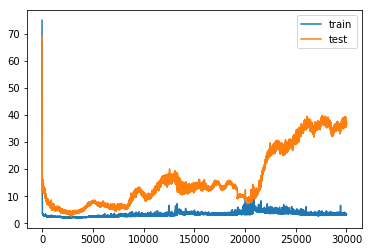

In [211]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=30000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [212]:
yhat = model.predict(validateX)

[0, 500, 0, 55000]

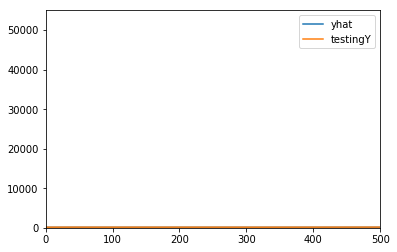

In [213]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
#pyplot.show()
plt.axis([0,500,0,55000])

In [214]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
9958.871341576132
9923.03874145079
9876.533599889815
10077.448344871973
10175.174207299466
10142.586434576717
10045.770625932159
10224.641466854213
10103.824582032594
10440.429896078773
10577.810675838498
10355.08346046084
10284.6274105285
10297.806665763417
10611.67059959331
10641.260306003098
11028.424242785839
10754.589812422788
10947.87919372397
10594.783124476906
10894.465933235118
10479.343969092859
10434.527305373662
10672.804250057472
10799.75222535099
10717.57483815459
10438.70006130474
10675.683190712898
11118.062947340622
11174.777489214552
11002.158507351396
11335.010047838263
11329.191509294596
10621.793785128733
10960.268668634935
10596.409519015868
10577.684222154503
10293.86192316422
10444.981681921436
10741.940791346291
10668.855486037082
10595.132670718713
10544.508143823137
10581.214751139514
10509.730752279176
10500.07581024088
10475.325429266479
10505.762704084009
10373.211580917943
10052.972913032314
9936.796084796479
9967.745105418211
9974.601579017624
9797

IndexError: index 507 is out of bounds for axis 0 with size 507

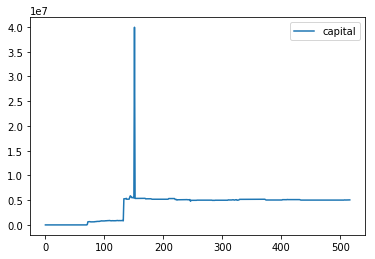

In [191]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [193]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

In [284]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(.5))
model.add(Dense(1))

Train on 1999 samples, validate on 1999 samples
Epoch 1/20000
 - 4s - loss: 37487.9763 - val_loss: 37485.3740
Epoch 2/20000
 - 0s - loss: 37479.2761 - val_loss: 37475.7800
Epoch 3/20000
 - 0s - loss: 37473.9212 - val_loss: 37471.9266
Epoch 4/20000
 - 0s - loss: 37470.1735 - val_loss: 37467.5917
Epoch 5/20000
 - 0s - loss: 37465.7087 - val_loss: 37462.2128
Epoch 6/20000
 - 0s - loss: 37459.9210 - val_loss: 37456.8197
Epoch 7/20000
 - 0s - loss: 37455.0788 - val_loss: 37453.1310
Epoch 8/20000
 - 0s - loss: 37451.4120 - val_loss: 37449.5650
Epoch 9/20000
 - 0s - loss: 37447.7443 - val_loss: 37446.0714
Epoch 10/20000
 - 0s - loss: 37444.4684 - val_loss: 37442.6528
Epoch 11/20000
 - 0s - loss: 37440.8582 - val_loss: 37439.2729
Epoch 12/20000
 - 0s - loss: 37437.5392 - val_loss: 37435.9288
Epoch 13/20000
 - 0s - loss: 37434.3339 - val_loss: 37432.6272
Epoch 14/20000
 - 0s - loss: 37431.0214 - val_loss: 37429.3454
Epoch 15/20000
 - 0s - loss: 37427.8480 - val_loss: 37426.0983
Epoch 16/20000
 

Epoch 130/20000
 - 0s - loss: 37073.1484 - val_loss: 37071.7289
Epoch 131/20000
 - 0s - loss: 37072.0330 - val_loss: 37068.6817
Epoch 132/20000
 - 0s - loss: 37066.8862 - val_loss: 37065.6198
Epoch 133/20000
 - 0s - loss: 37065.7418 - val_loss: 37062.5687
Epoch 134/20000
 - 0s - loss: 37060.6986 - val_loss: 37059.5104
Epoch 135/20000
 - 0s - loss: 37057.8250 - val_loss: 37056.4546
Epoch 136/20000
 - 0s - loss: 37055.9861 - val_loss: 37053.3998
Epoch 137/20000
 - 0s - loss: 37053.1489 - val_loss: 37050.3454
Epoch 138/20000
 - 0s - loss: 37049.7312 - val_loss: 37047.2949
Epoch 139/20000
 - 0s - loss: 37046.8640 - val_loss: 37044.2413
Epoch 140/20000
 - 0s - loss: 37043.0993 - val_loss: 37041.1854
Epoch 141/20000
 - 0s - loss: 37040.9295 - val_loss: 37038.1355
Epoch 142/20000
 - 0s - loss: 37036.6970 - val_loss: 37035.0759
Epoch 143/20000
 - 0s - loss: 37035.0851 - val_loss: 37032.0288
Epoch 144/20000
 - 0s - loss: 37028.8589 - val_loss: 37028.9585
Epoch 145/20000
 - 0s - loss: 37027.5647

 - 0s - loss: 36682.9404 - val_loss: 36680.4626
Epoch 259/20000
 - 0s - loss: 36679.4714 - val_loss: 36677.4085
Epoch 260/20000
 - 0s - loss: 36677.9575 - val_loss: 36674.3543
Epoch 261/20000
 - 0s - loss: 36673.0416 - val_loss: 36671.3030
Epoch 262/20000
 - 1s - loss: 36669.1563 - val_loss: 36668.2443
Epoch 263/20000
 - 0s - loss: 36664.2978 - val_loss: 36665.1784
Epoch 264/20000
 - 1s - loss: 36658.8225 - val_loss: 36662.1074
Epoch 265/20000
 - 0s - loss: 36663.2528 - val_loss: 36659.0567
Epoch 266/20000
 - 0s - loss: 36658.8734 - val_loss: 36656.0099
Epoch 267/20000
 - 0s - loss: 36651.9995 - val_loss: 36652.9455
Epoch 268/20000
 - 0s - loss: 36652.6304 - val_loss: 36649.8892
Epoch 269/20000
 - 0s - loss: 36647.0778 - val_loss: 36646.8302
Epoch 270/20000
 - 0s - loss: 36644.9149 - val_loss: 36643.7750
Epoch 271/20000
 - 0s - loss: 36644.8993 - val_loss: 36640.7283
Epoch 272/20000
 - 0s - loss: 36638.1006 - val_loss: 36637.6698
Epoch 273/20000
 - 0s - loss: 36634.6392 - val_loss: 366

Epoch 387/20000
 - 0s - loss: 36289.6349 - val_loss: 36286.2127
Epoch 388/20000
 - 0s - loss: 36284.5565 - val_loss: 36283.1548
Epoch 389/20000
 - 0s - loss: 36286.3841 - val_loss: 36280.1075
Epoch 390/20000
 - 0s - loss: 36283.5318 - val_loss: 36277.0607
Epoch 391/20000
 - 0s - loss: 36272.2140 - val_loss: 36274.0015
Epoch 392/20000
 - 0s - loss: 36270.4867 - val_loss: 36270.9387
Epoch 393/20000
 - 0s - loss: 36270.2990 - val_loss: 36267.8808
Epoch 394/20000
 - 0s - loss: 36268.8203 - val_loss: 36264.8269
Epoch 395/20000
 - 0s - loss: 36260.8803 - val_loss: 36261.7680
Epoch 396/20000
 - 0s - loss: 36258.8679 - val_loss: 36258.7092
Epoch 397/20000
 - 0s - loss: 36262.2897 - val_loss: 36255.6619
Epoch 398/20000
 - 0s - loss: 36255.9319 - val_loss: 36252.6075
Epoch 399/20000
 - 0s - loss: 36248.8073 - val_loss: 36249.5487
Epoch 400/20000
 - 0s - loss: 36253.9552 - val_loss: 36246.5009
Epoch 401/20000
 - 0s - loss: 36240.9796 - val_loss: 36243.4384
Epoch 402/20000
 - 0s - loss: 36242.0931

 - 0s - loss: 35893.4687 - val_loss: 35894.9865
Epoch 516/20000
 - 0s - loss: 35896.0877 - val_loss: 35891.9317
Epoch 517/20000
 - 1s - loss: 35887.6601 - val_loss: 35888.8737
Epoch 518/20000
 - 0s - loss: 35884.6844 - val_loss: 35885.8107
Epoch 519/20000
 - 0s - loss: 35882.9941 - val_loss: 35882.7557
Epoch 520/20000
 - 0s - loss: 35892.3273 - val_loss: 35879.7159
Epoch 521/20000
 - 0s - loss: 35877.5406 - val_loss: 35876.6620
Epoch 522/20000
 - 0s - loss: 35873.6037 - val_loss: 35873.6037
Epoch 523/20000
 - 0s - loss: 35870.7113 - val_loss: 35870.5486
Epoch 524/20000
 - 0s - loss: 35864.5037 - val_loss: 35867.4791
Epoch 525/20000
 - 0s - loss: 35865.0460 - val_loss: 35864.4198
Epoch 526/20000
 - 0s - loss: 35865.1034 - val_loss: 35861.3671
Epoch 527/20000
 - 0s - loss: 35855.9289 - val_loss: 35858.3072
Epoch 528/20000
 - 0s - loss: 35857.4670 - val_loss: 35855.2486
Epoch 529/20000
 - 0s - loss: 35857.2127 - val_loss: 35852.1977
Epoch 530/20000
 - 0s - loss: 35846.0613 - val_loss: 358

Epoch 644/20000
 - 0s - loss: 35499.2318 - val_loss: 35500.7444
Epoch 645/20000
 - 0s - loss: 35492.4298 - val_loss: 35497.6772
Epoch 646/20000
 - 0s - loss: 35499.3645 - val_loss: 35494.6238
Epoch 647/20000
 - 0s - loss: 35494.2533 - val_loss: 35491.5682
Epoch 648/20000
 - 0s - loss: 35493.3248 - val_loss: 35488.5175
Epoch 649/20000
 - 1s - loss: 35487.1809 - val_loss: 35485.4629
Epoch 650/20000
 - 1s - loss: 35480.9471 - val_loss: 35482.3997
Epoch 651/20000
 - 0s - loss: 35476.5228 - val_loss: 35479.3380
Epoch 652/20000
 - 1s - loss: 35486.6384 - val_loss: 35476.2909
Epoch 653/20000
 - 1s - loss: 35466.0583 - val_loss: 35473.2289
Epoch 654/20000
 - 1s - loss: 35475.3966 - val_loss: 35470.1745
Epoch 655/20000
 - 1s - loss: 35468.5250 - val_loss: 35467.1194
Epoch 656/20000
 - 0s - loss: 35462.7754 - val_loss: 35464.0569
Epoch 657/20000
 - 0s - loss: 35464.8282 - val_loss: 35461.0013
Epoch 658/20000
 - 0s - loss: 35452.7771 - val_loss: 35457.9392
Epoch 659/20000
 - 0s - loss: 35455.0398

 - 0s - loss: 35108.0281 - val_loss: 35109.5256
Epoch 773/20000
 - 0s - loss: 35109.9255 - val_loss: 35106.4644
Epoch 774/20000
 - 0s - loss: 35098.7488 - val_loss: 35103.4006
Epoch 775/20000
 - 0s - loss: 35107.1217 - val_loss: 35100.3533
Epoch 776/20000
 - 0s - loss: 35097.3111 - val_loss: 35097.2948
Epoch 777/20000
 - 1s - loss: 35094.8727 - val_loss: 35094.2367
Epoch 778/20000
 - 0s - loss: 35087.3801 - val_loss: 35091.1738
Epoch 779/20000
 - 1s - loss: 35089.9552 - val_loss: 35088.1192
Epoch 780/20000
 - 1s - loss: 35084.8922 - val_loss: 35085.0608
Epoch 781/20000
 - 1s - loss: 35087.3159 - val_loss: 35082.0097
Epoch 782/20000
 - 1s - loss: 35077.5488 - val_loss: 35078.9510
Epoch 783/20000
 - 1s - loss: 35078.9901 - val_loss: 35075.8925
Epoch 784/20000
 - 1s - loss: 35073.9500 - val_loss: 35072.8381
Epoch 785/20000
 - 1s - loss: 35072.3600 - val_loss: 35069.7830
Epoch 786/20000
 - 0s - loss: 35063.9907 - val_loss: 35066.7244
Epoch 787/20000
 - 0s - loss: 35069.9685 - val_loss: 350

Epoch 901/20000
 - 0s - loss: 34713.6073 - val_loss: 34715.2873
Epoch 902/20000
 - 0s - loss: 34709.8959 - val_loss: 34712.2290
Epoch 903/20000
 - 0s - loss: 34717.1216 - val_loss: 34709.1739
Epoch 904/20000
 - 1s - loss: 34714.4100 - val_loss: 34706.1241
Epoch 905/20000
 - 0s - loss: 34696.6520 - val_loss: 34703.0608
Epoch 906/20000
 - 0s - loss: 34698.5504 - val_loss: 34700.0012
Epoch 907/20000
 - 0s - loss: 34705.4376 - val_loss: 34696.9476
Epoch 908/20000
 - 0s - loss: 34700.8124 - val_loss: 34693.8958
Epoch 909/20000
 - 0s - loss: 34691.2030 - val_loss: 34690.8374
Epoch 910/20000
 - 0s - loss: 34682.5077 - val_loss: 34687.7759
Epoch 911/20000
 - 0s - loss: 34690.6325 - val_loss: 34684.7171
Epoch 912/20000
 - 0s - loss: 34678.0377 - val_loss: 34681.6587
Epoch 913/20000
 - 0s - loss: 34693.0418 - val_loss: 34678.6152
Epoch 914/20000
 - 0s - loss: 34681.1139 - val_loss: 34675.5607
Epoch 915/20000
 - 0s - loss: 34666.9139 - val_loss: 34672.4948
Epoch 916/20000
 - 0s - loss: 34659.4223

Epoch 1029/20000
 - 0s - loss: 34315.2526 - val_loss: 34324.1001
Epoch 1030/20000
 - 0s - loss: 34313.5287 - val_loss: 34321.0330
Epoch 1031/20000
 - 0s - loss: 34314.3710 - val_loss: 34317.9706
Epoch 1032/20000
 - 0s - loss: 34312.8608 - val_loss: 34314.9081
Epoch 1033/20000
 - 0s - loss: 34314.4517 - val_loss: 34311.8501
Epoch 1034/20000
 - 0s - loss: 34297.8077 - val_loss: 34308.7869
Epoch 1035/20000
 - 0s - loss: 34306.3972 - val_loss: 34305.7266
Epoch 1036/20000
 - 0s - loss: 34308.0153 - val_loss: 34302.6699
Epoch 1037/20000
 - 0s - loss: 34315.7532 - val_loss: 34299.6267
Epoch 1038/20000
 - 0s - loss: 34300.8309 - val_loss: 34296.5727
Epoch 1039/20000
 - 0s - loss: 34295.9305 - val_loss: 34293.5183
Epoch 1040/20000
 - 0s - loss: 34299.4867 - val_loss: 34290.4630
Epoch 1041/20000
 - 0s - loss: 34284.8046 - val_loss: 34287.4039
Epoch 1042/20000
 - 0s - loss: 34280.5802 - val_loss: 34284.3452
Epoch 1043/20000
 - 0s - loss: 34291.4958 - val_loss: 34281.2943
Epoch 1044/20000
 - 0s - 

 - 1s - loss: 33941.3505 - val_loss: 33938.9430
Epoch 1156/20000
 - 1s - loss: 33940.4640 - val_loss: 33935.8884
Epoch 1157/20000
 - 1s - loss: 33931.5731 - val_loss: 33932.8300
Epoch 1158/20000
 - 0s - loss: 33927.7343 - val_loss: 33929.7682
Epoch 1159/20000
 - 1s - loss: 33939.6362 - val_loss: 33926.7246
Epoch 1160/20000
 - 0s - loss: 33930.8455 - val_loss: 33923.6695
Epoch 1161/20000
 - 0s - loss: 33923.3511 - val_loss: 33920.6186
Epoch 1162/20000
 - 0s - loss: 33908.3007 - val_loss: 33917.5529
Epoch 1163/20000
 - 0s - loss: 33921.5981 - val_loss: 33914.4961
Epoch 1164/20000
 - 1s - loss: 33902.9224 - val_loss: 33911.4357
Epoch 1165/20000
 - 1s - loss: 33908.4286 - val_loss: 33908.3766
Epoch 1166/20000
 - 0s - loss: 33900.6980 - val_loss: 33905.3146
Epoch 1167/20000
 - 0s - loss: 33900.5456 - val_loss: 33902.2559
Epoch 1168/20000
 - 0s - loss: 33890.9156 - val_loss: 33899.1955
Epoch 1169/20000
 - 0s - loss: 33902.6692 - val_loss: 33896.1393
Epoch 1170/20000
 - 0s - loss: 33906.3759 

Epoch 1282/20000
 - 1s - loss: 33571.3142 - val_loss: 33550.8255
Epoch 1283/20000
 - 0s - loss: 33553.7561 - val_loss: 33547.7748
Epoch 1284/20000
 - 0s - loss: 33553.6296 - val_loss: 33544.7206
Epoch 1285/20000
 - 1s - loss: 33546.3423 - val_loss: 33541.6620
Epoch 1286/20000
 - 1s - loss: 33549.4910 - val_loss: 33538.6113
Epoch 1287/20000
 - 1s - loss: 33535.5341 - val_loss: 33535.5535
Epoch 1288/20000
 - 0s - loss: 33557.2984 - val_loss: 33532.5093
Epoch 1289/20000
 - 1s - loss: 33540.9460 - val_loss: 33529.4664
Epoch 1290/20000
 - 0s - loss: 33523.7893 - val_loss: 33526.4020
Epoch 1291/20000
 - 1s - loss: 33519.6361 - val_loss: 33523.3408
Epoch 1292/20000
 - 1s - loss: 33500.2815 - val_loss: 33520.2682
Epoch 1293/20000
 - 0s - loss: 33514.2248 - val_loss: 33517.2050
Epoch 1294/20000
 - 1s - loss: 33512.3790 - val_loss: 33514.1425
Epoch 1295/20000
 - 0s - loss: 33520.8635 - val_loss: 33511.0908
Epoch 1296/20000
 - 0s - loss: 33510.4280 - val_loss: 33508.0370
Epoch 1297/20000
 - 0s - 

 - 0s - loss: 33172.5087 - val_loss: 33165.7021
Epoch 1409/20000
 - 0s - loss: 33168.2225 - val_loss: 33162.6472
Epoch 1410/20000
 - 0s - loss: 33157.6927 - val_loss: 33159.5879
Epoch 1411/20000
 - 0s - loss: 33164.4618 - val_loss: 33156.5367
Epoch 1412/20000
 - 1s - loss: 33159.3173 - val_loss: 33153.4823
Epoch 1413/20000
 - 1s - loss: 33157.9897 - val_loss: 33150.4278
Epoch 1414/20000
 - 0s - loss: 33156.7434 - val_loss: 33147.3733
Epoch 1415/20000
 - 0s - loss: 33164.3869 - val_loss: 33144.3298
Epoch 1416/20000
 - 0s - loss: 33122.1755 - val_loss: 33141.2614
Epoch 1417/20000
 - 0s - loss: 33149.4072 - val_loss: 33138.2088
Epoch 1418/20000
 - 0s - loss: 33145.9689 - val_loss: 33135.1540
Epoch 1419/20000
 - 0s - loss: 33133.3292 - val_loss: 33132.0995
Epoch 1420/20000
 - 0s - loss: 33133.6546 - val_loss: 33129.0456
Epoch 1421/20000
 - 0s - loss: 33111.4341 - val_loss: 33125.9790
Epoch 1422/20000
 - 0s - loss: 33116.6357 - val_loss: 33122.9164
Epoch 1423/20000
 - 0s - loss: 33139.5970 

Epoch 1535/20000
 - 0s - loss: 32792.7539 - val_loss: 32777.5610
Epoch 1536/20000
 - 0s - loss: 32777.0112 - val_loss: 32774.5054
Epoch 1537/20000
 - 1s - loss: 32779.9530 - val_loss: 32771.4517
Epoch 1538/20000
 - 1s - loss: 32755.4802 - val_loss: 32768.3923
Epoch 1539/20000
 - 1s - loss: 32755.9359 - val_loss: 32765.3263
Epoch 1540/20000
 - 1s - loss: 32766.9215 - val_loss: 32762.2675
Epoch 1541/20000
 - 1s - loss: 32763.9696 - val_loss: 32759.2155
Epoch 1542/20000
 - 1s - loss: 32750.1091 - val_loss: 32756.1586
Epoch 1543/20000
 - 1s - loss: 32747.7002 - val_loss: 32753.0956
Epoch 1544/20000
 - 1s - loss: 32742.5180 - val_loss: 32750.0330
Epoch 1545/20000
 - 1s - loss: 32736.0013 - val_loss: 32746.9706
Epoch 1546/20000
 - 1s - loss: 32751.8659 - val_loss: 32743.9129
Epoch 1547/20000
 - 1s - loss: 32744.0558 - val_loss: 32740.8607
Epoch 1548/20000
 - 0s - loss: 32737.9196 - val_loss: 32737.8059
Epoch 1549/20000
 - 0s - loss: 32730.8218 - val_loss: 32734.7449
Epoch 1550/20000
 - 0s - 

 - 0s - loss: 32388.9081 - val_loss: 32392.4359
Epoch 1662/20000
 - 0s - loss: 32396.7228 - val_loss: 32389.3816
Epoch 1663/20000
 - 0s - loss: 32381.5902 - val_loss: 32386.3251
Epoch 1664/20000
 - 0s - loss: 32384.8398 - val_loss: 32383.2678
Epoch 1665/20000
 - 0s - loss: 32380.6700 - val_loss: 32380.2128
Epoch 1666/20000
 - 0s - loss: 32377.3563 - val_loss: 32377.1563
Epoch 1667/20000
 - 0s - loss: 32386.7888 - val_loss: 32374.1040
Epoch 1668/20000
 - 0s - loss: 32385.8946 - val_loss: 32371.0535
Epoch 1669/20000
 - 0s - loss: 32381.6842 - val_loss: 32368.0040
Epoch 1670/20000
 - 0s - loss: 32349.6808 - val_loss: 32364.9414
Epoch 1671/20000
 - 0s - loss: 32349.8319 - val_loss: 32361.8767
Epoch 1672/20000
 - 0s - loss: 32352.8506 - val_loss: 32358.8177
Epoch 1673/20000
 - 0s - loss: 32353.1696 - val_loss: 32355.7558
Epoch 1674/20000
 - 0s - loss: 32353.2491 - val_loss: 32352.6975
Epoch 1675/20000
 - 0s - loss: 32347.2220 - val_loss: 32349.6423
Epoch 1676/20000
 - 0s - loss: 32348.1448 

Epoch 1788/20000
 - 0s - loss: 32008.9835 - val_loss: 32004.2736
Epoch 1789/20000
 - 0s - loss: 32010.2161 - val_loss: 32001.2166
Epoch 1790/20000
 - 0s - loss: 31991.3838 - val_loss: 31998.1618
Epoch 1791/20000
 - 0s - loss: 32004.9129 - val_loss: 31995.1111
Epoch 1792/20000
 - 0s - loss: 31976.6863 - val_loss: 31992.0470
Epoch 1793/20000
 - 0s - loss: 32021.4542 - val_loss: 31989.0016
Epoch 1794/20000
 - 0s - loss: 31988.3534 - val_loss: 31985.9489
Epoch 1795/20000
 - 0s - loss: 31997.1306 - val_loss: 31982.8966
Epoch 1796/20000
 - 0s - loss: 31983.1420 - val_loss: 31979.8455
Epoch 1797/20000
 - 0s - loss: 31998.6056 - val_loss: 31976.7948
Epoch 1798/20000
 - 0s - loss: 31989.7317 - val_loss: 31973.7510
Epoch 1799/20000
 - 0s - loss: 31969.4280 - val_loss: 31970.6891
Epoch 1800/20000
 - 0s - loss: 31965.3166 - val_loss: 31967.6308
Epoch 1801/20000
 - 0s - loss: 31981.4083 - val_loss: 31964.5809
Epoch 1802/20000
 - 0s - loss: 31952.3726 - val_loss: 31961.5161
Epoch 1803/20000
 - 0s - 

 - 0s - loss: 31610.5735 - val_loss: 31619.1348
Epoch 1915/20000
 - 0s - loss: 31609.9221 - val_loss: 31616.0760
Epoch 1916/20000
 - 0s - loss: 31614.8780 - val_loss: 31613.0194
Epoch 1917/20000
 - 0s - loss: 31596.1953 - val_loss: 31609.9629
Epoch 1918/20000
 - 0s - loss: 31617.0044 - val_loss: 31606.9080
Epoch 1919/20000
 - 0s - loss: 31583.2241 - val_loss: 31603.8476
Epoch 1920/20000
 - 0s - loss: 31618.5136 - val_loss: 31600.7939
Epoch 1921/20000
 - 0s - loss: 31607.3566 - val_loss: 31597.7474
Epoch 1922/20000
 - 0s - loss: 31576.0171 - val_loss: 31594.6797
Epoch 1923/20000
 - 0s - loss: 31599.8898 - val_loss: 31591.6308
Epoch 1924/20000
 - 0s - loss: 31575.7055 - val_loss: 31588.5692
Epoch 1925/20000
 - 0s - loss: 31594.7344 - val_loss: 31585.5169
Epoch 1926/20000
 - 0s - loss: 31604.3104 - val_loss: 31582.4667
Epoch 1927/20000
 - 0s - loss: 31575.3012 - val_loss: 31579.4164
Epoch 1928/20000
 - 0s - loss: 31569.9880 - val_loss: 31576.3551
Epoch 1929/20000
 - 0s - loss: 31556.9174 

Epoch 2041/20000
 - 0s - loss: 31232.2144 - val_loss: 31231.0175
Epoch 2042/20000
 - 0s - loss: 31232.1912 - val_loss: 31227.9654
Epoch 2043/20000
 - 0s - loss: 31217.6371 - val_loss: 31224.9042
Epoch 2044/20000
 - 0s - loss: 31228.2897 - val_loss: 31221.8504
Epoch 2045/20000
 - 0s - loss: 31223.6298 - val_loss: 31218.7981
Epoch 2046/20000
 - 0s - loss: 31225.6718 - val_loss: 31215.7403
Epoch 2047/20000
 - 0s - loss: 31177.4900 - val_loss: 31212.6740
Epoch 2048/20000
 - 0s - loss: 31224.5701 - val_loss: 31209.6190
Epoch 2049/20000
 - 0s - loss: 31197.0037 - val_loss: 31206.5642
Epoch 2050/20000
 - 0s - loss: 31199.9237 - val_loss: 31203.5017
Epoch 2051/20000
 - 0s - loss: 31191.4685 - val_loss: 31200.4427
Epoch 2052/20000
 - 0s - loss: 31193.5442 - val_loss: 31197.3850
Epoch 2053/20000
 - 0s - loss: 31194.2618 - val_loss: 31194.3266
Epoch 2054/20000
 - 0s - loss: 31193.9818 - val_loss: 31191.2737
Epoch 2055/20000
 - 0s - loss: 31182.0015 - val_loss: 31188.2129
Epoch 2056/20000
 - 0s - 

 - 0s - loss: 30842.1851 - val_loss: 30845.9278
Epoch 2168/20000
 - 0s - loss: 30824.8102 - val_loss: 30842.8651
Epoch 2169/20000
 - 0s - loss: 30864.6782 - val_loss: 30839.8183
Epoch 2170/20000
 - 0s - loss: 30828.2138 - val_loss: 30836.7598
Epoch 2171/20000
 - 0s - loss: 30840.2600 - val_loss: 30833.7050
Epoch 2172/20000
 - 0s - loss: 30828.1312 - val_loss: 30830.6462
Epoch 2173/20000
 - 0s - loss: 30857.2524 - val_loss: 30827.5993
Epoch 2174/20000
 - 0s - loss: 30829.2148 - val_loss: 30824.5461
Epoch 2175/20000
 - 0s - loss: 30816.4553 - val_loss: 30821.4903
Epoch 2176/20000
 - 0s - loss: 30814.8120 - val_loss: 30818.4318
Epoch 2177/20000
 - 0s - loss: 30833.9323 - val_loss: 30815.3804
Epoch 2178/20000
 - 0s - loss: 30813.8137 - val_loss: 30812.3263
Epoch 2179/20000
 - 0s - loss: 30814.4141 - val_loss: 30809.2693
Epoch 2180/20000
 - 0s - loss: 30808.1848 - val_loss: 30806.2129
Epoch 2181/20000
 - 0s - loss: 30778.8882 - val_loss: 30803.1502
Epoch 2182/20000
 - 0s - loss: 30797.1665 

Epoch 2294/20000
 - 0s - loss: 30441.7035 - val_loss: 30457.7558
Epoch 2295/20000
 - 0s - loss: 30459.1730 - val_loss: 30454.7053
Epoch 2296/20000
 - 0s - loss: 30415.1465 - val_loss: 30451.6358
Epoch 2297/20000
 - 0s - loss: 30443.1131 - val_loss: 30448.5703
Epoch 2298/20000
 - 0s - loss: 30442.5058 - val_loss: 30445.5175
Epoch 2299/20000
 - 0s - loss: 30455.0714 - val_loss: 30442.4667
Epoch 2300/20000
 - 0s - loss: 30458.9357 - val_loss: 30439.4163
Epoch 2301/20000
 - 0s - loss: 30455.1504 - val_loss: 30436.3692
Epoch 2302/20000
 - 0s - loss: 30448.1986 - val_loss: 30433.3192
Epoch 2303/20000
 - 0s - loss: 30438.7523 - val_loss: 30430.2695
Epoch 2304/20000
 - 0s - loss: 30438.7759 - val_loss: 30427.2154
Epoch 2305/20000
 - 0s - loss: 30444.4213 - val_loss: 30424.1664
Epoch 2306/20000
 - 0s - loss: 30438.0892 - val_loss: 30421.1178
Epoch 2307/20000
 - 0s - loss: 30431.9160 - val_loss: 30418.0642
Epoch 2308/20000
 - 0s - loss: 30418.4504 - val_loss: 30415.0100
Epoch 2309/20000
 - 0s - 

 - 0s - loss: 30100.3323 - val_loss: 30072.7129
Epoch 2421/20000
 - 0s - loss: 30045.4678 - val_loss: 30069.6502
Epoch 2422/20000
 - 0s - loss: 30069.5038 - val_loss: 30066.5915
Epoch 2423/20000
 - 0s - loss: 30051.8963 - val_loss: 30063.5292
Epoch 2424/20000
 - 0s - loss: 30064.1579 - val_loss: 30060.4715
Epoch 2425/20000
 - 0s - loss: 30061.3204 - val_loss: 30057.4198
Epoch 2426/20000
 - 0s - loss: 30085.9501 - val_loss: 30054.3688
Epoch 2427/20000
 - 0s - loss: 30057.3675 - val_loss: 30051.3151
Epoch 2428/20000
 - 0s - loss: 29992.9676 - val_loss: 30048.2450
Epoch 2429/20000
 - 0s - loss: 30056.2497 - val_loss: 30045.1857
Epoch 2430/20000
 - 0s - loss: 30042.3681 - val_loss: 30042.1308
Epoch 2431/20000
 - 0s - loss: 30000.8499 - val_loss: 30039.0640
Epoch 2432/20000
 - 0s - loss: 30032.0555 - val_loss: 30036.0019
Epoch 2433/20000
 - 0s - loss: 30067.2098 - val_loss: 30032.9553
Epoch 2434/20000
 - 0s - loss: 30019.9690 - val_loss: 30029.9004
Epoch 2435/20000
 - 0s - loss: 30016.9910 

Epoch 2547/20000
 - 0s - loss: 29689.1516 - val_loss: 29684.5724
Epoch 2548/20000
 - 0s - loss: 29695.9500 - val_loss: 29681.5178
Epoch 2549/20000
 - 0s - loss: 29706.7807 - val_loss: 29678.4705
Epoch 2550/20000
 - 0s - loss: 29670.8953 - val_loss: 29675.4142
Epoch 2551/20000
 - 0s - loss: 29689.6433 - val_loss: 29672.3550
Epoch 2552/20000
 - 0s - loss: 29686.7000 - val_loss: 29669.3096
Epoch 2553/20000
 - 0s - loss: 29659.7046 - val_loss: 29666.2501
Epoch 2554/20000
 - 0s - loss: 29675.0346 - val_loss: 29663.1972
Epoch 2555/20000
 - 0s - loss: 29637.9770 - val_loss: 29660.1306
Epoch 2556/20000
 - 0s - loss: 29689.0157 - val_loss: 29657.0799
Epoch 2557/20000
 - 0s - loss: 29647.9306 - val_loss: 29654.0254
Epoch 2558/20000
 - 0s - loss: 29663.5436 - val_loss: 29650.9705
Epoch 2559/20000
 - 0s - loss: 29629.9542 - val_loss: 29647.9080
Epoch 2560/20000
 - 0s - loss: 29652.7584 - val_loss: 29644.8537
Epoch 2561/20000
 - 0s - loss: 29668.3124 - val_loss: 29641.7988
Epoch 2562/20000
 - 0s - 

 - 0s - loss: 29312.4577 - val_loss: 29299.4298
Epoch 2674/20000
 - 0s - loss: 29268.1672 - val_loss: 29296.3655
Epoch 2675/20000
 - 0s - loss: 29276.0267 - val_loss: 29293.3012
Epoch 2676/20000
 - 0s - loss: 29308.4796 - val_loss: 29290.2486
Epoch 2677/20000
 - 0s - loss: 29299.1343 - val_loss: 29287.2011
Epoch 2678/20000
 - 0s - loss: 29279.7313 - val_loss: 29284.1428
Epoch 2679/20000
 - 0s - loss: 29290.5061 - val_loss: 29281.0896
Epoch 2680/20000
 - 0s - loss: 29272.9428 - val_loss: 29278.0365
Epoch 2681/20000
 - 0s - loss: 29272.9701 - val_loss: 29274.9801
Epoch 2682/20000
 - 0s - loss: 29267.0774 - val_loss: 29271.9196
Epoch 2683/20000
 - 0s - loss: 29242.3372 - val_loss: 29268.8596
Epoch 2684/20000
 - 0s - loss: 29302.7589 - val_loss: 29265.8139
Epoch 2685/20000
 - 0s - loss: 29236.2980 - val_loss: 29262.7514
Epoch 2686/20000
 - 0s - loss: 29251.7419 - val_loss: 29259.6929
Epoch 2687/20000
 - 0s - loss: 29283.3144 - val_loss: 29256.6447
Epoch 2688/20000
 - 0s - loss: 29203.2797 

Epoch 2800/20000
 - 0s - loss: 28915.3178 - val_loss: 28911.2870
Epoch 2801/20000
 - 0s - loss: 28905.9011 - val_loss: 28908.2325
Epoch 2802/20000
 - 0s - loss: 28908.3217 - val_loss: 28905.1780
Epoch 2803/20000
 - 0s - loss: 28942.7012 - val_loss: 28902.1311
Epoch 2804/20000
 - 0s - loss: 28906.6551 - val_loss: 28899.0820
Epoch 2805/20000
 - 0s - loss: 28907.3640 - val_loss: 28896.0290
Epoch 2806/20000
 - 0s - loss: 28865.2778 - val_loss: 28892.9666
Epoch 2807/20000
 - 0s - loss: 28888.7412 - val_loss: 28889.9080
Epoch 2808/20000
 - 0s - loss: 28901.5888 - val_loss: 28886.8573
Epoch 2809/20000
 - 0s - loss: 28877.0217 - val_loss: 28883.7951
Epoch 2810/20000
 - 0s - loss: 28888.5900 - val_loss: 28880.7439
Epoch 2811/20000
 - 0s - loss: 28869.5692 - val_loss: 28877.6816
Epoch 2812/20000
 - 0s - loss: 28887.3329 - val_loss: 28874.6311
Epoch 2813/20000
 - 0s - loss: 28867.9613 - val_loss: 28871.5725
Epoch 2814/20000
 - 0s - loss: 28873.0717 - val_loss: 28868.5215
Epoch 2815/20000
 - 0s - 

 - 0s - loss: 28532.9775 - val_loss: 28526.2090
Epoch 2927/20000
 - 0s - loss: 28522.1383 - val_loss: 28523.1504
Epoch 2928/20000
 - 0s - loss: 28500.8347 - val_loss: 28520.0861
Epoch 2929/20000
 - 0s - loss: 28500.1723 - val_loss: 28517.0217
Epoch 2930/20000
 - 0s - loss: 28512.6906 - val_loss: 28513.9664
Epoch 2931/20000
 - 0s - loss: 28516.1996 - val_loss: 28510.9143
Epoch 2932/20000
 - 0s - loss: 28496.3784 - val_loss: 28507.8490
Epoch 2933/20000
 - 0s - loss: 28502.3652 - val_loss: 28504.7987
Epoch 2934/20000
 - 1s - loss: 28484.5064 - val_loss: 28501.7361
Epoch 2935/20000
 - 0s - loss: 28466.6965 - val_loss: 28498.6698
Epoch 2936/20000
 - 1s - loss: 28515.7561 - val_loss: 28495.6153
Epoch 2937/20000
 - 0s - loss: 28505.1242 - val_loss: 28492.5679
Epoch 2938/20000
 - 0s - loss: 28492.3188 - val_loss: 28489.5115
Epoch 2939/20000
 - 0s - loss: 28493.3661 - val_loss: 28486.4549
Epoch 2940/20000
 - 0s - loss: 28461.8725 - val_loss: 28483.3947
Epoch 2941/20000
 - 1s - loss: 28511.8747 

Epoch 3053/20000
 - 0s - loss: 28192.7155 - val_loss: 28138.0799
Epoch 3054/20000
 - 0s - loss: 28149.3537 - val_loss: 28135.0197
Epoch 3055/20000
 - 0s - loss: 28146.4619 - val_loss: 28131.9740
Epoch 3056/20000
 - 0s - loss: 28130.0234 - val_loss: 28128.9143
Epoch 3057/20000
 - 0s - loss: 28113.8282 - val_loss: 28125.8549
Epoch 3058/20000
 - 0s - loss: 28098.2919 - val_loss: 28122.7868
Epoch 3059/20000
 - 0s - loss: 28127.3157 - val_loss: 28119.7286
Epoch 3060/20000
 - 1s - loss: 28126.0976 - val_loss: 28116.6778
Epoch 3061/20000
 - 0s - loss: 28116.1236 - val_loss: 28113.6171
Epoch 3062/20000
 - 0s - loss: 28113.9756 - val_loss: 28110.5606
Epoch 3063/20000
 - 0s - loss: 28112.8610 - val_loss: 28107.5077
Epoch 3064/20000
 - 1s - loss: 28127.2509 - val_loss: 28104.4587
Epoch 3065/20000
 - 0s - loss: 28110.1961 - val_loss: 28101.4043
Epoch 3066/20000
 - 0s - loss: 28125.5963 - val_loss: 28098.3571
Epoch 3067/20000
 - 0s - loss: 28104.1123 - val_loss: 28095.2990
Epoch 3068/20000
 - 1s - 

 - 1s - loss: 27717.5255 - val_loss: 27752.9510
Epoch 3180/20000
 - 0s - loss: 27731.5357 - val_loss: 27749.8845
Epoch 3181/20000
 - 1s - loss: 27735.5163 - val_loss: 27746.8265
Epoch 3182/20000
 - 1s - loss: 27726.7757 - val_loss: 27743.7634
Epoch 3183/20000
 - 1s - loss: 27739.3885 - val_loss: 27740.7071
Epoch 3184/20000
 - 1s - loss: 27750.9585 - val_loss: 27737.6543
Epoch 3185/20000
 - 1s - loss: 27731.3682 - val_loss: 27734.5990
Epoch 3186/20000
 - 1s - loss: 27745.4441 - val_loss: 27731.5448
Epoch 3187/20000
 - 1s - loss: 27708.7748 - val_loss: 27728.4862
Epoch 3188/20000
 - 1s - loss: 27741.0796 - val_loss: 27725.4317
Epoch 3189/20000
 - 1s - loss: 27695.2106 - val_loss: 27722.3692
Epoch 3190/20000
 - 0s - loss: 27727.8399 - val_loss: 27719.3142
Epoch 3191/20000
 - 1s - loss: 27746.3012 - val_loss: 27716.2674
Epoch 3192/20000
 - 1s - loss: 27706.3811 - val_loss: 27713.2091
Epoch 3193/20000
 - 1s - loss: 27715.7778 - val_loss: 27710.1544
Epoch 3194/20000
 - 0s - loss: 27730.8713 

Epoch 3306/20000
 - 0s - loss: 27426.4293 - val_loss: 27364.8029
Epoch 3307/20000
 - 0s - loss: 27380.2242 - val_loss: 27361.7559
Epoch 3308/20000
 - 0s - loss: 27386.2497 - val_loss: 27358.7049
Epoch 3309/20000
 - 0s - loss: 27310.4934 - val_loss: 27355.6365
Epoch 3310/20000
 - 0s - loss: 27343.1475 - val_loss: 27352.5686
Epoch 3311/20000
 - 1s - loss: 27365.5085 - val_loss: 27349.5174
Epoch 3312/20000
 - 1s - loss: 27337.4019 - val_loss: 27346.4591
Epoch 3313/20000
 - 0s - loss: 27346.8664 - val_loss: 27343.4042
Epoch 3314/20000
 - 0s - loss: 27286.5031 - val_loss: 27340.3359
Epoch 3315/20000
 - 0s - loss: 27375.3255 - val_loss: 27337.2829
Epoch 3316/20000
 - 0s - loss: 27353.3524 - val_loss: 27334.2346
Epoch 3317/20000
 - 0s - loss: 27340.8663 - val_loss: 27331.1739
Epoch 3318/20000
 - 0s - loss: 27308.1040 - val_loss: 27328.1170
Epoch 3319/20000
 - 0s - loss: 27377.3995 - val_loss: 27325.0646
Epoch 3320/20000
 - 1s - loss: 27363.7494 - val_loss: 27322.0251
Epoch 3321/20000
 - 1s - 

 - 1s - loss: 27020.4437 - val_loss: 26979.6563
Epoch 3433/20000
 - 1s - loss: 26967.6849 - val_loss: 26976.5993
Epoch 3434/20000
 - 0s - loss: 26938.7582 - val_loss: 26973.5349
Epoch 3435/20000
 - 1s - loss: 27004.6693 - val_loss: 26970.4822
Epoch 3436/20000
 - 0s - loss: 26994.0163 - val_loss: 26967.4359
Epoch 3437/20000
 - 1s - loss: 26957.4379 - val_loss: 26964.3809
Epoch 3438/20000
 - 0s - loss: 26939.7003 - val_loss: 26961.3165
Epoch 3439/20000
 - 1s - loss: 26963.3421 - val_loss: 26958.2601
Epoch 3440/20000
 - 0s - loss: 26927.0326 - val_loss: 26955.1975
Epoch 3441/20000
 - 0s - loss: 26939.9671 - val_loss: 26952.1351
Epoch 3442/20000
 - 0s - loss: 26898.9216 - val_loss: 26949.0665
Epoch 3443/20000
 - 0s - loss: 26967.4597 - val_loss: 26946.0141
Epoch 3444/20000
 - 0s - loss: 26947.9753 - val_loss: 26942.9590
Epoch 3445/20000
 - 0s - loss: 26936.2662 - val_loss: 26939.9005
Epoch 3446/20000
 - 0s - loss: 26954.0189 - val_loss: 26936.8494
Epoch 3447/20000
 - 0s - loss: 26941.1903 

Epoch 3559/20000
 - 1s - loss: 26612.6497 - val_loss: 26591.4982
Epoch 3560/20000
 - 1s - loss: 26541.5559 - val_loss: 26588.4316
Epoch 3561/20000
 - 0s - loss: 26605.6639 - val_loss: 26585.3712
Epoch 3562/20000
 - 0s - loss: 26579.0211 - val_loss: 26582.3142
Epoch 3563/20000
 - 0s - loss: 26587.9167 - val_loss: 26579.2599
Epoch 3564/20000
 - 0s - loss: 26576.9113 - val_loss: 26576.2051
Epoch 3565/20000
 - 0s - loss: 26504.2332 - val_loss: 26573.1347
Epoch 3566/20000
 - 0s - loss: 26583.9315 - val_loss: 26570.0760
Epoch 3567/20000
 - 0s - loss: 26601.1424 - val_loss: 26567.0274
Epoch 3568/20000
 - 0s - loss: 26580.3298 - val_loss: 26563.9744
Epoch 3569/20000
 - 0s - loss: 26591.4143 - val_loss: 26560.9239
Epoch 3570/20000
 - 0s - loss: 26550.4765 - val_loss: 26557.8670
Epoch 3571/20000
 - 0s - loss: 26595.5876 - val_loss: 26554.8183
Epoch 3572/20000
 - 0s - loss: 26550.7476 - val_loss: 26551.7601
Epoch 3573/20000
 - 0s - loss: 26543.2407 - val_loss: 26548.7010
Epoch 3574/20000
 - 0s - 

 - 0s - loss: 26219.2514 - val_loss: 26206.3186
Epoch 3686/20000
 - 1s - loss: 26209.6069 - val_loss: 26203.2660
Epoch 3687/20000
 - 0s - loss: 26239.3096 - val_loss: 26200.2171
Epoch 3688/20000
 - 1s - loss: 26221.3796 - val_loss: 26197.1663
Epoch 3689/20000
 - 0s - loss: 26195.1370 - val_loss: 26194.1150
Epoch 3690/20000
 - 0s - loss: 26167.9739 - val_loss: 26191.0487
Epoch 3691/20000
 - 0s - loss: 26167.0248 - val_loss: 26187.9860
Epoch 3692/20000
 - 0s - loss: 26178.6662 - val_loss: 26184.9313
Epoch 3693/20000
 - 1s - loss: 26188.6804 - val_loss: 26181.8731
Epoch 3694/20000
 - 0s - loss: 26196.7999 - val_loss: 26178.8200
Epoch 3695/20000
 - 0s - loss: 26166.0534 - val_loss: 26175.7660
Epoch 3696/20000
 - 0s - loss: 26193.2508 - val_loss: 26172.7068
Epoch 3697/20000
 - 0s - loss: 26191.2361 - val_loss: 26169.6580
Epoch 3698/20000
 - 0s - loss: 26153.2097 - val_loss: 26166.5996
Epoch 3699/20000
 - 0s - loss: 26170.5797 - val_loss: 26163.5449
Epoch 3700/20000
 - 0s - loss: 26173.4594 

Epoch 3812/20000
 - 1s - loss: 25805.8082 - val_loss: 25818.1775
Epoch 3813/20000
 - 1s - loss: 25773.5760 - val_loss: 25815.1112
Epoch 3814/20000
 - 1s - loss: 25822.1649 - val_loss: 25812.0508
Epoch 3815/20000
 - 0s - loss: 25800.5261 - val_loss: 25808.9942
Epoch 3816/20000
 - 1s - loss: 25826.8880 - val_loss: 25805.9398
Epoch 3817/20000
 - 1s - loss: 25788.4184 - val_loss: 25802.8847
Epoch 3818/20000
 - 0s - loss: 25792.9599 - val_loss: 25799.8243
Epoch 3819/20000
 - 0s - loss: 25804.7816 - val_loss: 25796.7674
Epoch 3820/20000
 - 0s - loss: 25780.2520 - val_loss: 25793.7049
Epoch 3821/20000
 - 0s - loss: 25768.7671 - val_loss: 25790.6462
Epoch 3822/20000
 - 0s - loss: 25797.2539 - val_loss: 25787.5858
Epoch 3823/20000
 - 0s - loss: 25755.1461 - val_loss: 25784.5251
Epoch 3824/20000
 - 0s - loss: 25807.1820 - val_loss: 25781.4707
Epoch 3825/20000
 - 0s - loss: 25791.2019 - val_loss: 25778.4197
Epoch 3826/20000
 - 0s - loss: 25785.0163 - val_loss: 25775.3612
Epoch 3827/20000
 - 1s - 

 - 1s - loss: 25402.8308 - val_loss: 25433.0331
Epoch 3939/20000
 - 1s - loss: 25461.7903 - val_loss: 25429.9805
Epoch 3940/20000
 - 0s - loss: 25422.6507 - val_loss: 25426.9199
Epoch 3941/20000
 - 0s - loss: 25438.6499 - val_loss: 25423.8689
Epoch 3942/20000
 - 1s - loss: 25410.4711 - val_loss: 25420.8127
Epoch 3943/20000
 - 0s - loss: 25440.7828 - val_loss: 25417.7560
Epoch 3944/20000
 - 0s - loss: 25414.4609 - val_loss: 25414.6977
Epoch 3945/20000
 - 0s - loss: 25409.8647 - val_loss: 25411.6424
Epoch 3946/20000
 - 0s - loss: 25427.7987 - val_loss: 25408.5901
Epoch 3947/20000
 - 0s - loss: 25356.9694 - val_loss: 25405.5250
Epoch 3948/20000
 - 0s - loss: 25389.9290 - val_loss: 25402.4591
Epoch 3949/20000
 - 0s - loss: 25418.5140 - val_loss: 25399.4047
Epoch 3950/20000
 - 0s - loss: 25396.1217 - val_loss: 25396.3495
Epoch 3951/20000
 - 0s - loss: 25365.9726 - val_loss: 25393.2868
Epoch 3952/20000
 - 0s - loss: 25381.2930 - val_loss: 25390.2289
Epoch 3953/20000
 - 1s - loss: 25355.9912 

Epoch 4065/20000
 - 1s - loss: 25036.4260 - val_loss: 25044.8105
Epoch 4066/20000
 - 1s - loss: 25084.3674 - val_loss: 25041.7636
Epoch 4067/20000
 - 1s - loss: 25003.1449 - val_loss: 25038.7034
Epoch 4068/20000
 - 1s - loss: 25067.3296 - val_loss: 25035.6465
Epoch 4069/20000
 - 0s - loss: 25034.0485 - val_loss: 25032.5935
Epoch 4070/20000
 - 0s - loss: 25061.7343 - val_loss: 25029.5449
Epoch 4071/20000
 - 1s - loss: 24992.7501 - val_loss: 25026.4862
Epoch 4072/20000
 - 1s - loss: 25035.3227 - val_loss: 25023.4275
Epoch 4073/20000
 - 0s - loss: 25038.9419 - val_loss: 25020.3732
Epoch 4074/20000
 - 1s - loss: 25019.6097 - val_loss: 25017.3202
Epoch 4075/20000
 - 0s - loss: 24951.1697 - val_loss: 25014.2522
Epoch 4076/20000
 - 0s - loss: 25071.0320 - val_loss: 25011.1994
Epoch 4077/20000
 - 0s - loss: 24993.8157 - val_loss: 25008.1430
Epoch 4078/20000
 - 0s - loss: 25001.5973 - val_loss: 25005.0917
Epoch 4079/20000
 - 1s - loss: 24967.7064 - val_loss: 25002.0250
Epoch 4080/20000
 - 1s - 

 - 0s - loss: 24609.3254 - val_loss: 24659.6837
Epoch 4192/20000
 - 0s - loss: 24643.4896 - val_loss: 24656.6254
Epoch 4193/20000
 - 1s - loss: 24652.1091 - val_loss: 24653.5701
Epoch 4194/20000
 - 0s - loss: 24688.4633 - val_loss: 24650.5232
Epoch 4195/20000
 - 0s - loss: 24605.0467 - val_loss: 24647.4607
Epoch 4196/20000
 - 0s - loss: 24616.0217 - val_loss: 24644.3963
Epoch 4197/20000
 - 0s - loss: 24596.9900 - val_loss: 24641.3339
Epoch 4198/20000
 - 0s - loss: 24629.0483 - val_loss: 24638.2732
Epoch 4199/20000
 - 0s - loss: 24633.7519 - val_loss: 24635.2149
Epoch 4200/20000
 - 0s - loss: 24607.5885 - val_loss: 24632.1581
Epoch 4201/20000
 - 0s - loss: 24597.7771 - val_loss: 24629.0936
Epoch 4202/20000
 - 0s - loss: 24674.9913 - val_loss: 24626.0471
Epoch 4203/20000
 - 0s - loss: 24632.5665 - val_loss: 24622.9943
Epoch 4204/20000
 - 0s - loss: 24620.1077 - val_loss: 24619.9355
Epoch 4205/20000
 - 0s - loss: 24636.3853 - val_loss: 24616.8826
Epoch 4206/20000
 - 0s - loss: 24557.9497 

Epoch 4318/20000
 - 0s - loss: 24266.6329 - val_loss: 24271.4671
Epoch 4319/20000
 - 0s - loss: 24304.9633 - val_loss: 24268.4203
Epoch 4320/20000
 - 0s - loss: 24220.4359 - val_loss: 24265.3574
Epoch 4321/20000
 - 0s - loss: 24281.7616 - val_loss: 24262.3046
Epoch 4322/20000
 - 0s - loss: 24240.4511 - val_loss: 24259.2462
Epoch 4323/20000
 - 0s - loss: 24323.9889 - val_loss: 24256.2012
Epoch 4324/20000
 - 0s - loss: 24273.4123 - val_loss: 24253.1502
Epoch 4325/20000
 - 0s - loss: 24218.7228 - val_loss: 24250.0919
Epoch 4326/20000
 - 0s - loss: 24247.4310 - val_loss: 24247.0332
Epoch 4327/20000
 - 0s - loss: 24263.1922 - val_loss: 24243.9762
Epoch 4328/20000
 - 0s - loss: 24276.2636 - val_loss: 24240.9315
Epoch 4329/20000
 - 0s - loss: 24255.5386 - val_loss: 24237.8805
Epoch 4330/20000
 - 0s - loss: 24239.3962 - val_loss: 24234.8201
Epoch 4331/20000
 - 0s - loss: 24233.4536 - val_loss: 24231.7662
Epoch 4332/20000
 - 0s - loss: 24210.5108 - val_loss: 24228.7053
Epoch 4333/20000
 - 0s - 

 - 0s - loss: 23849.4995 - val_loss: 23886.3451
Epoch 4445/20000
 - 0s - loss: 23963.7163 - val_loss: 23883.2986
Epoch 4446/20000
 - 0s - loss: 23855.0437 - val_loss: 23880.2441
Epoch 4447/20000
 - 0s - loss: 23880.0908 - val_loss: 23877.1858
Epoch 4448/20000
 - 0s - loss: 23870.4497 - val_loss: 23874.1289
Epoch 4449/20000
 - 0s - loss: 23826.6362 - val_loss: 23871.0608
Epoch 4450/20000
 - 0s - loss: 23870.9246 - val_loss: 23868.0039
Epoch 4451/20000
 - 0s - loss: 23881.1795 - val_loss: 23864.9535
Epoch 4452/20000
 - 0s - loss: 23899.2716 - val_loss: 23861.8980
Epoch 4453/20000
 - 0s - loss: 23813.5694 - val_loss: 23858.8399
Epoch 4454/20000
 - 0s - loss: 23858.0247 - val_loss: 23855.7795
Epoch 4455/20000
 - 0s - loss: 23869.3632 - val_loss: 23852.7243
Epoch 4456/20000
 - 0s - loss: 23841.8046 - val_loss: 23849.6703
Epoch 4457/20000
 - 0s - loss: 23811.9367 - val_loss: 23846.6037
Epoch 4458/20000
 - 0s - loss: 23859.9458 - val_loss: 23843.5525
Epoch 4459/20000
 - 0s - loss: 23861.4557 

Epoch 4571/20000
 - 0s - loss: 23473.9256 - val_loss: 23498.1932
Epoch 4572/20000
 - 0s - loss: 23464.7819 - val_loss: 23495.1310
Epoch 4573/20000
 - 0s - loss: 23493.9115 - val_loss: 23492.0726
Epoch 4574/20000
 - 0s - loss: 23511.8170 - val_loss: 23489.0212
Epoch 4575/20000
 - 0s - loss: 23420.4360 - val_loss: 23485.9588
Epoch 4576/20000
 - 0s - loss: 23518.0788 - val_loss: 23482.9065
Epoch 4577/20000
 - 0s - loss: 23533.0126 - val_loss: 23479.8572
Epoch 4578/20000
 - 0s - loss: 23485.4312 - val_loss: 23476.8046
Epoch 4579/20000
 - 0s - loss: 23491.2347 - val_loss: 23473.7522
Epoch 4580/20000
 - 0s - loss: 23530.5248 - val_loss: 23470.7034
Epoch 4581/20000
 - 0s - loss: 23488.4653 - val_loss: 23467.6502
Epoch 4582/20000
 - 0s - loss: 23451.7526 - val_loss: 23464.5855
Epoch 4583/20000
 - 0s - loss: 23471.9694 - val_loss: 23461.5331
Epoch 4584/20000
 - 0s - loss: 23481.8030 - val_loss: 23458.4804
Epoch 4585/20000
 - 0s - loss: 23479.2976 - val_loss: 23455.4275
Epoch 4586/20000
 - 0s - 

 - 0s - loss: 23100.5228 - val_loss: 23113.1369
Epoch 4698/20000
 - 0s - loss: 23139.9027 - val_loss: 23110.0802
Epoch 4699/20000
 - 0s - loss: 23100.1725 - val_loss: 23107.0251
Epoch 4700/20000
 - 0s - loss: 23074.9680 - val_loss: 23103.9626
Epoch 4701/20000
 - 0s - loss: 23121.9391 - val_loss: 23100.9003
Epoch 4702/20000
 - 0s - loss: 23086.1828 - val_loss: 23097.8452
Epoch 4703/20000
 - 0s - loss: 23098.7764 - val_loss: 23094.7864
Epoch 4704/20000
 - 0s - loss: 23038.2586 - val_loss: 23091.7205
Epoch 4705/20000
 - 0s - loss: 23089.3901 - val_loss: 23088.6578
Epoch 4706/20000
 - 0s - loss: 23086.0385 - val_loss: 23085.5994
Epoch 4707/20000
 - 0s - loss: 23089.0792 - val_loss: 23082.5448
Epoch 4708/20000
 - 1s - loss: 23121.7712 - val_loss: 23079.4904
Epoch 4709/20000
 - 0s - loss: 23049.6842 - val_loss: 23076.4315
Epoch 4710/20000
 - 0s - loss: 23016.0195 - val_loss: 23073.3633
Epoch 4711/20000
 - 0s - loss: 23102.4763 - val_loss: 23070.3104
Epoch 4712/20000
 - 0s - loss: 23086.0609 

Epoch 4824/20000
 - 0s - loss: 22749.6401 - val_loss: 22724.9430
Epoch 4825/20000
 - 0s - loss: 22732.5013 - val_loss: 22721.8888
Epoch 4826/20000
 - 0s - loss: 22715.1362 - val_loss: 22718.8302
Epoch 4827/20000
 - 0s - loss: 22702.9014 - val_loss: 22715.7714
Epoch 4828/20000
 - 0s - loss: 22728.0646 - val_loss: 22712.7245
Epoch 4829/20000
 - 0s - loss: 22720.0146 - val_loss: 22709.6698
Epoch 4830/20000
 - 0s - loss: 22717.6610 - val_loss: 22706.6171
Epoch 4831/20000
 - 0s - loss: 22751.0166 - val_loss: 22703.5649
Epoch 4832/20000
 - 0s - loss: 22670.2823 - val_loss: 22700.5179
Epoch 4833/20000
 - 0s - loss: 22678.5556 - val_loss: 22697.4587
Epoch 4834/20000
 - 0s - loss: 22708.3275 - val_loss: 22694.4045
Epoch 4835/20000
 - 0s - loss: 22707.5195 - val_loss: 22691.3494
Epoch 4836/20000
 - 0s - loss: 22684.3973 - val_loss: 22688.2948
Epoch 4837/20000
 - 0s - loss: 22722.3406 - val_loss: 22685.2505
Epoch 4838/20000
 - 0s - loss: 22665.0690 - val_loss: 22682.1837
Epoch 4839/20000
 - 0s - 

 - 0s - loss: 22355.3289 - val_loss: 22339.9510
Epoch 4951/20000
 - 0s - loss: 22354.4706 - val_loss: 22336.8930
Epoch 4952/20000
 - 0s - loss: 22358.0496 - val_loss: 22333.8438
Epoch 4953/20000
 - 0s - loss: 22346.5218 - val_loss: 22330.7952
Epoch 4954/20000
 - 0s - loss: 22352.8659 - val_loss: 22327.7440
Epoch 4955/20000
 - 0s - loss: 22307.4129 - val_loss: 22324.6852
Epoch 4956/20000
 - 0s - loss: 22336.2248 - val_loss: 22321.6232
Epoch 4957/20000
 - 0s - loss: 22348.8810 - val_loss: 22318.5647
Epoch 4958/20000
 - 0s - loss: 22311.5417 - val_loss: 22315.5058
Epoch 4959/20000
 - 0s - loss: 22284.1757 - val_loss: 22312.4451
Epoch 4960/20000
 - 0s - loss: 22350.9596 - val_loss: 22309.3890
Epoch 4961/20000
 - 0s - loss: 22353.1627 - val_loss: 22306.3340
Epoch 4962/20000
 - 0s - loss: 22359.0119 - val_loss: 22303.2867
Epoch 4963/20000
 - 0s - loss: 22296.0386 - val_loss: 22300.2284
Epoch 4964/20000
 - 0s - loss: 22287.4370 - val_loss: 22297.1738
Epoch 4965/20000
 - 0s - loss: 22296.5356 

Epoch 5077/20000
 - 0s - loss: 22006.2078 - val_loss: 21951.9044
Epoch 5078/20000
 - 0s - loss: 21926.0163 - val_loss: 21948.8418
Epoch 5079/20000
 - 0s - loss: 22022.8886 - val_loss: 21945.7930
Epoch 5080/20000
 - 0s - loss: 22020.0373 - val_loss: 21942.7482
Epoch 5081/20000
 - 0s - loss: 21973.0758 - val_loss: 21939.6951
Epoch 5082/20000
 - 0s - loss: 21954.2523 - val_loss: 21936.6498
Epoch 5083/20000
 - 0s - loss: 21932.7638 - val_loss: 21933.5956
Epoch 5084/20000
 - 0s - loss: 21920.8091 - val_loss: 21930.5526
Epoch 5085/20000
 - 0s - loss: 21911.0215 - val_loss: 21927.4944
Epoch 5086/20000
 - 0s - loss: 21947.4644 - val_loss: 21924.4399
Epoch 5087/20000
 - 0s - loss: 21920.2320 - val_loss: 21921.3791
Epoch 5088/20000
 - 0s - loss: 21946.4044 - val_loss: 21918.3229
Epoch 5089/20000
 - 0s - loss: 21896.2186 - val_loss: 21915.2637
Epoch 5090/20000
 - 0s - loss: 21899.0008 - val_loss: 21912.1979
Epoch 5091/20000
 - 0s - loss: 21932.0968 - val_loss: 21909.1349
Epoch 5092/20000
 - 0s - 

 - 0s - loss: 21540.3039 - val_loss: 21566.9064
Epoch 5204/20000
 - 0s - loss: 21577.7939 - val_loss: 21563.8613
Epoch 5205/20000
 - 0s - loss: 21570.8880 - val_loss: 21560.8102
Epoch 5206/20000
 - 0s - loss: 21506.3354 - val_loss: 21557.7558
Epoch 5207/20000
 - 0s - loss: 21527.2143 - val_loss: 21554.6915
Epoch 5208/20000
 - 0s - loss: 21578.4734 - val_loss: 21551.6463
Epoch 5209/20000
 - 0s - loss: 21503.4396 - val_loss: 21548.5838
Epoch 5210/20000
 - 0s - loss: 21566.9030 - val_loss: 21545.5250
Epoch 5211/20000
 - 0s - loss: 21539.8375 - val_loss: 21542.4709
Epoch 5212/20000
 - 0s - loss: 21576.1575 - val_loss: 21539.4237
Epoch 5213/20000
 - 0s - loss: 21583.0445 - val_loss: 21536.3770
Epoch 5214/20000
 - 0s - loss: 21524.0976 - val_loss: 21533.3245
Epoch 5215/20000
 - 0s - loss: 21552.2319 - val_loss: 21530.2680
Epoch 5216/20000
 - 0s - loss: 21551.8148 - val_loss: 21527.2166
Epoch 5217/20000
 - 0s - loss: 21527.6751 - val_loss: 21524.1578
Epoch 5218/20000
 - 0s - loss: 21496.7177 

Epoch 5330/20000
 - 0s - loss: 21188.9676 - val_loss: 21179.1096
Epoch 5331/20000
 - 0s - loss: 21205.2484 - val_loss: 21176.0665
Epoch 5332/20000
 - 0s - loss: 21154.6192 - val_loss: 21173.0077
Epoch 5333/20000
 - 0s - loss: 21247.1466 - val_loss: 21169.9628
Epoch 5334/20000
 - 0s - loss: 21186.3979 - val_loss: 21166.9044
Epoch 5335/20000
 - 0s - loss: 21187.4295 - val_loss: 21163.8596
Epoch 5336/20000
 - 0s - loss: 21172.5607 - val_loss: 21160.7953
Epoch 5337/20000
 - 0s - loss: 21108.8155 - val_loss: 21157.7440
Epoch 5338/20000
 - 0s - loss: 21100.8468 - val_loss: 21154.6639
Epoch 5339/20000
 - 0s - loss: 21184.7935 - val_loss: 21151.6229
Epoch 5340/20000
 - 0s - loss: 21137.2582 - val_loss: 21148.5701
Epoch 5341/20000
 - 0s - loss: 21181.8621 - val_loss: 21145.5137
Epoch 5342/20000
 - 0s - loss: 21147.9745 - val_loss: 21142.4666
Epoch 5343/20000
 - 0s - loss: 21151.0403 - val_loss: 21139.4099
Epoch 5344/20000
 - 0s - loss: 21125.6565 - val_loss: 21136.3615
Epoch 5345/20000
 - 0s - 

 - 0s - loss: 20798.0257 - val_loss: 20794.5314
Epoch 5457/20000
 - 0s - loss: 20798.8158 - val_loss: 20791.4804
Epoch 5458/20000
 - 0s - loss: 20841.3422 - val_loss: 20788.4336
Epoch 5459/20000
 - 0s - loss: 20822.1143 - val_loss: 20785.3908
Epoch 5460/20000
 - 0s - loss: 20791.3390 - val_loss: 20782.3418
Epoch 5461/20000
 - 0s - loss: 20786.1870 - val_loss: 20779.2889
Epoch 5462/20000
 - 0s - loss: 20790.4321 - val_loss: 20776.2324
Epoch 5463/20000
 - 0s - loss: 20762.3885 - val_loss: 20773.1818
Epoch 5464/20000
 - 0s - loss: 20848.9635 - val_loss: 20770.1271
Epoch 5465/20000
 - 0s - loss: 20780.4904 - val_loss: 20767.0726
Epoch 5466/20000
 - 0s - loss: 20745.9749 - val_loss: 20764.0197
Epoch 5467/20000
 - 0s - loss: 20798.2772 - val_loss: 20760.9532
Epoch 5468/20000
 - 0s - loss: 20744.2383 - val_loss: 20757.8926
Epoch 5469/20000
 - 0s - loss: 20850.5645 - val_loss: 20754.8827
Epoch 5470/20000
 - 0s - loss: 20745.8233 - val_loss: 20751.8301
Epoch 5471/20000
 - 0s - loss: 20728.9770 

Epoch 5583/20000
 - 0s - loss: 20398.1701 - val_loss: 20407.8075
Epoch 5584/20000
 - 0s - loss: 20411.6067 - val_loss: 20404.7757
Epoch 5585/20000
 - 0s - loss: 20495.7945 - val_loss: 20401.7462
Epoch 5586/20000
 - 0s - loss: 20466.8753 - val_loss: 20398.7224
Epoch 5587/20000
 - 0s - loss: 20355.9516 - val_loss: 20395.6779
Epoch 5588/20000
 - 0s - loss: 20366.8914 - val_loss: 20392.6357
Epoch 5589/20000
 - 0s - loss: 20384.4125 - val_loss: 20389.6208
Epoch 5590/20000
 - 0s - loss: 20425.2573 - val_loss: 20386.5886
Epoch 5591/20000
 - 0s - loss: 20423.4990 - val_loss: 20383.5521
Epoch 5592/20000
 - 0s - loss: 20376.5255 - val_loss: 20380.5370
Epoch 5593/20000
 - 0s - loss: 20447.0802 - val_loss: 20377.5183
Epoch 5594/20000
 - 0s - loss: 20371.5115 - val_loss: 20374.4837
Epoch 5595/20000
 - 0s - loss: 20321.1201 - val_loss: 20371.4413
Epoch 5596/20000
 - 0s - loss: 20404.0617 - val_loss: 20368.4206
Epoch 5597/20000
 - 0s - loss: 20384.2251 - val_loss: 20365.3958
Epoch 5598/20000
 - 0s - 

 - 0s - loss: 20030.7574 - val_loss: 20026.3960
Epoch 5710/20000
 - 0s - loss: 20070.8631 - val_loss: 20023.3864
Epoch 5711/20000
 - 0s - loss: 20039.6206 - val_loss: 20020.3626
Epoch 5712/20000
 - 0s - loss: 19995.7962 - val_loss: 20017.3370
Epoch 5713/20000
 - 0s - loss: 20067.1157 - val_loss: 20014.3155
Epoch 5714/20000
 - 0s - loss: 20051.9867 - val_loss: 20011.2822
Epoch 5715/20000
 - 0s - loss: 20003.9508 - val_loss: 20008.2738
Epoch 5716/20000
 - 0s - loss: 20022.8734 - val_loss: 20005.2441
Epoch 5717/20000
 - 0s - loss: 20031.9401 - val_loss: 20002.2231
Epoch 5718/20000
 - 0s - loss: 20018.3795 - val_loss: 19999.2012
Epoch 5719/20000
 - 0s - loss: 20097.4504 - val_loss: 19996.1873
Epoch 5720/20000
 - 0s - loss: 19949.2479 - val_loss: 19993.1637
Epoch 5721/20000
 - 0s - loss: 20006.5277 - val_loss: 19990.1210
Epoch 5722/20000
 - 0s - loss: 20036.4162 - val_loss: 19987.0954
Epoch 5723/20000
 - 0s - loss: 19933.4774 - val_loss: 19984.0756
Epoch 5724/20000
 - 0s - loss: 20007.7997 

Epoch 5836/20000
 - 0s - loss: 19651.3706 - val_loss: 19643.5633
Epoch 5837/20000
 - 0s - loss: 19634.6930 - val_loss: 19640.5625
Epoch 5838/20000
 - 0s - loss: 19675.6328 - val_loss: 19637.5717
Epoch 5839/20000
 - 0s - loss: 19721.6962 - val_loss: 19634.5746
Epoch 5840/20000
 - 0s - loss: 19631.2797 - val_loss: 19631.5742
Epoch 5841/20000
 - 0s - loss: 19653.4169 - val_loss: 19628.5923
Epoch 5842/20000
 - 0s - loss: 19608.9811 - val_loss: 19625.5976
Epoch 5843/20000
 - 0s - loss: 19609.2658 - val_loss: 19622.5856
Epoch 5844/20000
 - 0s - loss: 19606.0087 - val_loss: 19619.6062
Epoch 5845/20000
 - 0s - loss: 19654.6040 - val_loss: 19616.6016
Epoch 5846/20000
 - 1s - loss: 19624.3764 - val_loss: 19613.5835
Epoch 5847/20000
 - 0s - loss: 19672.8225 - val_loss: 19610.5814
Epoch 5848/20000
 - 0s - loss: 19574.7798 - val_loss: 19607.5687
Epoch 5849/20000
 - 0s - loss: 19651.0629 - val_loss: 19604.5758
Epoch 5850/20000
 - 0s - loss: 19631.3489 - val_loss: 19601.5945
Epoch 5851/20000
 - 0s - 

 - 0s - loss: 19232.4373 - val_loss: 19266.6806
Epoch 5963/20000
 - 0s - loss: 19342.5094 - val_loss: 19263.6938
Epoch 5964/20000
 - 0s - loss: 19257.5245 - val_loss: 19260.7127
Epoch 5965/20000
 - 0s - loss: 19261.3918 - val_loss: 19257.7244
Epoch 5966/20000
 - 0s - loss: 19206.4887 - val_loss: 19254.7418
Epoch 5967/20000
 - 0s - loss: 19285.6072 - val_loss: 19251.7705
Epoch 5968/20000
 - 0s - loss: 19285.7691 - val_loss: 19248.8019
Epoch 5969/20000
 - 0s - loss: 19312.5837 - val_loss: 19245.8394
Epoch 5970/20000
 - 0s - loss: 19304.1902 - val_loss: 19242.8887
Epoch 5971/20000
 - 0s - loss: 19288.2738 - val_loss: 19239.9145
Epoch 5972/20000
 - 0s - loss: 19275.6089 - val_loss: 19236.9425
Epoch 5973/20000
 - 0s - loss: 19240.5773 - val_loss: 19233.9628
Epoch 5974/20000
 - 0s - loss: 19301.2510 - val_loss: 19231.0024
Epoch 5975/20000
 - 0s - loss: 19227.9227 - val_loss: 19228.0035
Epoch 5976/20000
 - 0s - loss: 19272.9137 - val_loss: 19225.0334
Epoch 5977/20000
 - 0s - loss: 19349.4690 

Epoch 6089/20000
 - 0s - loss: 18917.9733 - val_loss: 18890.2876
Epoch 6090/20000
 - 0s - loss: 18905.7358 - val_loss: 18887.3262
Epoch 6091/20000
 - 0s - loss: 18907.0664 - val_loss: 18884.3557
Epoch 6092/20000
 - 0s - loss: 18927.3841 - val_loss: 18881.3968
Epoch 6093/20000
 - 0s - loss: 18866.9605 - val_loss: 18878.4317
Epoch 6094/20000
 - 0s - loss: 18946.2636 - val_loss: 18875.4745
Epoch 6095/20000
 - 0s - loss: 18914.0019 - val_loss: 18872.5393
Epoch 6096/20000
 - 0s - loss: 18956.6993 - val_loss: 18869.5912
Epoch 6097/20000
 - 0s - loss: 18845.7663 - val_loss: 18866.6499
Epoch 6098/20000
 - 0s - loss: 18926.0911 - val_loss: 18863.6978
Epoch 6099/20000
 - 0s - loss: 18812.0014 - val_loss: 18860.7455
Epoch 6100/20000
 - 0s - loss: 18849.4289 - val_loss: 18857.7802
Epoch 6101/20000
 - 0s - loss: 18900.3370 - val_loss: 18854.8563
Epoch 6102/20000
 - 0s - loss: 18909.6212 - val_loss: 18851.9003
Epoch 6103/20000
 - 0s - loss: 18886.2406 - val_loss: 18848.9403
Epoch 6104/20000
 - 0s - 

 - 0s - loss: 18634.2968 - val_loss: 18520.5701
Epoch 6216/20000
 - 0s - loss: 18564.0395 - val_loss: 18517.6546
Epoch 6217/20000
 - 0s - loss: 18600.3831 - val_loss: 18514.7509
Epoch 6218/20000
 - 0s - loss: 18503.0579 - val_loss: 18511.8303
Epoch 6219/20000
 - 0s - loss: 18522.7876 - val_loss: 18508.9057
Epoch 6220/20000
 - 0s - loss: 18471.9731 - val_loss: 18505.9620
Epoch 6221/20000
 - 0s - loss: 18527.9674 - val_loss: 18503.0623
Epoch 6222/20000
 - 0s - loss: 18509.9429 - val_loss: 18500.1561
Epoch 6223/20000
 - 0s - loss: 18589.9482 - val_loss: 18497.2676
Epoch 6224/20000
 - 0s - loss: 18551.5229 - val_loss: 18494.3470
Epoch 6225/20000
 - 0s - loss: 18531.3574 - val_loss: 18491.4376
Epoch 6226/20000
 - 0s - loss: 18476.7643 - val_loss: 18488.5187
Epoch 6227/20000
 - 0s - loss: 18527.3335 - val_loss: 18485.6107
Epoch 6228/20000
 - 0s - loss: 18578.0541 - val_loss: 18482.6917
Epoch 6229/20000
 - 0s - loss: 18586.9070 - val_loss: 18479.7770
Epoch 6230/20000
 - 0s - loss: 18525.7451 

Epoch 6342/20000
 - 0s - loss: 18180.6500 - val_loss: 18152.1682
Epoch 6343/20000
 - 0s - loss: 18185.3325 - val_loss: 18149.3020
Epoch 6344/20000
 - 0s - loss: 18233.2945 - val_loss: 18146.4240
Epoch 6345/20000
 - 0s - loss: 18202.4598 - val_loss: 18143.5560
Epoch 6346/20000
 - 0s - loss: 18173.8901 - val_loss: 18140.6819
Epoch 6347/20000
 - 0s - loss: 18179.8727 - val_loss: 18137.8157
Epoch 6348/20000
 - 0s - loss: 18194.7707 - val_loss: 18134.9549
Epoch 6349/20000
 - 0s - loss: 18290.0207 - val_loss: 18132.0961
Epoch 6350/20000
 - 0s - loss: 18214.4364 - val_loss: 18129.2335
Epoch 6351/20000
 - 0s - loss: 18184.8560 - val_loss: 18126.3409
Epoch 6352/20000
 - 0s - loss: 18151.5125 - val_loss: 18123.4798
Epoch 6353/20000
 - 0s - loss: 18186.0425 - val_loss: 18120.6117
Epoch 6354/20000
 - 0s - loss: 18111.0196 - val_loss: 18117.7290
Epoch 6355/20000
 - 0s - loss: 18073.5037 - val_loss: 18114.8563
Epoch 6356/20000
 - 0s - loss: 18129.4609 - val_loss: 18111.9511
Epoch 6357/20000
 - 0s - 

 - 0s - loss: 17855.5100 - val_loss: 17795.5831
Epoch 6469/20000
 - 0s - loss: 17827.3716 - val_loss: 17792.7992
Epoch 6470/20000
 - 0s - loss: 17925.7989 - val_loss: 17790.0232
Epoch 6471/20000
 - 0s - loss: 17897.4458 - val_loss: 17787.2414
Epoch 6472/20000
 - 0s - loss: 17828.5991 - val_loss: 17784.4411
Epoch 6473/20000
 - 0s - loss: 17809.8871 - val_loss: 17781.6465
Epoch 6474/20000
 - 0s - loss: 17941.0387 - val_loss: 17778.8594
Epoch 6475/20000
 - 0s - loss: 17786.3507 - val_loss: 17776.0735
Epoch 6476/20000
 - 0s - loss: 17805.2710 - val_loss: 17773.3013
Epoch 6477/20000
 - 0s - loss: 17840.3968 - val_loss: 17770.5089
Epoch 6478/20000
 - 0s - loss: 17789.6741 - val_loss: 17767.7341
Epoch 6479/20000
 - 0s - loss: 17868.7455 - val_loss: 17764.9484
Epoch 6480/20000
 - 0s - loss: 17789.6810 - val_loss: 17762.1520
Epoch 6481/20000
 - 0s - loss: 17812.9079 - val_loss: 17759.3998
Epoch 6482/20000
 - 0s - loss: 17815.6262 - val_loss: 17756.6148
Epoch 6483/20000
 - 0s - loss: 17797.6939 

Epoch 6595/20000
 - 0s - loss: 17568.9374 - val_loss: 17444.7800
Epoch 6596/20000
 - 0s - loss: 17462.8128 - val_loss: 17442.0336
Epoch 6597/20000
 - 0s - loss: 17467.2555 - val_loss: 17439.3193
Epoch 6598/20000
 - 0s - loss: 17491.2353 - val_loss: 17436.5671
Epoch 6599/20000
 - 0s - loss: 17540.5173 - val_loss: 17433.8476
Epoch 6600/20000
 - 0s - loss: 17441.0505 - val_loss: 17431.1139
Epoch 6601/20000
 - 0s - loss: 17506.4202 - val_loss: 17428.3630
Epoch 6602/20000
 - 0s - loss: 17457.3991 - val_loss: 17425.6294
Epoch 6603/20000
 - 0s - loss: 17455.5799 - val_loss: 17422.8849
Epoch 6604/20000
 - 0s - loss: 17388.3682 - val_loss: 17420.1152
Epoch 6605/20000
 - 0s - loss: 17428.7148 - val_loss: 17417.3701
Epoch 6606/20000
 - 0s - loss: 17431.6402 - val_loss: 17414.6369
Epoch 6607/20000
 - 0s - loss: 17482.8948 - val_loss: 17411.9052
Epoch 6608/20000
 - 0s - loss: 17508.5478 - val_loss: 17409.1789
Epoch 6609/20000
 - 0s - loss: 17504.6702 - val_loss: 17406.4618
Epoch 6610/20000
 - 0s - 

 - 0s - loss: 17171.2675 - val_loss: 17105.5173
Epoch 6722/20000
 - 0s - loss: 17139.1649 - val_loss: 17102.8696
Epoch 6723/20000
 - 0s - loss: 17187.7287 - val_loss: 17100.2270
Epoch 6724/20000
 - 0s - loss: 17072.0360 - val_loss: 17097.5878
Epoch 6725/20000
 - 0s - loss: 17144.5968 - val_loss: 17094.9414
Epoch 6726/20000
 - 0s - loss: 17181.8080 - val_loss: 17092.2813
Epoch 6727/20000
 - 0s - loss: 17112.4984 - val_loss: 17089.6139
Epoch 6728/20000
 - 0s - loss: 17175.1287 - val_loss: 17086.9674
Epoch 6729/20000
 - 0s - loss: 17138.0743 - val_loss: 17084.3269
Epoch 6730/20000
 - 0s - loss: 17165.8016 - val_loss: 17081.7004
Epoch 6731/20000
 - 0s - loss: 17156.0914 - val_loss: 17079.0701
Epoch 6732/20000
 - 0s - loss: 17154.3825 - val_loss: 17076.3956
Epoch 6733/20000
 - 0s - loss: 17170.4490 - val_loss: 17073.7549
Epoch 6734/20000
 - 0s - loss: 17083.3663 - val_loss: 17071.0962
Epoch 6735/20000
 - 0s - loss: 17103.6410 - val_loss: 17068.4594
Epoch 6736/20000
 - 0s - loss: 17087.1290 

Epoch 6848/20000
 - 0s - loss: 16838.5661 - val_loss: 16772.3375
Epoch 6849/20000
 - 0s - loss: 16793.4020 - val_loss: 16769.7225
Epoch 6850/20000
 - 0s - loss: 16870.9300 - val_loss: 16767.0983
Epoch 6851/20000
 - 0s - loss: 16842.3810 - val_loss: 16764.4773
Epoch 6852/20000
 - 0s - loss: 16798.5486 - val_loss: 16761.8971
Epoch 6853/20000
 - 0s - loss: 16870.6305 - val_loss: 16759.2837
Epoch 6854/20000
 - 0s - loss: 16871.2684 - val_loss: 16756.7052
Epoch 6855/20000
 - 0s - loss: 16782.0233 - val_loss: 16754.0952
Epoch 6856/20000
 - 0s - loss: 16883.3452 - val_loss: 16751.5293
Epoch 6857/20000
 - 0s - loss: 16804.8977 - val_loss: 16748.9715
Epoch 6858/20000
 - 0s - loss: 16800.0847 - val_loss: 16746.3659
Epoch 6859/20000
 - 0s - loss: 16792.1328 - val_loss: 16743.7785
Epoch 6860/20000
 - 0s - loss: 16792.1286 - val_loss: 16741.1938
Epoch 6861/20000
 - 0s - loss: 16823.0394 - val_loss: 16738.5833
Epoch 6862/20000
 - 0s - loss: 16931.1820 - val_loss: 16736.0044
Epoch 6863/20000
 - 0s - 

 - 0s - loss: 16456.2336 - val_loss: 16447.2474
Epoch 6975/20000
 - 0s - loss: 16597.4176 - val_loss: 16444.7269
Epoch 6976/20000
 - 0s - loss: 16562.4055 - val_loss: 16442.1591
Epoch 6977/20000
 - 0s - loss: 16537.8017 - val_loss: 16439.6282
Epoch 6978/20000
 - 0s - loss: 16478.9255 - val_loss: 16437.0604
Epoch 6979/20000
 - 0s - loss: 16532.8918 - val_loss: 16434.5104
Epoch 6980/20000
 - 0s - loss: 16486.1180 - val_loss: 16431.9545
Epoch 6981/20000
 - 0s - loss: 16460.1276 - val_loss: 16429.4254
Epoch 6982/20000
 - 0s - loss: 16577.7699 - val_loss: 16426.9011
Epoch 6983/20000
 - 0s - loss: 16425.5317 - val_loss: 16424.3354
Epoch 6984/20000
 - 0s - loss: 16459.2701 - val_loss: 16421.7870
Epoch 6985/20000
 - 0s - loss: 16509.5487 - val_loss: 16419.2293
Epoch 6986/20000
 - 0s - loss: 16409.6852 - val_loss: 16416.6693
Epoch 6987/20000
 - 0s - loss: 16460.8337 - val_loss: 16414.0822
Epoch 6988/20000
 - 0s - loss: 16504.8297 - val_loss: 16411.5282
Epoch 6989/20000
 - 0s - loss: 16426.1278 

Epoch 7101/20000
 - 0s - loss: 16215.1244 - val_loss: 16124.8449
Epoch 7102/20000
 - 0s - loss: 16135.6235 - val_loss: 16122.3109
Epoch 7103/20000
 - 0s - loss: 16170.8589 - val_loss: 16119.7933
Epoch 7104/20000
 - 0s - loss: 16170.4845 - val_loss: 16117.2885
Epoch 7105/20000
 - 0s - loss: 16117.9210 - val_loss: 16114.7719
Epoch 7106/20000
 - 0s - loss: 16151.1321 - val_loss: 16112.2634
Epoch 7107/20000
 - 0s - loss: 16193.0866 - val_loss: 16109.7501
Epoch 7108/20000
 - 0s - loss: 16119.9415 - val_loss: 16107.2089
Epoch 7109/20000
 - 0s - loss: 16135.2483 - val_loss: 16104.6850
Epoch 7110/20000
 - 0s - loss: 16101.8508 - val_loss: 16102.1803
Epoch 7111/20000
 - 0s - loss: 16252.7674 - val_loss: 16099.6720
Epoch 7112/20000
 - 0s - loss: 16237.0988 - val_loss: 16097.1674
Epoch 7113/20000
 - 0s - loss: 16177.0839 - val_loss: 16094.6472
Epoch 7114/20000
 - 0s - loss: 16157.4532 - val_loss: 16092.1304
Epoch 7115/20000
 - 0s - loss: 16169.9289 - val_loss: 16089.6185
Epoch 7116/20000
 - 0s - 

 - 0s - loss: 15914.5359 - val_loss: 15810.9234
Epoch 7228/20000
 - 0s - loss: 15892.6955 - val_loss: 15808.4844
Epoch 7229/20000
 - 0s - loss: 15882.7768 - val_loss: 15805.9907
Epoch 7230/20000
 - 0s - loss: 15840.8697 - val_loss: 15803.5539
Epoch 7231/20000
 - 0s - loss: 15880.2224 - val_loss: 15801.0943
Epoch 7232/20000
 - 0s - loss: 15835.8086 - val_loss: 15798.6263
Epoch 7233/20000
 - 0s - loss: 15825.9160 - val_loss: 15796.1582
Epoch 7234/20000
 - 0s - loss: 15820.3283 - val_loss: 15793.7066
Epoch 7235/20000
 - 0s - loss: 15805.8617 - val_loss: 15791.2361
Epoch 7236/20000
 - 0s - loss: 15849.0339 - val_loss: 15788.7452
Epoch 7237/20000
 - 0s - loss: 15907.0447 - val_loss: 15786.2956
Epoch 7238/20000
 - 0s - loss: 15906.2162 - val_loss: 15783.8338
Epoch 7239/20000
 - 0s - loss: 15858.2570 - val_loss: 15781.3480
Epoch 7240/20000
 - 0s - loss: 15809.3683 - val_loss: 15778.9054
Epoch 7241/20000
 - 0s - loss: 15867.0644 - val_loss: 15776.4401
Epoch 7242/20000
 - 0s - loss: 15777.5370 

Epoch 7354/20000
 - 0s - loss: 15586.6038 - val_loss: 15501.2860
Epoch 7355/20000
 - 0s - loss: 15549.0707 - val_loss: 15498.8860
Epoch 7356/20000
 - 0s - loss: 15595.8838 - val_loss: 15496.4711
Epoch 7357/20000
 - 0s - loss: 15518.7837 - val_loss: 15494.0746
Epoch 7358/20000
 - 0s - loss: 15473.1447 - val_loss: 15491.6648
Epoch 7359/20000
 - 0s - loss: 15531.7350 - val_loss: 15489.2589
Epoch 7360/20000
 - 0s - loss: 15514.4325 - val_loss: 15486.8485
Epoch 7361/20000
 - 0s - loss: 15571.0255 - val_loss: 15484.4606
Epoch 7362/20000
 - 0s - loss: 15459.8414 - val_loss: 15482.0629
Epoch 7363/20000
 - 0s - loss: 15471.8714 - val_loss: 15479.6463
Epoch 7364/20000
 - 0s - loss: 15600.5558 - val_loss: 15477.2207
Epoch 7365/20000
 - 0s - loss: 15570.3339 - val_loss: 15474.8190
Epoch 7366/20000
 - 0s - loss: 15482.8784 - val_loss: 15472.4096
Epoch 7367/20000
 - 0s - loss: 15499.7364 - val_loss: 15470.0009
Epoch 7368/20000
 - 0s - loss: 15593.9956 - val_loss: 15467.5926
Epoch 7369/20000
 - 0s - 

 - 0s - loss: 15260.9549 - val_loss: 15200.7893
Epoch 7481/20000
 - 0s - loss: 15251.0760 - val_loss: 15198.4048
Epoch 7482/20000
 - 0s - loss: 15229.9932 - val_loss: 15196.0304
Epoch 7483/20000
 - 0s - loss: 15215.1812 - val_loss: 15193.6899
Epoch 7484/20000
 - 0s - loss: 15301.6400 - val_loss: 15191.3306
Epoch 7485/20000
 - 0s - loss: 15115.7468 - val_loss: 15188.9547
Epoch 7486/20000
 - 0s - loss: 15209.0277 - val_loss: 15186.5755
Epoch 7487/20000
 - 0s - loss: 15290.8565 - val_loss: 15184.2010
Epoch 7488/20000
 - 0s - loss: 15221.9981 - val_loss: 15181.8201
Epoch 7489/20000
 - 0s - loss: 15247.2941 - val_loss: 15179.4563
Epoch 7490/20000
 - 0s - loss: 15233.9245 - val_loss: 15177.0800
Epoch 7491/20000
 - 0s - loss: 15308.2834 - val_loss: 15174.7348
Epoch 7492/20000
 - 0s - loss: 15277.8354 - val_loss: 15172.3836
Epoch 7493/20000
 - 0s - loss: 15222.4088 - val_loss: 15170.0265
Epoch 7494/20000
 - 0s - loss: 15192.1004 - val_loss: 15167.6620
Epoch 7495/20000
 - 0s - loss: 15218.0012 

Epoch 7607/20000
 - 0s - loss: 14988.7524 - val_loss: 14902.5021
Epoch 7608/20000
 - 0s - loss: 15105.7213 - val_loss: 14900.1680
Epoch 7609/20000
 - 0s - loss: 15064.1130 - val_loss: 14897.8529
Epoch 7610/20000
 - 0s - loss: 14973.1179 - val_loss: 14895.5271
Epoch 7611/20000
 - 0s - loss: 14897.5220 - val_loss: 14893.1989
Epoch 7612/20000
 - 0s - loss: 15019.2878 - val_loss: 14890.8458
Epoch 7613/20000
 - 0s - loss: 14986.4086 - val_loss: 14888.5012
Epoch 7614/20000
 - 0s - loss: 14868.7559 - val_loss: 14886.1582
Epoch 7615/20000
 - 0s - loss: 14967.6790 - val_loss: 14883.7991
Epoch 7616/20000
 - 0s - loss: 14960.7883 - val_loss: 14881.4740
Epoch 7617/20000
 - 0s - loss: 14973.5945 - val_loss: 14879.1657
Epoch 7618/20000
 - 0s - loss: 14919.7710 - val_loss: 14876.8405
Epoch 7619/20000
 - 0s - loss: 14931.7002 - val_loss: 14874.5231
Epoch 7620/20000
 - 0s - loss: 15063.8203 - val_loss: 14872.1789
Epoch 7621/20000
 - 0s - loss: 14903.8383 - val_loss: 14869.8313
Epoch 7622/20000
 - 0s - 

 - 0s - loss: 14646.0077 - val_loss: 14610.3677
Epoch 7734/20000
 - 0s - loss: 14673.1997 - val_loss: 14608.0510
Epoch 7735/20000
 - 0s - loss: 14635.3954 - val_loss: 14605.7395
Epoch 7736/20000
 - 0s - loss: 14701.4330 - val_loss: 14603.4428
Epoch 7737/20000
 - 0s - loss: 14612.4829 - val_loss: 14601.1497
Epoch 7738/20000
 - 0s - loss: 14711.5907 - val_loss: 14598.8701
Epoch 7739/20000
 - 0s - loss: 14723.5040 - val_loss: 14596.5981
Epoch 7740/20000
 - 0s - loss: 14694.0045 - val_loss: 14594.3121
Epoch 7741/20000
 - 0s - loss: 14507.8425 - val_loss: 14592.0036
Epoch 7742/20000
 - 0s - loss: 14662.7480 - val_loss: 14589.6846
Epoch 7743/20000
 - 0s - loss: 14673.1548 - val_loss: 14587.4089
Epoch 7744/20000
 - 0s - loss: 14619.8705 - val_loss: 14585.1535
Epoch 7745/20000
 - 0s - loss: 14668.9429 - val_loss: 14582.8525
Epoch 7746/20000
 - 0s - loss: 14597.8243 - val_loss: 14580.5490
Epoch 7747/20000
 - 0s - loss: 14692.7357 - val_loss: 14578.2777
Epoch 7748/20000
 - 0s - loss: 14634.8330 

Epoch 7860/20000
 - 0s - loss: 14406.4135 - val_loss: 14322.2507
Epoch 7861/20000
 - 0s - loss: 14424.0147 - val_loss: 14319.9813
Epoch 7862/20000
 - 0s - loss: 14349.3288 - val_loss: 14317.7179
Epoch 7863/20000
 - 0s - loss: 14339.1761 - val_loss: 14315.4467
Epoch 7864/20000
 - 0s - loss: 14376.2136 - val_loss: 14313.2100
Epoch 7865/20000
 - 0s - loss: 14340.3721 - val_loss: 14310.9601
Epoch 7866/20000
 - 0s - loss: 14301.6865 - val_loss: 14308.6805
Epoch 7867/20000
 - 0s - loss: 14384.5569 - val_loss: 14306.4519
Epoch 7868/20000
 - 0s - loss: 14316.0985 - val_loss: 14304.2119
Epoch 7869/20000
 - 0s - loss: 14435.4168 - val_loss: 14301.9536
Epoch 7870/20000
 - 0s - loss: 14435.6032 - val_loss: 14299.7418
Epoch 7871/20000
 - 0s - loss: 14385.8352 - val_loss: 14297.4573
Epoch 7872/20000
 - 0s - loss: 14342.0519 - val_loss: 14295.2091
Epoch 7873/20000
 - 0s - loss: 14345.2010 - val_loss: 14292.9475
Epoch 7874/20000
 - 1s - loss: 14321.6723 - val_loss: 14290.7066
Epoch 7875/20000
 - 0s - 

 - 0s - loss: 14078.6299 - val_loss: 14041.5674
Epoch 7987/20000
 - 0s - loss: 14033.4788 - val_loss: 14039.3528
Epoch 7988/20000
 - 0s - loss: 14111.2524 - val_loss: 14037.1599
Epoch 7989/20000
 - 0s - loss: 14075.3004 - val_loss: 14034.9422
Epoch 7990/20000
 - 0s - loss: 14016.5808 - val_loss: 14032.7421
Epoch 7991/20000
 - 0s - loss: 14115.0350 - val_loss: 14030.5258
Epoch 7992/20000
 - 0s - loss: 14063.7634 - val_loss: 14028.3279
Epoch 7993/20000
 - 0s - loss: 14152.8279 - val_loss: 14026.1362
Epoch 7994/20000
 - 0s - loss: 14105.8038 - val_loss: 14023.9525
Epoch 7995/20000
 - 0s - loss: 14092.3123 - val_loss: 14021.7478
Epoch 7996/20000
 - 0s - loss: 14083.3168 - val_loss: 14019.5203
Epoch 7997/20000
 - 0s - loss: 14012.3694 - val_loss: 14017.3065
Epoch 7998/20000
 - 0s - loss: 14139.2650 - val_loss: 14015.1092
Epoch 7999/20000
 - 0s - loss: 14076.3938 - val_loss: 14012.8974
Epoch 8000/20000
 - 0s - loss: 14088.7339 - val_loss: 14010.6905
Epoch 8001/20000
 - 0s - loss: 14044.3863 

Epoch 8113/20000
 - 0s - loss: 13842.2687 - val_loss: 13765.1397
Epoch 8114/20000
 - 0s - loss: 13779.7723 - val_loss: 13762.9880
Epoch 8115/20000
 - 0s - loss: 13782.3436 - val_loss: 13760.8463
Epoch 8116/20000
 - 0s - loss: 13794.1038 - val_loss: 13758.6995
Epoch 8117/20000
 - 0s - loss: 13759.8840 - val_loss: 13756.5184
Epoch 8118/20000
 - 0s - loss: 13863.1691 - val_loss: 13754.3616
Epoch 8119/20000
 - 0s - loss: 13704.8250 - val_loss: 13752.2019
Epoch 8120/20000
 - 0s - loss: 13868.3648 - val_loss: 13750.0327
Epoch 8121/20000
 - 0s - loss: 13856.8774 - val_loss: 13747.8951
Epoch 8122/20000
 - 0s - loss: 13801.6408 - val_loss: 13745.7568
Epoch 8123/20000
 - 0s - loss: 13750.7913 - val_loss: 13743.6129
Epoch 8124/20000
 - 0s - loss: 13866.9716 - val_loss: 13741.4755
Epoch 8125/20000
 - 0s - loss: 13883.0192 - val_loss: 13739.3398
Epoch 8126/20000
 - 0s - loss: 13787.1297 - val_loss: 13737.2025
Epoch 8127/20000
 - 0s - loss: 13729.7803 - val_loss: 13735.0562
Epoch 8128/20000
 - 0s - 

 - 0s - loss: 13662.8521 - val_loss: 13497.4205
Epoch 8240/20000
 - 0s - loss: 13563.0863 - val_loss: 13495.3405
Epoch 8241/20000
 - 0s - loss: 13565.9117 - val_loss: 13493.2616
Epoch 8242/20000
 - 0s - loss: 13599.6302 - val_loss: 13491.1579
Epoch 8243/20000
 - 0s - loss: 13684.9537 - val_loss: 13489.0714
Epoch 8244/20000
 - 0s - loss: 13599.7319 - val_loss: 13486.9770
Epoch 8245/20000
 - 0s - loss: 13522.0140 - val_loss: 13484.8751
Epoch 8246/20000
 - 0s - loss: 13550.9531 - val_loss: 13482.7709
Epoch 8247/20000
 - 0s - loss: 13494.6947 - val_loss: 13480.6738
Epoch 8248/20000
 - 0s - loss: 13490.9502 - val_loss: 13478.5902
Epoch 8249/20000
 - 0s - loss: 13503.1468 - val_loss: 13476.5053
Epoch 8250/20000
 - 0s - loss: 13539.1675 - val_loss: 13474.4188
Epoch 8251/20000
 - 0s - loss: 13552.6804 - val_loss: 13472.3244
Epoch 8252/20000
 - 0s - loss: 13530.9003 - val_loss: 13470.2462
Epoch 8253/20000
 - 0s - loss: 13564.5695 - val_loss: 13468.1580
Epoch 8254/20000
 - 0s - loss: 13502.2392 

Epoch 8366/20000
 - 0s - loss: 13271.8602 - val_loss: 13233.3691
Epoch 8367/20000
 - 0s - loss: 13332.3750 - val_loss: 13231.3134
Epoch 8368/20000
 - 1s - loss: 13350.2588 - val_loss: 13229.2542
Epoch 8369/20000
 - 0s - loss: 13218.0700 - val_loss: 13227.1843
Epoch 8370/20000
 - 0s - loss: 13314.8990 - val_loss: 13225.1239
Epoch 8371/20000
 - 0s - loss: 13254.7690 - val_loss: 13223.0775
Epoch 8372/20000
 - 0s - loss: 13353.5188 - val_loss: 13221.0200
Epoch 8373/20000
 - 0s - loss: 13323.2205 - val_loss: 13218.9954
Epoch 8374/20000
 - 0s - loss: 13421.4748 - val_loss: 13216.9535
Epoch 8375/20000
 - 0s - loss: 13309.0447 - val_loss: 13214.8945
Epoch 8376/20000
 - 0s - loss: 13265.2111 - val_loss: 13212.8215
Epoch 8377/20000
 - 0s - loss: 13286.0601 - val_loss: 13210.7811
Epoch 8378/20000
 - 0s - loss: 13287.7321 - val_loss: 13208.7271
Epoch 8379/20000
 - 0s - loss: 13169.1801 - val_loss: 13206.6555
Epoch 8380/20000
 - 0s - loss: 13307.0507 - val_loss: 13204.6059
Epoch 8381/20000
 - 0s - 

 - 0s - loss: 12986.5484 - val_loss: 12976.4436
Epoch 8493/20000
 - 0s - loss: 13130.9985 - val_loss: 12974.4296
Epoch 8494/20000
 - 0s - loss: 12968.8534 - val_loss: 12972.4064
Epoch 8495/20000
 - 0s - loss: 12987.7964 - val_loss: 12970.3781
Epoch 8496/20000
 - 0s - loss: 13041.7411 - val_loss: 12968.3596
Epoch 8497/20000
 - 0s - loss: 12925.2991 - val_loss: 12966.3313
Epoch 8498/20000
 - 0s - loss: 13029.5548 - val_loss: 12964.2927
Epoch 8499/20000
 - 0s - loss: 12984.2059 - val_loss: 12962.2722
Epoch 8500/20000
 - 0s - loss: 12942.3627 - val_loss: 12960.2363
Epoch 8501/20000
 - 0s - loss: 13037.5714 - val_loss: 12958.2301
Epoch 8502/20000
 - 0s - loss: 13062.4813 - val_loss: 12956.2035
Epoch 8503/20000
 - 0s - loss: 13020.0557 - val_loss: 12954.1723
Epoch 8504/20000
 - 0s - loss: 12982.6835 - val_loss: 12952.1311
Epoch 8505/20000
 - 0s - loss: 12987.6157 - val_loss: 12950.1305
Epoch 8506/20000
 - 0s - loss: 12994.3747 - val_loss: 12948.1173
Epoch 8507/20000
 - 0s - loss: 13011.9731 

Epoch 8619/20000
 - 0s - loss: 12742.3455 - val_loss: 12721.5737
Epoch 8620/20000
 - 0s - loss: 12823.9710 - val_loss: 12719.5987
Epoch 8621/20000
 - 0s - loss: 12835.3430 - val_loss: 12717.6327
Epoch 8622/20000
 - 0s - loss: 12717.3003 - val_loss: 12715.6421
Epoch 8623/20000
 - 0s - loss: 12765.7282 - val_loss: 12713.6327
Epoch 8624/20000
 - 0s - loss: 12841.1214 - val_loss: 12711.6438
Epoch 8625/20000
 - 0s - loss: 12845.6707 - val_loss: 12709.6776
Epoch 8626/20000
 - 0s - loss: 12752.0328 - val_loss: 12707.6758
Epoch 8627/20000
 - 0s - loss: 12790.1420 - val_loss: 12705.6981
Epoch 8628/20000
 - 0s - loss: 12774.5381 - val_loss: 12703.6948
Epoch 8629/20000
 - 0s - loss: 12750.2710 - val_loss: 12701.6927
Epoch 8630/20000
 - 0s - loss: 12748.7049 - val_loss: 12699.7121
Epoch 8631/20000
 - 0s - loss: 12773.6103 - val_loss: 12697.7486
Epoch 8632/20000
 - 0s - loss: 12710.3498 - val_loss: 12695.7557
Epoch 8633/20000
 - 0s - loss: 12745.6911 - val_loss: 12693.7367
Epoch 8634/20000
 - 0s - 

 - 0s - loss: 12548.2392 - val_loss: 12473.3574
Epoch 8746/20000
 - 0s - loss: 12512.2099 - val_loss: 12471.3947
Epoch 8747/20000
 - 0s - loss: 12541.9205 - val_loss: 12469.4303
Epoch 8748/20000
 - 0s - loss: 12552.9324 - val_loss: 12467.4554
Epoch 8749/20000
 - 0s - loss: 12544.7122 - val_loss: 12465.5108
Epoch 8750/20000
 - 0s - loss: 12607.5828 - val_loss: 12463.5495
Epoch 8751/20000
 - 0s - loss: 12534.3146 - val_loss: 12461.5806
Epoch 8752/20000
 - 0s - loss: 12503.4909 - val_loss: 12459.6254
Epoch 8753/20000
 - 0s - loss: 12460.6599 - val_loss: 12457.6595
Epoch 8754/20000
 - 0s - loss: 12547.9617 - val_loss: 12455.7155
Epoch 8755/20000
 - 0s - loss: 12530.8245 - val_loss: 12453.7585
Epoch 8756/20000
 - 0s - loss: 12508.8568 - val_loss: 12451.7881
Epoch 8757/20000
 - 0s - loss: 12580.3183 - val_loss: 12449.8437
Epoch 8758/20000
 - 0s - loss: 12509.2374 - val_loss: 12447.9299
Epoch 8759/20000
 - 0s - loss: 12473.2536 - val_loss: 12445.9991
Epoch 8760/20000
 - 0s - loss: 12543.7513 

Epoch 8872/20000
 - 0s - loss: 12293.9408 - val_loss: 12226.9421
Epoch 8873/20000
 - 0s - loss: 12284.9682 - val_loss: 12225.0313
Epoch 8874/20000
 - 0s - loss: 12243.1136 - val_loss: 12223.0988
Epoch 8875/20000
 - 0s - loss: 12239.3470 - val_loss: 12221.1860
Epoch 8876/20000
 - 0s - loss: 12236.6481 - val_loss: 12219.2491
Epoch 8877/20000
 - 0s - loss: 12283.9400 - val_loss: 12217.3274
Epoch 8878/20000
 - 0s - loss: 12271.7991 - val_loss: 12215.4103
Epoch 8879/20000
 - 0s - loss: 12351.8439 - val_loss: 12213.4732
Epoch 8880/20000
 - 0s - loss: 12375.9131 - val_loss: 12211.5531
Epoch 8881/20000
 - 0s - loss: 12311.4536 - val_loss: 12209.6268
Epoch 8882/20000
 - 0s - loss: 12234.6015 - val_loss: 12207.6643
Epoch 8883/20000
 - 0s - loss: 12268.6455 - val_loss: 12205.7206
Epoch 8884/20000
 - 0s - loss: 12231.7724 - val_loss: 12203.8056
Epoch 8885/20000
 - 0s - loss: 12281.3746 - val_loss: 12201.8643
Epoch 8886/20000
 - 0s - loss: 12255.1278 - val_loss: 12199.9644
Epoch 8887/20000
 - 0s - 

 - 0s - loss: 12036.6353 - val_loss: 11985.5995
Epoch 8999/20000
 - 0s - loss: 11964.0930 - val_loss: 11983.6845
Epoch 9000/20000
 - 0s - loss: 11979.1073 - val_loss: 11981.7711
Epoch 9001/20000
 - 0s - loss: 11987.2918 - val_loss: 11979.9107
Epoch 9002/20000
 - 0s - loss: 12020.8506 - val_loss: 11978.0111
Epoch 9003/20000
 - 0s - loss: 11959.1701 - val_loss: 11976.0843
Epoch 9004/20000
 - 0s - loss: 11958.0525 - val_loss: 11974.1830
Epoch 9005/20000
 - 0s - loss: 12032.4104 - val_loss: 11972.2727
Epoch 9006/20000
 - 0s - loss: 11977.9035 - val_loss: 11970.3667
Epoch 9007/20000
 - 0s - loss: 12154.4230 - val_loss: 11968.4548
Epoch 9008/20000
 - 0s - loss: 12117.7304 - val_loss: 11966.5733
Epoch 9009/20000
 - 0s - loss: 11988.3633 - val_loss: 11964.6688
Epoch 9010/20000
 - 0s - loss: 12014.1815 - val_loss: 11962.7632
Epoch 9011/20000
 - 0s - loss: 12026.1659 - val_loss: 11960.8467
Epoch 9012/20000
 - 0s - loss: 12040.9473 - val_loss: 11958.9379
Epoch 9013/20000
 - 0s - loss: 12056.6315 

Epoch 9125/20000
 - 0s - loss: 11865.5229 - val_loss: 11745.3282
Epoch 9126/20000
 - 0s - loss: 11785.8384 - val_loss: 11743.4589
Epoch 9127/20000
 - 0s - loss: 11841.4035 - val_loss: 11741.6229
Epoch 9128/20000
 - 0s - loss: 11924.5603 - val_loss: 11739.7502
Epoch 9129/20000
 - 0s - loss: 11829.5474 - val_loss: 11737.8733
Epoch 9130/20000
 - 0s - loss: 11811.3221 - val_loss: 11736.0086
Epoch 9131/20000
 - 0s - loss: 11790.8194 - val_loss: 11734.1513
Epoch 9132/20000
 - 0s - loss: 11820.5802 - val_loss: 11732.2681
Epoch 9133/20000
 - 0s - loss: 11743.3899 - val_loss: 11730.3850
Epoch 9134/20000
 - 0s - loss: 11824.9225 - val_loss: 11728.5021
Epoch 9135/20000
 - 0s - loss: 11711.8660 - val_loss: 11726.6462
Epoch 9136/20000
 - 0s - loss: 11879.9527 - val_loss: 11724.7994
Epoch 9137/20000
 - 0s - loss: 11798.0456 - val_loss: 11722.9255
Epoch 9138/20000
 - 0s - loss: 11761.9163 - val_loss: 11721.0275
Epoch 9139/20000
 - 0s - loss: 11849.9640 - val_loss: 11719.1613
Epoch 9140/20000
 - 0s - 

 - 0s - loss: 11484.4552 - val_loss: 11510.5533
Epoch 9252/20000
 - 0s - loss: 11647.5917 - val_loss: 11508.7058
Epoch 9253/20000
 - 0s - loss: 11450.6227 - val_loss: 11506.8434
Epoch 9254/20000
 - 0s - loss: 11555.4520 - val_loss: 11504.9974
Epoch 9255/20000
 - 0s - loss: 11606.5613 - val_loss: 11503.1560
Epoch 9256/20000
 - 0s - loss: 11636.9000 - val_loss: 11501.3011
Epoch 9257/20000
 - 0s - loss: 11521.3948 - val_loss: 11499.4582
Epoch 9258/20000
 - 0s - loss: 11482.6498 - val_loss: 11497.5928
Epoch 9259/20000
 - 0s - loss: 11647.7203 - val_loss: 11495.7604
Epoch 9260/20000
 - 0s - loss: 11505.6824 - val_loss: 11493.9070
Epoch 9261/20000
 - 0s - loss: 11536.3383 - val_loss: 11492.0488
Epoch 9262/20000
 - 0s - loss: 11547.6548 - val_loss: 11490.2033
Epoch 9263/20000
 - 0s - loss: 11656.6830 - val_loss: 11488.3707
Epoch 9264/20000
 - 0s - loss: 11591.6328 - val_loss: 11486.5081
Epoch 9265/20000
 - 0s - loss: 11527.6916 - val_loss: 11484.6445
Epoch 9266/20000
 - 0s - loss: 11588.1657 

Epoch 9378/20000
 - 0s - loss: 11368.6781 - val_loss: 11276.3429
Epoch 9379/20000
 - 0s - loss: 11345.5297 - val_loss: 11274.5222
Epoch 9380/20000
 - 0s - loss: 11398.5074 - val_loss: 11272.7205
Epoch 9381/20000
 - 0s - loss: 11328.4456 - val_loss: 11270.8994
Epoch 9382/20000
 - 0s - loss: 11439.3411 - val_loss: 11269.0861
Epoch 9383/20000
 - 0s - loss: 11358.7281 - val_loss: 11267.2665
Epoch 9384/20000
 - 0s - loss: 11365.5471 - val_loss: 11265.4022
Epoch 9385/20000
 - 0s - loss: 11314.1849 - val_loss: 11263.5526
Epoch 9386/20000
 - 0s - loss: 11368.8109 - val_loss: 11261.7089
Epoch 9387/20000
 - 0s - loss: 11240.0951 - val_loss: 11259.8657
Epoch 9388/20000
 - 0s - loss: 11312.0566 - val_loss: 11257.9950
Epoch 9389/20000
 - 0s - loss: 11339.9743 - val_loss: 11256.1558
Epoch 9390/20000
 - 0s - loss: 11374.8516 - val_loss: 11254.3065
Epoch 9391/20000
 - 0s - loss: 11392.8424 - val_loss: 11252.4796
Epoch 9392/20000
 - 0s - loss: 11289.9345 - val_loss: 11250.6570
Epoch 9393/20000
 - 0s - 

 - 0s - loss: 11178.9495 - val_loss: 11046.8132
Epoch 9505/20000
 - 0s - loss: 11092.1222 - val_loss: 11045.0017
Epoch 9506/20000
 - 0s - loss: 11291.0875 - val_loss: 11043.1841
Epoch 9507/20000
 - 0s - loss: 11240.3498 - val_loss: 11041.3905
Epoch 9508/20000
 - 0s - loss: 11072.4135 - val_loss: 11039.5791
Epoch 9509/20000
 - 0s - loss: 11192.9033 - val_loss: 11037.7662
Epoch 9510/20000
 - 0s - loss: 11093.2886 - val_loss: 11035.9518
Epoch 9511/20000
 - 0s - loss: 11133.3880 - val_loss: 11034.1155
Epoch 9512/20000
 - 0s - loss: 11187.4710 - val_loss: 11032.3312
Epoch 9513/20000
 - 0s - loss: 11081.4164 - val_loss: 11030.5434
Epoch 9514/20000
 - 0s - loss: 11130.5012 - val_loss: 11028.7386
Epoch 9515/20000
 - 0s - loss: 11108.8564 - val_loss: 11026.9210
Epoch 9516/20000
 - 0s - loss: 11097.7778 - val_loss: 11025.1233
Epoch 9517/20000
 - 0s - loss: 11146.1934 - val_loss: 11023.3376
Epoch 9518/20000
 - 0s - loss: 11205.6180 - val_loss: 11021.5201
Epoch 9519/20000
 - 0s - loss: 11096.4328 

Epoch 9631/20000
 - 0s - loss: 10959.0401 - val_loss: 10819.5042
Epoch 9632/20000
 - 0s - loss: 10999.4178 - val_loss: 10817.7436
Epoch 9633/20000
 - 0s - loss: 10973.7727 - val_loss: 10815.9934
Epoch 9634/20000
 - 0s - loss: 10868.1169 - val_loss: 10814.1958
Epoch 9635/20000
 - 0s - loss: 10971.5991 - val_loss: 10812.4485
Epoch 9636/20000
 - 0s - loss: 10927.6609 - val_loss: 10810.7006
Epoch 9637/20000
 - 0s - loss: 10927.6756 - val_loss: 10808.9456
Epoch 9638/20000
 - 0s - loss: 10797.2966 - val_loss: 10807.1562
Epoch 9639/20000
 - 0s - loss: 11006.4822 - val_loss: 10805.3906
Epoch 9640/20000
 - 0s - loss: 10830.7747 - val_loss: 10803.6236
Epoch 9641/20000
 - 0s - loss: 10925.5333 - val_loss: 10801.8696
Epoch 9642/20000
 - 0s - loss: 11006.9389 - val_loss: 10800.1141
Epoch 9643/20000
 - 0s - loss: 10925.6082 - val_loss: 10798.3205
Epoch 9644/20000
 - 0s - loss: 10845.7982 - val_loss: 10796.5769
Epoch 9645/20000
 - 0s - loss: 10848.0846 - val_loss: 10794.8155
Epoch 9646/20000
 - 0s - 

 - 0s - loss: 10671.8815 - val_loss: 10599.0492
Epoch 9758/20000
 - 0s - loss: 10788.2104 - val_loss: 10597.3316
Epoch 9759/20000
 - 0s - loss: 10683.9057 - val_loss: 10595.5962
Epoch 9760/20000
 - 0s - loss: 10671.5874 - val_loss: 10593.8802
Epoch 9761/20000
 - 0s - loss: 10664.4914 - val_loss: 10592.1331
Epoch 9762/20000
 - 0s - loss: 10648.6566 - val_loss: 10590.3670
Epoch 9763/20000
 - 0s - loss: 10630.3724 - val_loss: 10588.6476
Epoch 9764/20000
 - 0s - loss: 10621.5646 - val_loss: 10586.9006
Epoch 9765/20000
 - 0s - loss: 10676.5946 - val_loss: 10585.1816
Epoch 9766/20000
 - 0s - loss: 10651.7829 - val_loss: 10583.4593
Epoch 9767/20000
 - 0s - loss: 10617.3850 - val_loss: 10581.7272
Epoch 9768/20000
 - 0s - loss: 10593.7564 - val_loss: 10579.9536
Epoch 9769/20000
 - 0s - loss: 10819.9335 - val_loss: 10578.2521
Epoch 9770/20000
 - 0s - loss: 10736.6480 - val_loss: 10576.5213
Epoch 9771/20000
 - 0s - loss: 10626.1352 - val_loss: 10574.7684
Epoch 9772/20000
 - 0s - loss: 10682.4697 

Epoch 9884/20000
 - 0s - loss: 10414.6158 - val_loss: 10380.8271
Epoch 9885/20000
 - 0s - loss: 10514.6242 - val_loss: 10379.1024
Epoch 9886/20000
 - 0s - loss: 10509.0394 - val_loss: 10377.4237
Epoch 9887/20000
 - 0s - loss: 10522.4666 - val_loss: 10375.6860
Epoch 9888/20000
 - 0s - loss: 10438.5796 - val_loss: 10373.9776
Epoch 9889/20000
 - 0s - loss: 10491.4156 - val_loss: 10372.2625
Epoch 9890/20000
 - 0s - loss: 10500.2480 - val_loss: 10370.5557
Epoch 9891/20000
 - 0s - loss: 10463.8087 - val_loss: 10368.8434
Epoch 9892/20000
 - 0s - loss: 10423.3496 - val_loss: 10367.1106
Epoch 9893/20000
 - 0s - loss: 10455.3220 - val_loss: 10365.4101
Epoch 9894/20000
 - 0s - loss: 10483.9244 - val_loss: 10363.7178
Epoch 9895/20000
 - 0s - loss: 10456.9481 - val_loss: 10362.0372
Epoch 9896/20000
 - 0s - loss: 10427.3052 - val_loss: 10360.3262
Epoch 9897/20000
 - 0s - loss: 10562.2360 - val_loss: 10358.6253
Epoch 9898/20000
 - 0s - loss: 10438.2043 - val_loss: 10356.9016
Epoch 9899/20000
 - 0s - 

Epoch 10010/20000
 - 0s - loss: 10332.7783 - val_loss: 10168.3550
Epoch 10011/20000
 - 0s - loss: 10211.8699 - val_loss: 10166.6778
Epoch 10012/20000
 - 0s - loss: 10215.3935 - val_loss: 10164.9951
Epoch 10013/20000
 - 0s - loss: 10277.8750 - val_loss: 10163.3015
Epoch 10014/20000
 - 0s - loss: 10253.7999 - val_loss: 10161.6364
Epoch 10015/20000
 - 0s - loss: 10216.6459 - val_loss: 10159.9883
Epoch 10016/20000
 - 0s - loss: 10209.8687 - val_loss: 10158.2729
Epoch 10017/20000
 - 0s - loss: 10341.1157 - val_loss: 10156.6351
Epoch 10018/20000
 - 0s - loss: 10226.8084 - val_loss: 10154.9454
Epoch 10019/20000
 - 0s - loss: 10305.9364 - val_loss: 10153.2834
Epoch 10020/20000
 - 0s - loss: 10399.2117 - val_loss: 10151.6337
Epoch 10021/20000
 - 0s - loss: 10197.4588 - val_loss: 10149.9732
Epoch 10022/20000
 - 0s - loss: 10281.0995 - val_loss: 10148.3108
Epoch 10023/20000
 - 0s - loss: 10220.0527 - val_loss: 10146.6343
Epoch 10024/20000
 - 0s - loss: 10345.7709 - val_loss: 10144.9502
Epoch 1002

Epoch 10135/20000
 - 0s - loss: 10081.2772 - val_loss: 9960.7979
Epoch 10136/20000
 - 0s - loss: 10068.0290 - val_loss: 9959.1974
Epoch 10137/20000
 - 0s - loss: 10197.6075 - val_loss: 9957.5445
Epoch 10138/20000
 - 0s - loss: 10072.0145 - val_loss: 9955.8727
Epoch 10139/20000
 - 0s - loss: 10211.1028 - val_loss: 9954.2571
Epoch 10140/20000
 - 0s - loss: 10127.2464 - val_loss: 9952.6078
Epoch 10141/20000
 - 0s - loss: 10184.7167 - val_loss: 9950.9637
Epoch 10142/20000
 - 0s - loss: 9989.3225 - val_loss: 9949.3301
Epoch 10143/20000
 - 0s - loss: 10009.2143 - val_loss: 9947.6920
Epoch 10144/20000
 - 0s - loss: 9998.2885 - val_loss: 9946.0682
Epoch 10145/20000
 - 0s - loss: 10078.6323 - val_loss: 9944.4242
Epoch 10146/20000
 - 0s - loss: 9965.3077 - val_loss: 9942.7832
Epoch 10147/20000
 - 0s - loss: 10066.6914 - val_loss: 9941.1136
Epoch 10148/20000
 - 0s - loss: 10123.5669 - val_loss: 9939.4711
Epoch 10149/20000
 - 0s - loss: 9990.4838 - val_loss: 9937.7832
Epoch 10150/20000
 - 0s - los

 - 0s - loss: 9898.7990 - val_loss: 9754.5815
Epoch 10263/20000
 - 0s - loss: 9811.7350 - val_loss: 9753.0037
Epoch 10264/20000
 - 0s - loss: 9856.6079 - val_loss: 9751.3907
Epoch 10265/20000
 - 0s - loss: 9949.3880 - val_loss: 9749.7648
Epoch 10266/20000
 - 0s - loss: 9914.9069 - val_loss: 9748.1773
Epoch 10267/20000
 - 0s - loss: 9809.7090 - val_loss: 9746.5850
Epoch 10268/20000
 - 0s - loss: 9906.5647 - val_loss: 9744.9975
Epoch 10269/20000
 - 0s - loss: 9832.2464 - val_loss: 9743.4001
Epoch 10270/20000
 - 0s - loss: 9883.1671 - val_loss: 9741.8378
Epoch 10271/20000
 - 0s - loss: 9777.0063 - val_loss: 9740.2400
Epoch 10272/20000
 - 0s - loss: 9907.6099 - val_loss: 9738.6314
Epoch 10273/20000
 - 0s - loss: 9888.5309 - val_loss: 9737.0152
Epoch 10274/20000
 - 0s - loss: 9904.8192 - val_loss: 9735.4120
Epoch 10275/20000
 - 0s - loss: 9830.9931 - val_loss: 9733.7735
Epoch 10276/20000
 - 0s - loss: 9897.6703 - val_loss: 9732.1956
Epoch 10277/20000
 - 0s - loss: 9926.0709 - val_loss: 9730

Epoch 10391/20000
 - 0s - loss: 9628.9082 - val_loss: 9549.5813
Epoch 10392/20000
 - 0s - loss: 9824.5497 - val_loss: 9548.0118
Epoch 10393/20000
 - 0s - loss: 9696.4732 - val_loss: 9546.4603
Epoch 10394/20000
 - 0s - loss: 9655.5198 - val_loss: 9544.8654
Epoch 10395/20000
 - 0s - loss: 9758.7206 - val_loss: 9543.2648
Epoch 10396/20000
 - 0s - loss: 9810.3499 - val_loss: 9541.6754
Epoch 10397/20000
 - 0s - loss: 9662.0152 - val_loss: 9540.1084
Epoch 10398/20000
 - 0s - loss: 9821.2368 - val_loss: 9538.5583
Epoch 10399/20000
 - 0s - loss: 9747.9558 - val_loss: 9537.0028
Epoch 10400/20000
 - 0s - loss: 9633.8772 - val_loss: 9535.4288
Epoch 10401/20000
 - 0s - loss: 9716.0793 - val_loss: 9533.8828
Epoch 10402/20000
 - 0s - loss: 9749.2608 - val_loss: 9532.3247
Epoch 10403/20000
 - 0s - loss: 9633.1271 - val_loss: 9530.7378
Epoch 10404/20000
 - 0s - loss: 9770.8394 - val_loss: 9529.1797
Epoch 10405/20000
 - 0s - loss: 9615.4826 - val_loss: 9527.6240
Epoch 10406/20000
 - 0s - loss: 9686.657

 - 0s - loss: 9613.5342 - val_loss: 9350.2109
Epoch 10520/20000
 - 0s - loss: 9502.2576 - val_loss: 9348.6618
Epoch 10521/20000
 - 0s - loss: 9675.9416 - val_loss: 9347.1296
Epoch 10522/20000
 - 0s - loss: 9531.0105 - val_loss: 9345.5944
Epoch 10523/20000
 - 0s - loss: 9532.9765 - val_loss: 9344.0328
Epoch 10524/20000
 - 0s - loss: 9501.6666 - val_loss: 9342.4812
Epoch 10525/20000
 - 0s - loss: 9573.0717 - val_loss: 9340.9336
Epoch 10526/20000
 - 0s - loss: 9506.8300 - val_loss: 9339.4138
Epoch 10527/20000
 - 0s - loss: 9391.3939 - val_loss: 9337.8607
Epoch 10528/20000
 - 0s - loss: 9632.6941 - val_loss: 9336.2965
Epoch 10529/20000
 - 0s - loss: 9499.1202 - val_loss: 9334.7487
Epoch 10530/20000
 - 0s - loss: 9458.7462 - val_loss: 9333.2134
Epoch 10531/20000
 - 0s - loss: 9456.9329 - val_loss: 9331.6564
Epoch 10532/20000
 - 0s - loss: 9513.0290 - val_loss: 9330.1755
Epoch 10533/20000
 - 0s - loss: 9529.9772 - val_loss: 9328.6280
Epoch 10534/20000
 - 0s - loss: 9530.0278 - val_loss: 9327

Epoch 10648/20000
 - 0s - loss: 9365.6778 - val_loss: 9153.4848
Epoch 10649/20000
 - 0s - loss: 9308.3754 - val_loss: 9151.9724
Epoch 10650/20000
 - 0s - loss: 9347.2280 - val_loss: 9150.4719
Epoch 10651/20000
 - 0s - loss: 9316.3166 - val_loss: 9148.9267
Epoch 10652/20000
 - 0s - loss: 9416.3895 - val_loss: 9147.3905
Epoch 10653/20000
 - 0s - loss: 9270.4617 - val_loss: 9145.8613
Epoch 10654/20000
 - 0s - loss: 9272.1631 - val_loss: 9144.3264
Epoch 10655/20000
 - 0s - loss: 9286.7923 - val_loss: 9142.8481
Epoch 10656/20000
 - 0s - loss: 9425.6883 - val_loss: 9141.3441
Epoch 10657/20000
 - 0s - loss: 9346.2649 - val_loss: 9139.8339
Epoch 10658/20000
 - 0s - loss: 9406.6684 - val_loss: 9138.3601
Epoch 10659/20000
 - 0s - loss: 9359.7224 - val_loss: 9136.8697
Epoch 10660/20000
 - 0s - loss: 9350.1521 - val_loss: 9135.3502
Epoch 10661/20000
 - 0s - loss: 9292.3080 - val_loss: 9133.8347
Epoch 10662/20000
 - 0s - loss: 9337.0406 - val_loss: 9132.3446
Epoch 10663/20000
 - 0s - loss: 9317.535

 - 0s - loss: 9169.8425 - val_loss: 8962.8565
Epoch 10777/20000
 - 0s - loss: 9092.6640 - val_loss: 8961.3580
Epoch 10778/20000
 - 0s - loss: 9097.7060 - val_loss: 8959.8968
Epoch 10779/20000
 - 0s - loss: 9243.1146 - val_loss: 8958.4430
Epoch 10780/20000
 - 0s - loss: 9147.0287 - val_loss: 8957.0073
Epoch 10781/20000
 - 0s - loss: 9137.0622 - val_loss: 8955.5344
Epoch 10782/20000
 - 0s - loss: 9300.3798 - val_loss: 8954.0859
Epoch 10783/20000
 - 0s - loss: 9148.0316 - val_loss: 8952.5831
Epoch 10784/20000
 - 0s - loss: 9091.0668 - val_loss: 8951.1527
Epoch 10785/20000
 - 0s - loss: 9169.0849 - val_loss: 8949.6880
Epoch 10786/20000
 - 0s - loss: 9200.5428 - val_loss: 8948.2458
Epoch 10787/20000
 - 0s - loss: 9206.9809 - val_loss: 8946.8051
Epoch 10788/20000
 - 0s - loss: 9102.5155 - val_loss: 8945.3387
Epoch 10789/20000
 - 0s - loss: 9183.5325 - val_loss: 8943.8637
Epoch 10790/20000
 - 0s - loss: 9033.4563 - val_loss: 8942.3931
Epoch 10791/20000
 - 0s - loss: 9214.2577 - val_loss: 8940

Epoch 10905/20000
 - 0s - loss: 8916.3869 - val_loss: 8777.9451
Epoch 10906/20000
 - 0s - loss: 8939.7620 - val_loss: 8776.5715
Epoch 10907/20000
 - 0s - loss: 9230.4067 - val_loss: 8775.1552
Epoch 10908/20000
 - 0s - loss: 9038.8408 - val_loss: 8773.7761
Epoch 10909/20000
 - 0s - loss: 9040.0066 - val_loss: 8772.3814
Epoch 10910/20000
 - 0s - loss: 8972.7647 - val_loss: 8770.9851
Epoch 10911/20000
 - 0s - loss: 8956.7449 - val_loss: 8769.5901
Epoch 10912/20000
 - 0s - loss: 8929.0319 - val_loss: 8768.2071
Epoch 10913/20000
 - 0s - loss: 8927.2623 - val_loss: 8766.8203
Epoch 10914/20000
 - 0s - loss: 9101.5062 - val_loss: 8765.4241
Epoch 10915/20000
 - 0s - loss: 9051.5830 - val_loss: 8764.0358
Epoch 10916/20000
 - 0s - loss: 9083.6588 - val_loss: 8762.6582
Epoch 10917/20000
 - 0s - loss: 8875.4936 - val_loss: 8761.2816
Epoch 10918/20000
 - 0s - loss: 9005.5593 - val_loss: 8759.9014
Epoch 10919/20000
 - 0s - loss: 9063.5484 - val_loss: 8758.4973
Epoch 10920/20000
 - 0s - loss: 8859.994

 - 0s - loss: 8762.3717 - val_loss: 8602.8124
Epoch 11034/20000
 - 0s - loss: 8888.2151 - val_loss: 8601.5023
Epoch 11035/20000
 - 0s - loss: 8880.7572 - val_loss: 8600.1663
Epoch 11036/20000
 - 0s - loss: 8891.2456 - val_loss: 8598.8691
Epoch 11037/20000
 - 0s - loss: 8789.3353 - val_loss: 8597.5341
Epoch 11038/20000
 - 0s - loss: 8972.1446 - val_loss: 8596.1954
Epoch 11039/20000
 - 0s - loss: 8748.8787 - val_loss: 8594.8360
Epoch 11040/20000
 - 0s - loss: 8823.1290 - val_loss: 8593.4633
Epoch 11041/20000
 - 0s - loss: 8926.7396 - val_loss: 8592.1064
Epoch 11042/20000
 - 0s - loss: 8782.0845 - val_loss: 8590.7521
Epoch 11043/20000
 - 0s - loss: 8866.1272 - val_loss: 8589.4342
Epoch 11044/20000
 - 0s - loss: 8897.5463 - val_loss: 8588.1343
Epoch 11045/20000
 - 0s - loss: 8888.6635 - val_loss: 8586.7631
Epoch 11046/20000
 - 0s - loss: 8774.9145 - val_loss: 8585.4334
Epoch 11047/20000
 - 0s - loss: 8782.2284 - val_loss: 8584.1128
Epoch 11048/20000
 - 0s - loss: 8650.4179 - val_loss: 8582

Epoch 11162/20000
 - 0s - loss: 8729.9782 - val_loss: 8432.8152
Epoch 11163/20000
 - 0s - loss: 8701.5334 - val_loss: 8431.5632
Epoch 11164/20000
 - 0s - loss: 8752.7509 - val_loss: 8430.2996
Epoch 11165/20000
 - 0s - loss: 8774.1057 - val_loss: 8429.0185
Epoch 11166/20000
 - 0s - loss: 8874.4686 - val_loss: 8427.7184
Epoch 11167/20000
 - 0s - loss: 8800.7065 - val_loss: 8426.4587
Epoch 11168/20000
 - 0s - loss: 8739.4799 - val_loss: 8425.1789
Epoch 11169/20000
 - 0s - loss: 8702.6848 - val_loss: 8423.8801
Epoch 11170/20000
 - 0s - loss: 8807.5881 - val_loss: 8422.5911
Epoch 11171/20000
 - 0s - loss: 8602.5015 - val_loss: 8421.3377
Epoch 11172/20000
 - 0s - loss: 8670.9771 - val_loss: 8420.0263
Epoch 11173/20000
 - 0s - loss: 8726.9878 - val_loss: 8418.7553
Epoch 11174/20000
 - 0s - loss: 8735.6145 - val_loss: 8417.4879
Epoch 11175/20000
 - 0s - loss: 8740.3793 - val_loss: 8416.1853
Epoch 11176/20000
 - 0s - loss: 8714.5066 - val_loss: 8414.8777
Epoch 11177/20000
 - 0s - loss: 8628.443

 - 0s - loss: 8560.9014 - val_loss: 8271.2881
Epoch 11291/20000
 - 0s - loss: 8528.2771 - val_loss: 8270.0471
Epoch 11292/20000
 - 0s - loss: 8594.4234 - val_loss: 8268.8137
Epoch 11293/20000
 - 0s - loss: 8576.8019 - val_loss: 8267.5747
Epoch 11294/20000
 - 0s - loss: 8490.5293 - val_loss: 8266.3544
Epoch 11295/20000
 - 0s - loss: 8548.0510 - val_loss: 8265.1328
Epoch 11296/20000
 - 0s - loss: 8505.6896 - val_loss: 8263.8641
Epoch 11297/20000
 - 0s - loss: 8562.5715 - val_loss: 8262.6722
Epoch 11298/20000
 - 0s - loss: 8523.7968 - val_loss: 8261.4425
Epoch 11299/20000
 - 0s - loss: 8563.5590 - val_loss: 8260.2106
Epoch 11300/20000
 - 0s - loss: 8597.1633 - val_loss: 8258.9549
Epoch 11301/20000
 - 0s - loss: 8483.4601 - val_loss: 8257.7080
Epoch 11302/20000
 - 0s - loss: 8622.0609 - val_loss: 8256.5271
Epoch 11303/20000
 - 0s - loss: 8527.4153 - val_loss: 8255.3136
Epoch 11304/20000
 - 0s - loss: 8484.8606 - val_loss: 8254.0828
Epoch 11305/20000
 - 0s - loss: 8625.9129 - val_loss: 8252

Epoch 11419/20000
 - 0s - loss: 8377.8687 - val_loss: 8115.2716
Epoch 11420/20000
 - 0s - loss: 8319.7358 - val_loss: 8114.0967
Epoch 11421/20000
 - 0s - loss: 8483.6398 - val_loss: 8112.9114
Epoch 11422/20000
 - 0s - loss: 8440.8166 - val_loss: 8111.7163
Epoch 11423/20000
 - 0s - loss: 8389.7712 - val_loss: 8110.5604
Epoch 11424/20000
 - 0s - loss: 8370.1516 - val_loss: 8109.3873
Epoch 11425/20000
 - 0s - loss: 8356.5385 - val_loss: 8108.2264
Epoch 11426/20000
 - 0s - loss: 8413.6433 - val_loss: 8107.0532
Epoch 11427/20000
 - 0s - loss: 8430.3221 - val_loss: 8105.8863
Epoch 11428/20000
 - 0s - loss: 8443.4504 - val_loss: 8104.7266
Epoch 11429/20000
 - 0s - loss: 8420.3873 - val_loss: 8103.5584
Epoch 11430/20000
 - 0s - loss: 8427.8006 - val_loss: 8102.4181
Epoch 11431/20000
 - 0s - loss: 8331.9033 - val_loss: 8101.2390
Epoch 11432/20000
 - 0s - loss: 8342.3190 - val_loss: 8100.0938
Epoch 11433/20000
 - 0s - loss: 8473.5386 - val_loss: 8098.8747
Epoch 11434/20000
 - 0s - loss: 8394.265

 - 0s - loss: 8293.2336 - val_loss: 7968.6470
Epoch 11548/20000
 - 0s - loss: 8331.3887 - val_loss: 7967.5549
Epoch 11549/20000
 - 0s - loss: 8321.8913 - val_loss: 7966.4463
Epoch 11550/20000
 - 0s - loss: 8257.3061 - val_loss: 7965.3783
Epoch 11551/20000
 - 0s - loss: 8339.9720 - val_loss: 7964.3149
Epoch 11552/20000
 - 0s - loss: 8242.8400 - val_loss: 7963.2215
Epoch 11553/20000
 - 0s - loss: 8228.5422 - val_loss: 7962.1050
Epoch 11554/20000
 - 0s - loss: 8248.1278 - val_loss: 7960.9896
Epoch 11555/20000
 - 0s - loss: 8293.0064 - val_loss: 7959.8879
Epoch 11556/20000
 - 0s - loss: 8237.3597 - val_loss: 7958.7960
Epoch 11557/20000
 - 0s - loss: 8279.2364 - val_loss: 7957.7177
Epoch 11558/20000
 - 0s - loss: 8336.9492 - val_loss: 7956.6533
Epoch 11559/20000
 - 0s - loss: 8194.8564 - val_loss: 7955.5624
Epoch 11560/20000
 - 0s - loss: 8262.1579 - val_loss: 7954.4452
Epoch 11561/20000
 - 0s - loss: 8260.0698 - val_loss: 7953.3610
Epoch 11562/20000
 - 0s - loss: 8279.0788 - val_loss: 7952

Epoch 11676/20000
 - 0s - loss: 8154.3427 - val_loss: 7830.3710
Epoch 11677/20000
 - 0s - loss: 8147.0225 - val_loss: 7829.3552
Epoch 11678/20000
 - 0s - loss: 8132.1817 - val_loss: 7828.3442
Epoch 11679/20000
 - 0s - loss: 8187.7875 - val_loss: 7827.2984
Epoch 11680/20000
 - 0s - loss: 8136.2965 - val_loss: 7826.2394
Epoch 11681/20000
 - 0s - loss: 8161.4913 - val_loss: 7825.1791
Epoch 11682/20000
 - 0s - loss: 8140.9996 - val_loss: 7824.1446
Epoch 11683/20000
 - 0s - loss: 8169.7581 - val_loss: 7823.1067
Epoch 11684/20000
 - 0s - loss: 8136.0175 - val_loss: 7822.0834
Epoch 11685/20000
 - 0s - loss: 8131.9315 - val_loss: 7821.0642
Epoch 11686/20000
 - 0s - loss: 8103.1585 - val_loss: 7820.0207
Epoch 11687/20000
 - 0s - loss: 8134.2818 - val_loss: 7819.0241
Epoch 11688/20000
 - 0s - loss: 8151.6554 - val_loss: 7817.9855
Epoch 11689/20000
 - 0s - loss: 8247.0322 - val_loss: 7816.9578
Epoch 11690/20000
 - 0s - loss: 8038.8536 - val_loss: 7815.8989
Epoch 11691/20000
 - 0s - loss: 8069.272

 - 0s - loss: 8085.4452 - val_loss: 7702.2675
Epoch 11805/20000
 - 0s - loss: 8076.5039 - val_loss: 7701.2801
Epoch 11806/20000
 - 0s - loss: 7973.1728 - val_loss: 7700.3598
Epoch 11807/20000
 - 0s - loss: 8029.3637 - val_loss: 7699.3534
Epoch 11808/20000
 - 0s - loss: 8106.2232 - val_loss: 7698.4017
Epoch 11809/20000
 - 0s - loss: 8127.9674 - val_loss: 7697.4550
Epoch 11810/20000
 - 0s - loss: 8029.3106 - val_loss: 7696.4892
Epoch 11811/20000
 - 0s - loss: 8003.1165 - val_loss: 7695.5235
Epoch 11812/20000
 - 0s - loss: 8051.4791 - val_loss: 7694.5567
Epoch 11813/20000
 - 0s - loss: 8156.4882 - val_loss: 7693.6175
Epoch 11814/20000
 - 0s - loss: 8066.7892 - val_loss: 7692.6774
Epoch 11815/20000
 - 0s - loss: 8083.9365 - val_loss: 7691.6785
Epoch 11816/20000
 - 0s - loss: 8034.0991 - val_loss: 7690.7031
Epoch 11817/20000
 - 0s - loss: 8198.2285 - val_loss: 7689.6991
Epoch 11818/20000
 - 0s - loss: 8195.5264 - val_loss: 7688.6982
Epoch 11819/20000
 - 0s - loss: 8031.2842 - val_loss: 7687

Epoch 11933/20000
 - 0s - loss: 7974.0704 - val_loss: 7581.7425
Epoch 11934/20000
 - 0s - loss: 8008.0379 - val_loss: 7580.8315
Epoch 11935/20000
 - 0s - loss: 7844.1904 - val_loss: 7579.9225
Epoch 11936/20000
 - 0s - loss: 7976.8985 - val_loss: 7579.0501
Epoch 11937/20000
 - 0s - loss: 7906.2803 - val_loss: 7578.1434
Epoch 11938/20000
 - 0s - loss: 7933.8192 - val_loss: 7577.2363
Epoch 11939/20000
 - 0s - loss: 7768.1776 - val_loss: 7576.3108
Epoch 11940/20000
 - 0s - loss: 7852.0231 - val_loss: 7575.4182
Epoch 11941/20000
 - 0s - loss: 7871.8976 - val_loss: 7574.5440
Epoch 11942/20000
 - 0s - loss: 7959.7474 - val_loss: 7573.6892
Epoch 11943/20000
 - 0s - loss: 7956.2230 - val_loss: 7572.8083
Epoch 11944/20000
 - 0s - loss: 7936.2015 - val_loss: 7571.8991
Epoch 11945/20000
 - 0s - loss: 7931.3759 - val_loss: 7570.9837
Epoch 11946/20000
 - 0s - loss: 8075.1326 - val_loss: 7570.1030
Epoch 11947/20000
 - 0s - loss: 7911.3448 - val_loss: 7569.2079
Epoch 11948/20000
 - 0s - loss: 7854.465

 - 0s - loss: 7846.5368 - val_loss: 7469.9369
Epoch 12062/20000
 - 0s - loss: 7766.4179 - val_loss: 7469.1026
Epoch 12063/20000
 - 0s - loss: 7827.4308 - val_loss: 7468.2468
Epoch 12064/20000
 - 0s - loss: 7785.7305 - val_loss: 7467.4202
Epoch 12065/20000
 - 0s - loss: 7788.2543 - val_loss: 7466.5544
Epoch 12066/20000
 - 0s - loss: 7807.8640 - val_loss: 7465.7083
Epoch 12067/20000
 - 0s - loss: 7905.6842 - val_loss: 7464.8779
Epoch 12068/20000
 - 0s - loss: 7860.6819 - val_loss: 7464.0279
Epoch 12069/20000
 - 0s - loss: 7745.5402 - val_loss: 7463.1639
Epoch 12070/20000
 - 0s - loss: 7775.2334 - val_loss: 7462.3512
Epoch 12071/20000
 - 0s - loss: 7802.7929 - val_loss: 7461.4971
Epoch 12072/20000
 - 0s - loss: 7961.8567 - val_loss: 7460.6668
Epoch 12073/20000
 - 0s - loss: 7808.2432 - val_loss: 7459.8147
Epoch 12074/20000
 - 0s - loss: 7829.7984 - val_loss: 7458.9961
Epoch 12075/20000
 - 0s - loss: 7838.5650 - val_loss: 7458.1461
Epoch 12076/20000
 - 0s - loss: 7840.3004 - val_loss: 7457

Epoch 12190/20000
 - 0s - loss: 7812.6364 - val_loss: 7363.1562
Epoch 12191/20000
 - 0s - loss: 7719.0187 - val_loss: 7362.3355
Epoch 12192/20000
 - 0s - loss: 7709.3639 - val_loss: 7361.5106
Epoch 12193/20000
 - 0s - loss: 7769.7379 - val_loss: 7360.6724
Epoch 12194/20000
 - 0s - loss: 7646.7642 - val_loss: 7359.8701
Epoch 12195/20000
 - 0s - loss: 7684.0407 - val_loss: 7359.0414
Epoch 12196/20000
 - 0s - loss: 7676.6628 - val_loss: 7358.2354
Epoch 12197/20000
 - 0s - loss: 7699.4461 - val_loss: 7357.4505
Epoch 12198/20000
 - 0s - loss: 7650.2697 - val_loss: 7356.6464
Epoch 12199/20000
 - 0s - loss: 7662.8781 - val_loss: 7355.8500
Epoch 12200/20000
 - 0s - loss: 7761.3214 - val_loss: 7355.0575
Epoch 12201/20000
 - 0s - loss: 7520.1504 - val_loss: 7354.2718
Epoch 12202/20000
 - 0s - loss: 7727.1122 - val_loss: 7353.4769
Epoch 12203/20000
 - 0s - loss: 7551.7037 - val_loss: 7352.6385
Epoch 12204/20000
 - 0s - loss: 7708.1818 - val_loss: 7351.8399
Epoch 12205/20000
 - 0s - loss: 7648.114

 - 0s - loss: 7616.8685 - val_loss: 7263.6459
Epoch 12319/20000
 - 0s - loss: 7637.3481 - val_loss: 7262.9162
Epoch 12320/20000
 - 0s - loss: 7596.4719 - val_loss: 7262.1472
Epoch 12321/20000
 - 0s - loss: 7629.8175 - val_loss: 7261.3972
Epoch 12322/20000
 - 0s - loss: 7791.5163 - val_loss: 7260.6115
Epoch 12323/20000
 - 0s - loss: 7586.3720 - val_loss: 7259.8595
Epoch 12324/20000
 - 0s - loss: 7637.1296 - val_loss: 7259.0775
Epoch 12325/20000
 - 0s - loss: 7741.0424 - val_loss: 7258.3441
Epoch 12326/20000
 - 0s - loss: 7679.5536 - val_loss: 7257.5753
Epoch 12327/20000
 - 0s - loss: 7551.5914 - val_loss: 7256.8175
Epoch 12328/20000
 - 0s - loss: 7641.4535 - val_loss: 7256.0525
Epoch 12329/20000
 - 0s - loss: 7810.8069 - val_loss: 7255.2930
Epoch 12330/20000
 - 0s - loss: 7577.8289 - val_loss: 7254.5518
Epoch 12331/20000
 - 0s - loss: 7592.5922 - val_loss: 7253.7938
Epoch 12332/20000
 - 0s - loss: 7553.3025 - val_loss: 7253.0451
Epoch 12333/20000
 - 0s - loss: 7583.6205 - val_loss: 7252

Epoch 12447/20000
 - 0s - loss: 7531.2253 - val_loss: 7168.4988
Epoch 12448/20000
 - 0s - loss: 7525.5688 - val_loss: 7167.7947
Epoch 12449/20000
 - 0s - loss: 7473.8004 - val_loss: 7167.0524
Epoch 12450/20000
 - 0s - loss: 7563.0706 - val_loss: 7166.3430
Epoch 12451/20000
 - 0s - loss: 7495.5736 - val_loss: 7165.5989
Epoch 12452/20000
 - 0s - loss: 7593.7711 - val_loss: 7164.9040
Epoch 12453/20000
 - 0s - loss: 7465.1284 - val_loss: 7164.1890
Epoch 12454/20000
 - 0s - loss: 7542.9358 - val_loss: 7163.4378
Epoch 12455/20000
 - 0s - loss: 7529.6361 - val_loss: 7162.7279
Epoch 12456/20000
 - 0s - loss: 7548.2606 - val_loss: 7162.0108
Epoch 12457/20000
 - 0s - loss: 7636.0974 - val_loss: 7161.2974
Epoch 12458/20000
 - 0s - loss: 7566.7881 - val_loss: 7160.5820
Epoch 12459/20000
 - 0s - loss: 7522.3417 - val_loss: 7159.8670
Epoch 12460/20000
 - 0s - loss: 7523.3449 - val_loss: 7159.1443
Epoch 12461/20000
 - 0s - loss: 7574.2727 - val_loss: 7158.4364
Epoch 12462/20000
 - 0s - loss: 7551.612

 - 0s - loss: 7522.5017 - val_loss: 7078.5201
Epoch 12576/20000
 - 0s - loss: 7351.6632 - val_loss: 7077.8500
Epoch 12577/20000
 - 0s - loss: 7462.2763 - val_loss: 7077.1709
Epoch 12578/20000
 - 0s - loss: 7471.6464 - val_loss: 7076.4794
Epoch 12579/20000
 - 0s - loss: 7553.1071 - val_loss: 7075.8214
Epoch 12580/20000
 - 0s - loss: 7382.8718 - val_loss: 7075.1388
Epoch 12581/20000
 - 0s - loss: 7549.0999 - val_loss: 7074.4404
Epoch 12582/20000
 - 0s - loss: 7401.0275 - val_loss: 7073.7718
Epoch 12583/20000
 - 0s - loss: 7446.2862 - val_loss: 7073.0804
Epoch 12584/20000
 - 0s - loss: 7415.7313 - val_loss: 7072.4102
Epoch 12585/20000
 - 0s - loss: 7410.1725 - val_loss: 7071.7169
Epoch 12586/20000
 - 0s - loss: 7529.7823 - val_loss: 7071.0095
Epoch 12587/20000
 - 0s - loss: 7366.9324 - val_loss: 7070.3410
Epoch 12588/20000
 - 0s - loss: 7431.2820 - val_loss: 7069.6909
Epoch 12589/20000
 - 0s - loss: 7428.3117 - val_loss: 7069.0151
Epoch 12590/20000
 - 0s - loss: 7416.0958 - val_loss: 7068

Epoch 12704/20000
 - 0s - loss: 7322.1338 - val_loss: 6992.8393
Epoch 12705/20000
 - 0s - loss: 7389.0558 - val_loss: 6992.1966
Epoch 12706/20000
 - 0s - loss: 7402.8380 - val_loss: 6991.5798
Epoch 12707/20000
 - 0s - loss: 7323.4616 - val_loss: 6990.9127
Epoch 12708/20000
 - 0s - loss: 7332.5524 - val_loss: 6990.2579
Epoch 12709/20000
 - 0s - loss: 7464.8019 - val_loss: 6989.5994
Epoch 12710/20000
 - 0s - loss: 7345.5380 - val_loss: 6988.9671
Epoch 12711/20000
 - 0s - loss: 7378.6088 - val_loss: 6988.2983
Epoch 12712/20000
 - 0s - loss: 7334.2412 - val_loss: 6987.6713
Epoch 12713/20000
 - 0s - loss: 7330.4968 - val_loss: 6987.0353
Epoch 12714/20000
 - 0s - loss: 7262.2547 - val_loss: 6986.3752
Epoch 12715/20000
 - 0s - loss: 7359.9421 - val_loss: 6985.7220
Epoch 12716/20000
 - 0s - loss: 7388.0745 - val_loss: 6985.0619
Epoch 12717/20000
 - 0s - loss: 7326.2155 - val_loss: 6984.4418
Epoch 12718/20000
 - 0s - loss: 7314.0740 - val_loss: 6983.7869
Epoch 12719/20000
 - 0s - loss: 7419.275

 - 0s - loss: 7162.0614 - val_loss: 6911.7103
Epoch 12833/20000
 - 0s - loss: 7300.5673 - val_loss: 6911.0761
Epoch 12834/20000
 - 0s - loss: 7277.0396 - val_loss: 6910.4526
Epoch 12835/20000
 - 0s - loss: 7230.6935 - val_loss: 6909.8086
Epoch 12836/20000
 - 0s - loss: 7288.9256 - val_loss: 6909.1798
Epoch 12837/20000
 - 0s - loss: 7309.8433 - val_loss: 6908.5614
Epoch 12838/20000
 - 0s - loss: 7253.0599 - val_loss: 6907.9500
Epoch 12839/20000
 - 0s - loss: 7219.6489 - val_loss: 6907.3506
Epoch 12840/20000
 - 0s - loss: 7327.6766 - val_loss: 6906.7460
Epoch 12841/20000
 - 0s - loss: 7464.9246 - val_loss: 6906.1242
Epoch 12842/20000
 - 0s - loss: 7186.1223 - val_loss: 6905.5178
Epoch 12843/20000
 - 0s - loss: 7324.1464 - val_loss: 6904.8943
Epoch 12844/20000
 - 0s - loss: 7279.4161 - val_loss: 6904.2759
Epoch 12845/20000
 - 0s - loss: 7370.2910 - val_loss: 6903.6438
Epoch 12846/20000
 - 0s - loss: 7300.8602 - val_loss: 6903.0099
Epoch 12847/20000
 - 0s - loss: 7247.0120 - val_loss: 6902

Epoch 12961/20000
 - 0s - loss: 7234.0172 - val_loss: 6832.8478
Epoch 12962/20000
 - 0s - loss: 7275.9191 - val_loss: 6832.2595
Epoch 12963/20000
 - 0s - loss: 7143.4055 - val_loss: 6831.6554
Epoch 12964/20000
 - 0s - loss: 7206.1577 - val_loss: 6831.0505
Epoch 12965/20000
 - 0s - loss: 7272.5702 - val_loss: 6830.4495
Epoch 12966/20000
 - 0s - loss: 7228.0541 - val_loss: 6829.8432
Epoch 12967/20000
 - 0s - loss: 7265.4824 - val_loss: 6829.2488
Epoch 12968/20000
 - 0s - loss: 7190.5749 - val_loss: 6828.6699
Epoch 12969/20000
 - 0s - loss: 7233.7422 - val_loss: 6828.0890
Epoch 12970/20000
 - 0s - loss: 7376.8975 - val_loss: 6827.5049
Epoch 12971/20000
 - 0s - loss: 7322.0597 - val_loss: 6826.9021
Epoch 12972/20000
 - 0s - loss: 7219.7629 - val_loss: 6826.2840
Epoch 12973/20000
 - 0s - loss: 7326.1919 - val_loss: 6825.6360
Epoch 12974/20000
 - 0s - loss: 7206.3905 - val_loss: 6825.0313
Epoch 12975/20000
 - 0s - loss: 7276.8930 - val_loss: 6824.4264
Epoch 12976/20000
 - 0s - loss: 7162.338

 - 0s - loss: 7239.3356 - val_loss: 6758.7230
Epoch 13090/20000
 - 0s - loss: 7159.1413 - val_loss: 6758.1779
Epoch 13091/20000
 - 0s - loss: 7242.2918 - val_loss: 6757.6295
Epoch 13092/20000
 - 0s - loss: 7175.4278 - val_loss: 6757.0977
Epoch 13093/20000
 - 0s - loss: 7022.2610 - val_loss: 6756.5143
Epoch 13094/20000
 - 0s - loss: 7177.3507 - val_loss: 6755.9760
Epoch 13095/20000
 - 0s - loss: 7305.4337 - val_loss: 6755.4076
Epoch 13096/20000
 - 0s - loss: 7220.3693 - val_loss: 6754.8542
Epoch 13097/20000
 - 0s - loss: 7240.3270 - val_loss: 6754.2958
Epoch 13098/20000
 - 0s - loss: 7187.5541 - val_loss: 6753.7391
Epoch 13099/20000
 - 0s - loss: 7086.3459 - val_loss: 6753.1657
Epoch 13100/20000
 - 0s - loss: 7272.5495 - val_loss: 6752.5906
Epoch 13101/20000
 - 0s - loss: 7213.5035 - val_loss: 6752.0205
Epoch 13102/20000
 - 0s - loss: 7215.0189 - val_loss: 6751.4438
Epoch 13103/20000
 - 0s - loss: 7111.4102 - val_loss: 6750.8821
Epoch 13104/20000
 - 0s - loss: 7280.0541 - val_loss: 6750

Epoch 13218/20000
 - 0s - loss: 7118.4782 - val_loss: 6687.4765
Epoch 13219/20000
 - 0s - loss: 7328.0944 - val_loss: 6686.9275
Epoch 13220/20000
 - 0s - loss: 7208.9708 - val_loss: 6686.3737
Epoch 13221/20000
 - 0s - loss: 7057.2372 - val_loss: 6685.8380
Epoch 13222/20000
 - 0s - loss: 7117.9803 - val_loss: 6685.3319
Epoch 13223/20000
 - 0s - loss: 7176.3293 - val_loss: 6684.8191
Epoch 13224/20000
 - 0s - loss: 7018.4185 - val_loss: 6684.3096
Epoch 13225/20000
 - 0s - loss: 7142.6878 - val_loss: 6683.7755
Epoch 13226/20000
 - 0s - loss: 7162.7788 - val_loss: 6683.2463
Epoch 13227/20000
 - 0s - loss: 7101.5092 - val_loss: 6682.6958
Epoch 13228/20000
 - 0s - loss: 7073.8346 - val_loss: 6682.1782
Epoch 13229/20000
 - 0s - loss: 7140.4186 - val_loss: 6681.6489
Epoch 13230/20000
 - 0s - loss: 7023.5550 - val_loss: 6681.1099
Epoch 13231/20000
 - 0s - loss: 7072.6935 - val_loss: 6680.5529
Epoch 13232/20000
 - 0s - loss: 7106.9877 - val_loss: 6680.0368
Epoch 13233/20000
 - 0s - loss: 7096.860

 - 0s - loss: 7027.7971 - val_loss: 6620.8493
Epoch 13347/20000
 - 0s - loss: 6992.9495 - val_loss: 6620.3267
Epoch 13348/20000
 - 0s - loss: 7123.3266 - val_loss: 6619.8136
Epoch 13349/20000
 - 0s - loss: 7031.8489 - val_loss: 6619.3102
Epoch 13350/20000
 - 0s - loss: 7091.0960 - val_loss: 6618.7844
Epoch 13351/20000
 - 0s - loss: 7121.9282 - val_loss: 6618.2762
Epoch 13352/20000
 - 0s - loss: 7018.4232 - val_loss: 6617.7840
Epoch 13353/20000
 - 0s - loss: 7071.4824 - val_loss: 6617.2646
Epoch 13354/20000
 - 0s - loss: 7025.9920 - val_loss: 6616.7451
Epoch 13355/20000
 - 0s - loss: 6994.2829 - val_loss: 6616.2305
Epoch 13356/20000
 - 0s - loss: 7100.4934 - val_loss: 6615.7047
Epoch 13357/20000
 - 0s - loss: 7036.9727 - val_loss: 6615.1707
Epoch 13358/20000
 - 0s - loss: 7047.2978 - val_loss: 6614.6513
Epoch 13359/20000
 - 0s - loss: 7036.3124 - val_loss: 6614.1575
Epoch 13360/20000
 - 0s - loss: 7082.3772 - val_loss: 6613.6364
Epoch 13361/20000
 - 0s - loss: 6968.4713 - val_loss: 6613

Epoch 13475/20000
 - 0s - loss: 7066.1216 - val_loss: 6557.0496
Epoch 13476/20000
 - 0s - loss: 7149.6184 - val_loss: 6556.5808
Epoch 13477/20000
 - 0s - loss: 6855.5899 - val_loss: 6556.1058
Epoch 13478/20000
 - 0s - loss: 7004.1096 - val_loss: 6555.6370
Epoch 13479/20000
 - 0s - loss: 7064.3230 - val_loss: 6555.1526
Epoch 13480/20000
 - 0s - loss: 7074.6565 - val_loss: 6554.7089
Epoch 13481/20000
 - 0s - loss: 7025.8792 - val_loss: 6554.2088
Epoch 13482/20000
 - 0s - loss: 7134.1480 - val_loss: 6553.7085
Epoch 13483/20000
 - 0s - loss: 7063.4410 - val_loss: 6553.2224
Epoch 13484/20000
 - 0s - loss: 7020.6671 - val_loss: 6552.7425
Epoch 13485/20000
 - 0s - loss: 7064.4415 - val_loss: 6552.2692
Epoch 13486/20000
 - 0s - loss: 6978.1134 - val_loss: 6551.7847
Epoch 13487/20000
 - 0s - loss: 6977.3715 - val_loss: 6551.2907
Epoch 13488/20000
 - 0s - loss: 6997.8878 - val_loss: 6550.8140
Epoch 13489/20000
 - 0s - loss: 7014.8510 - val_loss: 6550.3176
Epoch 13490/20000
 - 0s - loss: 6926.676

 - 0s - loss: 6947.2293 - val_loss: 6497.3814
Epoch 13604/20000
 - 0s - loss: 6957.5921 - val_loss: 6496.9125
Epoch 13605/20000
 - 0s - loss: 6940.2683 - val_loss: 6496.4757
Epoch 13606/20000
 - 0s - loss: 7025.4802 - val_loss: 6496.0145
Epoch 13607/20000
 - 0s - loss: 6868.5464 - val_loss: 6495.5607
Epoch 13608/20000
 - 0s - loss: 7100.2118 - val_loss: 6495.1513
Epoch 13609/20000
 - 0s - loss: 6971.5072 - val_loss: 6494.6961
Epoch 13610/20000
 - 0s - loss: 6986.1374 - val_loss: 6494.2593
Epoch 13611/20000
 - 0s - loss: 6934.2268 - val_loss: 6493.8270
Epoch 13612/20000
 - 0s - loss: 7033.8197 - val_loss: 6493.3916
Epoch 13613/20000
 - 0s - loss: 6910.8577 - val_loss: 6492.9700
Epoch 13614/20000
 - 0s - loss: 6984.8367 - val_loss: 6492.4904
Epoch 13615/20000
 - 0s - loss: 7087.8314 - val_loss: 6492.0429
Epoch 13616/20000
 - 0s - loss: 7038.4357 - val_loss: 6491.6151
Epoch 13617/20000
 - 0s - loss: 7173.2197 - val_loss: 6491.1691
Epoch 13618/20000
 - 0s - loss: 7021.5618 - val_loss: 6490

Epoch 13732/20000
 - 0s - loss: 6902.2961 - val_loss: 6442.0358
Epoch 13733/20000
 - 0s - loss: 6959.6404 - val_loss: 6441.6026
Epoch 13734/20000
 - 0s - loss: 6923.6300 - val_loss: 6441.1810
Epoch 13735/20000
 - 0s - loss: 6864.7083 - val_loss: 6440.7708
Epoch 13736/20000
 - 0s - loss: 6919.8927 - val_loss: 6440.3477
Epoch 13737/20000
 - 0s - loss: 6954.8211 - val_loss: 6439.9491
Epoch 13738/20000
 - 0s - loss: 6910.6569 - val_loss: 6439.5362
Epoch 13739/20000
 - 0s - loss: 6908.4382 - val_loss: 6439.1116
Epoch 13740/20000
 - 0s - loss: 6920.3688 - val_loss: 6438.7218
Epoch 13741/20000
 - 0s - loss: 6939.9606 - val_loss: 6438.3279
Epoch 13742/20000
 - 0s - loss: 6929.1332 - val_loss: 6437.9205
Epoch 13743/20000
 - 0s - loss: 6854.8646 - val_loss: 6437.5157
Epoch 13744/20000
 - 0s - loss: 6970.8089 - val_loss: 6437.0951
Epoch 13745/20000
 - 0s - loss: 6878.4013 - val_loss: 6436.6732
Epoch 13746/20000
 - 0s - loss: 6937.9144 - val_loss: 6436.2499
Epoch 13747/20000
 - 0s - loss: 6926.723

 - 0s - loss: 6789.9990 - val_loss: 6391.1214
Epoch 13861/20000
 - 0s - loss: 7007.3599 - val_loss: 6390.7145
Epoch 13862/20000
 - 0s - loss: 6772.9798 - val_loss: 6390.3532
Epoch 13863/20000
 - 0s - loss: 6718.4644 - val_loss: 6389.9995
Epoch 13864/20000
 - 0s - loss: 6856.5029 - val_loss: 6389.6008
Epoch 13865/20000
 - 0s - loss: 6945.2545 - val_loss: 6389.2162
Epoch 13866/20000
 - 0s - loss: 6757.2562 - val_loss: 6388.8330
Epoch 13867/20000
 - 0s - loss: 6868.5430 - val_loss: 6388.4413
Epoch 13868/20000
 - 0s - loss: 6798.5969 - val_loss: 6388.0524
Epoch 13869/20000
 - 0s - loss: 6814.9043 - val_loss: 6387.6650
Epoch 13870/20000
 - 1s - loss: 6861.0428 - val_loss: 6387.3043
Epoch 13871/20000
 - 0s - loss: 6781.0775 - val_loss: 6386.8999
Epoch 13872/20000
 - 1s - loss: 6779.3010 - val_loss: 6386.4759
Epoch 13873/20000
 - 0s - loss: 6854.2236 - val_loss: 6386.0927
Epoch 13874/20000
 - 1s - loss: 6928.4389 - val_loss: 6385.7151
Epoch 13875/20000
 - 0s - loss: 6826.2752 - val_loss: 6385

Epoch 13989/20000
 - 0s - loss: 6941.8812 - val_loss: 6342.7534
Epoch 13990/20000
 - 0s - loss: 6879.4641 - val_loss: 6342.4078
Epoch 13991/20000
 - 0s - loss: 6790.6119 - val_loss: 6342.0431
Epoch 13992/20000
 - 0s - loss: 6799.6110 - val_loss: 6341.6908
Epoch 13993/20000
 - 0s - loss: 6712.5341 - val_loss: 6341.3206
Epoch 13994/20000
 - 0s - loss: 6734.9123 - val_loss: 6340.9777
Epoch 13995/20000
 - 0s - loss: 6921.4318 - val_loss: 6340.6117
Epoch 13996/20000
 - 0s - loss: 6851.8345 - val_loss: 6340.2333
Epoch 13997/20000
 - 0s - loss: 6887.8967 - val_loss: 6339.8769
Epoch 13998/20000
 - 0s - loss: 6899.0996 - val_loss: 6339.5189
Epoch 13999/20000
 - 0s - loss: 6735.6071 - val_loss: 6339.1543
Epoch 14000/20000
 - 0s - loss: 6820.5027 - val_loss: 6338.7472
Epoch 14001/20000
 - 0s - loss: 6944.5069 - val_loss: 6338.3949
Epoch 14002/20000
 - 0s - loss: 6765.4012 - val_loss: 6338.0328
Epoch 14003/20000
 - 0s - loss: 6636.3118 - val_loss: 6337.6529
Epoch 14004/20000
 - 0s - loss: 6728.504

 - 0s - loss: 6801.4629 - val_loss: 6297.8402
Epoch 14118/20000
 - 0s - loss: 6831.1398 - val_loss: 6297.5085
Epoch 14119/20000
 - 0s - loss: 6692.4902 - val_loss: 6297.1993
Epoch 14120/20000
 - 0s - loss: 6840.1592 - val_loss: 6296.8371
Epoch 14121/20000
 - 0s - loss: 6770.0539 - val_loss: 6296.4881
Epoch 14122/20000
 - 0s - loss: 6693.6673 - val_loss: 6296.1471
Epoch 14123/20000
 - 0s - loss: 6747.9717 - val_loss: 6295.8128
Epoch 14124/20000
 - 0s - loss: 6893.5337 - val_loss: 6295.4943
Epoch 14125/20000
 - 0s - loss: 6755.2089 - val_loss: 6295.1679
Epoch 14126/20000
 - 0s - loss: 6774.6177 - val_loss: 6294.8402
Epoch 14127/20000
 - 0s - loss: 6703.7669 - val_loss: 6294.4833
Epoch 14128/20000
 - 0s - loss: 6751.6173 - val_loss: 6294.1529
Epoch 14129/20000
 - 0s - loss: 6708.5190 - val_loss: 6293.7960
Epoch 14130/20000
 - 0s - loss: 6841.3175 - val_loss: 6293.4749
Epoch 14131/20000
 - 0s - loss: 6837.8344 - val_loss: 6293.1379
Epoch 14132/20000
 - 0s - loss: 6832.4540 - val_loss: 6292

Epoch 14246/20000
 - 0s - loss: 6748.7421 - val_loss: 6255.8468
Epoch 14247/20000
 - 0s - loss: 6684.3895 - val_loss: 6255.5099
Epoch 14248/20000
 - 0s - loss: 6733.0847 - val_loss: 6255.1925
Epoch 14249/20000
 - 0s - loss: 6774.7181 - val_loss: 6254.8984
Epoch 14250/20000
 - 0s - loss: 6806.3138 - val_loss: 6254.5681
Epoch 14251/20000
 - 0s - loss: 6677.3026 - val_loss: 6254.2741
Epoch 14252/20000
 - 0s - loss: 6815.0414 - val_loss: 6253.9745
Epoch 14253/20000
 - 0s - loss: 6719.1332 - val_loss: 6253.6631
Epoch 14254/20000
 - 0s - loss: 6876.0010 - val_loss: 6253.3402
Epoch 14255/20000
 - 0s - loss: 6800.1678 - val_loss: 6253.0121
Epoch 14256/20000
 - 0s - loss: 6824.0101 - val_loss: 6252.7099
Epoch 14257/20000
 - 0s - loss: 6766.4728 - val_loss: 6252.4038
Epoch 14258/20000
 - 0s - loss: 6902.6571 - val_loss: 6252.0706
Epoch 14259/20000
 - 0s - loss: 6772.6502 - val_loss: 6251.7658
Epoch 14260/20000
 - 0s - loss: 6792.8800 - val_loss: 6251.4389
Epoch 14261/20000
 - 0s - loss: 6783.710

 - 0s - loss: 6772.6132 - val_loss: 6216.7388
Epoch 14375/20000
 - 0s - loss: 6761.1746 - val_loss: 6216.4373
Epoch 14376/20000
 - 0s - loss: 6753.1718 - val_loss: 6216.1331
Epoch 14377/20000
 - 0s - loss: 6794.1794 - val_loss: 6215.8317
Epoch 14378/20000
 - 0s - loss: 6932.5166 - val_loss: 6215.5366
Epoch 14379/20000
 - 0s - loss: 6732.1566 - val_loss: 6215.2338
Epoch 14380/20000
 - 0s - loss: 6765.1524 - val_loss: 6214.9348
Epoch 14381/20000
 - 0s - loss: 6736.3724 - val_loss: 6214.6193
Epoch 14382/20000
 - 0s - loss: 6765.2355 - val_loss: 6214.3140
Epoch 14383/20000
 - 0s - loss: 6716.7598 - val_loss: 6214.0290
Epoch 14384/20000
 - 0s - loss: 6890.1249 - val_loss: 6213.7289
Epoch 14385/20000
 - 0s - loss: 6727.6712 - val_loss: 6213.4121
Epoch 14386/20000
 - 0s - loss: 6697.5410 - val_loss: 6213.1272
Epoch 14387/20000
 - 0s - loss: 6830.4943 - val_loss: 6212.8105
Epoch 14388/20000
 - 0s - loss: 6711.8108 - val_loss: 6212.5242
Epoch 14389/20000
 - 0s - loss: 6724.1638 - val_loss: 6212

Epoch 14503/20000
 - 0s - loss: 6760.1210 - val_loss: 6179.3185
Epoch 14504/20000
 - 0s - loss: 6523.6082 - val_loss: 6179.0339
Epoch 14505/20000
 - 0s - loss: 6868.6582 - val_loss: 6178.7496
Epoch 14506/20000
 - 0s - loss: 6713.9835 - val_loss: 6178.4615
Epoch 14507/20000
 - 0s - loss: 6646.5468 - val_loss: 6178.1822
Epoch 14508/20000
 - 0s - loss: 6617.1455 - val_loss: 6177.8991
Epoch 14509/20000
 - 0s - loss: 6631.2327 - val_loss: 6177.5831
Epoch 14510/20000
 - 0s - loss: 6788.6277 - val_loss: 6177.2959
Epoch 14511/20000
 - 0s - loss: 6633.9173 - val_loss: 6177.0212
Epoch 14512/20000
 - 0s - loss: 6678.3117 - val_loss: 6176.7603
Epoch 14513/20000
 - 0s - loss: 6649.6496 - val_loss: 6176.4706
Epoch 14514/20000
 - 0s - loss: 6578.9958 - val_loss: 6176.1916
Epoch 14515/20000
 - 0s - loss: 6719.7950 - val_loss: 6175.9053
Epoch 14516/20000
 - 0s - loss: 6672.0252 - val_loss: 6175.6276
Epoch 14517/20000
 - 0s - loss: 6623.3550 - val_loss: 6175.3252
Epoch 14518/20000
 - 0s - loss: 6750.814

 - 0s - loss: 6597.7187 - val_loss: 6144.4256
Epoch 14632/20000
 - 0s - loss: 6697.4541 - val_loss: 6144.1724
Epoch 14633/20000
 - 0s - loss: 6679.3915 - val_loss: 6143.8875
Epoch 14634/20000
 - 0s - loss: 6694.1097 - val_loss: 6143.6087
Epoch 14635/20000
 - 0s - loss: 6751.0846 - val_loss: 6143.3275
Epoch 14636/20000
 - 0s - loss: 6616.4237 - val_loss: 6143.0621
Epoch 14637/20000
 - 0s - loss: 6726.2817 - val_loss: 6142.8175
Epoch 14638/20000
 - 0s - loss: 6713.4112 - val_loss: 6142.5828
Epoch 14639/20000
 - 0s - loss: 6585.5802 - val_loss: 6142.3353
Epoch 14640/20000
 - 0s - loss: 6741.5327 - val_loss: 6142.0683
Epoch 14641/20000
 - 0s - loss: 6631.6286 - val_loss: 6141.8001
Epoch 14642/20000
 - 0s - loss: 6684.1086 - val_loss: 6141.5623
Epoch 14643/20000
 - 0s - loss: 6630.8236 - val_loss: 6141.3099
Epoch 14644/20000
 - 0s - loss: 6756.7591 - val_loss: 6141.0320
Epoch 14645/20000
 - 0s - loss: 6663.2030 - val_loss: 6140.7480
Epoch 14646/20000
 - 0s - loss: 6665.2708 - val_loss: 6140

Epoch 14760/20000
 - 0s - loss: 6606.3014 - val_loss: 6111.1521
Epoch 14761/20000
 - 0s - loss: 6473.4908 - val_loss: 6110.8749
Epoch 14762/20000
 - 0s - loss: 6780.0116 - val_loss: 6110.6179
Epoch 14763/20000
 - 0s - loss: 6685.0525 - val_loss: 6110.3572
Epoch 14764/20000
 - 0s - loss: 6581.4093 - val_loss: 6110.1143
Epoch 14765/20000
 - 0s - loss: 6701.9903 - val_loss: 6109.8382
Epoch 14766/20000
 - 0s - loss: 6730.3815 - val_loss: 6109.5717
Epoch 14767/20000
 - 0s - loss: 6782.8612 - val_loss: 6109.3016
Epoch 14768/20000
 - 0s - loss: 6588.5180 - val_loss: 6109.0671
Epoch 14769/20000
 - 0s - loss: 6716.8899 - val_loss: 6108.8256
Epoch 14770/20000
 - 0s - loss: 6617.3202 - val_loss: 6108.5829
Epoch 14771/20000
 - 0s - loss: 6595.6361 - val_loss: 6108.3579
Epoch 14772/20000
 - 0s - loss: 6646.2221 - val_loss: 6108.1140
Epoch 14773/20000
 - 0s - loss: 6624.6494 - val_loss: 6107.8653
Epoch 14774/20000
 - 0s - loss: 6765.4102 - val_loss: 6107.6047
Epoch 14775/20000
 - 0s - loss: 6657.078

 - 0s - loss: 6569.2433 - val_loss: 6080.0348
Epoch 14889/20000
 - 0s - loss: 6645.9191 - val_loss: 6079.8265
Epoch 14890/20000
 - 0s - loss: 6522.7408 - val_loss: 6079.6139
Epoch 14891/20000
 - 0s - loss: 6828.9948 - val_loss: 6079.3801
Epoch 14892/20000
 - 0s - loss: 6556.0412 - val_loss: 6079.1837
Epoch 14893/20000
 - 0s - loss: 6703.5032 - val_loss: 6078.9593
Epoch 14894/20000
 - 0s - loss: 6632.3968 - val_loss: 6078.7104
Epoch 14895/20000
 - 0s - loss: 6730.1433 - val_loss: 6078.4791
Epoch 14896/20000
 - 0s - loss: 6666.5238 - val_loss: 6078.2372
Epoch 14897/20000
 - 0s - loss: 6552.0585 - val_loss: 6078.0012
Epoch 14898/20000
 - 0s - loss: 6612.3940 - val_loss: 6077.7559
Epoch 14899/20000
 - 0s - loss: 6575.3190 - val_loss: 6077.5048
Epoch 14900/20000
 - 0s - loss: 6662.7358 - val_loss: 6077.2803
Epoch 14901/20000
 - 0s - loss: 6614.5496 - val_loss: 6077.0478
Epoch 14902/20000
 - 0s - loss: 6728.7492 - val_loss: 6076.8373
Epoch 14903/20000
 - 0s - loss: 6554.3131 - val_loss: 6076

Epoch 15017/20000
 - 0s - loss: 6598.5351 - val_loss: 6051.0869
Epoch 15018/20000
 - 0s - loss: 6665.0794 - val_loss: 6050.8971
Epoch 15019/20000
 - 0s - loss: 6627.1198 - val_loss: 6050.6724
Epoch 15020/20000
 - 0s - loss: 6593.0651 - val_loss: 6050.4681
Epoch 15021/20000
 - 0s - loss: 6680.8267 - val_loss: 6050.2195
Epoch 15022/20000
 - 0s - loss: 6538.7336 - val_loss: 6050.0061
Epoch 15023/20000
 - 0s - loss: 6582.4836 - val_loss: 6049.7750
Epoch 15024/20000
 - 0s - loss: 6700.6697 - val_loss: 6049.5640
Epoch 15025/20000
 - 0s - loss: 6625.5287 - val_loss: 6049.3499
Epoch 15026/20000
 - 0s - loss: 6553.5318 - val_loss: 6049.1346
Epoch 15027/20000
 - 0s - loss: 6517.7435 - val_loss: 6048.9383
Epoch 15028/20000
 - 0s - loss: 6507.7067 - val_loss: 6048.7241
Epoch 15029/20000
 - 0s - loss: 6662.9270 - val_loss: 6048.5106
Epoch 15030/20000
 - 0s - loss: 6669.5944 - val_loss: 6048.2993
Epoch 15031/20000
 - 0s - loss: 6727.5493 - val_loss: 6048.0959
Epoch 15032/20000
 - 0s - loss: 6518.151

 - 0s - loss: 6579.6276 - val_loss: 6024.6634
Epoch 15146/20000
 - 0s - loss: 6523.7855 - val_loss: 6024.4607
Epoch 15147/20000
 - 0s - loss: 6664.6265 - val_loss: 6024.2633
Epoch 15148/20000
 - 0s - loss: 6517.6395 - val_loss: 6024.0768
Epoch 15149/20000
 - 0s - loss: 6664.6766 - val_loss: 6023.8903
Epoch 15150/20000
 - 0s - loss: 6544.9112 - val_loss: 6023.6526
Epoch 15151/20000
 - 0s - loss: 6592.1289 - val_loss: 6023.4813
Epoch 15152/20000
 - 0s - loss: 6594.7262 - val_loss: 6023.2775
Epoch 15153/20000
 - 0s - loss: 6622.4533 - val_loss: 6023.0562
Epoch 15154/20000
 - 0s - loss: 6514.9370 - val_loss: 6022.8599
Epoch 15155/20000
 - 0s - loss: 6659.9105 - val_loss: 6022.6939
Epoch 15156/20000
 - 0s - loss: 6549.1788 - val_loss: 6022.4813
Epoch 15157/20000
 - 0s - loss: 6698.8111 - val_loss: 6022.2557
Epoch 15158/20000
 - 0s - loss: 6448.9923 - val_loss: 6022.0541
Epoch 15159/20000
 - 0s - loss: 6672.9785 - val_loss: 6021.8427
Epoch 15160/20000
 - 0s - loss: 6538.3254 - val_loss: 6021

Epoch 15274/20000
 - 0s - loss: 6428.0770 - val_loss: 6000.2008
Epoch 15275/20000
 - 0s - loss: 6581.7427 - val_loss: 6000.0175
Epoch 15276/20000
 - 0s - loss: 6706.0065 - val_loss: 5999.8479
Epoch 15277/20000
 - 0s - loss: 6524.2802 - val_loss: 5999.6615
Epoch 15278/20000
 - 0s - loss: 6625.4509 - val_loss: 5999.4708
Epoch 15279/20000
 - 0s - loss: 6553.7865 - val_loss: 5999.2981
Epoch 15280/20000
 - 0s - loss: 6537.7058 - val_loss: 5999.1243
Epoch 15281/20000
 - 0s - loss: 6538.7182 - val_loss: 5998.9588
Epoch 15282/20000
 - 0s - loss: 6597.4524 - val_loss: 5998.7957
Epoch 15283/20000
 - 0s - loss: 6590.5417 - val_loss: 5998.6071
Epoch 15284/20000
 - 0s - loss: 6555.4250 - val_loss: 5998.4280
Epoch 15285/20000
 - 0s - loss: 6654.2674 - val_loss: 5998.2396
Epoch 15286/20000
 - 0s - loss: 6531.1194 - val_loss: 5998.0690
Epoch 15287/20000
 - 0s - loss: 6484.9504 - val_loss: 5997.8899
Epoch 15288/20000
 - 0s - loss: 6764.1250 - val_loss: 5997.7013
Epoch 15289/20000
 - 0s - loss: 6717.532

 - 0s - loss: 6667.1475 - val_loss: 5977.7654
Epoch 15403/20000
 - 0s - loss: 6467.0488 - val_loss: 5977.6094
Epoch 15404/20000
 - 0s - loss: 6562.9881 - val_loss: 5977.4484
Epoch 15405/20000
 - 0s - loss: 6608.8263 - val_loss: 5977.2783
Epoch 15406/20000
 - 0s - loss: 6509.3224 - val_loss: 5977.1183
Epoch 15407/20000
 - 0s - loss: 6587.5467 - val_loss: 5976.9492
Epoch 15408/20000
 - 0s - loss: 6531.6922 - val_loss: 5976.7832
Epoch 15409/20000
 - 0s - loss: 6558.5581 - val_loss: 5976.6194
Epoch 15410/20000
 - 0s - loss: 6540.1984 - val_loss: 5976.4621
Epoch 15411/20000
 - 0s - loss: 6512.0474 - val_loss: 5976.3017
Epoch 15412/20000
 - 0s - loss: 6548.3599 - val_loss: 5976.1453
Epoch 15413/20000
 - 0s - loss: 6606.5404 - val_loss: 5975.9688
Epoch 15414/20000
 - 0s - loss: 6482.5021 - val_loss: 5975.7944
Epoch 15415/20000
 - 0s - loss: 6619.0639 - val_loss: 5975.6220
Epoch 15416/20000
 - 0s - loss: 6612.6781 - val_loss: 5975.4685
Epoch 15417/20000
 - 0s - loss: 6499.2751 - val_loss: 5975

Epoch 15531/20000
 - 0s - loss: 6582.9038 - val_loss: 5957.2315
Epoch 15532/20000
 - 0s - loss: 6566.0094 - val_loss: 5957.0780
Epoch 15533/20000
 - 0s - loss: 6600.5549 - val_loss: 5956.9015
Epoch 15534/20000
 - 0s - loss: 6496.9955 - val_loss: 5956.7422
Epoch 15535/20000
 - 0s - loss: 6604.6558 - val_loss: 5956.5897
Epoch 15536/20000
 - 0s - loss: 6565.5707 - val_loss: 5956.4409
Epoch 15537/20000
 - 0s - loss: 6445.5201 - val_loss: 5956.2923
Epoch 15538/20000
 - 0s - loss: 6473.3700 - val_loss: 5956.1051
Epoch 15539/20000
 - 0s - loss: 6436.4124 - val_loss: 5955.9488
Epoch 15540/20000
 - 0s - loss: 6482.6193 - val_loss: 5955.7999
Epoch 15541/20000
 - 0s - loss: 6730.9178 - val_loss: 5955.6341
Epoch 15542/20000
 - 0s - loss: 6548.8797 - val_loss: 5955.4852
Epoch 15543/20000
 - 0s - loss: 6518.2262 - val_loss: 5955.3194
Epoch 15544/20000
 - 0s - loss: 6459.9567 - val_loss: 5955.1658
Epoch 15545/20000
 - 0s - loss: 6631.9016 - val_loss: 5955.0277
Epoch 15546/20000
 - 0s - loss: 6438.356

 - 0s - loss: 6430.8829 - val_loss: 5938.0757
Epoch 15660/20000
 - 0s - loss: 6550.4358 - val_loss: 5937.9377
Epoch 15661/20000
 - 0s - loss: 6557.1110 - val_loss: 5937.7960
Epoch 15662/20000
 - 0s - loss: 6467.6120 - val_loss: 5937.6553
Epoch 15663/20000
 - 0s - loss: 6449.1254 - val_loss: 5937.5267
Epoch 15664/20000
 - 0s - loss: 6618.3842 - val_loss: 5937.3616
Epoch 15665/20000
 - 0s - loss: 6528.5062 - val_loss: 5937.2061
Epoch 15666/20000
 - 0s - loss: 6488.3157 - val_loss: 5937.0606
Epoch 15667/20000
 - 0s - loss: 6486.0141 - val_loss: 5936.9254
Epoch 15668/20000
 - 0s - loss: 6601.1707 - val_loss: 5936.7707
Epoch 15669/20000
 - 0s - loss: 6480.1461 - val_loss: 5936.6300
Epoch 15670/20000
 - 0s - loss: 6603.2389 - val_loss: 5936.4799
Epoch 15671/20000
 - 0s - loss: 6523.3510 - val_loss: 5936.3176
Epoch 15672/20000
 - 0s - loss: 6501.4913 - val_loss: 5936.1863
Epoch 15673/20000
 - 0s - loss: 6645.1793 - val_loss: 5936.0645
Epoch 15674/20000
 - 0s - loss: 6583.5656 - val_loss: 5935

Epoch 15788/20000
 - 0s - loss: 6634.8884 - val_loss: 5920.7816
Epoch 15789/20000
 - 0s - loss: 6491.3660 - val_loss: 5920.6593
Epoch 15790/20000
 - 0s - loss: 6548.8091 - val_loss: 5920.5395
Epoch 15791/20000
 - 0s - loss: 6521.0825 - val_loss: 5920.3982
Epoch 15792/20000
 - 0s - loss: 6504.4763 - val_loss: 5920.2748
Epoch 15793/20000
 - 0s - loss: 6440.0568 - val_loss: 5920.1287
Epoch 15794/20000
 - 0s - loss: 6603.4053 - val_loss: 5919.9957
Epoch 15795/20000
 - 0s - loss: 6608.8807 - val_loss: 5919.8764
Epoch 15796/20000
 - 0s - loss: 6478.2974 - val_loss: 5919.7366
Epoch 15797/20000
 - 0s - loss: 6559.1922 - val_loss: 5919.6062
Epoch 15798/20000
 - 0s - loss: 6533.6736 - val_loss: 5919.4949
Epoch 15799/20000
 - 0s - loss: 6549.3531 - val_loss: 5919.3739
Epoch 15800/20000
 - 0s - loss: 6488.0166 - val_loss: 5919.2340
Epoch 15801/20000
 - 0s - loss: 6546.8574 - val_loss: 5919.0870
Epoch 15802/20000
 - 0s - loss: 6530.3367 - val_loss: 5918.9731
Epoch 15803/20000
 - 0s - loss: 6560.693

 - 0s - loss: 6539.5963 - val_loss: 5905.0617
Epoch 15917/20000
 - 0s - loss: 6473.5633 - val_loss: 5904.9630
Epoch 15918/20000
 - 0s - loss: 6546.4246 - val_loss: 5904.8713
Epoch 15919/20000
 - 0s - loss: 6440.1748 - val_loss: 5904.7472
Epoch 15920/20000
 - 0s - loss: 6607.8114 - val_loss: 5904.6121
Epoch 15921/20000
 - 0s - loss: 6562.7842 - val_loss: 5904.4802
Epoch 15922/20000
 - 0s - loss: 6459.4778 - val_loss: 5904.3537
Epoch 15923/20000
 - 0s - loss: 6493.4548 - val_loss: 5904.2364
Epoch 15924/20000
 - 0s - loss: 6588.5711 - val_loss: 5904.1123
Epoch 15925/20000
 - 0s - loss: 6514.1329 - val_loss: 5903.9906
Epoch 15926/20000
 - 0s - loss: 6491.3285 - val_loss: 5903.8785
Epoch 15927/20000
 - 0s - loss: 6496.9331 - val_loss: 5903.7587
Epoch 15928/20000
 - 0s - loss: 6547.2060 - val_loss: 5903.6482
Epoch 15929/20000
 - 0s - loss: 6599.9290 - val_loss: 5903.5266
Epoch 15930/20000
 - 0s - loss: 6478.6063 - val_loss: 5903.3881
Epoch 15931/20000
 - 0s - loss: 6463.9175 - val_loss: 5903

Epoch 16045/20000
 - 0s - loss: 6383.2009 - val_loss: 5889.9584
Epoch 16046/20000
 - 0s - loss: 6376.4395 - val_loss: 5889.8458
Epoch 16047/20000
 - 0s - loss: 6459.1418 - val_loss: 5889.7372
Epoch 16048/20000
 - 0s - loss: 6507.1382 - val_loss: 5889.6261
Epoch 16049/20000
 - 0s - loss: 6579.0593 - val_loss: 5889.5158
Epoch 16050/20000
 - 0s - loss: 6513.3210 - val_loss: 5889.4032
Epoch 16051/20000
 - 0s - loss: 6524.3259 - val_loss: 5889.2913
Epoch 16052/20000
 - 0s - loss: 6611.5927 - val_loss: 5889.1794
Epoch 16053/20000
 - 0s - loss: 6385.5683 - val_loss: 5889.0683
Epoch 16054/20000
 - 0s - loss: 6509.1933 - val_loss: 5888.9655
Epoch 16055/20000
 - 0s - loss: 6648.7534 - val_loss: 5888.8543
Epoch 16056/20000
 - 0s - loss: 6591.0455 - val_loss: 5888.7385
Epoch 16057/20000
 - 0s - loss: 6594.9541 - val_loss: 5888.6430
Epoch 16058/20000
 - 0s - loss: 6466.1457 - val_loss: 5888.5631
Epoch 16059/20000
 - 0s - loss: 6487.2127 - val_loss: 5888.4564
Epoch 16060/20000
 - 0s - loss: 6541.533

 - 0s - loss: 6498.6240 - val_loss: 5876.5166
Epoch 16174/20000
 - 0s - loss: 6575.9344 - val_loss: 5876.4131
Epoch 16175/20000
 - 0s - loss: 6545.1987 - val_loss: 5876.3151
Epoch 16176/20000
 - 0s - loss: 6376.5005 - val_loss: 5876.2101
Epoch 16177/20000
 - 0s - loss: 6378.8497 - val_loss: 5876.1154
Epoch 16178/20000
 - 0s - loss: 6539.7080 - val_loss: 5876.0252
Epoch 16179/20000
 - 0s - loss: 6500.4459 - val_loss: 5875.8966
Epoch 16180/20000
 - 0s - loss: 6540.0428 - val_loss: 5875.8051
Epoch 16181/20000
 - 0s - loss: 6501.3299 - val_loss: 5875.6945
Epoch 16182/20000
 - 0s - loss: 6462.4241 - val_loss: 5875.6036
Epoch 16183/20000
 - 0s - loss: 6582.2444 - val_loss: 5875.5142
Epoch 16184/20000
 - 0s - loss: 6441.0495 - val_loss: 5875.4148
Epoch 16185/20000
 - 0s - loss: 6591.7468 - val_loss: 5875.3208
Epoch 16186/20000
 - 0s - loss: 6528.2931 - val_loss: 5875.2196
Epoch 16187/20000
 - 0s - loss: 6472.7598 - val_loss: 5875.1240
Epoch 16188/20000
 - 0s - loss: 6598.8670 - val_loss: 5875

Epoch 16302/20000
 - 0s - loss: 6359.3814 - val_loss: 5864.2102
Epoch 16303/20000
 - 0s - loss: 6510.0523 - val_loss: 5864.1240
Epoch 16304/20000
 - 0s - loss: 6441.9541 - val_loss: 5864.0240
Epoch 16305/20000
 - 0s - loss: 6424.8497 - val_loss: 5863.9398
Epoch 16306/20000
 - 0s - loss: 6505.8609 - val_loss: 5863.8426
Epoch 16307/20000
 - 0s - loss: 6528.9574 - val_loss: 5863.7532
Epoch 16308/20000
 - 0s - loss: 6497.7908 - val_loss: 5863.6719
Epoch 16309/20000
 - 0s - loss: 6468.2577 - val_loss: 5863.5982
Epoch 16310/20000
 - 0s - loss: 6601.6744 - val_loss: 5863.5094
Epoch 16311/20000
 - 0s - loss: 6530.2343 - val_loss: 5863.4123
Epoch 16312/20000
 - 0s - loss: 6356.5752 - val_loss: 5863.3145
Epoch 16313/20000
 - 0s - loss: 6449.3646 - val_loss: 5863.2196
Epoch 16314/20000
 - 0s - loss: 6511.8757 - val_loss: 5863.1050
Epoch 16315/20000
 - 0s - loss: 6495.8044 - val_loss: 5863.0122
Epoch 16316/20000
 - 0s - loss: 6454.2763 - val_loss: 5862.9157
Epoch 16317/20000
 - 0s - loss: 6530.717

 - 0s - loss: 6436.1238 - val_loss: 5853.1219
Epoch 16431/20000
 - 0s - loss: 6501.6379 - val_loss: 5853.0367
Epoch 16432/20000
 - 0s - loss: 6459.1719 - val_loss: 5852.9580
Epoch 16433/20000
 - 0s - loss: 6562.0871 - val_loss: 5852.8828
Epoch 16434/20000
 - 0s - loss: 6520.6359 - val_loss: 5852.8005
Epoch 16435/20000
 - 0s - loss: 6551.6282 - val_loss: 5852.7123
Epoch 16436/20000
 - 0s - loss: 6495.1939 - val_loss: 5852.6408
Epoch 16437/20000
 - 0s - loss: 6484.5598 - val_loss: 5852.5425
Epoch 16438/20000
 - 0s - loss: 6505.9663 - val_loss: 5852.4600
Epoch 16439/20000
 - 0s - loss: 6411.2320 - val_loss: 5852.3734
Epoch 16440/20000
 - 0s - loss: 6368.9296 - val_loss: 5852.2909
Epoch 16441/20000
 - 0s - loss: 6378.6885 - val_loss: 5852.2174
Epoch 16442/20000
 - 0s - loss: 6330.7297 - val_loss: 5852.1169
Epoch 16443/20000
 - 0s - loss: 6660.0967 - val_loss: 5852.0308
Epoch 16444/20000
 - 0s - loss: 6305.9173 - val_loss: 5851.9294
Epoch 16445/20000
 - 0s - loss: 6482.6945 - val_loss: 5851

Epoch 16559/20000
 - 0s - loss: 6469.8552 - val_loss: 5842.8129
Epoch 16560/20000
 - 0s - loss: 6417.1472 - val_loss: 5842.7283
Epoch 16561/20000
 - 0s - loss: 6476.1646 - val_loss: 5842.6563
Epoch 16562/20000
 - 0s - loss: 6487.9975 - val_loss: 5842.5850
Epoch 16563/20000
 - 0s - loss: 6455.5973 - val_loss: 5842.5054
Epoch 16564/20000
 - 0s - loss: 6610.0572 - val_loss: 5842.4101
Epoch 16565/20000
 - 0s - loss: 6494.1127 - val_loss: 5842.3085
Epoch 16566/20000
 - 0s - loss: 6476.4471 - val_loss: 5842.2393
Epoch 16567/20000
 - 0s - loss: 6517.8644 - val_loss: 5842.1710
Epoch 16568/20000
 - 0s - loss: 6543.0535 - val_loss: 5842.0948
Epoch 16569/20000
 - 0s - loss: 6442.0427 - val_loss: 5842.0108
Epoch 16570/20000
 - 0s - loss: 6461.9618 - val_loss: 5841.9431
Epoch 16571/20000
 - 0s - loss: 6353.1428 - val_loss: 5841.8761
Epoch 16572/20000
 - 0s - loss: 6562.9131 - val_loss: 5841.8155
Epoch 16573/20000
 - 0s - loss: 6523.4145 - val_loss: 5841.7399
Epoch 16574/20000
 - 0s - loss: 6474.320

 - 0s - loss: 6622.8874 - val_loss: 5833.6598
Epoch 16688/20000
 - 0s - loss: 6400.6662 - val_loss: 5833.6014
Epoch 16689/20000
 - 0s - loss: 6545.8923 - val_loss: 5833.5317
Epoch 16690/20000
 - 0s - loss: 6437.9390 - val_loss: 5833.4727
Epoch 16691/20000
 - 0s - loss: 6518.2473 - val_loss: 5833.4137
Epoch 16692/20000
 - 0s - loss: 6463.7443 - val_loss: 5833.3461
Epoch 16693/20000
 - 0s - loss: 6550.2680 - val_loss: 5833.2831
Epoch 16694/20000
 - 0s - loss: 6492.8748 - val_loss: 5833.2193
Epoch 16695/20000
 - 0s - loss: 6539.9754 - val_loss: 5833.1415
Epoch 16696/20000
 - 0s - loss: 6461.1843 - val_loss: 5833.0686
Epoch 16697/20000
 - 0s - loss: 6563.7736 - val_loss: 5833.0123
Epoch 16698/20000
 - 0s - loss: 6515.8454 - val_loss: 5832.9505
Epoch 16699/20000
 - 0s - loss: 6473.1261 - val_loss: 5832.8935
Epoch 16700/20000
 - 0s - loss: 6425.1428 - val_loss: 5832.8187
Epoch 16701/20000
 - 0s - loss: 6562.1877 - val_loss: 5832.7398
Epoch 16702/20000
 - 0s - loss: 6513.2630 - val_loss: 5832

Epoch 16816/20000
 - 0s - loss: 6626.5778 - val_loss: 5825.2419
Epoch 16817/20000
 - 0s - loss: 6303.7627 - val_loss: 5825.1850
Epoch 16818/20000
 - 0s - loss: 6511.0468 - val_loss: 5825.1170
Epoch 16819/20000
 - 0s - loss: 6464.2568 - val_loss: 5825.0479
Epoch 16820/20000
 - 0s - loss: 6316.3593 - val_loss: 5824.9819
Epoch 16821/20000
 - 0s - loss: 6483.6914 - val_loss: 5824.9159
Epoch 16822/20000
 - 0s - loss: 6521.8407 - val_loss: 5824.8482
Epoch 16823/20000
 - 0s - loss: 6499.9580 - val_loss: 5824.7877
Epoch 16824/20000
 - 0s - loss: 6593.5947 - val_loss: 5824.7337
Epoch 16825/20000
 - 0s - loss: 6605.5917 - val_loss: 5824.6771
Epoch 16826/20000
 - 0s - loss: 6539.5336 - val_loss: 5824.6046
Epoch 16827/20000
 - 0s - loss: 6316.9827 - val_loss: 5824.5483
Epoch 16828/20000
 - 0s - loss: 6443.0903 - val_loss: 5824.4908
Epoch 16829/20000
 - 0s - loss: 6470.7752 - val_loss: 5824.4262
Epoch 16830/20000
 - 0s - loss: 6488.7765 - val_loss: 5824.3655
Epoch 16831/20000
 - 0s - loss: 6397.994

 - 0s - loss: 6587.4423 - val_loss: 5817.6155
Epoch 16945/20000
 - 0s - loss: 6654.2883 - val_loss: 5817.5614
Epoch 16946/20000
 - 0s - loss: 6565.6289 - val_loss: 5817.5065
Epoch 16947/20000
 - 0s - loss: 6478.8105 - val_loss: 5817.4616
Epoch 16948/20000
 - 0s - loss: 6558.3854 - val_loss: 5817.4173
Epoch 16949/20000
 - 0s - loss: 6545.7110 - val_loss: 5817.3519
Epoch 16950/20000
 - 0s - loss: 6455.9497 - val_loss: 5817.2983
Epoch 16951/20000
 - 0s - loss: 6405.0718 - val_loss: 5817.2453
Epoch 16952/20000
 - 0s - loss: 6439.4462 - val_loss: 5817.1904
Epoch 16953/20000
 - 0s - loss: 6447.6940 - val_loss: 5817.1499
Epoch 16954/20000
 - 0s - loss: 6484.2587 - val_loss: 5817.1001
Epoch 16955/20000
 - 0s - loss: 6554.1588 - val_loss: 5817.0390
Epoch 16956/20000
 - 0s - loss: 6342.7753 - val_loss: 5816.9760
Epoch 16957/20000
 - 0s - loss: 6524.2075 - val_loss: 5816.9131
Epoch 16958/20000
 - 0s - loss: 6312.8672 - val_loss: 5816.8438
Epoch 16959/20000
 - 0s - loss: 6461.1952 - val_loss: 5816

Epoch 17073/20000
 - 0s - loss: 6613.3778 - val_loss: 5810.2665
Epoch 17074/20000
 - 0s - loss: 6402.4275 - val_loss: 5810.2164
Epoch 17075/20000
 - 0s - loss: 6479.9617 - val_loss: 5810.1729
Epoch 17076/20000
 - 0s - loss: 6511.7389 - val_loss: 5810.1007
Epoch 17077/20000
 - 0s - loss: 6447.8584 - val_loss: 5810.0476
Epoch 17078/20000
 - 0s - loss: 6515.1517 - val_loss: 5809.9864
Epoch 17079/20000
 - 0s - loss: 6352.6568 - val_loss: 5809.9233
Epoch 17080/20000
 - 0s - loss: 6538.7870 - val_loss: 5809.8781
Epoch 17081/20000
 - 0s - loss: 6537.3087 - val_loss: 5809.8176
Epoch 17082/20000
 - 0s - loss: 6406.1365 - val_loss: 5809.7729
Epoch 17083/20000
 - 0s - loss: 6400.5885 - val_loss: 5809.7246
Epoch 17084/20000
 - 0s - loss: 6441.2627 - val_loss: 5809.6696
Epoch 17085/20000
 - 0s - loss: 6495.2952 - val_loss: 5809.6114
Epoch 17086/20000
 - 0s - loss: 6507.4830 - val_loss: 5809.5387
Epoch 17087/20000
 - 0s - loss: 6298.4515 - val_loss: 5809.4756
Epoch 17088/20000
 - 0s - loss: 6477.179

 - 0s - loss: 6512.4344 - val_loss: 5803.4808
Epoch 17202/20000
 - 0s - loss: 6371.7072 - val_loss: 5803.4322
Epoch 17203/20000
 - 0s - loss: 6378.3771 - val_loss: 5803.3830
Epoch 17204/20000
 - 0s - loss: 6507.6009 - val_loss: 5803.3375
Epoch 17205/20000
 - 0s - loss: 6327.1573 - val_loss: 5803.2740
Epoch 17206/20000
 - 0s - loss: 6378.1477 - val_loss: 5803.2303
Epoch 17207/20000
 - 0s - loss: 6465.7869 - val_loss: 5803.1982
Epoch 17208/20000
 - 0s - loss: 6369.8286 - val_loss: 5803.1492
Epoch 17209/20000
 - 0s - loss: 6436.3140 - val_loss: 5803.0983
Epoch 17210/20000
 - 0s - loss: 6499.1890 - val_loss: 5803.0455
Epoch 17211/20000
 - 0s - loss: 6471.8083 - val_loss: 5802.9917
Epoch 17212/20000
 - 0s - loss: 6409.1366 - val_loss: 5802.9526
Epoch 17213/20000
 - 0s - loss: 6405.0128 - val_loss: 5802.9070
Epoch 17214/20000
 - 0s - loss: 6463.0940 - val_loss: 5802.8643
Epoch 17215/20000
 - 0s - loss: 6561.3453 - val_loss: 5802.8306
Epoch 17216/20000
 - 0s - loss: 6380.5645 - val_loss: 5802

Epoch 17330/20000
 - 0s - loss: 6567.8464 - val_loss: 5797.2496
Epoch 17331/20000
 - 0s - loss: 6321.4240 - val_loss: 5797.2084
Epoch 17332/20000
 - 0s - loss: 6379.4122 - val_loss: 5797.1614
Epoch 17333/20000
 - 0s - loss: 6518.2486 - val_loss: 5797.1179
Epoch 17334/20000
 - 0s - loss: 6318.8651 - val_loss: 5797.0732
Epoch 17335/20000
 - 0s - loss: 6450.3858 - val_loss: 5797.0360
Epoch 17336/20000
 - 0s - loss: 6433.7004 - val_loss: 5796.9908
Epoch 17337/20000
 - 0s - loss: 6495.6563 - val_loss: 5796.9535
Epoch 17338/20000
 - 0s - loss: 6302.1011 - val_loss: 5796.9164
Epoch 17339/20000
 - 0s - loss: 6413.7644 - val_loss: 5796.8694
Epoch 17340/20000
 - 0s - loss: 6574.3798 - val_loss: 5796.8144
Epoch 17341/20000
 - 0s - loss: 6344.8899 - val_loss: 5796.7726
Epoch 17342/20000
 - 0s - loss: 6544.2654 - val_loss: 5796.7297
Epoch 17343/20000
 - 0s - loss: 6536.1504 - val_loss: 5796.6793
Epoch 17344/20000
 - 0s - loss: 6515.6941 - val_loss: 5796.6312
Epoch 17345/20000
 - 0s - loss: 6424.504

 - 0s - loss: 6378.8000 - val_loss: 5791.4372
Epoch 17459/20000
 - 0s - loss: 6522.5197 - val_loss: 5791.3889
Epoch 17460/20000
 - 0s - loss: 6448.8880 - val_loss: 5791.3343
Epoch 17461/20000
 - 0s - loss: 6527.6524 - val_loss: 5791.2802
Epoch 17462/20000
 - 0s - loss: 6535.9571 - val_loss: 5791.2422
Epoch 17463/20000
 - 0s - loss: 6500.3640 - val_loss: 5791.1903
Epoch 17464/20000
 - 0s - loss: 6551.2939 - val_loss: 5791.1596
Epoch 17465/20000
 - 0s - loss: 6403.4744 - val_loss: 5791.1148
Epoch 17466/20000
 - 0s - loss: 6461.8509 - val_loss: 5791.0761
Epoch 17467/20000
 - 0s - loss: 6344.3966 - val_loss: 5791.0254
Epoch 17468/20000
 - 0s - loss: 6403.0934 - val_loss: 5790.9841
Epoch 17469/20000
 - 0s - loss: 6511.1747 - val_loss: 5790.9473
Epoch 17470/20000
 - 0s - loss: 6509.3251 - val_loss: 5790.9062
Epoch 17471/20000
 - 0s - loss: 6441.0361 - val_loss: 5790.8745
Epoch 17472/20000
 - 0s - loss: 6490.2239 - val_loss: 5790.8226
Epoch 17473/20000
 - 0s - loss: 6541.2090 - val_loss: 5790

Epoch 17587/20000
 - 0s - loss: 6531.1726 - val_loss: 5786.0548
Epoch 17588/20000
 - 0s - loss: 6443.2154 - val_loss: 5786.0139
Epoch 17589/20000
 - 0s - loss: 6488.2114 - val_loss: 5785.9767
Epoch 17590/20000
 - 0s - loss: 6395.9069 - val_loss: 5785.9358
Epoch 17591/20000
 - 0s - loss: 6505.8247 - val_loss: 5785.9015
Epoch 17592/20000
 - 0s - loss: 6428.0201 - val_loss: 5785.8672
Epoch 17593/20000
 - 0s - loss: 6374.1604 - val_loss: 5785.8270
Epoch 17594/20000
 - 0s - loss: 6544.9761 - val_loss: 5785.7865
Epoch 17595/20000
 - 0s - loss: 6436.9229 - val_loss: 5785.7400
Epoch 17596/20000
 - 0s - loss: 6461.2475 - val_loss: 5785.6880
Epoch 17597/20000
 - 0s - loss: 6420.8396 - val_loss: 5785.6489
Epoch 17598/20000
 - 0s - loss: 6432.3041 - val_loss: 5785.6062
Epoch 17599/20000
 - 0s - loss: 6402.9401 - val_loss: 5785.5637
Epoch 17600/20000
 - 0s - loss: 6441.6171 - val_loss: 5785.5195
Epoch 17601/20000
 - 0s - loss: 6425.3513 - val_loss: 5785.4819
Epoch 17602/20000
 - 0s - loss: 6374.132

 - 0s - loss: 6517.0749 - val_loss: 5780.9197
Epoch 17716/20000
 - 0s - loss: 6594.6838 - val_loss: 5780.8775
Epoch 17717/20000
 - 0s - loss: 6413.5253 - val_loss: 5780.8218
Epoch 17718/20000
 - 0s - loss: 6306.7325 - val_loss: 5780.7844
Epoch 17719/20000
 - 0s - loss: 6493.6335 - val_loss: 5780.7396
Epoch 17720/20000
 - 0s - loss: 6361.3670 - val_loss: 5780.6935
Epoch 17721/20000
 - 0s - loss: 6494.9020 - val_loss: 5780.6621
Epoch 17722/20000
 - 0s - loss: 6462.1043 - val_loss: 5780.6292
Epoch 17723/20000
 - 0s - loss: 6485.3876 - val_loss: 5780.5819
Epoch 17724/20000
 - 0s - loss: 6472.0449 - val_loss: 5780.5409
Epoch 17725/20000
 - 0s - loss: 6459.7646 - val_loss: 5780.4964
Epoch 17726/20000
 - 0s - loss: 6396.7540 - val_loss: 5780.4598
Epoch 17727/20000
 - 0s - loss: 6624.3827 - val_loss: 5780.4355
Epoch 17728/20000
 - 0s - loss: 6495.5185 - val_loss: 5780.3921
Epoch 17729/20000
 - 0s - loss: 6398.6972 - val_loss: 5780.3620
Epoch 17730/20000
 - 0s - loss: 6336.5347 - val_loss: 5780

Epoch 17844/20000
 - 0s - loss: 6374.1820 - val_loss: 5776.1795
Epoch 17845/20000
 - 0s - loss: 6491.8508 - val_loss: 5776.1488
Epoch 17846/20000
 - 0s - loss: 6471.1271 - val_loss: 5776.1165
Epoch 17847/20000
 - 0s - loss: 6405.9996 - val_loss: 5776.0758
Epoch 17848/20000
 - 0s - loss: 6411.8192 - val_loss: 5776.0313
Epoch 17849/20000
 - 0s - loss: 6404.9085 - val_loss: 5776.0059
Epoch 17850/20000
 - 0s - loss: 6506.3211 - val_loss: 5775.9635
Epoch 17851/20000
 - 0s - loss: 6497.2133 - val_loss: 5775.9151
Epoch 17852/20000
 - 0s - loss: 6531.6940 - val_loss: 5775.8811
Epoch 17853/20000
 - 0s - loss: 6496.0137 - val_loss: 5775.8535
Epoch 17854/20000
 - 0s - loss: 6465.5133 - val_loss: 5775.8374
Epoch 17855/20000
 - 0s - loss: 6428.7094 - val_loss: 5775.8162
Epoch 17856/20000
 - 0s - loss: 6467.3356 - val_loss: 5775.7810
Epoch 17857/20000
 - 0s - loss: 6470.1037 - val_loss: 5775.7489
Epoch 17858/20000
 - 0s - loss: 6511.5670 - val_loss: 5775.7068
Epoch 17859/20000
 - 0s - loss: 6460.018

 - 0s - loss: 6380.2675 - val_loss: 5771.8473
Epoch 17973/20000
 - 0s - loss: 6421.4108 - val_loss: 5771.8204
Epoch 17974/20000
 - 0s - loss: 6568.6689 - val_loss: 5771.7975
Epoch 17975/20000
 - 0s - loss: 6518.5229 - val_loss: 5771.7692
Epoch 17976/20000
 - 0s - loss: 6417.9069 - val_loss: 5771.7377
Epoch 17977/20000
 - 0s - loss: 6379.8409 - val_loss: 5771.7044
Epoch 17978/20000
 - 0s - loss: 6448.1992 - val_loss: 5771.6689
Epoch 17979/20000
 - 0s - loss: 6516.7494 - val_loss: 5771.6406
Epoch 17980/20000
 - 0s - loss: 6560.7748 - val_loss: 5771.6047
Epoch 17981/20000
 - 0s - loss: 6443.6007 - val_loss: 5771.5753
Epoch 17982/20000
 - 0s - loss: 6349.9619 - val_loss: 5771.5440
Epoch 17983/20000
 - 0s - loss: 6512.8450 - val_loss: 5771.5125
Epoch 17984/20000
 - 0s - loss: 6463.6386 - val_loss: 5771.4866
Epoch 17985/20000
 - 0s - loss: 6540.6953 - val_loss: 5771.4642
Epoch 17986/20000
 - 0s - loss: 6464.9947 - val_loss: 5771.4397
Epoch 17987/20000
 - 0s - loss: 6389.4689 - val_loss: 5771

Epoch 18101/20000
 - 0s - loss: 6540.7069 - val_loss: 5767.9145
Epoch 18102/20000
 - 0s - loss: 6546.6044 - val_loss: 5767.8750
Epoch 18103/20000
 - 0s - loss: 6496.6645 - val_loss: 5767.8334
Epoch 18104/20000
 - 0s - loss: 6429.4281 - val_loss: 5767.7987
Epoch 18105/20000
 - 0s - loss: 6538.1892 - val_loss: 5767.7701
Epoch 18106/20000
 - 0s - loss: 6310.7122 - val_loss: 5767.7402
Epoch 18107/20000
 - 0s - loss: 6429.3614 - val_loss: 5767.7195
Epoch 18108/20000
 - 0s - loss: 6537.0648 - val_loss: 5767.6828
Epoch 18109/20000
 - 0s - loss: 6339.1783 - val_loss: 5767.6581
Epoch 18110/20000
 - 0s - loss: 6323.0821 - val_loss: 5767.6272
Epoch 18111/20000
 - 0s - loss: 6575.7334 - val_loss: 5767.6056
Epoch 18112/20000
 - 0s - loss: 6393.2212 - val_loss: 5767.5844
Epoch 18113/20000
 - 0s - loss: 6527.4167 - val_loss: 5767.5568
Epoch 18114/20000
 - 0s - loss: 6354.2238 - val_loss: 5767.5294
Epoch 18115/20000
 - 0s - loss: 6392.0209 - val_loss: 5767.4950
Epoch 18116/20000
 - 0s - loss: 6453.334

 - 0s - loss: 6412.0613 - val_loss: 5764.3339
Epoch 18230/20000
 - 0s - loss: 6520.4123 - val_loss: 5764.3075
Epoch 18231/20000
 - 0s - loss: 6414.5283 - val_loss: 5764.2777
Epoch 18232/20000
 - 0s - loss: 6520.6158 - val_loss: 5764.2570
Epoch 18233/20000
 - 0s - loss: 6367.0838 - val_loss: 5764.2221
Epoch 18234/20000
 - 0s - loss: 6473.8845 - val_loss: 5764.1888
Epoch 18235/20000
 - 0s - loss: 6525.3880 - val_loss: 5764.1751
Epoch 18236/20000
 - 0s - loss: 6405.0088 - val_loss: 5764.1506
Epoch 18237/20000
 - 0s - loss: 6508.0428 - val_loss: 5764.1248
Epoch 18238/20000
 - 0s - loss: 6460.7878 - val_loss: 5764.1007
Epoch 18239/20000
 - 0s - loss: 6408.3116 - val_loss: 5764.0837
Epoch 18240/20000
 - 0s - loss: 6509.7649 - val_loss: 5764.0589
Epoch 18241/20000
 - 0s - loss: 6373.0584 - val_loss: 5764.0372
Epoch 18242/20000
 - 0s - loss: 6466.0769 - val_loss: 5764.0008
Epoch 18243/20000
 - 0s - loss: 6479.0174 - val_loss: 5763.9716
Epoch 18244/20000
 - 0s - loss: 6327.8132 - val_loss: 5763

Epoch 18358/20000
 - 0s - loss: 6330.5849 - val_loss: 5761.0307
Epoch 18359/20000
 - 0s - loss: 6349.7822 - val_loss: 5761.0042
Epoch 18360/20000
 - 0s - loss: 6518.1227 - val_loss: 5760.9816
Epoch 18361/20000
 - 0s - loss: 6439.2192 - val_loss: 5760.9473
Epoch 18362/20000
 - 0s - loss: 6482.8728 - val_loss: 5760.9236
Epoch 18363/20000
 - 0s - loss: 6627.1677 - val_loss: 5760.9005
Epoch 18364/20000
 - 0s - loss: 6581.7798 - val_loss: 5760.8829
Epoch 18365/20000
 - 0s - loss: 6326.7977 - val_loss: 5760.8569
Epoch 18366/20000
 - 0s - loss: 6633.1840 - val_loss: 5760.8291
Epoch 18367/20000
 - 0s - loss: 6517.0208 - val_loss: 5760.8019
Epoch 18368/20000
 - 0s - loss: 6447.6392 - val_loss: 5760.7778
Epoch 18369/20000
 - 0s - loss: 6411.5862 - val_loss: 5760.7532
Epoch 18370/20000
 - 0s - loss: 6376.3387 - val_loss: 5760.7204
Epoch 18371/20000
 - 0s - loss: 6563.8502 - val_loss: 5760.6973
Epoch 18372/20000
 - 0s - loss: 6452.0189 - val_loss: 5760.6722
Epoch 18373/20000
 - 0s - loss: 6307.493

 - 0s - loss: 6438.0884 - val_loss: 5758.1178
Epoch 18487/20000
 - 0s - loss: 6395.0994 - val_loss: 5758.0995
Epoch 18488/20000
 - 0s - loss: 6361.6522 - val_loss: 5758.0829
Epoch 18489/20000
 - 0s - loss: 6426.3724 - val_loss: 5758.0682
Epoch 18490/20000
 - 0s - loss: 6334.0695 - val_loss: 5758.0429
Epoch 18491/20000
 - 0s - loss: 6510.0919 - val_loss: 5758.0103
Epoch 18492/20000
 - 0s - loss: 6289.0289 - val_loss: 5757.9871
Epoch 18493/20000
 - 0s - loss: 6503.8745 - val_loss: 5757.9609
Epoch 18494/20000
 - 0s - loss: 6339.5565 - val_loss: 5757.9409
Epoch 18495/20000
 - 0s - loss: 6445.9868 - val_loss: 5757.9196
Epoch 18496/20000
 - 0s - loss: 6346.3207 - val_loss: 5757.8956
Epoch 18497/20000
 - 0s - loss: 6484.3984 - val_loss: 5757.8787
Epoch 18498/20000
 - 0s - loss: 6435.6047 - val_loss: 5757.8642
Epoch 18499/20000
 - 0s - loss: 6419.6222 - val_loss: 5757.8503
Epoch 18500/20000
 - 0s - loss: 6436.3729 - val_loss: 5757.8247
Epoch 18501/20000
 - 0s - loss: 6483.5413 - val_loss: 5757

Epoch 18615/20000
 - 0s - loss: 6579.8568 - val_loss: 5755.4766
Epoch 18616/20000
 - 0s - loss: 6496.8026 - val_loss: 5755.4606
Epoch 18617/20000
 - 0s - loss: 6472.5864 - val_loss: 5755.4513
Epoch 18618/20000
 - 0s - loss: 6450.3304 - val_loss: 5755.4230
Epoch 18619/20000
 - 0s - loss: 6376.7103 - val_loss: 5755.3953
Epoch 18620/20000
 - 0s - loss: 6533.1878 - val_loss: 5755.3764
Epoch 18621/20000
 - 0s - loss: 6432.8883 - val_loss: 5755.3577
Epoch 18622/20000
 - 0s - loss: 6399.5993 - val_loss: 5755.3335
Epoch 18623/20000
 - 0s - loss: 6485.7218 - val_loss: 5755.3196
Epoch 18624/20000
 - 0s - loss: 6549.8600 - val_loss: 5755.3123
Epoch 18625/20000
 - 0s - loss: 6453.2168 - val_loss: 5755.2936
Epoch 18626/20000
 - 0s - loss: 6511.5024 - val_loss: 5755.2712
Epoch 18627/20000
 - 0s - loss: 6421.2486 - val_loss: 5755.2537
Epoch 18628/20000
 - 0s - loss: 6365.2956 - val_loss: 5755.2237
Epoch 18629/20000
 - 0s - loss: 6501.7361 - val_loss: 5755.1974
Epoch 18630/20000
 - 0s - loss: 6221.377

 - 0s - loss: 6401.9809 - val_loss: 5752.8932
Epoch 18744/20000
 - 0s - loss: 6391.9740 - val_loss: 5752.8707
Epoch 18745/20000
 - 0s - loss: 6497.9446 - val_loss: 5752.8446
Epoch 18746/20000
 - 0s - loss: 6448.9513 - val_loss: 5752.8175
Epoch 18747/20000
 - 0s - loss: 6491.7127 - val_loss: 5752.7914
Epoch 18748/20000
 - 0s - loss: 6401.3200 - val_loss: 5752.7672
Epoch 18749/20000
 - 0s - loss: 6515.4024 - val_loss: 5752.7517
Epoch 18750/20000
 - 0s - loss: 6514.8938 - val_loss: 5752.7326
Epoch 18751/20000
 - 0s - loss: 6416.0780 - val_loss: 5752.7139
Epoch 18752/20000
 - 0s - loss: 6444.6072 - val_loss: 5752.6984
Epoch 18753/20000
 - 0s - loss: 6571.2565 - val_loss: 5752.6798
Epoch 18754/20000
 - 0s - loss: 6402.9097 - val_loss: 5752.6593
Epoch 18755/20000
 - 0s - loss: 6468.8125 - val_loss: 5752.6360
Epoch 18756/20000
 - 0s - loss: 6478.8967 - val_loss: 5752.6215
Epoch 18757/20000
 - 0s - loss: 6367.6230 - val_loss: 5752.6010
Epoch 18758/20000
 - 0s - loss: 6391.1707 - val_loss: 5752

Epoch 18872/20000
 - 0s - loss: 6346.3399 - val_loss: 5750.5304
Epoch 18873/20000
 - 0s - loss: 6370.8766 - val_loss: 5750.5089
Epoch 18874/20000
 - 0s - loss: 6652.2117 - val_loss: 5750.4953
Epoch 18875/20000
 - 0s - loss: 6476.2298 - val_loss: 5750.4814
Epoch 18876/20000
 - 0s - loss: 6549.6170 - val_loss: 5750.4675
Epoch 18877/20000
 - 0s - loss: 6392.0200 - val_loss: 5750.4476
Epoch 18878/20000
 - 0s - loss: 6333.3006 - val_loss: 5750.4247
Epoch 18879/20000
 - 0s - loss: 6417.8319 - val_loss: 5750.4103
Epoch 18880/20000
 - 0s - loss: 6501.3353 - val_loss: 5750.3953
Epoch 18881/20000
 - 0s - loss: 6433.8280 - val_loss: 5750.3839
Epoch 18882/20000
 - 0s - loss: 6364.3207 - val_loss: 5750.3654
Epoch 18883/20000
 - 0s - loss: 6554.8172 - val_loss: 5750.3499
Epoch 18884/20000
 - 0s - loss: 6364.2350 - val_loss: 5750.3292
Epoch 18885/20000
 - 0s - loss: 6496.2278 - val_loss: 5750.3147
Epoch 18886/20000
 - 0s - loss: 6511.9477 - val_loss: 5750.2903
Epoch 18887/20000
 - 0s - loss: 6375.906

 - 0s - loss: 6461.3421 - val_loss: 5748.4370
Epoch 19001/20000
 - 0s - loss: 6298.0204 - val_loss: 5748.4200
Epoch 19002/20000
 - 0s - loss: 6387.9477 - val_loss: 5748.4122
Epoch 19003/20000
 - 0s - loss: 6387.1048 - val_loss: 5748.3977
Epoch 19004/20000
 - 0s - loss: 6471.9371 - val_loss: 5748.3787
Epoch 19005/20000
 - 0s - loss: 6364.7126 - val_loss: 5748.3597
Epoch 19006/20000
 - 0s - loss: 6478.3937 - val_loss: 5748.3394
Epoch 19007/20000
 - 0s - loss: 6488.0115 - val_loss: 5748.3262
Epoch 19008/20000
 - 0s - loss: 6433.1843 - val_loss: 5748.3108
Epoch 19009/20000
 - 0s - loss: 6516.2516 - val_loss: 5748.2949
Epoch 19010/20000
 - 0s - loss: 6552.0821 - val_loss: 5748.2792
Epoch 19011/20000
 - 0s - loss: 6401.7861 - val_loss: 5748.2582
Epoch 19012/20000
 - 0s - loss: 6531.3662 - val_loss: 5748.2504
Epoch 19013/20000
 - 0s - loss: 6292.8170 - val_loss: 5748.2461
Epoch 19014/20000
 - 0s - loss: 6514.0667 - val_loss: 5748.2315
Epoch 19015/20000
 - 0s - loss: 6466.7403 - val_loss: 5748

Epoch 19129/20000
 - 0s - loss: 6489.9318 - val_loss: 5746.3842
Epoch 19130/20000
 - 0s - loss: 6520.2220 - val_loss: 5746.3667
Epoch 19131/20000
 - 0s - loss: 6522.6256 - val_loss: 5746.3522
Epoch 19132/20000
 - 0s - loss: 6395.5312 - val_loss: 5746.3395
Epoch 19133/20000
 - 0s - loss: 6442.1536 - val_loss: 5746.3220
Epoch 19134/20000
 - 0s - loss: 6442.7994 - val_loss: 5746.3095
Epoch 19135/20000
 - 0s - loss: 6538.0413 - val_loss: 5746.3019
Epoch 19136/20000
 - 0s - loss: 6335.6949 - val_loss: 5746.2889
Epoch 19137/20000
 - 0s - loss: 6385.4579 - val_loss: 5746.2801
Epoch 19138/20000
 - 0s - loss: 6635.4180 - val_loss: 5746.2790
Epoch 19139/20000
 - 0s - loss: 6194.7931 - val_loss: 5746.2702
Epoch 19140/20000
 - 0s - loss: 6492.4600 - val_loss: 5746.2557
Epoch 19141/20000
 - 0s - loss: 6226.9659 - val_loss: 5746.2374
Epoch 19142/20000
 - 0s - loss: 6438.6707 - val_loss: 5746.2176
Epoch 19143/20000
 - 0s - loss: 6481.7574 - val_loss: 5746.2051
Epoch 19144/20000
 - 0s - loss: 6415.112

 - 0s - loss: 6451.4434 - val_loss: 5744.6618
Epoch 19258/20000
 - 0s - loss: 6371.9735 - val_loss: 5744.6474
Epoch 19259/20000
 - 0s - loss: 6461.1572 - val_loss: 5744.6312
Epoch 19260/20000
 - 0s - loss: 6430.9125 - val_loss: 5744.6177
Epoch 19261/20000
 - 0s - loss: 6396.9886 - val_loss: 5744.6078
Epoch 19262/20000
 - 0s - loss: 6433.5727 - val_loss: 5744.6006
Epoch 19263/20000
 - 0s - loss: 6344.6998 - val_loss: 5744.5929
Epoch 19264/20000
 - 0s - loss: 6407.4635 - val_loss: 5744.5789
Epoch 19265/20000
 - 0s - loss: 6610.2859 - val_loss: 5744.5595
Epoch 19266/20000
 - 0s - loss: 6465.1120 - val_loss: 5744.5409
Epoch 19267/20000
 - 0s - loss: 6477.1709 - val_loss: 5744.5272
Epoch 19268/20000
 - 0s - loss: 6499.1813 - val_loss: 5744.5227
Epoch 19269/20000
 - 0s - loss: 6415.6853 - val_loss: 5744.5085
Epoch 19270/20000
 - 0s - loss: 6450.0684 - val_loss: 5744.4966
Epoch 19271/20000
 - 0s - loss: 6344.0369 - val_loss: 5744.4734
Epoch 19272/20000
 - 0s - loss: 6314.3796 - val_loss: 5744

Epoch 19386/20000
 - 0s - loss: 6551.6672 - val_loss: 5742.9697
Epoch 19387/20000
 - 0s - loss: 6422.0628 - val_loss: 5742.9572
Epoch 19388/20000
 - 0s - loss: 6441.3611 - val_loss: 5742.9473
Epoch 19389/20000
 - 0s - loss: 6347.6417 - val_loss: 5742.9385
Epoch 19390/20000
 - 0s - loss: 6479.6878 - val_loss: 5742.9259
Epoch 19391/20000
 - 0s - loss: 6324.4020 - val_loss: 5742.9075
Epoch 19392/20000
 - 0s - loss: 6498.7001 - val_loss: 5742.8974
Epoch 19393/20000
 - 0s - loss: 6441.4366 - val_loss: 5742.8715
Epoch 19394/20000
 - 0s - loss: 6411.5359 - val_loss: 5742.8587
Epoch 19395/20000
 - 0s - loss: 6370.3153 - val_loss: 5742.8410
Epoch 19396/20000
 - 0s - loss: 6415.4306 - val_loss: 5742.8139
Epoch 19397/20000
 - 0s - loss: 6489.3827 - val_loss: 5742.7977
Epoch 19398/20000
 - 0s - loss: 6417.2917 - val_loss: 5742.7910
Epoch 19399/20000
 - 0s - loss: 6458.0908 - val_loss: 5742.7745
Epoch 19400/20000
 - 0s - loss: 6474.3303 - val_loss: 5742.7563
Epoch 19401/20000
 - 0s - loss: 6562.992

 - 0s - loss: 6479.8747 - val_loss: 5741.3536
Epoch 19515/20000
 - 0s - loss: 6316.6762 - val_loss: 5741.3400
Epoch 19516/20000
 - 0s - loss: 6303.1375 - val_loss: 5741.3174
Epoch 19517/20000
 - 0s - loss: 6450.4339 - val_loss: 5741.2952
Epoch 19518/20000
 - 0s - loss: 6422.3210 - val_loss: 5741.2706
Epoch 19519/20000
 - 0s - loss: 6535.9776 - val_loss: 5741.2595
Epoch 19520/20000
 - 0s - loss: 6467.6818 - val_loss: 5741.2447
Epoch 19521/20000
 - 0s - loss: 6396.1377 - val_loss: 5741.2295
Epoch 19522/20000
 - 0s - loss: 6515.2682 - val_loss: 5741.2214
Epoch 19523/20000
 - 0s - loss: 6507.5760 - val_loss: 5741.2058
Epoch 19524/20000
 - 0s - loss: 6457.7255 - val_loss: 5741.2014
Epoch 19525/20000
 - 0s - loss: 6493.0046 - val_loss: 5741.1960
Epoch 19526/20000
 - 0s - loss: 6437.5452 - val_loss: 5741.1864
Epoch 19527/20000
 - 0s - loss: 6352.3026 - val_loss: 5741.1741
Epoch 19528/20000
 - 0s - loss: 6417.9537 - val_loss: 5741.1598
Epoch 19529/20000
 - 0s - loss: 6457.4539 - val_loss: 5741

Epoch 19643/20000
 - 0s - loss: 6368.7452 - val_loss: 5739.8437
Epoch 19644/20000
 - 0s - loss: 6334.1472 - val_loss: 5739.8397
Epoch 19645/20000
 - 0s - loss: 6598.6035 - val_loss: 5739.8208
Epoch 19646/20000
 - 0s - loss: 6436.6125 - val_loss: 5739.8122
Epoch 19647/20000
 - 0s - loss: 6404.1210 - val_loss: 5739.8003
Epoch 19648/20000
 - 0s - loss: 6376.5310 - val_loss: 5739.7873
Epoch 19649/20000
 - 0s - loss: 6444.3130 - val_loss: 5739.7703
Epoch 19650/20000
 - 0s - loss: 6488.2203 - val_loss: 5739.7572
Epoch 19651/20000
 - 0s - loss: 6309.9262 - val_loss: 5739.7504
Epoch 19652/20000
 - 0s - loss: 6393.8871 - val_loss: 5739.7446
Epoch 19653/20000
 - 0s - loss: 6352.8935 - val_loss: 5739.7280
Epoch 19654/20000
 - 0s - loss: 6322.4779 - val_loss: 5739.7225
Epoch 19655/20000
 - 0s - loss: 6633.1535 - val_loss: 5739.7117
Epoch 19656/20000
 - 0s - loss: 6580.6493 - val_loss: 5739.7092
Epoch 19657/20000
 - 0s - loss: 6377.3818 - val_loss: 5739.6972
Epoch 19658/20000
 - 0s - loss: 6434.214

 - 0s - loss: 6558.1136 - val_loss: 5738.4543
Epoch 19772/20000
 - 0s - loss: 6501.1777 - val_loss: 5738.4416
Epoch 19773/20000
 - 0s - loss: 6489.4689 - val_loss: 5738.4310
Epoch 19774/20000
 - 1s - loss: 6470.9174 - val_loss: 5738.4208
Epoch 19775/20000
 - 0s - loss: 6523.6899 - val_loss: 5738.4116
Epoch 19776/20000
 - 0s - loss: 6470.7422 - val_loss: 5738.3939
Epoch 19777/20000
 - 0s - loss: 6391.0040 - val_loss: 5738.3864
Epoch 19778/20000
 - 0s - loss: 6466.6313 - val_loss: 5738.3783
Epoch 19779/20000
 - 0s - loss: 6400.9087 - val_loss: 5738.3708
Epoch 19780/20000
 - 0s - loss: 6400.4885 - val_loss: 5738.3599
Epoch 19781/20000
 - 0s - loss: 6389.9222 - val_loss: 5738.3444
Epoch 19782/20000
 - 0s - loss: 6428.5204 - val_loss: 5738.3408
Epoch 19783/20000
 - 0s - loss: 6512.4441 - val_loss: 5738.3324
Epoch 19784/20000
 - 0s - loss: 6367.4395 - val_loss: 5738.3242
Epoch 19785/20000
 - 0s - loss: 6372.7123 - val_loss: 5738.3154
Epoch 19786/20000
 - 0s - loss: 6388.0719 - val_loss: 5738

Epoch 19900/20000
 - 0s - loss: 6542.2892 - val_loss: 5737.2082
Epoch 19901/20000
 - 0s - loss: 6434.3578 - val_loss: 5737.1965
Epoch 19902/20000
 - 0s - loss: 6453.1012 - val_loss: 5737.1801
Epoch 19903/20000
 - 0s - loss: 6379.6282 - val_loss: 5737.1695
Epoch 19904/20000
 - 0s - loss: 6604.3014 - val_loss: 5737.1612
Epoch 19905/20000
 - 0s - loss: 6283.9073 - val_loss: 5737.1483
Epoch 19906/20000
 - 0s - loss: 6531.4084 - val_loss: 5737.1352
Epoch 19907/20000
 - 0s - loss: 6611.9311 - val_loss: 5737.1297
Epoch 19908/20000
 - 0s - loss: 6387.7079 - val_loss: 5737.1255
Epoch 19909/20000
 - 0s - loss: 6393.3718 - val_loss: 5737.1207
Epoch 19910/20000
 - 0s - loss: 6478.1078 - val_loss: 5737.1155
Epoch 19911/20000
 - 0s - loss: 6370.1408 - val_loss: 5737.1137
Epoch 19912/20000
 - 0s - loss: 6365.4481 - val_loss: 5737.1107
Epoch 19913/20000
 - 0s - loss: 6556.1672 - val_loss: 5737.1137
Epoch 19914/20000
 - 1s - loss: 6318.0325 - val_loss: 5737.1082
Epoch 19915/20000
 - 0s - loss: 6446.309

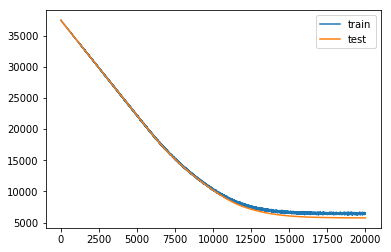

In [285]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [305]:
validateY

array([47599.121094, 47650.570313, 47541.320313, 47563.339844,
       47787.988281, 47842.230469, 47626.980469, 47398.699219,
       47416.96875 , 46459.171875, 46720.960938, 46154.199219,
       45767.570313, 45922.910156, 45871.039063, 46341.328125,
       46929.191406, 47975.050781, 47778.480469, 47252.539063,
       47731.839844, 48046.558594, 47672.070313, 47245.800781,
       47601.929688, 47909.269531, 48141.421875, 47944.769531,
       47596.601563, 48264.960938, 48014.398438, 47915.121094,
       47741.539063, 47701.449219, 47657.328125, 48106.121094,
       48492.609375, 48274.25    , 48418.398438, 48431.25    ,
       48093.53125 , 47805.441406, 48114.671875, 48007.199219,
       48009.28125 , 47303.308594, 46683.800781, 46694.808594,
       48050.25    , 48470.988281, 47390.660156, 45224.378906,
       44978.25    , 45306.480469, 45023.648438, 44901.570313,
       44919.691406, 44364.171875, 44838.761719, 45184.078125,
       45265.898438, 45357.851563, 45470.609375, 45372.

In [301]:
yhat

array([[38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],
       [38256.94 ],


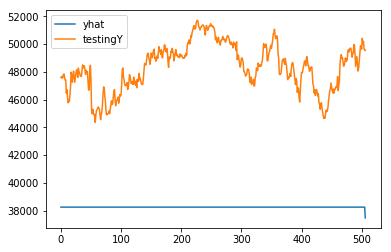

In [287]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [288]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 < prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 > prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

IndexError: index 507 is out of bounds for axis 0 with size 507

In [ ]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()